<div style="text-align: center;">
    <span style="font-size: 80px; font-family: Arial, sans-serif; color: white;">Nonlinearity of the Fidelity in Open Qudit Systems</span>
</div>

<span style="font-size: 36px; font-family: Arial, sans-serif; color: white;">Source Code for Generating the Data and Figures</span>


# <span style="font-size: 36px;">SETUP</span>

### Run these cells first to import all necessary packages and methods and to configure plot settings

## <span style="font-size: 24px;">Imports</span>

In [183]:
import paper_imports
import paper_methods

from paper_imports import *
from paper_methods import *

importlib.reload(paper_imports)
importlib.reload(paper_methods)

import paper_imports
import paper_methods

from paper_imports import *
from paper_methods import *

## <span style="font-size: 24px;">Plot Settings</span>

In [282]:
tick_fontsize = 18

legend_fontsize = 18

label_fontsize = 24

mpl.style.use('default')

mpl.rcParams.update({
'axes.edgecolor': 'black',
'axes.facecolor': 'white',
'axes.linewidth' : 1 ,
'axes.labelsize' : label_fontsize ,
'axes.grid' : True ,
'figure.figsize' : [8,6],
'figure.dpi' : 100 ,
'font.size' : label_fontsize ,
'font.family': 'serif',
'font.serif': ['Computer Modern'],
'grid.color' : 'lightgray',
'grid.linestyle' : '-' ,
'grid.linewidth' : 0.05 ,
'lines.linewidth' : 2 ,
'lines.color' : 'black',
'lines.markersize': 10 ,
'legend.fancybox' : True ,
'legend.fontsize' : legend_fontsize ,
'legend.frameon' : True ,
'legend.framealpha' : 0.95 ,
'legend.markerscale' : 1.5 ,
'legend.title_fontsize' : legend_fontsize ,
'pgf.texsystem': 'pdflatex', 
'scatter.marker' : 'o' ,
'text.usetex' : True ,
'text.latex.preamble' : r'\usepackage{physics}\usepackage{amsmath}\usepackage{amssymb}',
'xtick.labelsize' : tick_fontsize ,
'xtick.major.pad' : 10 ,
'xtick.major.size' : 6 ,
'xtick.major.width' : 1 ,
'xtick.minor.size' : 3 ,
'xtick.top' : True ,
'xtick.direction' : 'in' ,
'ytick.labelsize' : tick_fontsize ,
'ytick.right' : True ,
'ytick.major.size' : 6 ,
'ytick.major.width' : 1 ,
'ytick.minor.size' : 3 ,
'ytick.direction' : 'in',

})

%matplotlib widget

def tikzplotlib_fix_ncols(obj):
    """
    workaround for matplotlib 3.6 renamed legend's _ncol to _ncols, which breaks tikzplotlib
    """
    if hasattr(obj, "_ncols"):
        obj._ncol = obj._ncols
    for child in obj.get_children():
        tikzplotlib_fix_ncols(child)

# <span style="font-size: 60px; font-family: Arial, sans-serif">FIGURE 1</span>

## <span style="font-size: 24px; font-family: Arial, sans-serif">Generate Data</span>

In [64]:
# ----------------------------------------------------------------------------------------------------------------------------------
# IMPORTS
# ----------------------------------------------------------------------------------------------------------------------------------

import paper_imports
import paper_methods

from paper_imports import *
from paper_methods import *

importlib.reload(paper_imports)
importlib.reload(paper_methods)

import paper_imports
import paper_methods

from paper_imports import *
from paper_methods import *

# ----------------------------------------------------------------------------------------------------------------------------------
# USER OPTIONS
# ----------------------------------------------------------------------------------------------------------------------------------

# Save data to file
save_figure_data : bool = False

# ----------------------------------------------------------------------------------------------------------------------------------
# HPC SETTINGS
# ----------------------------------------------------------------------------------------------------------------------------------

# Get script file name
script_file_name : str = "paper_figure_01.py"

task_count, task_id, n_CPUs, figure_number = get_SLURM_Data(script_file_name)

print = functools.partial(print, flush = True)

# ----------------------------------------------------------------------------------------------------------------------------------
# START OF SCRIPT
# ----------------------------------------------------------------------------------------------------------------------------------

# START TIMING
start_time : float = time.time()
# Convert start time to real-world time
real_world_start_time : str = time.strftime("%y-%m-%d_%X_%Z").replace("/", "-").replace(":", "-")

# Set the figure number
figure_number : int = 1
# Set the number of tasks
task_id : int = 1
# Set the method for generating gates
method : str = 'interpolated_INC'
# Set the collapse operator
collapse_operator : str = 'z'
# Set dimensions
dims : list[int] = [4]
# Set the range of gamma values for the collapse operator
gamma_min : float = 1e-3 
gamma_max : float = 1.0
gamma_num : int = 30
gammas_array : np.ndarray = np.linspace(gamma_min, gamma_max, gamma_num, dtype = np.float64)
gammas : list[float] = gammas_array.tolist()
# Set alias for gamma_num for readability
n_gammas : int = gamma_num
# Set the number of gates
n_gates : int = 4
# Set the time parameter
times : float = 1.0
# Set the superoperator status
super : bool = True
# AGI Correction order
m_correction_terms : int = 4
# Set alias for m_correction_terms for readability
m : int = m_correction_terms
# Set the maximum number of iterations for the nested commutator sum
s_max : int = 100
# Set the error threshold for the nested commutator sum
error_threshold : float = 0.0
# Set parallelization parameters
parallel_verbosity : int = 11
n_jobs_gates : int = min(n_CPUs, n_gates)
batch_size_gates : int = int(n_gates / n_jobs_gates)
n_jobs_gammas : int = int(n_CPUs)
batch_size_gammas : int = int(n_gammas / n_jobs_gammas)
# Set options for the mesolve function (solver options for differential equations)
options_mesolve : qt.Options = qt.Options()
options_mesolve.method = 'bdf'  # Setting method to 'bdf' (backward differentiation formula)
options_mesolve.max_step = float(0.01) # type: ignore 
options_mesolve.nsteps = float(1000000) # type: ignore
options_mesolve.rtol = float(1e-8)  # Relative tolerance
options_mesolve.atol = float(1e-8)  # Absolute tolerance

# Pre-allocate space for data
AGIs_d : list = []
AGIs_d_first_order : list = []
AGIs_d_second_order : list = []
AGIs_d_third_order : list = []
AGIs_d_mth_order : list = []
super_gates_d : list = []
hamiltonians_d : list = []

# Print the config parameters
print(f"STARTING TIMESTAMP: {real_world_start_time}")
print('\n')
print('PRINTING CONFIG PARAMETERS:')
print('---------------------------')
print('\n')
print(f"CURRENT TASK : {task_id:03} / {task_count:03}")
print(f'MODIFIED FIGURE NUMBER : {figure_number}')
print(f'SAVING FIGURE DATA : {save_figure_data}')
print('\n')
print(f"GATE GENERATION METHOD : {method}")
print (f"QUDIT DIMENSIONS : {dims}")
print(f"COLLAPSE OPERATOR : {collapse_operator}")
print(f"NUMBER OF GAMMAS : {n_gammas}")
print(f"NUMBER OF GATES : {n_gates}")
print(f"GAMMAS : {gammas}")
print(f"GATE TIMES : {times}")
print('\n')
print(f'SUPEROPERATOR : {super}')
print(f'MAX ITERATIONS OVER S : {s_max}')
print(f'ERROR THRESHOLD : {error_threshold}')
print('\n')
print(f"PARALLEL VERBOSITY : {parallel_verbosity}")
print(f"NUMBER OF PARALLEL JOBS FOR INITIAL STATES : {n_jobs_gates}")
print(f"BATCH SIZE PER STATE JOB : {batch_size_gates}")
print(f"NUMBER OF PARALLEL JOBS FOR FIDELITIES : {n_jobs_gammas}")
print(f"BATCH SIZE PER FIDELITY JOB : {batch_size_gammas}")
print(f"OPTIONS FOR MESOLVE : {options_mesolve}")
print('\n')

# Print the parameters
print(f'FIGURE_NUMBER: {figure_number:02}')
print('\n')

print(f"Gate Generation Method: {method}")
print (f"Dimensions: {dims}")
print(f"Gammas: {gammas}")
print(f"Times: {times}")
print(f"Super: {super}")
print(f"Maximum number of iterations: {s_max}")
print(f"Error threshold: {error_threshold}")
print('\n')

# INITIALIZATION TIME
initialization_time : float= time.time()
print(f"Initialization time: {initialization_time - start_time}")

print('\n')

# Loop over dimensions
for d in dims:

    # LOOP START TIME
    loop_start_time : float = time.time()  
    
    print(f"Dimension: {d}")

    # Initialize a qudit of dimension d
    qudit = Qudit(d = d)
    # Get qudit collapse operators
    j = qudit.get_j
    L : qt.Qobj = j(collapse_operator) # type: ignore 

    # Set the range of eta values for the gates
    etas_list : list[float] = [0.0, 3/4 - 1/(2 * d), 1.0]
    
    # Pre-allocate space for local data
    AGF : np.ndarray = np.empty(n_gammas, dtype = np.float64)
    AGI_first_order : np.ndarray = np.empty(gamma_num, dtype = np.float64)    
    AGI_second_order : np.ndarray = np.empty(n_gammas, dtype = np.float64) 
    comm_sum_second_order : np.ndarray = np.empty(n_gammas, dtype = np.float64)
    AGIs : np.ndarray = np.empty((n_gates, n_gammas), dtype = np.float64)
    AGIs_first_order : np.ndarray = np.empty((n_gates, n_gammas), dtype = np.float64)
    AGIs_second_order : np.ndarray = np.empty((n_gates, n_gammas), dtype = np.float64)
    AGIs_third_order : np.ndarray = np.empty((n_gates, n_gammas), dtype = np.float64)  
    AGIs_mth_order : np.ndarray = np.zeros((n_gates, m_correction_terms, n_gammas), dtype = np.float64)    

    # LOOP INITIALIZATION TIME
    loop_initialization_time : float = time.time()
    print(f"Loop initialization time: {loop_initialization_time - loop_start_time}")

    # Generate gates
    super_gates, hamiltonians = generate_gates_and_hamiltonians(n_gates - 1, d, method = method, n_jobs = n_jobs_gates, batch_size = batch_size_gates, is_super = True, etas = etas_list)
    super_gates_2, hamiltonians_2 = generate_gates_and_hamiltonians(1, d, method = 'QFT', n_jobs = 1, batch_size = 1, is_super = True)

    super_gates = super_gates + super_gates_2
    hamiltonians = hamiltonians + hamiltonians_2

    super_gates_d.append(super_gates)
    hamiltonians_d.append(hamiltonians)

    # GATE GENERATION TIME
    gate_generation_time : float = time.time()
    print(f"Gate generation time: {gate_generation_time - initialization_time}")    

    # Calculate the first-order AGI correction term    
    # AGI_first_order = -(gammas_array * times) * first_order_AGI(d, L)    

    # Loop over number of gates
    for idx, gate in enumerate(super_gates):

        # GATE FIDELITY START TIME
        gate_fidelity_start_time : float = time.time()

        # Parallelize the gammas loop
        AGF = Parallel(n_jobs = n_jobs_gammas, batch_size = batch_size_gammas, verbose = parallel_verbosity)(delayed(compute_fidelity)(hamiltonians[idx], gate, L, times, d, g, options_mesolve) for g in gammas) # type : ignore

        # Store the simulated AGI values
        AGIs[idx] = 1 - np.array(AGF)        

        # Calculate the second-order AGI correction terms
        # comm_sum_second_order, s_finals = second_order_AGI(hamiltonians[idx], L, d, times, s_max, error_threshold = error_threshold, super = super)

        M_trace_mth_order = compute_AGIs_up_to_mth_order(d, m, s_max, times, hamiltonians[idx], L)

        AGIs_mth_order_gate = [(gammas_array * times)**(m_i + 1) * M_trace_mth_order[m_i] for m_i in range(m)]

        for m_i in range(m):
            for m_j in range(m_i+1):
                AGIs_mth_order[idx, m_i] += AGIs_mth_order_gate[m_j]

        # Store the first-order AGI correction term
        AGIs_first_order[idx] = AGIs_mth_order[idx][0]        
        AGIs_second_order[idx] = AGIs_mth_order[idx][1]
        AGIs_third_order[idx] = AGIs_mth_order[idx][2]

        # GATE FIDELITY TIME
        gate_fidelity_time : float = time.time()
        print(f"Gate: {idx + 1:03} / {n_gates:03} completed in: {gate_fidelity_time - gate_fidelity_start_time}") 

    # Store the AGI data per dimension
    AGIs_d.append(AGIs)
    AGIs_d_first_order.append(AGIs_first_order)
    AGIs_d_second_order.append(AGIs_second_order)
    AGIs_d_third_order.append(AGIs_third_order)
    AGIs_d_mth_order.append(AGIs_mth_order)

    # FIDELITY TIME
    fidelity_time : float = time.time()
    print(f"Fidelity time: {fidelity_time - gate_generation_time}")

# TOTAL LOOP TIME
total_loop_time : float = time.time()
print(f"Total loop time: {total_loop_time - start_time}")

# Save the data
if save_figure_data:
    save_data(figure_number, task_id, dims = dims, gammas = gammas, n_gates = n_gates, s_max = s_max, error_threshold = error_threshold, AGIs_d = AGIs_d, AGIs_d_first_order = AGIs_d_first_order, AGIs_d_second_order = AGIs_d_second_order, AGIs_mth_order = AGIs_d_mth_order, hamiltonians_d = hamiltonians_d)

# SAVE DATA TIME
save_data_time : float = time.time()
print(f"Save data time: {save_data_time - total_loop_time}")

# TOTAL TIME
total_time : float = time.time()
print(f"Total time: {total_time - start_time}")

FIGURE_NUMBER: 01
SCRIPT_NAME: paper_figure_01.py


SLURM_JOB_ID: NOSLURM
SLURM_ARRAY_TASK_COUNT: 1
SLURM_ARRAY_TASK_ID: 1
SLURM_CPUS_ON_NODE: 12


STARTING TIMESTAMP: 24-04-18_23-40-31_CEST


PRINTING CONFIG PARAMETERS:
---------------------------


CURRENT TASK : 001 / 001
MODIFIED FIGURE NUMBER : 1
SAVING FIGURE DATA : False


GATE GENERATION METHOD : interpolated_INC
QUDIT DIMENSIONS : [4]
COLLAPSE OPERATOR : z
NUMBER OF GAMMAS : 30
NUMBER OF GATES : 4
GAMMAS : [0.001, 0.035448275862068966, 0.06989655172413793, 0.10434482758620689, 0.13879310344827586, 0.17324137931034483, 0.20768965517241378, 0.24213793103448275, 0.2765862068965517, 0.31103448275862067, 0.34548275862068967, 0.3799310344827586, 0.41437931034482756, 0.44882758620689656, 0.4832758620689655, 0.5177241379310344, 0.5521724137931034, 0.5866206896551724, 0.6210689655172413, 0.6555172413793103, 0.6899655172413793, 0.7244137931034482, 0.7588620689655172, 0.7933103448275862, 0.8277586206896551, 0.8622068965517241, 0.89665517

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Gate generation time: 3.7765002250671387


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    3.7s finished
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    7.8s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:    7.9s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    8.0s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    8.0s
[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:    8.0s
[Parallel(n_jobs=12)]: Done  11 tasks      | elapsed:    8.0s
[Parallel(n_jobs=12)]: Done  13 tasks      | elapsed:    8.0s
[Parallel(n_jobs=12)]: Done  19 out of  30 | elapsed:    8.1s remaining:    4.7s
[Parallel(n_jobs=12)]: Done  22 out of  30 | elapsed:    8.2s remaining:    3.0s
[Parallel(n_jobs=12)]: Done  25 out of  30 | elapsed:    8.2s remaining:    1.6s
[Parallel(n_jobs=12)]: Done  28 out of  30 | elapsed: 

Gate: 001 / 004 completed in: 6163.29572224617


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:   13.6s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:   13.7s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:   13.8s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:   13.8s
[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:   13.8s
[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:   13.8s
[Parallel(n_jobs=12)]: Done  14 tasks      | elapsed:   14.0s
[Parallel(n_jobs=12)]: Done  16 out of  30 | elapsed:   14.0s remaining:   12.2s
[Parallel(n_jobs=12)]: Done  19 out of  30 | elapsed:   14.1s remaining:    8.2s
[Parallel(n_jobs=12)]: Done  22 out of  30 | elapsed:   14.2s remaining:    5.2s
[Parallel(n_jobs=12)]: Done  28 out of  30 | elapsed:   14.3s remaining:    1.0s
[Parallel(n_jobs=12)]: Done  30 out of  30 | elapsed:   14.3s finished


Gate: 002 / 004 completed in: 6836.41605091095


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:   13.9s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:   14.0s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:   14.2s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:   14.2s
[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:   14.4s
[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:   14.4s
[Parallel(n_jobs=12)]: Done  14 tasks      | elapsed:   14.4s
[Parallel(n_jobs=12)]: Done  19 out of  30 | elapsed:   14.5s remaining:    8.4s
[Parallel(n_jobs=12)]: Done  22 out of  30 | elapsed:   14.6s remaining:    5.3s
[Parallel(n_jobs=12)]: Done  28 out of  30 | elapsed:   14.8s remaining:    1.1s
[Parallel(n_jobs=12)]: Done  30 out of  30 | elapsed:   14.8s finished


Gate: 003 / 004 completed in: 6997.053602933884


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:   13.7s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:   13.7s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:   13.8s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:   13.8s
[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:   13.8s
[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:   13.8s
[Parallel(n_jobs=12)]: Done  14 tasks      | elapsed:   13.9s
[Parallel(n_jobs=12)]: Done  16 out of  30 | elapsed:   14.0s remaining:   12.3s
[Parallel(n_jobs=12)]: Done  22 out of  30 | elapsed:   14.1s remaining:    5.1s
[Parallel(n_jobs=12)]: Done  25 out of  30 | elapsed:   14.2s remaining:    2.8s
[Parallel(n_jobs=12)]: Done  28 out of  30 | elapsed:   14.2s remaining:    1.0s
[Parallel(n_jobs=12)]: Done  30 out of  30 | elapsed:   14.3s finished


Gate: 004 / 004 completed in: 6864.12650680542
Fidelity time: 26860.89589738846
Total loop time: 26864.70139694214
Save data time: 0.0006422996520996094
Total time: 26864.702579021454


## <span style="font-size: 24px; font-family: Arial, sans-serif">Plot Figure</span>

/home/jgkh/.local/lib/python3.9/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)


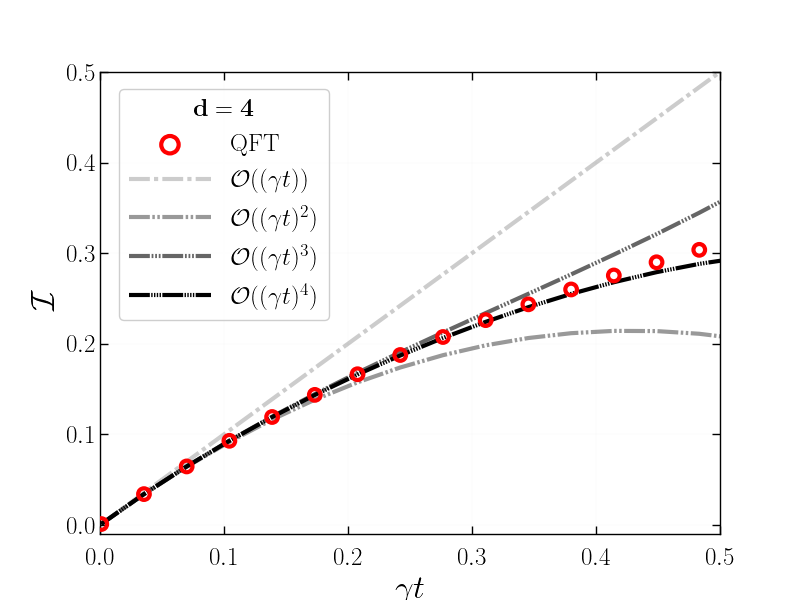

In [243]:
# ----------------------------------------------------------------------------------------------------------------------------------
# USER OPTIONS
# ----------------------------------------------------------------------------------------------------------------------------------
# Whether to load the data from the file or use the data from the current run
load_figure_data = True
# Whether to save the figure to a file
save_figure = True
# ----------------------------------------------------------------------------------------------------------------------------------
# LOAD DATA
# ----------------------------------------------------------------------------------------------------------------------------------
figure_number = 1
result_number = 1

if load_figure_data:        
    # Find number of data files in the directory
    n_files = len([name for name in os.listdir('../dat/') if name.startswith(f'Figure_{figure_number:02}')])
    if n_files > 0:
        n_tasks = n_files
    else:
        raise ValueError("No data files found for the specified figure number.")
    
    
    data = load_data(figure_number, result_number)
    dims = data['dims']
    gammas = data['gammas']
    n_gates = data['n_gates']        
    AGIs_d = data['AGIs_d']
    AGIs_mth_order = data['AGIs_mth_order']

# ----------------------------------------------------------------------------------------------------------------------------------
# PLOT FIGURES
# ----------------------------------------------------------------------------------------------------------------------------------

colorlist = ['k', 'g', 'r', 'b', 'g', 'm', 'y', ]

colorlist = ['#f7f7f7','#cccccc','#969696','#525252']

alphalist = [0.2, 0.4, 0.6, 1.0]

markerlist = ['s', '^', 'v', 'o', 'D']

linestylelist = ['--', '-.', (0, (5, 1, 1, 1, 1, 1)), ':']

m = 4

x = 3

linestylelist = [(0, (5,x/(2*m+1)) + (x/(2*m+1), x/(2*m+1))*m) for m in range(1, m+1)]

legendlinestylelist = [(0, ((13-2*m+1)/2-1.,1) + (1, 1)*m + ((13-2*m+1)/2.,))  for m in range(1, m+1)]

label_list_type = [r'$\mathcal{O}((\gamma t))$', r'$\mathcal{O}((\gamma t)^2)$', r'$\mathcal{O}((\gamma t)^3)$', r'$\mathcal{O}((\gamma t)^4)$']

plt.clf()
plt.close()
plt.figure()

for d_idx, d in enumerate(dims):
    AGIs = AGIs_d[d_idx]
    for n in range(n_gates):
        if n != n_gates-1:
            continue
        plt.scatter(gammas, AGIs[n], color = 'r', marker = markerlist[n], linewidth = 3, facecolor = 'None', s = 70, label = r'$\mathrm{QFT}$', zorder=10)
    for m_idx in range(m):
        for n in range(n_gates):
            if n != n_gates-1:
                continue
            plt.plot(gammas, AGIs_mth_order[0][n][m_idx], color = 'k', alpha = alphalist[m_idx], linestyle = linestylelist[m_idx], linewidth = 3, label = label_list_type[m_idx])

legend = plt.legend(frameon = True, numpoints = 1, title = r'$\bf{d = 4}$', loc = 'upper left', bbox_to_anchor = (0.01, 0.99), handlelength=3.3, fontsize = 18, title_fontsize = 18)

for i,handle in enumerate(legend.legend_handles[1:]):
    handle.set_linestyle(linestylelist[i])

plt.xscale('linear')
plt.yscale('linear')

plt.xlim(0, 0.5)
plt.ylim(-0.01, 0.5)

plt.xlabel(r'$\gamma t$')
plt.ylabel(r'$\mathcal{I}$')

if save_figure:
    plt.savefig(f'../fig/Figure_{figure_number:02}.pdf', format='pdf', bbox_inches= 'tight')

plt.show()

# <span style="font-size: 60px; font-family: Arial, sans-serif">FIGURE 2</span>

## <span style="font-size: 24px; font-family: Arial, sans-serif">Generate Data</span>

In [539]:
# ----------------------------------------------------------------------------------------------------------------------------------
# IMPORTS
# ----------------------------------------------------------------------------------------------------------------------------------

import paper_imports
import paper_methods

from paper_imports import *
from paper_methods import *

importlib.reload(paper_imports)
importlib.reload(paper_methods)

import paper_imports
import paper_methods

from paper_imports import *
from paper_methods import *

# ----------------------------------------------------------------------------------------------------------------------------------
# USER OPTIONS
# ----------------------------------------------------------------------------------------------------------------------------------

# Save data to file
save_figure_data : bool = False

# ----------------------------------------------------------------------------------------------------------------------------------
# HPC SETTINGS
# ----------------------------------------------------------------------------------------------------------------------------------

# Get script file name
script_file_name : str = "paper_figure_02.py"

task_count, task_id, n_CPUs, figure_number = get_SLURM_Data(script_file_name)

print = functools.partial(print, flush = True)

# ----------------------------------------------------------------------------------------------------------------------------------
# START OF SCRIPT
# ----------------------------------------------------------------------------------------------------------------------------------

# START TIMING
start_time = time.time()

# Set the figure number
figure_number = 2
# Set the method for generating gates
method = 'haar'
# Set dimension for the quantum system (in this case, a qubit)
dims = [2, 4, 8, 16]
# Set the range of noise strengths for the collapse operator
gamma_min = 1e-2
gamma_max = 1e+3
gamma_num = 28
gammas_ndarray : np.ndarray = np.geomspace(gamma_min, gamma_max, gamma_num, dtype = np.float64)
gammas : list[float] = gammas_ndarray.tolist()
# Set alias for gamma_num for readability
n_gammas : int = gamma_num
# Set the times for the propagator
times = 1.0
# Set parallelization parameters
n_gates = n_CPUs
n_jobs = min(n_CPUs, n_gates)
batch_size = int(n_gates / n_jobs) 
# Set options for the mesolve function (solver options for differential equations)
options_mesolve = qt.Options()
options_mesolve.method = 'bdf'  # Setting method to 'bdf' (backward differentiation formula)
options_mesolve.max_step = float(0.001) # type: ignore 
options_mesolve.nsteps = float(1000000) # type: ignore
options_mesolve.rtol = float(1e-8)  # Relative tolerance
options_mesolve.atol = float(1e-8)  # Absolute tolerance

# Pre-allocate space for data
AGIs_d = []
super_gates_d = []
hamiltonians_d = []

# Print the parameters
print(f'FIGURE_NUMBER: {figure_number:02}')
print('\n')

print(f"Gate Generation Method: {method}")
print (f"Dimensions: {dims}")
print(f"Gammas: {gammas}")
print(f"Times: {times}")
print('\n')

print(f"Number of CPUs: {n_CPUs}")
print(f"Number of gates: {n_gates}")
print(f"Number of jobs: {n_jobs}")
print(f"Batch size: {batch_size}")
print(f"Task number: {task_id:03} / {task_count:03}")
print('\n')

# INITIALIZATION TIME
initialization_time = time.time()
print(f"Initialization time: {initialization_time - start_time}")

print('\n')

# Loop over the dimensions in dims
for d in dims:    

    # LOOP START TIME
    loop_start_time = time.time()    

    print(f"Dimension: {d}")   

    # Initialize a qudit of dimension d
    qudit = Qudit(d=d)
    # Get qudit collapse operators
    j = qudit.get_j
    L : qt.Qobj = j("z") # type: ignore

    # Pre-allocate space for local data
    AGIs = np.empty((n_gates, n_gammas), dtype=np.float64)
    AGF = np.empty((n_gates, n_gammas), dtype=np.float64)

    # LOOP INITIALIZATION TIME
    loop_initialization_time = time.time()
    print(f"Loop initialization time: {loop_initialization_time - loop_start_time}")    

    # Generate a list of random unitary gates and Hamiltonians
    super_gates, hamiltonians = generate_gates_and_hamiltonians(n_gates, d, method = method, n_jobs = n_jobs, batch_size = batch_size, is_super = True)

    super_gates_d.append(super_gates)
    hamiltonians_d.append(hamiltonians)

    # GATE GENERATION TIME
    gate_generation_time = time.time()
    print(f"Gate generation time: {gate_generation_time - loop_initialization_time}")

    # Loop over number of gammas
    for g_idx, g in enumerate(gammas):
        # Parallelize the gates loop
        AGF[:, g_idx] = Parallel(n_jobs = n_jobs, batch_size = batch_size)(delayed(compute_fidelity)(hamiltonians[idx], gate, L, times, d, g, options_mesolve) for idx, gate in enumerate(super_gates)) # type : ignore
        AGIs[:, g_idx] = 1 - np.array(AGF[:, g_idx])

    # Store the AGI data per dimension
    AGIs_d.append(AGIs)

    # FIDELITY TIME
    fidelity_time = time.time()
    print(f"Fidelity time: {fidelity_time - gate_generation_time}")

    # SINGLE LOOP TIME
    loop_time = time.time()
    print(f"Single loop time: {loop_time - loop_start_time}")

    print('\n')

# TOTAL LOOP TIME
total_loop_time = time.time()
print(f"Total loop time: {total_loop_time - start_time}")

# Save the data
if save_figure_data:
    save_data(figure_number, task_id, dims = dims, gammas = gammas, n_gates = n_gates, AGIs_d = AGIs_d, hamiltonians_d = hamiltonians_d, super_gates_d = super_gates_d)

# SAVE DATA TIME
save_data_time = time.time()
print(f"Save data time: {save_data_time - total_loop_time}")

# TOTAL TIME
total_time = time.time()
print(f"Total time: {total_time - start_time}")

FIGURE_NUMBER: 02
SCRIPT_NAME: paper_figure_02.py


SLURM_JOB_ID: NOSLURM
SLURM_ARRAY_TASK_COUNT: 1
SLURM_ARRAY_TASK_ID: 1
SLURM_CPUS_ON_NODE: 12


FIGURE_NUMBER: 02


Gate Generation Method: haar
Dimensions: [2, 4, 8, 16]
Gammas: [0.01, 0.015317404637020799, 0.023462288481422625, 0.03593813663804628, 0.055047898078549706, 0.08431909292866255, 0.1291549665014884, 0.19783188827841644, 0.30302710828663965, 0.46415888336127775, 0.7109709432312431, 1.0890229622637293, 1.6681005372000592, 2.555097090352507, 3.913745601980384, 5.994842503189409, 9.182542835656282, 14.065272421052365, 21.54434690031882, 33.00034791125282, 50.547968211912355, 77.4263682681127, 118.59710123376682, 181.6599788375325, 278.2559402207126, 426.2158829015325, 652.8521141127848, 1000.0]
Times: 1.0


Number of CPUs: 12
Number of gates: 12
Number of jobs: 12
Batch size: 1
Task number: 001 / 001


Initialization time: 0.01130223274230957


Dimension: 2
Loop initialization time: 0.0076141357421875


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    7.6s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    7.6s remaining:   22.9s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    7.8s remaining:   10.9s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    7.8s remaining:    5.6s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    7.8s remaining:    2.6s


Gate generation time: 8.052786827087402


[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    8.0s finished


Fidelity time: 1.9996349811553955
Single loop time: 10.060733318328857


Dimension: 4
Loop initialization time: 0.009074211120605469
Gate generation time: 0.013857841491699219


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.0s finished


Fidelity time: 8.029308080673218
Single loop time: 8.054798364639282


Dimension: 8
Loop initialization time: 0.02154374122619629
Gate generation time: 0.013725042343139648


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.0s finished


Fidelity time: 261.71964287757874
Single loop time: 261.75611209869385


Dimension: 16
Loop initialization time: 0.12111425399780273
Gate generation time: 0.08254504203796387


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.1s finished


KeyboardInterrupt: 

## <span style="font-size: 24px; font-family: Arial, sans-serif">Plot Figure</span>

Files found: ['Figure_02_results_001.blob']


/home/jgkh/.local/lib/python3.9/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)


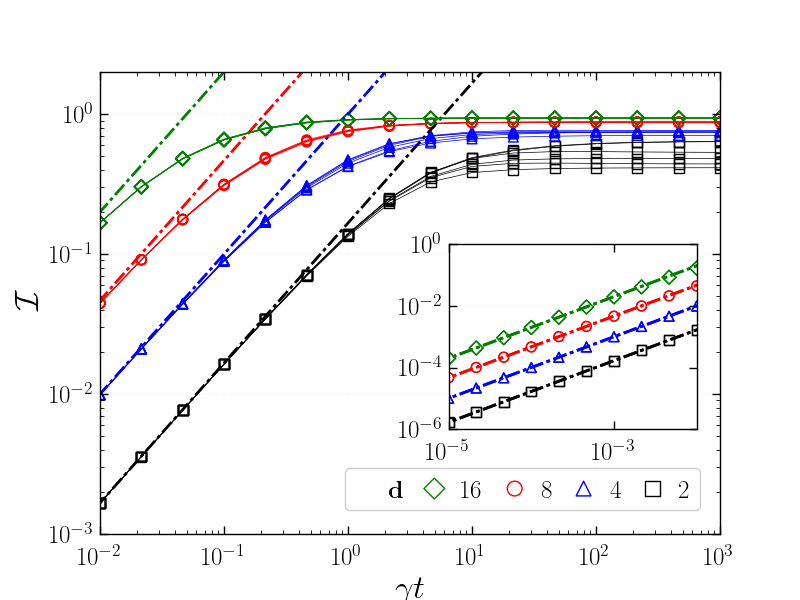

In [244]:
# ----------------------------------------------------------------------------------------------------------------------------------
# USER OPTIONS
# ----------------------------------------------------------------------------------------------------------------------------------
# Whether to load the data from the file or use the data from the current run
load_figure_data = True
# Whether to save the figure to a file
save_figure = True
# ----------------------------------------------------------------------------------------------------------------------------------
# LOAD DATA
# ----------------------------------------------------------------------------------------------------------------------------------
figure_number = 2

# Check if the data should be loaded from the file
if load_figure_data:        
    # Find data files in the directory for the specified figure number
    files_found = [name for name in os.listdir('../dat') if name.startswith(f'Figure_{figure_number:02}')]
    print(f'Files found: {files_found}')
    n_files = len(files_found)
    n_tasks = n_files # Alias for readability
    # Check if there are any data files for the specified figure number
    if n_files > 0:
        n_tasks = n_files
    else:
        raise ValueError("No data files found for the specified figure number.")    
    # Preload dims, gammas and n_gates from the first data file to initialize them before the loop
    data = load_data(figure_number, 1)
    dims = data['dims']
    gammas = data['gammas']
    n_gates = data['n_gates'] 
    # Pre-allocate space for the AGI data
    AGIs_data_d = []
    # Loop over the dimensions
    for d_idx, d in enumerate(dims):   
        # Pre-allocate space for the AGI data per dimension 
        AGIs_temp = []      
        # Loop over the number of tasks/ data files
        for n in range(1, n_tasks + 1):
            # Load the data from file number n
            data = load_data(figure_number, n)
            # Append the AGI data to the temporary list      
            AGIs_temp.append(data['AGIs_d'][d_idx])
        # Concatenate all the elements of AGIs_temp together
        AGIs = np.concatenate(AGIs_temp, axis = 0)
        # Append the concatenated AGI data to the main list
        AGIs_data_d.append(AGIs)
    # Save to original variable name
    AGIs_d = AGIs_data_d
    # Update the total number of gates
    n_gates = len(AGIs_data_d[0])  
# ----------------------------------------------------------------------------------------------------------------------------------
# PLOT FIGURES
# ----------------------------------------------------------------------------------------------------------------------------------

# Set plot markers and colors
markerlist = ['s', '^', 'o', 'D']
colorlist = ['k', 'b', 'r', 'g', 'm', 'y']

m = 1
x = 4

linearlinestyle = (0, (5,x/(2*m+1)) + (x/(2*m+1), x/(2*m+1))*m)

plt.clf()
plt.close()
plt.figure()

# Loop over the dimensions
for d_idx, d in enumerate(dims):
    AGIs = AGIs_d[d_idx]
    # Loop over the number of gates
    for n in range(0, n_gates, 5):
        plt.plot(gammas, AGIs[n], color = colorlist[d_idx], linestyle = '-', linewidth = 0.5, label = None)
        plt.scatter(gammas, AGIs[n], color = colorlist[d_idx], marker = markerlist[d_idx], facecolor = 'None', s = 50, label = rf'${d}$' if n == 0 else None)
    # Plot the theoretical first-order AGI
    plt.plot(gammas, np.array(gammas) * d * (d - 1) / 12, color = colorlist[d_idx], linestyle = linearlinestyle, linewidth = 2, label = None)

plt.scatter(0,0, facecolor='None', label = r'$\mathbf{d}$', s=0)

plt.tick_params(axis='x', which='major', pad = 10)

plt.xscale('log')
plt.yscale('log')
plt.xlim(1e-2, 1e+3)
plt.ylim(1e-3, 2e0)

plt.xlabel(r'$\gamma t$')
plt.ylabel(r'$\mathcal{I}$')
legend = plt.legend(loc='lower left', bbox_to_anchor=(0.375, 0.025), ncol = 5, reverse = True, handlelength=.5, columnspacing=1, labelspacing=.1)

for text in legend.get_texts():
    text.set_ha('left')
    text.set_position((0,-2.5))
legend.get_texts()[0].set_ha('right')
legend.get_texts()[-1].set_text("2    ")

# Add inset to figure
ax = plt.gca()
inset_ax = inset_axes(ax, width="40%", height="40%", loc='lower right', bbox_to_anchor=(-0.0175, 0.2, 1, 1), bbox_transform=ax.transAxes)
inset_ax.tick_params(axis='x', which='major', pad = 10)

# Loop over the dimensions
for d_idx, d in enumerate(dims):
    AGIs = AGIs_d[d_idx]
    # Loop over the number of gates
    for n in range(2):
        inset_ax.scatter(gammas, AGIs[n], color=colorlist[d_idx % 7], marker=markerlist[d_idx], facecolor='None', s=50)
        plt.plot(gammas, np.array(gammas) * d * (d - 1) / 12, color = colorlist[d_idx], linestyle = linearlinestyle, linewidth = 2, label = None)


# Set inset plot parameters
inset_ax.set_xscale('log')
inset_ax.set_yscale('log')
inset_ax.set_xlim(1e-5, 1e-2)
inset_ax.set_ylim(1e-6, 1e0)
inset_ax.set_yticks([1e-6, 1e-4, 1e-2, 1e0])

if save_figure:    
    plt.savefig(f'../fig/Figure_{figure_number:02}.pdf', format='pdf', bbox_inches='tight')

plt.show()

# <span style="font-size: 60px; font-family: Arial, sans-serif">FIGURE 3</span>

## <span style="font-size: 24px; font-family: Arial, sans-serif">Generate Data</span>

In [324]:
# ----------------------------------------------------------------------------------------------------------------------------------
# IMPORTS
# ----------------------------------------------------------------------------------------------------------------------------------

import paper_imports
import paper_methods

from paper_imports import *
from paper_methods import *

importlib.reload(paper_imports)
importlib.reload(paper_methods)

import paper_imports
import paper_methods

from paper_imports import *
from paper_methods import *

# ----------------------------------------------------------------------------------------------------------------------------------
# USER OPTIONS
# ----------------------------------------------------------------------------------------------------------------------------------

# Save data to file
save_figure_data : bool = False

# ----------------------------------------------------------------------------------------------------------------------------------
# HPC SETTINGS
# ----------------------------------------------------------------------------------------------------------------------------------

# Get script file name
script_file_name : str = "paper_figure_03.py"

task_count, task_id, n_CPUs, figure_number = get_SLURM_Data(script_file_name)

task_id = 3

print = functools.partial(print, flush = True)

# ----------------------------------------------------------------------------------------------------------------------------------
# START OF SCRIPT
# ----------------------------------------------------------------------------------------------------------------------------------

# START TIMING
start_time : float = time.time()
# Convert start time to real-world time
real_world_start_time : str = time.strftime("%y-%m-%d_%X_%Z").replace("/", "-").replace(":", "-")

# Set the figure number
figure_number : int = 3
# Set the method for generating gates
method : str = 'random'
# Set collapse operator
collapse_operator : str = 'z'
# Set dimensions for the qudits
dims : list[int] = [2]
d_max : int = dims[-1]
# Set the range of noise strengths for the collapse operator
gamma_min : float = 1e-2
gamma_max : float = 1e+4
gamma_num : int = 50
gammas_ndarray : np.ndarray = np.geomspace(gamma_min, gamma_max, gamma_num, dtype = np.float64)
gammas : list[float] = gammas_ndarray.tolist()
# Set alias for gamma_num for readability
n_gammas : int = gamma_num
# Set number of random quantum gates
n_gates : int = 100#200 * n_CPUs
# Set parallelization parameters
parallel_verbosity : int = 11
n_jobs : int = n_CPUs
batch_size : int = int(n_gates / n_jobs)   
# Set times for the propagator; currently set to just one value, 1.0
times : float = 1.0
# Set y threshold on AGI to identify curves with or without peaks
y_threshold : float = 1e-3
# Set options for the mesolve function (solver options for differential equations)
options_mesolve : qt.Options = qt.Options()
options_mesolve.method = 'bdf'  # Setting method to 'bdf' (backward differentiation formula)
options_mesolve.max_step = float(0.001) # type: ignore 
options_mesolve.nsteps = float(1000000) # type: ignore
options_mesolve.rtol = float(1e-8)  # Relative tolerance
options_mesolve.atol = float(1e-8)  # Absolute tolerance

# Pre-allocate space for data
AGIs_d : list = []
super_gates_d : list = []
hamiltonians_d : list = []
hamiltonians_d_traceless : list = []
AGIs_with_turning_points_indices : list = []
AGIs_without_turning_points_indices : list = []

# Print the config parameters
print(f"STARTING TIMESTAMP: {real_world_start_time}")
print('\n')
print('PRINTING CONFIG PARAMETERS:')
print('---------------------------')
print('\n')
print(f"CURRENT TASK : {task_id:03} / {task_count:03}")
print(f'MODIFIED FIGURE NUMBER : {figure_number}')
print(f'SAVING FIGURE DATA : {save_figure_data}')
print('\n')
print(f"GATE GENERATION METHOD : {method}")
print (f"QUDIT DIMENSIONS : {dims}")
print(f'NUMBER OF GAMMAS : {n_gammas}')
print(f"GAMMAS : {gammas}")
print(f"COLLAPSE OPERATOR : {collapse_operator}")
print(f"NUMBER OF GATES : {n_gates}")
print(f"GATE TIMES : {times}")
print(f"ERROR THRESHOLD : {y_threshold}")
print('\n')
print(f"PARALLEL VERBOSITY : {parallel_verbosity}")
print(f"NUMBER OF PARALLEL JOBS : {n_jobs}")
print(f"BATCH SIZE PER JOB : {batch_size}")
print(f"OPTIONS FOR MESOLVE : {options_mesolve}")
print('\n')

# INITIALIZATION TIME
initialization_time : float = time.time()
print(f"Initialization time: {initialization_time - start_time}")

print('\n')

# Loop over the dimensions
for d in dims:

    # LOOP START TIME
    loop_start_time : float = time.time()  
    
    print(f"DIMENSION : {d:02} / {d_max:02}")

    # Initialize a qudit of dimension d
    qudit = Qudit(d = d)
    # Get qudit collapse operators
    j = qudit.get_j
    L : qt.Qobj = j(collapse_operator) # type: ignore    

    # Pre-allocate space for local data
    AGIs : np.ndarray = np.empty((n_gates, n_gammas), dtype=np.float64)
    # AGIs_traceless : np.ndarray = np.empty((n_gates, n_gammas), dtype=np.float64)
    AGF : np.ndarray = np.empty((n_gates, n_gammas), dtype=np.float64)
    # AGF_traceless : np.ndarray = np.empty((n_gates, n_gammas), dtype=np.float64)

    # LOOP INITIALIZATION TIME
    loop_initialization_time : float = time.time()
    print(f"Loop initialization time: {loop_initialization_time - loop_start_time}")    

    # Generate a list of random unitary gates and Hamiltonians
    super_gates, hamiltonians = generate_gates_and_hamiltonians(n_gates, d, method = method, n_jobs = n_jobs, batch_size = batch_size, is_super = True) # method = 'circular' or 'random' or 'haar' or 'hermitian' or 'cirq_random_unitary' or 'cirq_random_special_unitary'

    # hamiltonians_traceless = [h - h.tr() * qt.qeye(d) / d for h in hamiltonians]

    super_gates_d.append(super_gates)
    hamiltonians_d.append(hamiltonians)
    # hamiltonians_d_traceless.append(hamiltonians_traceless)

    # GATE GENERATION TIME
    gate_generation_time : float = time.time()
    print(f"Gate generation time: {gate_generation_time - initialization_time}")

    # Loop over number of gammas
    for idx_g, g in enumerate(gammas):

        # GAMMA FIDELITY START TIME
        gamma_fidelity_start_time : float = time.time()

        # Parallelize the gates loop
        AGF[:, idx_g] = Parallel(n_jobs = n_jobs, batch_size = batch_size, verbose = parallel_verbosity)(delayed(compute_fidelity)(hamiltonians[idx], gate, L, times, d, g, options_mesolve) for idx, gate in enumerate(super_gates)) # type : ignore
        # AGF_traceless[:, idx_g] = Parallel(n_jobs = n_jobs, batch_size = batch_size, verbose = parallel_verbosity)(delayed(compute_fidelity)(hamiltonians_traceless[idx], gate, L, times, d, g, options_mesolve) for idx, gate in enumerate(super_gates)) # type : ignore
        # AGIs_traceless[:, idx_g] = 1 - AGF_traceless[:, idx_g]
        AGIs[:, idx_g] = 1 - AGF[:, idx_g]

        # GAMMA FIDELITY TIME
        gamma_fidelity_time : float = time.time()
        print(f"Gamma: {idx_g + 1:03} / {n_gammas:03} completed in: {gamma_fidelity_time - gamma_fidelity_start_time}") 

    # Store the AGI data per dimension  
    AGIs_d.append(AGIs)

    # FIDELITY TIME
    fidelity_time = time.time()
    print(f"Fidelity time: {fidelity_time - gate_generation_time}")

    # # Find the roots of the AGI curves
    # root_results = Parallel(n_jobs = n_jobs, batch_size = batch_size, verbose = parallel_verbosity)(delayed(find_AGI_plateau_roots)(AGIs[n], gammas_ndarray, y_threshold, index = n) for n in range(n_gates)) # type : ignore

    # # Differentiate between AGI curves with and without turning points based on how many times they cross the plateau line
    # for n in range(n_gates):
    #     if len(root_results[n][1]) == 3:
    #         AGIs_with_turning_points_indices.append(n)
    #     elif len(root_results[n][1]) == 1:
    #         AGIs_without_turning_points_indices.append(n)        

    # ROOT FINDING TIME
    root_finding_time : float = time.time()
    print(f"Root finding time: {root_finding_time - fidelity_time}")

    # SINGLE LOOP TIME
    loop_time = time.time()
    print(f"Single loop time: {loop_time - loop_start_time}")

    print('\n')

# TOTAL LOOP TIME
total_loop_time = time.time()
print(f"Total loop time: {total_loop_time - start_time}")

# Save the data
if save_figure_data:
    save_data(figure_number, task_id, dims = dims, gammas = gammas, n_gates = n_gates, times = times, AGIs_d = AGIs_d, hamiltonians_d = hamiltonians_d, AGIs_with_turning_points_indices = AGIs_with_turning_points_indices, AGIs_without_turning_points_indices = AGIs_without_turning_points_indices)

# SAVE DATA TIME
save_data_time = time.time()
print(f"Save data time: {save_data_time - total_loop_time}")

# TOTAL TIME
total_time = time.time()
print(f"Total time: {total_time - start_time}")

FIGURE_NUMBER: 03
SCRIPT_NAME: paper_figure_03.py


SLURM_JOB_ID: NOSLURM
SLURM_ARRAY_TASK_COUNT: 1
SLURM_ARRAY_TASK_ID: 1
SLURM_CPUS_ON_NODE: 12


STARTING TIMESTAMP: 24-05-15_11-37-42_CEST


PRINTING CONFIG PARAMETERS:
---------------------------


CURRENT TASK : 003 / 001
MODIFIED FIGURE NUMBER : 3
SAVING FIGURE DATA : False


GATE GENERATION METHOD : random
QUDIT DIMENSIONS : [2]
NUMBER OF GAMMAS : 50
GAMMAS : [0.01, 0.013257113655901088, 0.017575106248547922, 0.023299518105153717, 0.030888435964774818, 0.040949150623804255, 0.054286754393238594, 0.07196856730011521, 0.09540954763499938, 0.12648552168552957, 0.16768329368110083, 0.22229964825261944, 0.29470517025518095, 0.3906939937054617, 0.517947467923121, 0.6866488450043002, 0.9102981779915218, 1.2067926406393288, 1.5998587196060574, 2.1209508879201904, 2.8117686979742307, 3.727593720314938, 4.941713361323833, 6.551285568595509, 8.68511373751352, 11.513953993264469, 15.264179671752334, 20.235896477251575, 26.826957952797247, 35.

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  32 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done  41 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done  50 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done  61 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done  85 tasks      | elapsed:    0.2s


Gate generation time: 0.24636244773864746


[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done  14 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done  15 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done  20 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done  22 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done  25 tasks      | e

Gamma: 001 / 050 completed in: 1.4574410915374756


[Parallel(n_jobs=12)]: Done  97 out of 100 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.4s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  14 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  20 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done  22 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done  23 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done

Gamma: 002 / 050 completed in: 1.27292799949646


[Parallel(n_jobs=12)]: Done  87 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done  88 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done  89 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done  97 out of 100 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.3s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  14 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done

Gamma: 003 / 050 completed in: 1.3388431072235107


[Parallel(n_jobs=12)]: Done  97 out of 100 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.3s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  14 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  15 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  19 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  21 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  22 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done

Gamma: 004 / 050 completed in: 1.201615333557129


[Parallel(n_jobs=12)]: Done  86 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done  87 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done  88 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done  89 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done  97 out of 100 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.2s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  14 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done

Gamma: 005 / 050 completed in: 1.1219468116760254


[Parallel(n_jobs=12)]: Done  97 out of 100 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.1s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  14 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  20 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  21 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done

Gamma: 006 / 050 completed in: 1.126838207244873


[Parallel(n_jobs=12)]: Done  88 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done  89 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done  97 out of 100 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.1s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  14 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  19 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done

Gamma: 007 / 050 completed in: 1.1030771732330322


[Parallel(n_jobs=12)]: Done  97 out of 100 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.1s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  14 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  19 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  21 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  22 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done

Gamma: 008 / 050 completed in: 1.1860637664794922


[Parallel(n_jobs=12)]: Done  88 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done  89 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done  97 out of 100 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.2s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  14 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  15 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done  16 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done

Gamma: 009 / 050 completed in: 1.1766791343688965


[Parallel(n_jobs=12)]: Done  89 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done  97 out of 100 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.2s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  14 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  19 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  21 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done

Gamma: 010 / 050 completed in: 1.1895041465759277


[Parallel(n_jobs=12)]: Done  81 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done  82 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done  83 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done  84 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done  85 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done  86 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done  87 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done  88 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done  89 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done  97 out of 100 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.2s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done

Gamma: 011 / 050 completed in: 1.1595203876495361


[Parallel(n_jobs=12)]: Done  87 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done  88 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done  89 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done  97 out of 100 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.2s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  14 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done

Gamma: 012 / 050 completed in: 1.183340311050415


[Parallel(n_jobs=12)]: Done  89 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done  97 out of 100 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.2s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  14 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  20 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  21 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done

Gamma: 013 / 050 completed in: 1.2653634548187256


[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.3s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  14 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  20 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  22 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  23 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  25 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  26 tasks      | e

Gamma: 014 / 050 completed in: 1.1428024768829346


[Parallel(n_jobs=12)]: Done  88 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done  89 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done  97 out of 100 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.1s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  14 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  19 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done

Gamma: 015 / 050 completed in: 1.2424020767211914


[Parallel(n_jobs=12)]: Done  81 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done  82 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done  83 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done  84 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done  85 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done  86 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done  87 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done  88 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done  89 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done  97 out of 100 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.2s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done

Gamma: 016 / 050 completed in: 1.0528285503387451


[Parallel(n_jobs=12)]: Done  97 out of 100 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.0s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  14 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  16 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  20 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  22 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  23 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done

Gamma: 017 / 050 completed in: 1.0148460865020752


[Parallel(n_jobs=12)]: Done  82 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done  83 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done  84 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done  85 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done  86 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done  87 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done  88 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done  89 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done  97 out of 100 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.0s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done

Gamma: 018 / 050 completed in: 1.0305168628692627


[Parallel(n_jobs=12)]: Done  79 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done  80 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done  81 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done  82 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done  83 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done  84 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done  85 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done  86 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done  87 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done  88 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done  89 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done  97 out of 100 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.0s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done

Gamma: 019 / 050 completed in: 1.0359303951263428


[Parallel(n_jobs=12)]: Done  78 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done  79 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done  80 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done  81 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done  82 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done  83 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done  84 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done  85 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done  86 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done  87 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done  88 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done  89 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done  97 out of 100 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.0s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done

Gamma: 020 / 050 completed in: 1.2110137939453125


[Parallel(n_jobs=12)]: Done  97 out of 100 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.2s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  14 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  20 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  22 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  24 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done

Gamma: 021 / 050 completed in: 1.0002720355987549


[Parallel(n_jobs=12)]: Done  82 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done  83 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done  84 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done  85 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done  86 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done  87 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done  88 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done  89 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done  97 out of 100 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.0s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done

Gamma: 022 / 050 completed in: 1.0889332294464111


[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.1s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  14 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  16 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  20 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  22 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  23 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  24 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  25 tasks      | e

Gamma: 023 / 050 completed in: 1.1004676818847656


[Parallel(n_jobs=12)]: Done  97 out of 100 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.1s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  14 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  20 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  22 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done

Gamma: 024 / 050 completed in: 1.0117828845977783


[Parallel(n_jobs=12)]: Done  83 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done  84 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done  85 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done  86 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done  87 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done  88 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done  89 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done  97 out of 100 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.0s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done

Gamma: 025 / 050 completed in: 1.0170884132385254


[Parallel(n_jobs=12)]: Done  82 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done  83 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done  84 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done  85 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done  86 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done  87 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done  88 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done  89 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done  97 out of 100 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.0s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done

Gamma: 026 / 050 completed in: 1.044842004776001


[Parallel(n_jobs=12)]: Done  86 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done  87 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done  88 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done  89 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done  97 out of 100 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.0s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  14 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  16 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done

Gamma: 027 / 050 completed in: 1.0285725593566895


[Parallel(n_jobs=12)]: Done  79 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done  80 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done  81 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done  82 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done  83 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done  84 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done  85 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done  86 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done  87 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done  88 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done  89 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done  97 out of 100 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.0s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done

Gamma: 028 / 050 completed in: 1.1437342166900635


[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.1s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  14 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  20 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  22 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  23 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done  24 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done  25 tasks      | e

Gamma: 029 / 050 completed in: 1.2788255214691162


[Parallel(n_jobs=12)]: Done  80 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done  81 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done  82 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done  83 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done  84 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done  85 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done  86 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done  87 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done  88 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done  89 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done  97 out of 100 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.3s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done

Gamma: 030 / 050 completed in: 0.9144690036773682


[Parallel(n_jobs=12)]: Done  89 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done  97 out of 100 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.9s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  14 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  16 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  20 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  22 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done

Gamma: 031 / 050 completed in: 0.9508035182952881


[Parallel(n_jobs=12)]: Done  85 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done  86 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done  87 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done  88 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done  89 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done  97 out of 100 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.9s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  14 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done

Gamma: 032 / 050 completed in: 0.916968822479248


[Parallel(n_jobs=12)]: Done  86 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done  87 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done  88 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done  89 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done  97 out of 100 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.9s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  14 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  16 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done

Gamma: 033 / 050 completed in: 0.9285244941711426


[Parallel(n_jobs=12)]: Done  88 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done  89 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done  97 out of 100 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.9s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  14 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  16 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  20 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done

Gamma: 034 / 050 completed in: 0.8716099262237549


[Parallel(n_jobs=12)]: Done  88 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done  89 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done  97 out of 100 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.9s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  14 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  16 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  20 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done

Gamma: 035 / 050 completed in: 0.9044303894042969


[Parallel(n_jobs=12)]: Done  89 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done  97 out of 100 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.9s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  14 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  16 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  20 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  22 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done

Gamma: 036 / 050 completed in: 0.8873343467712402


[Parallel(n_jobs=12)]: Done  89 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done  97 out of 100 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.9s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  14 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  16 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  20 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  22 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done

Gamma: 037 / 050 completed in: 0.9047110080718994


[Parallel(n_jobs=12)]: Done  86 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done  87 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done  88 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done  89 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done  97 out of 100 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.9s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  14 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  16 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done

Gamma: 038 / 050 completed in: 0.8736124038696289


[Parallel(n_jobs=12)]: Done  97 out of 100 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.9s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  14 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  16 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  20 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  22 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  24 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done

Gamma: 039 / 050 completed in: 0.8647046089172363


[Parallel(n_jobs=12)]: Done  97 out of 100 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.9s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  14 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  20 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  22 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  24 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done

Gamma: 040 / 050 completed in: 1.0257790088653564


[Parallel(n_jobs=12)]: Done  78 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done  79 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done  80 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done  81 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done  82 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done  83 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done  84 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done  85 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done  86 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done  87 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done  88 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done  89 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done  97 out of 100 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.0s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done

Gamma: 041 / 050 completed in: 0.82663893699646


[Parallel(n_jobs=12)]: Done  97 out of 100 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.8s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  14 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  16 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  20 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  22 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  24 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done

Gamma: 042 / 050 completed in: 0.9182987213134766


[Parallel(n_jobs=12)]: Done  87 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done  88 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done  89 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done  97 out of 100 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.9s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done  14 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done  16 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done

Gamma: 043 / 050 completed in: 1.1643285751342773


[Parallel(n_jobs=12)]: Done  74 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done  75 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done  76 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done  77 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done  78 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done  79 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done  80 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done  81 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done  82 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done  83 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done  84 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done  85 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done  86 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done  87 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done  88 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done  89 tasks      | elapsed:    1.1s
[Paralle

Gamma: 044 / 050 completed in: 0.9839677810668945


[Parallel(n_jobs=12)]: Done  85 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done  86 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done  87 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done  88 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done  89 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done  97 out of 100 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.0s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  14 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done

Gamma: 045 / 050 completed in: 1.0309922695159912


[Parallel(n_jobs=12)]: Done  85 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done  86 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done  87 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done  88 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done  89 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done  97 out of 100 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.0s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  14 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done

Gamma: 046 / 050 completed in: 1.2099013328552246


[Parallel(n_jobs=12)]: Done  87 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done  88 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done  89 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done  97 out of 100 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.2s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  14 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done

Gamma: 047 / 050 completed in: 1.3703415393829346


[Parallel(n_jobs=12)]: Done  97 out of 100 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.4s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done  14 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done  16 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done  20 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done  21 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done  22 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done

Gamma: 048 / 050 completed in: 1.5406274795532227


[Parallel(n_jobs=12)]: Done  82 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done  83 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done  84 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done  85 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done  86 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done  87 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done  88 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done  89 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done  97 out of 100 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.5s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done

Gamma: 049 / 050 completed in: 1.7200486660003662


[Parallel(n_jobs=12)]: Done  97 out of 100 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.7s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done  14 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done  16 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done  18 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done  20 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done  21 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done  23 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done

Gamma: 050 / 050 completed in: 2.2659847736358643
Fidelity time: 56.386648416519165
Root finding time: 0.0013120174407958984
Single loop time: 56.63095188140869


Total loop time: 56.681453704833984
Save data time: 0.0016968250274658203
Total time: 56.68466877937317


[Parallel(n_jobs=12)]: Done  97 out of 100 | elapsed:    2.2s remaining:    0.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.3s finished


## <span style="font-size: 24px; font-family: Arial, sans-serif">Plot Figure</span>

Files found: ['Figure_03_results_001.blob', 'Figure_03_results_002.blob', 'Figure_03_results_003.blob', 'Figure_03_results_004.blob', 'Figure_03_results_005.blob', 'Figure_03_results_006.blob', 'Figure_03_results_007.blob', 'Figure_03_results_008.blob', 'Figure_03_results_009.blob', 'Figure_03_results_010.blob', 'Figure_03_results_011.blob', 'Figure_03_results_012.blob', 'Figure_03_results_013.blob', 'Figure_03_results_014.blob', 'Figure_03_results_015.blob', 'Figure_03_results_016.blob', 'Figure_03_results_017.blob', 'Figure_03_results_018.blob', 'Figure_03_results_019.blob', 'Figure_03_results_020.blob', 'Figure_03_results_021.blob', 'Figure_03_results_022.blob', 'Figure_03_results_023.blob', 'Figure_03_results_024.blob', 'Figure_03_results_025.blob', 'Figure_03_results_026.blob', 'Figure_03_results_027.blob', 'Figure_03_results_028.blob', 'Figure_03_results_029.blob', 'Figure_03_results_030.blob', 'Figure_03_results_031.blob', 'Figure_03_results_032.blob', 'Figure_03_results_033.blo

/home/jgkh/.local/lib/python3.9/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)


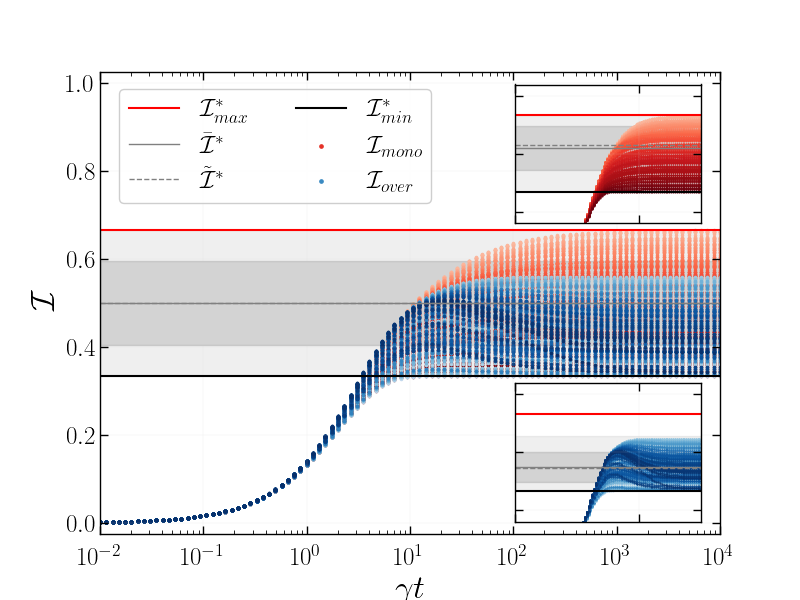

In [279]:
# ----------------------------------------------------------------------------------------------------------------------------------
# USER OPTIONS
# ----------------------------------------------------------------------------------------------------------------------------------
# Whether to load the data from the file or use the data from the current run
load_figure_data = True
# Whether to calculate all data points from the raw data
calculate_figure_data = True
# Whether to load the used indices from the file or use a new random sample
load_figure_indices = True
# Whether to save the figure to a file
save_figure = True
# ----------------------------------------------------------------------------------------------------------------------------------
# LOAD DATA
# ----------------------------------------------------------------------------------------------------------------------------------
# Set the figure number
figure_number = 3
# Check if the data should be loaded from the file
if load_figure_data:        
    # Find data files in the directory for the specified figure number
    files_found = [name for name in os.listdir('../dat') if name.startswith(f'Figure_{figure_number:02}')]
    print(f'Files found: {files_found}')
    n_files = len(files_found)
    n_tasks = n_files # Alias for readability
    # Check if there are any data files for the specified figure number
    if n_files > 0:
        n_tasks = n_files
    else:
        raise ValueError("No data files found for the specified figure number.")    
    # Preload dims, gammas and n_gates from the first data file to initialize them before the loop
    data = load_data(figure_number, 2)
    dims = data['dims']
    gammas = data['gammas']
    n_gates = data['n_gates'] 
    times = data['times']
    # Pre-allocate space for the AGI data
    AGIs_data_d = []
    n_tasks = 10
    # Loop over the dimensions
    for d_idx, d in enumerate(dims):   
        # Pre-allocate space for the AGI data per dimension 
        AGIs_temp = []      
        # Loop over the number of tasks/ data files
        for n in range(1, n_tasks + 1):
            # Load the data from file number n
            data = load_data(figure_number, n)
            # Append the AGI data to the temporary list      
            AGIs_temp.append(data['AGIs_d'][d_idx])
        # Concatenate all the elements of AGIs_temp together
        AGIs = np.concatenate(AGIs_temp, axis = 0)
        # Append the concatenated AGI data to the main list
        AGIs_data_d.append(AGIs)
    # Save to original variable name
    AGIs_d = AGIs_data_d
    # Update the total number of gates
    n_gates = len(AGIs_data_d[0])  

if calculate_figure_data:
    # Pre-allocate space for the AGI curves
    gates_with_turning_points = []
    gates_with_second_order_turning_points = []
    curves_with_turning_points = []
    curves_with_second_order_turning_points = []
    curves_without_turning_points = []
    tp_indices_gates = []

    gammas_fill = np.linspace(1e-6, 1e6, 1000)
    hatch_list = ['//', 'xx']
    fill_list = ['k', 'k']

    # Iterate through each gate
    for n in range(n_gates):
        # Calculate the gradient (difference) of the AGI values along the curve
        gradient = np.diff(AGIs[n])    
        # Fix tolerance on gradients to remove numerical errors near zero
        # gradient = np.where(np.abs(gradient) < 1e-9, 0, gradient)
        # Find where the gradient changes sign from + to -
        # This indicates that the curve had a maximum and started to decrease
        tp_indices = np.where(np.diff(np.sign(gradient)) < -1)
        turning_points = tp_indices[0]
        if len(turning_points) > 0:
            gates_with_turning_points.append(n)
            tp_indices_gates.append(turning_points[0])

    # Populate the lists based on whether a curve has a turning point
    for n in range(n_gates):
        if n in gates_with_turning_points:
            curves_with_turning_points.append(AGIs[n])
        else:
            curves_without_turning_points.append(AGIs[n])

    print(f'Number of Gates with Turning Points : {len(gates_with_turning_points)}')
    print(f'Number of Gates with Peak values above threshold : {len(curves_with_turning_points)}')
    print(f'Number of Gates without peaks : {len(curves_without_turning_points)}')

    # Convert lists to NumPy arrays
    curves_without_turning_points_array = np.array(curves_without_turning_points)
    curves_with_turning_points_array = np.array(curves_with_turning_points)    

    # Sort curves_without_turning_points_array by final value in each sub-array in reverse order
    sorted_indices = np.argsort(curves_without_turning_points_array[:, -1])
    reverse_sorted_indices = sorted_indices[::-1]
    sorted_curves_without_turning_points_array = curves_without_turning_points_array[reverse_sorted_indices]

    if len(curves_with_turning_points_array) > 0:
        peakiness = np.array([(np.max(curves_with_turning_points_array[i]) - curves_with_turning_points_array[i, -1]) / np.max(curves_with_turning_points_array[i]) for i in range(len(curves_with_turning_points_array))])
        # Sort curves_with_turning_points_array by peakiness
        sorted_indices = np.argsort(peakiness)
        sorted_curves_with_turning_points_array = curves_with_turning_points_array[sorted_indices]
        sorted_peakiness = peakiness[sorted_indices]

        TP_max = np.max(curves_with_turning_points_array[:, -1])
        TP_min = np.min(curves_with_turning_points_array[:, -1])
        TP_avg = np.mean(curves_with_turning_points_array[:, -1])
        TP_std = np.std(curves_with_turning_points_array[:, -1])
        TP_med = np.median(curves_with_turning_points_array[:, -1])
        TP_std_max = TP_avg + TP_std
        TP_std_min = TP_avg - TP_std

    AGI_max = np.max(AGIs[:, -1])
    AGI_min = np.min(AGIs[:, -1])
    AGI_avg = np.mean(AGIs[:, -1])
    AGI_std = np.std(AGIs[:, -1])
    AGI_med = np.median(AGIs[:, -1])
    AGI_std_max = AGI_avg + AGI_std
    AGI_std_min = AGI_avg - AGI_std

    no_TP_max = np.max(curves_without_turning_points_array[:, -1])
    no_TP_min = np.min(curves_without_turning_points_array[:, -1])
    no_TP_avg = np.mean(curves_without_turning_points_array[:, -1])
    no_TP_std = np.std(curves_without_turning_points_array[:, -1])
    no_TP_med = np.median(curves_without_turning_points_array[:, -1])
    no_TP_std_max = no_TP_avg + no_TP_std
    no_TP_std_min = no_TP_avg - no_TP_std    

    n_curves = 150

    if load_figure_indices:
        with open('../dat/Figure_03_results_ind.blob', 'rb') as file:
            curve_indices_0_TP, curve_indices_1_TP = pickle.load(file)
    else:
        # Sample n_curves integer indices from the curve arrays at random and sort in order
        curve_indices_0_TP = np.sort(np.random.choice(np.arange(len(curves_without_turning_points_array)), n_curves))
        curve_indices_1_TP = np.sort(np.random.choice(np.arange(len(curves_with_turning_points_array)), n_curves))

    # Create colormap linspaces
    colors_list_turning_points = np.linspace(0.25, 1, len(curves_with_turning_points))
    colors_list_no_turning_points = np.linspace(0.25, 1, len(curves_without_turning_points))
    # Create colour lists
    colors_turning_points = plt.cm.Blues(colors_list_turning_points)
    colors_no_turning_points = plt.cm.Reds(colors_list_no_turning_points)

# ----------------------------------------------------------------------------------------------------------------------------------
# PLOT FIGURES
# ----------------------------------------------------------------------------------------------------------------------------------

plt.clf()
plt.close()
plt.figure()

mpl.rcParams.update({'grid.linewidth' : 0.1 ,})

# Define figure settings
plt.xscale("log")
plt.yscale("linear")
plt.ylim(-0.025, 1.025)
plt.xlim(1e-2, 1e4)
# Add axes labels
plt.xlabel(r'$\gamma t$')
plt.ylabel(r'$\mathcal{I}$')

plt.axhline(y = 1 - 1 / (d + 1), color = 'r', linestyle = '-', linewidth = 1.5, label = r'$\mathcal{I}_{max}^*$')


plt.fill_between(gammas, AGI_min * np.ones_like(gammas), AGI_max * np.ones_like(gammas), color = 'gray', alpha = 0.125)
plt.fill_between(gammas, AGI_std_min * np.ones_like(gammas), AGI_std_max * np.ones_like(gammas), color = 'gray', alpha = 0.25)
plt.plot(gammas, AGI_avg * np.ones_like(gammas), color = 'gray', linewidth = 1, label = r'$\bar{\mathcal{I}}^*$')
plt.plot(gammas, AGI_med * np.ones_like(gammas), color = 'gray', linestyle = '--', linewidth = 1, label = r'$\tilde{\mathcal{I}}^*$')
plt.axhline(y = 1 - 2 / (d + 1), color = 'k', linestyle = '-', linewidth = 1.5, label = r'$\mathcal{I}_{min}^*$')

# Plot the curves without turning points
for n in curve_indices_0_TP:
    plt.scatter(gammas, sorted_curves_without_turning_points_array[n], color = colors_no_turning_points[n], marker = 'o', s=2.5, label = r'$\mathcal{I}_{mono}$' if n == curve_indices_0_TP[int(n_curves/2)] else None)
# Plot the curves with turning points
for n in curve_indices_1_TP:
    plt.scatter(gammas, sorted_curves_with_turning_points_array[n], color = colors_turning_points[n], marker = 'o', s=2.5, label = r'$\mathcal{I}_{over}$' if n == curve_indices_1_TP[int(n_curves/2)] else None)

# plt.tick_params(which = 'both', bottom = True, top = True, left = True, right = True)
# plt.tick_params(axis = 'both', which = 'both', direction = 'in')
# plt.tick_params(axis='both', which='major', labelsize=ticks_label_font_size, direction = tick_direction, size = major_tick_length, width = major_tick_width)
# plt.tick_params(axis='both', which='minor', labelsize=ticks_label_font_size, direction = tick_direction, size = minor_tick_length, width = minor_tick_width)

plt.legend(loc='upper left', bbox_to_anchor=(0.01, 0.99), ncol=2)

# Add inset to figure
ax = plt.gca()
inset_ax = inset_axes(ax, width="30%", height="30%", loc='upper right', bbox_to_anchor=(-0.01, 0, 1, 1), bbox_transform=ax.transAxes)

inset_ax.axhline(y = 1 - 2 / (d + 1), color = 'k', linestyle = '-', linewidth = 1.5, label = rf'1 - 2 / (d + 1)')
inset_ax.axhline(y = 1 - 1 / (d + 1), color = 'r', linestyle = '-', linewidth = 1.5, label = rf'1 - 1 / (d + 1)')

inset_ax.fill_between(gammas, no_TP_min * np.ones_like(gammas), no_TP_max * np.ones_like(gammas), color = 'gray', alpha = 0.125)
inset_ax.fill_between(gammas, no_TP_std_min * np.ones_like(gammas), no_TP_std_max * np.ones_like(gammas), color = 'gray', alpha = 0.25)
inset_ax.plot(gammas, no_TP_avg * np.ones_like(gammas), color = 'gray', linewidth = 1, label = r'$\mu_{noTP}$')
inset_ax.plot(gammas, no_TP_med * np.ones_like(gammas), color = 'gray', linestyle = '--', linewidth = 1, label = r'$\tilde{\mu}_{noTP}$')

for n in curve_indices_0_TP:
    inset_ax.scatter(gammas, sorted_curves_without_turning_points_array[n], color = colors_no_turning_points[n], marker = '.', s=1)

inset_ax.set_xscale('log')
inset_ax.set_ylim(0.2, 0.8)
inset_ax.set_xlim(1e-2, 1e+4)
inset_ax.tick_params(axis = 'both', which = 'both', direction = 'in')
inset_ax.set_yticklabels([])
inset_ax.set_xticklabels([])

# Add inset to figure
inset_ax = inset_axes(ax, width="30%", height="30%", loc='lower right', bbox_to_anchor=(-0.01, 0, 1, 1), bbox_transform=ax.transAxes)

inset_ax.axhline(y = 1 - 2 / (d + 1), color = 'k', linestyle = '-', linewidth = 1.5, label = rf'1 - 2 / (d + 1)')
inset_ax.axhline(y = 1 - 1 / (d + 1), color = 'r', linestyle = '-', linewidth = 1.5, label = rf'1 - 1 / (d + 1)')

inset_ax.fill_between(gammas, TP_min * np.ones_like(gammas), TP_max * np.ones_like(gammas), color = 'gray', alpha = 0.125)
inset_ax.fill_between(gammas, TP_std_min * np.ones_like(gammas), TP_std_max * np.ones_like(gammas), color = 'gray', alpha = 0.25)
inset_ax.plot(gammas, TP_avg * np.ones_like(gammas), color = 'gray', linewidth = 1, label = r'$\mu_{TP}$')
inset_ax.plot(gammas, TP_med * np.ones_like(gammas), color = 'gray', linestyle = '--', linewidth = 1, label = r'$\tilde{\mu}_{TP}$')

for n in curve_indices_1_TP:
    inset_ax.scatter(gammas, sorted_curves_with_turning_points_array[n], color = colors_turning_points[n], marker = '.', s=1)

inset_ax.set_xscale('log')
inset_ax.set_ylim(0.2, 0.8)
inset_ax.set_xlim(1e-2, 1e+4)
# inset_ax.tick_params(axis = 'both', which = 'both', direction = 'in')
inset_ax.set_yticklabels([])
inset_ax.set_xticklabels([])

if save_figure:
    plt.savefig(f'../fig/Figure_{figure_number:02}.png', format='png', bbox_inches='tight', dpi = 300)

plt.show()

# <span style="font-size: 60px; font-family: Arial, sans-serif">FIGURE 4</span>

## <span style="font-size: 24px; font-family: Arial, sans-serif">Generate Data</span>

In [72]:
# ----------------------------------------------------------------------------------------------------------------------------------
# IMPORTS
# ----------------------------------------------------------------------------------------------------------------------------------

import paper_imports
import paper_methods

from paper_imports import *
from paper_methods import *

importlib.reload(paper_imports)
importlib.reload(paper_methods)

import paper_imports
import paper_methods

from paper_imports import *
from paper_methods import *

# ----------------------------------------------------------------------------------------------------------------------------------
# USER OPTIONS
# ----------------------------------------------------------------------------------------------------------------------------------

# Save data to file
save_figure_data : bool = False

# ----------------------------------------------------------------------------------------------------------------------------------
# HPC SETTINGS
# ----------------------------------------------------------------------------------------------------------------------------------

# Get script file name
script_file_name : str = "paper_figure_04.py"

task_count, task_id, n_CPUs, figure_number = get_SLURM_Data(script_file_name)

n_tasks = 1
task_id += n_tasks

print = functools.partial(print, flush = True)

# ----------------------------------------------------------------------------------------------------------------------------------
# START OF SCRIPT
# ----------------------------------------------------------------------------------------------------------------------------------

# START TIMING
start_time : float = time.time()
# Convert start time to real-world time
real_world_start_time : str = time.strftime("%y-%m-%d_%X_%Z").replace("/", "-").replace(":", "-")

# Set the figure number
figure_number : int = 4
# Set the method for generating gates
method : str = 'interpolated_INC'
# Set collapse operator
collapse_operator : str = 'z'
# Set dimensions for the qudits
dims : list[int] = [4]
# Set the range of noise strengths for the collapse operator
gamma_min : float = 1e-4
gamma_max : float = 1e+4
gamma_num : int = 2 * n_CPUs #50
gammas_ndarray : np.ndarray = np.geomspace(gamma_min, gamma_max, gamma_num, dtype = np.float64)
gammas : list[float] = gammas_ndarray.tolist()
# Set alias for gamma_num for readability
n_gammas : int = gamma_num
# Set number of random quantum gates
n_gates : int = 6
# Set number of random initial density matrix states
n_states : int = 100 * n_CPUs
# Set times for the propagator; currently set to just one value, 1.0
times : float = 1.0
# Set parallelization parameters
parallel_verbosity : int = 11
n_jobs_gates : int = min(n_CPUs, n_gates)
batch_size_gates : int = int(n_gates / n_jobs_gates)
n_jobs_gammas : int = int(n_CPUs)
batch_size_gammas : int = int(n_gammas / n_jobs_gammas)   
n_jobs_states : int = int(n_CPUs)
batch_size_states : int = int(n_states / n_jobs_states)
# Set options for the mesolve function (solver options for differential equations)
options_mesolve : qt.Options = qt.Options()
options_mesolve.method = 'bdf'  # Setting method to 'bdf' (backward differentiation formula)
options_mesolve.max_step = float(0.001) # type: ignore 
options_mesolve.nsteps = float(1000000) # type: ignore
options_mesolve.rtol = float(1e-8)  # Relative tolerance
options_mesolve.atol = float(1e-8)  # Absolute tolerance

# Pre-allocate space for data
AGIs_d : list = []
coherences_d : list = []
super_gates_d : list = []
hamiltonians_d : list = []
final_states_d : list = []
coherences_d : list = []
purities_d : list = []
entropies_d : list = []

# Print the config parameters
print(f"STARTING TIMESTAMP: {real_world_start_time}")
print('\n')
print('PRINTING CONFIG PARAMETERS:')
print('---------------------------')
print('\n')
print(f"CURRENT TASK : {task_id:03} / {task_count:03}")
print(f'MODIFIED FIGURE NUMBER : {figure_number}')
print(f'SAVING FIGURE DATA : {save_figure_data}')
print('\n')
print(f"GATE GENERATION METHOD : {method}")
print (f"QUDIT DIMENSIONS : {dims}")
print(f"COLLAPSE OPERATOR : {collapse_operator}")
print(f"NUMBER OF GAMMAS : {n_gammas}")
print(f"NUMBER OF GATES : {n_gates}")
print(f"GAMMAS : {gammas}")
print(f"GATE TIMES : {times}")
print('\n')
print(f"PARALLEL VERBOSITY : {parallel_verbosity}")
print(f"NUMBER OF PARALLEL JOBS FOR FIDELITIES : {n_jobs_gammas}")
print(f"BATCH SIZE PER FIDELITY JOB : {batch_size_gammas}")
print(f"NUMBER OF PARALLEL JOBS FOR INITIAL STATES : {n_jobs_states}")
print(f"BATCH SIZE PER STATE JOB : {batch_size_states}")
print(f"OPTIONS FOR MESOLVE : {options_mesolve}")
print('\n')

# INITIALIZATION TIME
initialization_time : float = time.time()
print(f"Initialization time: {initialization_time - start_time}")

print('\n')

# Loop over the dimensions
for d_idx, d in enumerate(dims):

    # LOOP START TIME
    loop_start_time : float = time.time()  
    
    print(f"Dimension: {d}")

    # Pre-allocate space for local data
    AGIs : np.ndarray = np.empty((n_gates, n_gammas), dtype = np.float64)
    AGF : np.ndarray = np.empty(n_gammas, dtype = np.float64)
    final_state : list = [qt.Qobj(np.empty((d, d), dtype = np.complex128)) for _ in range(n_states)]
    final_states_g : list = []
    coherences_gates : list = []
    purities_gates : list = []
    entropies_gates : list = []

    # Initialize a qudit of dimension d
    qudit = Qudit(d = d)
    # Get qudit collapse operators
    j = qudit.get_j
    L : qt.Qobj = j(collapse_operator) # type: ignore         

    # Define random initial states
    initial_kets = [qt.rand_ket(d) for _ in range(n_states)]
    initial_states = [initial_kets[n] * initial_kets[n].dag() for n in range(n_states)]

    # Initialise the etas list
    etas_list = (3 * d - 2) / (4 * d)
    etas_list = np.linspace(0, etas_list, n_gates - 3)
    etas_list = np.append(etas_list, (etas_list[-1] + etas_list[-2]) / 2)
    etas_list = np.append(etas_list, 1)    
    etas_list = np.sort(etas_list).tolist()    

    # LOOP INITIALIZATION TIME
    loop_initialization_time : float = time.time()
    print(f"Loop initialization time: {loop_initialization_time - loop_start_time}")

    # Generate a list of random unitary gates and Hamiltonians
    super_gates, hamiltonians = generate_gates_and_hamiltonians(n_gates - 1, d, method = method, n_jobs = n_jobs_gates, batch_size = batch_size_gates, is_super = True, etas = etas_list)
    # Generate the QFT/ Chrestenson/ Hadamard gate
    super_gates2, hamiltonians2 = generate_gates_and_hamiltonians(1, d, method = 'QFT', n_jobs = 1, batch_size = 1, is_super = True)

    # Add the two lists together
    super_gates = super_gates + super_gates2
    hamiltonians = hamiltonians + hamiltonians2

    # Store the super gates and Hamiltonians for the current dimension
    super_gates_d.append(super_gates)
    hamiltonians_d.append(hamiltonians)    

    # GATE GENERATION TIME
    gate_generation_time = time.time()
    print(f"Gate generation time: {gate_generation_time - initialization_time}")

    # Loop over number of gates
    for idx, gate in enumerate(super_gates):        

        # GAMMA FIDELITY START TIME
        gamma_fidelity_start_time : float = time.time()

        print(f'LOOP OVER GATE : {idx + 1:03} / {n_gates:03}')

        # Parallelize the gammas loop for the fidelities
        print(f'PARALLELISED AGFs FOR : {n_gammas: 03} GAMMAS')
        AGF = Parallel(n_jobs = n_jobs_gammas, batch_size = batch_size_gammas, verbose = parallel_verbosity)(delayed(compute_fidelity)(hamiltonians[idx], gate, L, times, d, g, options_mesolve) for g in gammas) # type : ignore             

        # Pre-allocate space for the final states, coherences, purities and entropies
        final_states = np.zeros((n_states, n_gammas), dtype = qt.Qobj) 
        coherences = np.zeros((n_states, n_gammas), dtype = np.float64)
        purities = np.zeros((n_states, n_gammas), dtype = np.float64)
        entropies = np.zeros((n_states, n_gammas), dtype = np.float64)

        # Loop over the number of random initial states
        for g_idx, g in enumerate(gammas):
            # DENSITY MATRIX START TIME
            density_matrix_start_time : float = time.time()

            print(f'LOOP OVER GAMMA : {g_idx + 1:02} / {n_gammas:02}')

            # Parallelize the gammas loop for the coherences
            print(f'PARALLELISED INITIAL STATES')
            final_state = Parallel(n_jobs = n_jobs_states, batch_size = batch_size_states, verbose = parallel_verbosity)(delayed(propagate_density_matrix)(hamiltonians[idx], initial_states[s], L, times, d, g, options_mesolve) for s in range(n_states)) # type : ignore
            print('PARALLELISED COHERENCES')
            coherences[:, g_idx] = Parallel(n_jobs = n_jobs_states, batch_size = batch_size_states, verbose = parallel_verbosity)(delayed(average_coherences_density_matrix)(final_state[s]) for s in range(n_states)) # type : ignore
            print('PARALLELISED PURITIES')
            purities[:, g_idx] = Parallel(n_jobs = n_jobs_states, batch_size = batch_size_states, verbose = parallel_verbosity)(delayed(purity_density_matrix)(final_state[s], d) for s in range(n_states)) # type : ignore
            print('PARALLELISED ENTROPIES')
            entropies[:, g_idx] = Parallel(n_jobs = n_jobs_states, batch_size = batch_size_states, verbose = parallel_verbosity)(delayed(von_neumann_entropy)(final_state[s]) for s in range(n_states)) # type : ignore
            
            # Store the final states for the current initial state
            final_states[:, g_idx] = final_state

            # DENSITY MATRIX TIME
            density_matrix_time : float = time.time()
            print(f'{n_states:04} FINAL STATES FOR GAMMA {g_idx + 1:02} / {n_gammas:02} completed in: {density_matrix_time - density_matrix_start_time}') 
            print('\n')       

        # GAMMA FIDELITY TIME
        gamma_fidelity_time : float = time.time()
        print(f"Gate AGFs & DMs: {idx + 1:03} / {n_gates:03} completed in: {gamma_fidelity_time - gamma_fidelity_start_time}")
        
        # Store the final states for the current gate
        final_states_g.append(final_states)

        # Aggregate the properties of the final density matrices
        coherences_gates.append([np.mean(coherences[:, g_idx]) for g_idx in range(n_gammas)])
        purities_gates.append([np.mean(purities[:, g_idx]) for g_idx in range(n_gammas)])
        entropies_gates.append([np.mean(entropies[:, g_idx]) for g_idx in range(n_gammas)])
        
        # Store the AGI and average coherence data for the current gate
        AGIs[idx] = 1 - np.array(AGF)

    # Store the final data for the current dimension
    AGIs_d.append(AGIs)
    final_states_d.append(final_states_g)
    coherences_d.append(coherences_gates)
    purities_d.append(purities_gates)
    entropies_d.append(entropies_gates)

    # FIDELITY TIME
    fidelity_time = time.time()
    print(f"Fidelity time: {fidelity_time - gate_generation_time}")

    # SINGLE LOOP TIME
    loop_time = time.time()
    print(f"Single loop time: {loop_time - loop_start_time}")

    print('\n')    

# TOTAL LOOP TIME
total_loop_time = time.time()
print(f"Total loop time: {total_loop_time - start_time}")

# Save the data
if save_figure_data:
    save_data(figure_number, task_id, dims = dims, gammas = gammas, n_gammas = n_gammas, n_gates = n_gates, n_states = n_states, times = times, AGIs_d = AGIs_d, hamiltonians_d = hamiltonians_d, final_states_d = final_states_d, coherences_d = coherences_d, purities_d = purities_d, entropies_d = entropies_d)
 

# SAVE DATA TIME
save_data_time = time.time()
print(f"Save data time: {save_data_time - total_loop_time}")

# TOTAL TIME
total_time = time.time()
print(f"Total time: {total_time - start_time}")

# ----------------------------------------------------------------------------------------------------------------------------------
# END OF SCRIPT
# ----------------------------------------------------------------------------------------------------------------------------------

FIGURE_NUMBER: 04
SCRIPT_NAME: paper_figure_04.py


SLURM_JOB_ID: NOSLURM
SLURM_ARRAY_TASK_COUNT: 1
SLURM_ARRAY_TASK_ID: 1
SLURM_CPUS_ON_NODE: 12


STARTING TIMESTAMP: 24-04-02_16-04-12_CEST


PRINTING CONFIG PARAMETERS:
---------------------------


CURRENT TASK : 002 / 001
MODIFIED FIGURE NUMBER : 4
SAVING FIGURE DATA : False


GATE GENERATION METHOD : interpolated_INC
QUDIT DIMENSIONS : [4]
COLLAPSE OPERATOR : z
NUMBER OF GAMMAS : 24
NUMBER OF GATES : 6
GAMMAS : [0.0001, 0.00022275429519995563, 0.0004961947603002903, 0.0011052951411260222, 0.0024620924014946257, 0.005484416576121015, 0.012216773489967919, 0.027213387683753087, 0.06061898993497572, 0.13503140378698722, 0.3007882518043099, 0.670018750350959, 1.4924955450518291, 3.3245979322709385, 7.405684692262442, 16.496480740980207, 36.74661940736688, 81.85467307069021, 182.33480008684387, 406.158598837698, 904.7357242349293, 2015.337685941731, 4489.251258218607, 10000.0]
GATE TIMES : 1.0


PARALLEL VERBOSITY : 11
NUMBER OF PARALLE

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.


Gate generation time: 11.43845820426941
LOOP OVER GATE : 001 / 006
PARALLEL LOOP OVER AGFs FOR :  24 GAMMAS


[Parallel(n_jobs=12)]: Done   2 out of   5 | elapsed:   11.2s remaining:   16.7s
[Parallel(n_jobs=12)]: Done   3 out of   5 | elapsed:   11.2s remaining:    7.4s
[Parallel(n_jobs=12)]: Done   5 out of   5 | elapsed:   11.3s finished
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done   4 out of  24 | elapsed:    1.0s remaining:    5.0s
[Parallel(n_jobs=12)]: Done  10 out of  24 | elapsed:    4.4s remaining:    6.2s


LOOP OVER GAMMA : 01 / 24
PARALLEL LOOP OVER INITIAL STATES


[Parallel(n_jobs=12)]: Done  16 out of  24 | elapsed:   11.3s remaining:    5.7s
[Parallel(n_jobs=12)]: Done  22 out of  24 | elapsed:   11.5s remaining:    1.0s
[Parallel(n_jobs=12)]: Done  24 out of  24 | elapsed:   11.5s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.


PARALLEL LOOP OVER COHERENCES


[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.4s remaining:    1.2s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.4s remaining:    0.6s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.4s remaining:    0.3s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.5s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.0s finished


PARALLEL LOOP OVER PURITIES
PARALLEL LOOP OVER ENTROPIES
0012 FINAL STATES FOR GAMMA 01 / 24 completed in: 0.6662216186523438


LOOP OVER GAMMA : 02 / 24
PARALLEL LOOP OVER INITIAL STATES


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.0s remaining:    0.0s
[Pa

PARALLEL LOOP OVER COHERENCES
PARALLEL LOOP OVER PURITIES
PARALLEL LOOP OVER ENTROPIES
0012 FINAL STATES FOR GAMMA 02 / 24 completed in: 0.4904601573944092


LOOP OVER GAMMA : 03 / 24
PARALLEL LOOP OVER INITIAL STATES


[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.3s remaining:    1.0s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.3s remaining:    0.5s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.4s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.0s finished
[Parallel

PARALLEL LOOP OVER COHERENCES
PARALLEL LOOP OVER PURITIES
PARALLEL LOOP OVER ENTROPIES
0012 FINAL STATES FOR GAMMA 03 / 24 completed in: 0.5238304138183594


LOOP OVER GAMMA : 04 / 24
PARALLEL LOOP OVER INITIAL STATES


[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.4s remaining:    1.1s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.4s remaining:    0.5s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.4s remaining:    0.3s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.4s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.0s finished
[Parallel

PARALLEL LOOP OVER COHERENCES
PARALLEL LOOP OVER PURITIES
PARALLEL LOOP OVER ENTROPIES
0012 FINAL STATES FOR GAMMA 04 / 24 completed in: 0.5296270847320557


LOOP OVER GAMMA : 05 / 24
PARALLEL LOOP OVER INITIAL STATES


[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.4s remaining:    1.1s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.4s remaining:    0.5s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.4s remaining:    0.3s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.4s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.0s finished
[Parallel

PARALLEL LOOP OVER COHERENCES
PARALLEL LOOP OVER PURITIES
PARALLEL LOOP OVER ENTROPIES
0012 FINAL STATES FOR GAMMA 05 / 24 completed in: 0.5321774482727051


LOOP OVER GAMMA : 06 / 24
PARALLEL LOOP OVER INITIAL STATES


[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.4s remaining:    1.1s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.4s remaining:    0.5s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.4s remaining:    0.3s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.4s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.0s finished
[Parallel

PARALLEL LOOP OVER COHERENCES
PARALLEL LOOP OVER PURITIES
PARALLEL LOOP OVER ENTROPIES
0012 FINAL STATES FOR GAMMA 06 / 24 completed in: 0.4993100166320801


LOOP OVER GAMMA : 07 / 24
PARALLEL LOOP OVER INITIAL STATES


[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.3s remaining:    1.0s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.4s remaining:    0.5s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.4s remaining:    0.3s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.4s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.0s finished
[Parallel

PARALLEL LOOP OVER COHERENCES
PARALLEL LOOP OVER PURITIES
PARALLEL LOOP OVER ENTROPIES
0012 FINAL STATES FOR GAMMA 07 / 24 completed in: 0.5433642864227295


LOOP OVER GAMMA : 08 / 24
PARALLEL LOOP OVER INITIAL STATES


[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.4s remaining:    1.1s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.4s remaining:    0.5s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.4s remaining:    0.3s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.4s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.0s finished
[Parallel

PARALLEL LOOP OVER COHERENCES
PARALLEL LOOP OVER PURITIES
PARALLEL LOOP OVER ENTROPIES
0012 FINAL STATES FOR GAMMA 08 / 24 completed in: 0.5540437698364258


LOOP OVER GAMMA : 09 / 24
PARALLEL LOOP OVER INITIAL STATES


[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.4s remaining:    1.2s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.4s remaining:    0.6s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.4s remaining:    0.3s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.4s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.0s finished
[Parallel

PARALLEL LOOP OVER COHERENCES
PARALLEL LOOP OVER PURITIES
PARALLEL LOOP OVER ENTROPIES
0012 FINAL STATES FOR GAMMA 09 / 24 completed in: 0.5154397487640381


LOOP OVER GAMMA : 10 / 24
PARALLEL LOOP OVER INITIAL STATES


[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.3s remaining:    1.0s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.3s remaining:    0.5s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.4s remaining:    0.3s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.4s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.0s finished
[Parallel

PARALLEL LOOP OVER COHERENCES
PARALLEL LOOP OVER PURITIES


[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.3s remaining:    1.0s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.3s remaining:    0.5s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.4s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.0s finished
[Parallel

PARALLEL LOOP OVER ENTROPIES
0012 FINAL STATES FOR GAMMA 10 / 24 completed in: 0.5544393062591553


LOOP OVER GAMMA : 11 / 24
PARALLEL LOOP OVER INITIAL STATES


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.


PARALLEL LOOP OVER COHERENCES
PARALLEL LOOP OVER PURITIES
PARALLEL LOOP OVER ENTROPIES


[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.4s remaining:    1.1s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.4s remaining:    0.5s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.4s remaining:    0.3s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.4s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.0s finished
[Parallel

0012 FINAL STATES FOR GAMMA 11 / 24 completed in: 0.552375078201294


LOOP OVER GAMMA : 12 / 24
PARALLEL LOOP OVER INITIAL STATES


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.


PARALLEL LOOP OVER COHERENCES
PARALLEL LOOP OVER PURITIES
PARALLEL LOOP OVER ENTROPIES


[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.5s remaining:    1.5s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.5s remaining:    0.7s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.5s remaining:    0.4s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.5s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.0s finished
[Parallel

0012 FINAL STATES FOR GAMMA 12 / 24 completed in: 0.690650463104248


LOOP OVER GAMMA : 13 / 24
PARALLEL LOOP OVER INITIAL STATES


[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.


PARALLEL LOOP OVER COHERENCES
PARALLEL LOOP OVER PURITIES
PARALLEL LOOP OVER ENTROPIES
0012 FINAL STATES FOR GAMMA 13 / 24 completed in: 0.5051620006561279


LOOP OVER GAMMA : 14 / 24
PARALLEL LOOP OVER INITIAL STATES


[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.4s remaining:    1.1s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.4s remaining:    0.5s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.4s remaining:    0.3s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.4s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.0s finished
[Parallel

PARALLEL LOOP OVER COHERENCES
PARALLEL LOOP OVER PURITIES
PARALLEL LOOP OVER ENTROPIES
0012 FINAL STATES FOR GAMMA 14 / 24 completed in: 0.505789041519165


LOOP OVER GAMMA : 15 / 24
PARALLEL LOOP OVER INITIAL STATES


[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.4s remaining:    1.1s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.4s remaining:    0.5s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.4s remaining:    0.3s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.4s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.0s finished
[Parallel

PARALLEL LOOP OVER COHERENCES
PARALLEL LOOP OVER PURITIES
PARALLEL LOOP OVER ENTROPIES
0012 FINAL STATES FOR GAMMA 15 / 24 completed in: 0.5392935276031494


LOOP OVER GAMMA : 16 / 24
PARALLEL LOOP OVER INITIAL STATES


[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.4s remaining:    1.1s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.4s remaining:    0.5s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.4s remaining:    0.3s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.4s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.0s finished
[Parallel

PARALLEL LOOP OVER COHERENCES
PARALLEL LOOP OVER PURITIES
PARALLEL LOOP OVER ENTROPIES
0012 FINAL STATES FOR GAMMA 16 / 24 completed in: 0.5336086750030518


LOOP OVER GAMMA : 17 / 24
PARALLEL LOOP OVER INITIAL STATES


[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.4s remaining:    1.1s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.4s remaining:    0.5s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.4s remaining:    0.3s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.4s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.0s finished
[Parallel

PARALLEL LOOP OVER COHERENCES
PARALLEL LOOP OVER PURITIES
PARALLEL LOOP OVER ENTROPIES
0012 FINAL STATES FOR GAMMA 17 / 24 completed in: 0.5203917026519775


LOOP OVER GAMMA : 18 / 24
PARALLEL LOOP OVER INITIAL STATES


[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.4s remaining:    1.1s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.4s remaining:    0.5s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.4s remaining:    0.3s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.4s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.0s finished
[Parallel

PARALLEL LOOP OVER COHERENCES
PARALLEL LOOP OVER PURITIES
PARALLEL LOOP OVER ENTROPIES
0012 FINAL STATES FOR GAMMA 18 / 24 completed in: 0.543938159942627


LOOP OVER GAMMA : 19 / 24
PARALLEL LOOP OVER INITIAL STATES


[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.4s remaining:    1.1s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.4s remaining:    0.5s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.4s remaining:    0.3s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.4s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.0s finished
[Parallel

PARALLEL LOOP OVER COHERENCES
PARALLEL LOOP OVER PURITIES
PARALLEL LOOP OVER ENTROPIES
0012 FINAL STATES FOR GAMMA 19 / 24 completed in: 0.5399570465087891


LOOP OVER GAMMA : 20 / 24
PARALLEL LOOP OVER INITIAL STATES


[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.4s remaining:    1.1s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.4s remaining:    0.5s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.4s remaining:    0.3s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.4s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.0s finished
[Parallel

PARALLEL LOOP OVER COHERENCES
PARALLEL LOOP OVER PURITIES
PARALLEL LOOP OVER ENTROPIES
0012 FINAL STATES FOR GAMMA 20 / 24 completed in: 0.5554187297821045


LOOP OVER GAMMA : 21 / 24
PARALLEL LOOP OVER INITIAL STATES


[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.4s remaining:    1.2s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.4s remaining:    0.6s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.4s remaining:    0.3s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.4s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.0s finished
[Parallel

PARALLEL LOOP OVER COHERENCES
PARALLEL LOOP OVER PURITIES
PARALLEL LOOP OVER ENTROPIES
0012 FINAL STATES FOR GAMMA 21 / 24 completed in: 0.7429080009460449


[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.5s remaining:    1.6s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.6s remaining:    0.8s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.6s remaining:    0.4s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.6s remaining:    0.2s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.6s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.0s finished
[Parallel



LOOP OVER GAMMA : 22 / 24
PARALLEL LOOP OVER INITIAL STATES


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.


PARALLEL LOOP OVER COHERENCES
PARALLEL LOOP OVER PURITIES


[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.8s remaining:    2.5s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.9s remaining:    1.2s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.9s remaining:    0.6s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.9s remaining:    0.3s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.9s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.0s finished
[Parallel

PARALLEL LOOP OVER ENTROPIES
0012 FINAL STATES FOR GAMMA 22 / 24 completed in: 1.0530188083648682


LOOP OVER GAMMA : 23 / 24
PARALLEL LOOP OVER INITIAL STATES


[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.0s finished
/tmp/ipykernel_597/3647157273.py:240: ComplexWarning: Casting complex v

PARALLEL LOOP OVER COHERENCES
PARALLEL LOOP OVER PURITIES


[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    1.6s remaining:    4.7s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    1.6s remaining:    2.3s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    1.6s remaining:    1.2s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    1.7s remaining:    0.6s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    1.7s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.0s finished
[Parallel

PARALLEL LOOP OVER ENTROPIES
0012 FINAL STATES FOR GAMMA 23 / 24 completed in: 1.811751365661621


LOOP OVER GAMMA : 24 / 24
PARALLEL LOOP OVER INITIAL STATES


[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent wor

PARALLEL LOOP OVER COHERENCES


[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    3.3s remaining:    9.9s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    3.3s remaining:    4.6s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    3.4s remaining:    2.4s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    3.4s remaining:    1.1s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    3.4s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.0s remaining:    0.1s


PARALLEL LOOP OVER PURITIES
PARALLEL LOOP OVER ENTROPIES
0012 FINAL STATES FOR GAMMA 24 / 24 completed in: 3.549670457839966


Gate AGFs & DMs: 001 / 006 completed in: 29.607162952423096
LOOP OVER GATE : 002 / 006
PARALLEL LOOP OVER AGFs FOR :  24 GAMMAS


[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_j

LOOP OVER GAMMA : 01 / 24
PARALLEL LOOP OVER INITIAL STATES


[Parallel(n_jobs=12)]: Done  24 out of  24 | elapsed:    5.7s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.


PARALLEL LOOP OVER COHERENCES
PARALLEL LOOP OVER PURITIES
PARALLEL LOOP OVER ENTROPIES
0012 FINAL STATES FOR GAMMA 01 / 24 completed in: 0.44884753227233887


LOOP OVER GAMMA : 02 / 24
PARALLEL LOOP OVER INITIAL STATES


[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.3s remaining:    0.9s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.3s remaining:    0.4s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.3s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.0s finished
[Parallel

PARALLEL LOOP OVER COHERENCES
PARALLEL LOOP OVER PURITIES
PARALLEL LOOP OVER ENTROPIES
0012 FINAL STATES FOR GAMMA 02 / 24 completed in: 0.5259580612182617


LOOP OVER GAMMA : 03 / 24
PARALLEL LOOP OVER INITIAL STATES


[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.4s remaining:    1.1s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.4s remaining:    0.5s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.4s remaining:    0.3s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.4s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.0s finished
[Parallel

PARALLEL LOOP OVER COHERENCES
PARALLEL LOOP OVER PURITIES
PARALLEL LOOP OVER ENTROPIES


[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.4s remaining:    1.3s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.5s remaining:    0.6s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.5s remaining:    0.3s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.5s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.0s finished
[Parallel

0012 FINAL STATES FOR GAMMA 03 / 24 completed in: 0.6570851802825928


LOOP OVER GAMMA : 04 / 24
PARALLEL LOOP OVER INITIAL STATES


[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.


PARALLEL LOOP OVER COHERENCES
PARALLEL LOOP OVER PURITIES
PARALLEL LOOP OVER ENTROPIES
0012 FINAL STATES FOR GAMMA 04 / 24 completed in: 0.5655088424682617


LOOP OVER GAMMA : 05 / 24
PARALLEL LOOP OVER INITIAL STATES


[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.4s remaining:    1.2s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.4s remaining:    0.6s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.4s remaining:    0.3s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.4s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.0s finished
[Parallel

PARALLEL LOOP OVER COHERENCES
PARALLEL LOOP OVER PURITIES
PARALLEL LOOP OVER ENTROPIES
0012 FINAL STATES FOR GAMMA 05 / 24 completed in: 0.5353407859802246


LOOP OVER GAMMA : 06 / 24
PARALLEL LOOP OVER INITIAL STATES


[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.4s remaining:    1.1s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.4s remaining:    0.5s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.4s remaining:    0.3s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.4s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.0s finished
[Parallel

PARALLEL LOOP OVER COHERENCES
PARALLEL LOOP OVER PURITIES
PARALLEL LOOP OVER ENTROPIES
0012 FINAL STATES FOR GAMMA 06 / 24 completed in: 0.5702240467071533




[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.4s remaining:    1.1s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.4s remaining:    0.5s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.4s remaining:    0.3s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.4s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.0s finished
[Parallel

LOOP OVER GAMMA : 07 / 24
PARALLEL LOOP OVER INITIAL STATES


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.


PARALLEL LOOP OVER COHERENCES
PARALLEL LOOP OVER PURITIES
PARALLEL LOOP OVER ENTROPIES
0012 FINAL STATES FOR GAMMA 07 / 24 completed in: 0.5444893836975098


LOOP OVER GAMMA : 08 / 24
PARALLEL LOOP OVER INITIAL STATES


[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.4s remaining:    1.1s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.4s remaining:    0.5s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.4s remaining:    0.3s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.4s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.0s finished
[Parallel

PARALLEL LOOP OVER COHERENCES
PARALLEL LOOP OVER PURITIES


[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.4s remaining:    1.2s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.4s remaining:    0.6s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.5s remaining:    0.3s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.5s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.0s finished
[Parallel

PARALLEL LOOP OVER ENTROPIES
0012 FINAL STATES FOR GAMMA 08 / 24 completed in: 0.6557996273040771


LOOP OVER GAMMA : 09 / 24
PARALLEL LOOP OVER INITIAL STATES


[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.


PARALLEL LOOP OVER COHERENCES
PARALLEL LOOP OVER PURITIES
PARALLEL LOOP OVER ENTROPIES
0012 FINAL STATES FOR GAMMA 09 / 24 completed in: 0.5767276287078857


LOOP OVER GAMMA : 10 / 24
PARALLEL LOOP OVER INITIAL STATES


[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.4s remaining:    1.2s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.4s remaining:    0.6s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.4s remaining:    0.3s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.4s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.0s finished
[Parallel

PARALLEL LOOP OVER COHERENCES
PARALLEL LOOP OVER PURITIES
PARALLEL LOOP OVER ENTROPIES
0012 FINAL STATES FOR GAMMA 10 / 24 completed in: 0.5964546203613281


LOOP OVER GAMMA : 11 / 24


[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.4s remaining:    1.2s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.4s remaining:    0.6s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.4s remaining:    0.3s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.5s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.0s finished
[Parallel

PARALLEL LOOP OVER INITIAL STATES


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.


PARALLEL LOOP OVER COHERENCES
PARALLEL LOOP OVER PURITIES
PARALLEL LOOP OVER ENTROPIES
0012 FINAL STATES FOR GAMMA 11 / 24 completed in: 0.5788121223449707


LOOP OVER GAMMA : 12 / 24
PARALLEL LOOP OVER INITIAL STATES


[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.4s remaining:    1.2s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.4s remaining:    0.6s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.4s remaining:    0.3s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.5s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.0s finished
[Parallel

PARALLEL LOOP OVER COHERENCES
PARALLEL LOOP OVER PURITIES
PARALLEL LOOP OVER ENTROPIES
0012 FINAL STATES FOR GAMMA 12 / 24 completed in: 0.5265910625457764


LOOP OVER GAMMA : 13 / 24
PARALLEL LOOP OVER INITIAL STATES


[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.4s remaining:    1.2s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.4s remaining:    0.6s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.4s remaining:    0.3s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.4s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.0s finished
[Parallel

PARALLEL LOOP OVER COHERENCES
PARALLEL LOOP OVER PURITIES
PARALLEL LOOP OVER ENTROPIES
0012 FINAL STATES FOR GAMMA 13 / 24 completed in: 0.5674240589141846


LOOP OVER GAMMA : 14 / 24
PARALLEL LOOP OVER INITIAL STATES


[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.4s remaining:    1.2s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.4s remaining:    0.6s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.4s remaining:    0.3s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.4s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.0s finished
[Parallel

PARALLEL LOOP OVER COHERENCES
PARALLEL LOOP OVER PURITIES
PARALLEL LOOP OVER ENTROPIES
0012 FINAL STATES FOR GAMMA 14 / 24 completed in: 0.5379929542541504


LOOP OVER GAMMA : 15 / 24
PARALLEL LOOP OVER INITIAL STATES


[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.4s remaining:    1.2s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.4s remaining:    0.6s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.4s remaining:    0.3s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.4s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.0s finished
[Parallel

PARALLEL LOOP OVER COHERENCES
PARALLEL LOOP OVER PURITIES
PARALLEL LOOP OVER ENTROPIES


[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.5s remaining:    1.4s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.5s remaining:    0.7s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.5s remaining:    0.3s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.5s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.0s finished
[Parallel

0012 FINAL STATES FOR GAMMA 15 / 24 completed in: 0.6599431037902832


LOOP OVER GAMMA : 16 / 24
PARALLEL LOOP OVER INITIAL STATES


[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.


PARALLEL LOOP OVER COHERENCES
PARALLEL LOOP OVER PURITIES


[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.5s remaining:    1.4s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.5s remaining:    0.7s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.5s remaining:    0.4s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.5s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.0s finished
[Parallel

PARALLEL LOOP OVER ENTROPIES
0012 FINAL STATES FOR GAMMA 16 / 24 completed in: 0.694894552230835


LOOP OVER GAMMA : 17 / 24
PARALLEL LOOP OVER INITIAL STATES


[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.


PARALLEL LOOP OVER COHERENCES
PARALLEL LOOP OVER PURITIES
PARALLEL LOOP OVER ENTROPIES


[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.4s remaining:    1.2s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.4s remaining:    0.6s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.4s remaining:    0.3s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.5s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.0s finished
[Parallel

0012 FINAL STATES FOR GAMMA 17 / 24 completed in: 0.6103377342224121


LOOP OVER GAMMA : 18 / 24
PARALLEL LOOP OVER INITIAL STATES


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.


PARALLEL LOOP OVER COHERENCES
PARALLEL LOOP OVER PURITIES
PARALLEL LOOP OVER ENTROPIES
0012 FINAL STATES FOR GAMMA 18 / 24 completed in: 0.541705846786499


LOOP OVER GAMMA : 19 / 24
PARALLEL LOOP OVER INITIAL STATES


[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.4s remaining:    1.1s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.4s remaining:    0.5s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.4s remaining:    0.3s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.4s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.0s finished
[Parallel

PARALLEL LOOP OVER COHERENCES
PARALLEL LOOP OVER PURITIES
PARALLEL LOOP OVER ENTROPIES
0012 FINAL STATES FOR GAMMA 19 / 24 completed in: 0.5901377201080322


LOOP OVER GAMMA : 20 / 24
PARALLEL LOOP OVER INITIAL STATES


[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.5s remaining:    1.4s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.5s remaining:    0.6s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.5s remaining:    0.3s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.5s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.0s finished
[Parallel

PARALLEL LOOP OVER COHERENCES
PARALLEL LOOP OVER PURITIES
PARALLEL LOOP OVER ENTROPIES
0012 FINAL STATES FOR GAMMA 20 / 24 completed in: 0.9745023250579834


LOOP OVER GAMMA : 21 / 24
PARALLEL LOOP OVER INITIAL STATES


[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.8s remaining:    2.5s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.8s remaining:    1.2s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.8s remaining:    0.6s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.9s remaining:    0.3s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.9s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.0s finished
[Parallel

PARALLEL LOOP OVER COHERENCES
PARALLEL LOOP OVER PURITIES


[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    1.3s remaining:    3.8s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    1.3s remaining:    1.8s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    1.3s remaining:    0.9s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    1.3s remaining:    0.4s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    1.3s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.0s finished
[Parallel

PARALLEL LOOP OVER ENTROPIES
0012 FINAL STATES FOR GAMMA 21 / 24 completed in: 1.4832141399383545


LOOP OVER GAMMA : 22 / 24
PARALLEL LOOP OVER INITIAL STATES


[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    3.0s remaining:    9.1s
[Parallel(n_j

PARALLEL LOOP OVER COHERENCES
PARALLEL LOOP OVER PURITIES
PARALLEL LOOP OVER ENTROPIES
0012 FINAL STATES FOR GAMMA 22 / 24 completed in: 3.3225836753845215


LOOP OVER GAMMA : 23 / 24
PARALLEL LOOP OVER INITIAL STATES


[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    3.2s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_j

PARALLEL LOOP OVER COHERENCES
PARALLEL LOOP OVER PURITIES
PARALLEL LOOP OVER ENTROPIES
0012 FINAL STATES FOR GAMMA 23 / 24 completed in: 6.6270592212677


LOOP OVER GAMMA : 24 / 24
PARALLEL LOOP OVER INITIAL STATES


[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    6.5s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_j

PARALLEL LOOP OVER COHERENCES
PARALLEL LOOP OVER PURITIES
PARALLEL LOOP OVER ENTROPIES
0012 FINAL STATES FOR GAMMA 24 / 24 completed in: 14.363592863082886


Gate AGFs & DMs: 002 / 006 completed in: 43.5284526348114
LOOP OVER GATE : 003 / 006
PARALLEL LOOP OVER AGFs FOR :  24 GAMMAS


[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:   14.3s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_j

LOOP OVER GAMMA : 01 / 24
PARALLEL LOOP OVER INITIAL STATES


[Parallel(n_jobs=12)]: Done  24 out of  24 | elapsed:    5.3s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.


PARALLEL LOOP OVER COHERENCES
PARALLEL LOOP OVER PURITIES
PARALLEL LOOP OVER ENTROPIES
0012 FINAL STATES FOR GAMMA 01 / 24 completed in: 0.41506028175354004


LOOP OVER GAMMA : 02 / 24
PARALLEL LOOP OVER INITIAL STATES


[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.3s remaining:    0.8s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.3s remaining:    0.4s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.3s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.0s finished
[Parallel

PARALLEL LOOP OVER COHERENCES
PARALLEL LOOP OVER PURITIES
PARALLEL LOOP OVER ENTROPIES
0012 FINAL STATES FOR GAMMA 02 / 24 completed in: 0.584542989730835


LOOP OVER GAMMA : 03 / 24
PARALLEL LOOP OVER INITIAL STATES


[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.4s remaining:    1.2s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.4s remaining:    0.6s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.4s remaining:    0.3s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.4s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.1s finished
[Parallel

PARALLEL LOOP OVER COHERENCES
PARALLEL LOOP OVER PURITIES
PARALLEL LOOP OVER ENTROPIES


[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.4s remaining:    1.2s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.4s remaining:    0.6s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.4s remaining:    0.3s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.5s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.0s finished
[Parallel

0012 FINAL STATES FOR GAMMA 03 / 24 completed in: 0.5969181060791016


LOOP OVER GAMMA : 04 / 24
PARALLEL LOOP OVER INITIAL STATES


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.


PARALLEL LOOP OVER COHERENCES
PARALLEL LOOP OVER PURITIES
PARALLEL LOOP OVER ENTROPIES


[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.5s remaining:    1.4s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.5s remaining:    0.7s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.5s remaining:    0.4s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.5s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.0s finished
[Parallel

0012 FINAL STATES FOR GAMMA 04 / 24 completed in: 0.6709542274475098


LOOP OVER GAMMA : 05 / 24
PARALLEL LOOP OVER INITIAL STATES


[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.


PARALLEL LOOP OVER COHERENCES
PARALLEL LOOP OVER PURITIES


[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.4s remaining:    1.3s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.4s remaining:    0.6s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.4s remaining:    0.3s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.5s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.0s finished
[Parallel

PARALLEL LOOP OVER ENTROPIES
0012 FINAL STATES FOR GAMMA 05 / 24 completed in: 0.6593039035797119


LOOP OVER GAMMA : 06 / 24
PARALLEL LOOP OVER INITIAL STATES


[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.4s remaining:    1.2s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.4s remaining:    0.6s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.4s remaining:    0.3s


KeyboardInterrupt: 

## <span style="font-size: 24px; font-family: Arial, sans-serif">Plot Figure</span>

Files found: ['Figure_04_results_001.blob']


/home/jgkh/.local/lib/python3.9/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)


Data loaded from file: dict_keys(['dims', 'gammas', 'n_gammas', 'n_gates', 'n_states', 'times', 'AGIs_d', 'hamiltonians_d', 'final_states_d', 'coherences_d', 'purities_d', 'entropies_d'])


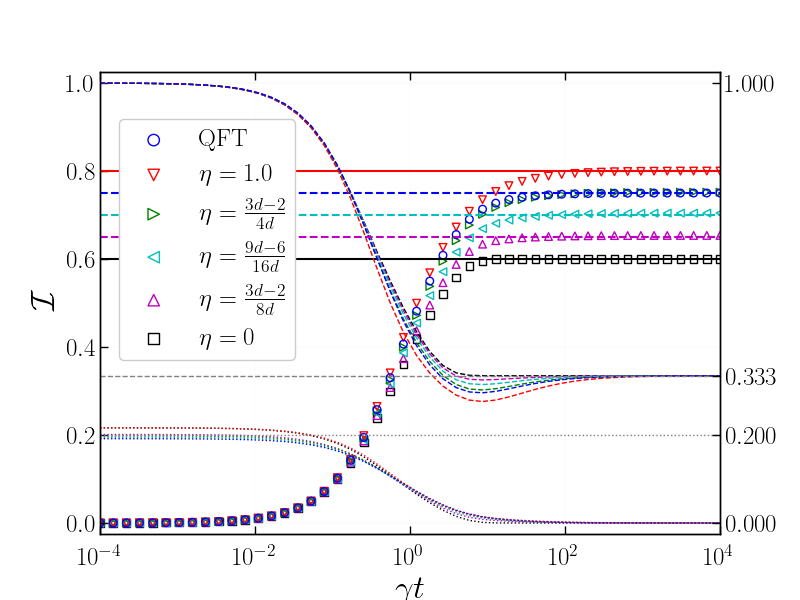

In [246]:
# ----------------------------------------------------------------------------------------------------------------------------------
# USER OPTIONS
# ----------------------------------------------------------------------------------------------------------------------------------
# Whether to load the data from the file or use the data from the current run
load_figure_data = True
# Whether to save the figure to a file
save_figure = True
# ----------------------------------------------------------------------------------------------------------------------------------
# LOAD DATA
# ----------------------------------------------------------------------------------------------------------------------------------
# Set the figure number
figure_number = 4
result_number = 1
# Check if the data should be loaded from the file
if load_figure_data:        
    # Find data files in the directory for the specified figure number
    files_found = [name for name in os.listdir('../dat') if name.startswith(f'Figure_{figure_number:02}')]
    print(f'Files found: {files_found}')
    n_files = len(files_found)
    n_tasks = n_files # Alias for readability
    # Check if there are any data files for the specified figure number
    if n_files > 0:
        n_tasks = n_files
    else:
        raise ValueError("No data files found for the specified figure number.")    
    # Preload dims, gammas and n_gates from the first data file to initialize them before the loop
    data = load_data(figure_number, result_number)
    dims = data['dims']
    gammas = data['gammas']
    n_gates = data['n_gates'] 
    n_gammas = data['n_gammas']
    n_states = data['n_states']
    times = data['times']
    AGIs_d = data['AGIs_d']
    final_states_d = data['final_states_d']
    coherences_d = data['coherences_d']
    purities_d = data['purities_d']
    entropies_d = data['entropies_d']
    print(f'Data loaded from file: {data.keys()}')
    
# ----------------------------------------------------------------------------------------------------------------------------------
# PLOT FIGURES
# ----------------------------------------------------------------------------------------------------------------------------------

gammas_fill = np.linspace(1e-6, 1e6, 1000)

colorlist = ['k', 'm', 'c', 'g', 'r', 'b']

markerlist = ['s', '^', '<', '>', 'v', 'o', 'D']

label_list = [r'$\eta = 0$', r'$\eta = \frac{3 d - 2}{8 d}$', r'$\eta = \frac{9 d - 6}{16 d}$', r'$\eta = \frac{3 d - 2}{4 d}$', r'$\eta = 1.0$', r'$\mathrm{QFT}$']

plt.clf()
plt.close()
plt.figure()

# Set plot settings
plt.xscale('log')
plt.yscale('linear')
plt.ylim(-0.025, 1.025)
plt.xlim(1e-4, 1e4)
plt.ylabel(r'$\mathcal{I}$')
plt.xlabel(r'$\gamma t$')

plt.legend(loc = 'upper left', bbox_to_anchor = (0.01, 0.925), ncol = 2, reverse = True, framealpha = 1)

d = 4

plt.axhline(y = 1 - 2 / (d + 1), color = 'k', linestyle = '-', linewidth = 1.5)#, label = r'$1 - 2 / (d + 1)$')
plt.axhline(y = 1 - 1 / (d), color = 'b', linestyle = '--', linewidth = 1.5)#, label = r'$1 - 1 / (d)$')
plt.axhline(y = 1 - 1 / (d + 1), color = 'r', linestyle = '-', linewidth = 1.5)#, label = r'$1 - 1 / (d + 1)$')

for d_idx, d in enumerate(dims):
    # Pre-allocate space for the AGI data and density_matrix data per dimension
    AGIs = AGIs_d[d_idx]
    for n in range(n_gates):
        plt.scatter(gammas, AGIs[n], color = colorlist[n%7], marker = markerlist[n], facecolor = 'None', s = 30, label = label_list[n])

for d_idx, d in enumerate(dims):
    coherences = coherences_d[d_idx]
    purities = purities_d[d_idx]
    entropies = entropies_d[d_idx]
    for n in range(n_gates):    
        plt.plot(gammas, coherences[n], color = colorlist[n%7], linestyle = ':', linewidth = 1.)
        plt.plot(gammas, purities[n], color = colorlist[n%7], linestyle = '--', linewidth = 1.)

plt.axhline(y = (d**2 - d + 1) / (d * (d + 1)), color = 'm', linestyle = '--', linewidth = 1.5, label = None)
plt.axhline(y = ((d**2 - d + 1) / (d * (d + 1)) + 1 - 1 / (d))/2, color = 'c', linestyle = '--', linewidth = 1.5, label = None)
plt.axhline(y = 1 / (d - 1), color = 'gray', linestyle = '--', linewidth = 1., label = None)
plt.axhline(y = 1 / (d + 1), color = 'gray', linestyle = ':', linewidth = 1., label = None)

# plt.tick_params(which = 'both', bottom = True, top = True, left = True, right = True)
# plt.tick_params(axis = 'both', which = 'both', direction = 'in')
# plt.tick_params(axis='both', which='major', labelsize=ticks_label_font_size, direction = tick_direction, size = major_tick_length, width = major_tick_width)
# plt.tick_params(axis='both', which='minor', labelsize=ticks_label_font_size, direction = tick_direction, size = minor_tick_length, width = minor_tick_width)


plt.legend(loc = 'upper left', bbox_to_anchor = (0.01, 0.925), ncol = 1, reverse = True, framealpha = 1)
d = 4
ax_right = plt.twinx()
ax_right.set_ylim(-0.025, 1.025)
ax_right.set_yticks([0.0, 1 / (d + 1), 1 / (d - 1), 1.0])
# ax_right.tick_params(axis='both', which='major', labelsize=ticks_label_font_size, direction = tick_direction, size = major_tick_length, width = major_tick_width)

if save_figure:
    plt.savefig(f'../fig/Figure_{figure_number:02}.pdf', format='pdf', bbox_inches='tight')

plt.show()

# <span style="font-size: 60px; font-family: Arial, sans-serif">FIGURE 5</span>

## <span style="font-size: 24px; font-family: Arial, sans-serif">Generate Data</span>

In [243]:
# ----------------------------------------------------------------------------------------------------------------------------------
# IMPORTS
# ----------------------------------------------------------------------------------------------------------------------------------

import paper_imports
import paper_methods

from paper_imports import *
from paper_methods import *

importlib.reload(paper_imports)
importlib.reload(paper_methods)

import paper_imports
import paper_methods

from paper_imports import *
from paper_methods import *

# ----------------------------------------------------------------------------------------------------------------------------------
# USER OPTIONS
# ----------------------------------------------------------------------------------------------------------------------------------

# Save data to file
save_figure_data : bool = False
save_search_data : bool = False

# ----------------------------------------------------------------------------------------------------------------------------------
# HPC SETTINGS
# ----------------------------------------------------------------------------------------------------------------------------------

# Get script file name
script_file_name : str = "paper_figure_05.py"
# Get SLURM data if running on the cluster
task_count, task_id, n_CPUs, figure_number = get_SLURM_Data(script_file_name)
# Set the print function to flush the buffer (used for parallel printing in SLURM environment)
print = functools.partial(print, flush = True)

# ----------------------------------------------------------------------------------------------------------------------------------
# START OF SCRIPT
# ----------------------------------------------------------------------------------------------------------------------------------

# START TIMING
start_time : float = time.time()
# Convert start time to real-world time
real_world_start_time : str = time.strftime("%y-%m-%d_%X_%Z").replace("/", "-").replace(":", "-")

# Set the figure number
figure_number : int = 5
# Set the method for generating gates
method : str = 'haar'
# Set max dimension for the qudits
d_max : int = 2
# Set dimensions for the qudits
dims : list[int] = np.arange(2, d_max + 1, 1).tolist()
# Set the range of noise strengths for the collapse operator
gamma_min : float = 1e-2
gamma_max : float = 1e+4
gamma_num : int = 2 * n_CPUs
gammas_array : np.ndarray = np.geomspace(gamma_min, gamma_max, gamma_num, dtype = np.float64)
gammas : list[float] = gammas_array.tolist()
# Set alias for gamma_num for readability
n_gammas : int = gamma_num
# Set collapse operator
collapse_operator : str = "z" # ['x', 'y','z']
# Set number of random quantum gates
n_gates : int = 20
# Set times for the propagator; currently set to just one value, 1.0
times : float = 1.0
# Error threshold and tolerance for root finding the zeros of the gate infidelity
g_step_size : float = 1e+3
x_tolerance : float = 1e-3
y_threshold : float = 1e-3
# Set parallelization parameters
parallel_verbosity : int = 11
n_jobs_gates : int = min(n_CPUs, n_gates)
batch_size_gates : int = int(n_gates / n_jobs_gates)
n_jobs_fidelities : int = min(n_CPUs, n_gammas)
batch_size_fidelities : int = int(n_gammas / n_jobs_fidelities)
# Set options for the mesolve function (solver options for differential equations)
options_mesolve : qt.Options = qt.Options()
options_mesolve.method = 'bdf'  # Setting method to 'bdf' (backward differentiation formula)
options_mesolve.max_step = float(0.001) # type: ignore 
options_mesolve.nsteps = float(1000000) # type: ignore
options_mesolve.rtol = float(1e-8)  # Relative tolerance
options_mesolve.atol = float(1e-8)  # Absolute tolerance

# Print the config parameters
print(f"STARTING TIMESTAMP: {real_world_start_time}")
print('\n')
print('PRINTING CONFIG PARAMETERS:')
print('---------------------------')
print('\n')
print(f"CURRENT TASK : {task_id:03} / {task_count:03}")
print(f'MODIFIED FIGURE NUMBER : {figure_number}')
print(f'SAVING FIGURE DATA : {save_figure_data}')
print('\n')
print(f"GATE GENERATION METHOD : {method}")
print (f"QUDIT DIMENSIONS : {dims}")
print(f"GAMMAS : {gammas}")
print(f"COLLAPSE OPERATOR : {collapse_operator}")
print(f"NUMBER OF GATES : {n_gates}")
print(f"GATE TIMES : {times}")
print(f"ROOT FINDING STEP SIZE GAMMA : {g_step_size}")
print(f"ERROR THRESHOLD : {y_threshold}")
print(f"X TOLERANCE : {x_tolerance}")
print('\n')
print(f"PARALLEL VERBOSITY : {parallel_verbosity}")
print(f"NUMBER OF PARALLEL JOBS : {n_jobs_gates}")
print(f"BATCH SIZE PER JOB : {batch_size_gates}")
print(f"NUMBER OF PARALLEL JOBS : {n_jobs_fidelities}")
print(f"BATCH SIZE PER JOB : {batch_size_fidelities}")
print(f"OPTIONS FOR MESOLVE : {options_mesolve}")
print('\n')

# Pre-allocate space for data
AGIs_d : list = []
super_gates_d : list = []
hamiltonians_d : list = []
plateau_AGIs_d : list = []
plateau_gammas_d : list = []
# AGI_gamma_search_values_d : list = []
root_results_d = []

# INITIALIZATION TIME
initialization_time : float = time.time()
print(f"INITIALISATION TIME: {initialization_time - start_time}")

print('\n')

# Loop over the dimensions
for d in dims:

    # LOOP START TIME
    loop_start_time : float = time.time()  
    
    print(f"DIMENSION : {d:02} / {d_max:02}")

    # Initialize a qudit of dimension d
    qudit = Qudit(d = d)
    # Get qudit collapse operators
    j = qudit.get_j
    L : qt.Qobj = j(collapse_operator) # type: ignore      

    # Initialise the etas list
    etas_list = (3 * d - 2) / (4 * d)
    etas_list = np.linspace(0, etas_list, n_gates - 3)
    etas_list = np.append(etas_list, (etas_list[-1] + etas_list[-2]) / 2)
    etas_list = np.append(etas_list, 1)
    etas_list = np.sort(etas_list).tolist()

    # Pre-allocate space for local data for the current dimension
    plateau_AGIs : np.ndarray = np.zeros(n_gates, dtype = np.float64)
    plateau_gammas : np.ndarray = np.zeros(n_gates, dtype = np.float64)   
    AGF : np.ndarray = np.zeros(n_gammas, dtype = np.float64) 
    AGIs : np.ndarray = np.zeros((n_gates, n_gammas), dtype = np.float64) 

    # LOOP INITIALIZATION TIME
    loop_initialization_time : float = time.time()
    print(f"Loop initialization time: {loop_initialization_time - loop_start_time}")   

    # Generate a list of random unitary matrices
    super_gates, hamiltonians = generate_gates_and_hamiltonians(n_gates, d, method = method, n_jobs = n_jobs_gates, batch_size = batch_size_gates, is_super = True, etas = etas_list)
    # Generate the QFT/ Chrestenson/ Hadamard gate
    # super_gates2, hamiltonians2 = generate_gates_and_hamiltonians(1, d, method = 'QFT', n_jobs = 1, batch_size = 1, is_super = True)

    # # Add the two lists together
    # super_gates = super_gates + super_gates2
    # hamiltonians = hamiltonians + hamiltonians2

    # Store the super gates and Hamiltonians for the current dimension
    super_gates_d.append(super_gates)
    hamiltonians_d.append(hamiltonians)    

    # GATE GENERATION TIME
    gate_generation_time = time.time()
    print(f"Gate generation time: {gate_generation_time - initialization_time}")    

    # Loop over number of gates
    for idx, gate in enumerate(super_gates):   

        print(f"GATE : {idx + 1:03} / {n_gates:03}")     
                   
        # Parallelize the gammas loop for the fidelities and save to the AGIs array
        AGF = Parallel(n_jobs = n_jobs_fidelities, batch_size = batch_size_fidelities, return_as = 'list', verbose = parallel_verbosity)(delayed(compute_fidelity)(hamiltonians[idx], gate, L, times, d, g, options_mesolve) for g in gammas) # type : ignore
        AGI = 1 - np.array(AGF)   
        AGIs[idx] = AGI

    AGIs_d.append(AGIs)

    # FIDELITY TIME
    fidelity_time = time.time()
    print(f"Fidelity time: {fidelity_time - gate_generation_time}")

    # results : list = Parallel(n_jobs = n_jobs_gates, batch_size = batch_size_gates, return_as = 'list', verbose = parallel_verbosity)(delayed(find_AGI_plateau_adaptive)(H, super_gate, L, times, d, options_mesolve, gamma_max, g_step_size, y_threshold, x_tolerance, save_search_data) for H, super_gate in zip(hamiltonians, super_gates)) # type : ignore
    
    

    # Find the roots of the AGI curves
    results = Parallel(n_jobs = n_jobs, batch_size = batch_size, verbose = parallel_verbosity)(delayed(find_AGI_plateau_roots)(AGIs[n], gammas_array, y_threshold, index = n) for n in range(n_gates)) # type : ignore

    root_results_d.append(results)

    # Differentiate between AGI curves with and without turning points based on how many times they cross the plateau line
    # for n in range(n_gates):
    #     if len(root_results[n][1]) == 3:
    #         AGIs_with_turning_points_indices.append(n)
    #     elif len(root_results[n][1]) == 1:
    #         AGIs_without_turning_points_indices.append(n)   

    # # AGI_gamma_search_values = [result[2] for result in results]
    # plateau_AGIs = np.array([result[1][-1][1] for result in results])
    # plateau_gammas = np.array([result[1][-1][0] for result in results])

    # AGI_gamma_search_values_d.append(AGI_gamma_search_values)
    plateau_gammas_d.append(plateau_gammas)
    plateau_AGIs_d.append(plateau_AGIs)

    # ROOT FINDING TIME
    root_finding_time : float = time.time()
    print(f"Root finding time: {root_finding_time - fidelity_time}")

    # ROOT FINDING TIME
    root_finding_time = time.time()
    print(f"Root finding time: {root_finding_time - fidelity_time}")

    # SINGLE LOOP TIME
    loop_time = time.time()
    print(f"Single loop time: {loop_time - loop_start_time}")

    print('\n')

# TOTAL LOOP TIME
total_loop_time = time.time()
print(f"Total loop time: {total_loop_time - start_time}")

# Save the data
if save_figure_data:
    # save_data(figure_number, task_id, dims = dims, gammas = gammas, n_gates = n_gates, times = times, AGIs_d = AGIs_d, hamiltonians_d = hamiltonians_d, plateau_AGIs_d = plateau_AGIs_d, plateau_gammas_d = plateau_gammas_d, AGI_gamma_search_values_d = AGI_gamma_search_values_d)
    save_data(figure_number, task_id, dims = dims, gammas = gammas, n_gates = n_gates, times = times, AGIs_d = AGIs_d, hamiltonians_d = hamiltonians_d, root_results_d = root_results_d)    
# SAVE DATA TIME
save_data_time = time.time()
print(f"Save data time: {save_data_time - total_loop_time}")

# TOTAL TIME
total_time = time.time()
print(f"Total time: {total_time - start_time}")

# ----------------------------------------------------------------------------------------------------------------------------------
# END OF SCRIPT
# ----------------------------------------------------------------------------------------------------------------------------------

FIGURE_NUMBER: 05
SCRIPT_NAME: paper_figure_05.py


SLURM_JOB_ID: NOSLURM
SLURM_ARRAY_TASK_COUNT: 1
SLURM_ARRAY_TASK_ID: 1
SLURM_CPUS_ON_NODE: 12


STARTING TIMESTAMP: 24-03-28_17-52-03_CET


PRINTING CONFIG PARAMETERS:
---------------------------


CURRENT TASK : 001 / 001
MODIFIED FIGURE NUMBER : 5
SAVING FIGURE DATA : False


GATE GENERATION METHOD : haar
QUDIT DIMENSIONS : [2]
GAMMAS : [0.01, 0.018233480008684414, 0.03324597932270942, 0.06061898993497572, 0.11052951411260215, 0.20153376859417332, 0.3674661940736688, 0.6700187503509587, 1.2216773489967918, 2.227542951999556, 4.061585988376979, 7.405684692262435, 13.503140378698722, 24.620924014946254, 44.89251258218603, 81.8546730706903, 149.2495545051829, 272.13387683753086, 496.1947603002898, 904.7357242349293, 1649.6480740980207, 3007.882518043096, 5484.416576121015, 10000.0]
COLLAPSE OPERATOR : z
NUMBER OF GATES : 20
GATE TIMES : 1.0
ROOT FINDING STEP SIZE GAMMA : 1000.0
ERROR THRESHOLD : 0.001
X TOLERANCE : 0.001


PARALLEL VER

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   3 out of  20 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=12)]: Done   6 out of  20 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=12)]: Done   9 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  12 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  15 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  18 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   4 out of  24 | elapsed:    0.2s remaining:    1.0s
[Parallel(n_jobs=12)]: Done  10 out of  24 | elapsed:    0.3s remaining:    0.4s
[Parallel(n_jobs=12)]: Done  16 out of  24 | elapsed:    0.3s rem

GATE : 002 / 020


[Parallel(n_jobs=12)]: Done  24 out of  24 | elapsed:    0.5s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.


GATE : 003 / 020


[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   4 out of  24 | elapsed:    0.2s remaining:    1.0s
[Parallel(n_jobs=12)]: Done  10 out of  24 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=12)]: Done  16 out of  24 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=12)]: Done  22 out of  24 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  24 out of  24 | elapsed:    0.4s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   4 out of  24 | elapsed:    0.2s remaining:    1.2s
[Parallel(n_jobs=12)]: Done  10 out of  24 | elapsed:    0.3s remaining:    0.4s
[Parallel(n_jobs=12)]: Done  16 out of  24 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=12)]: Done  22 out of  24 | elapsed:    0.3s remaining:    0.0s


GATE : 004 / 020


[Parallel(n_jobs=12)]: Done  24 out of  24 | elapsed:    0.5s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   4 out of  24 | elapsed:    0.2s remaining:    1.0s
[Parallel(n_jobs=12)]: Done  10 out of  24 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=12)]: Done  16 out of  24 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=12)]: Done  22 out of  24 | elapsed:    0.3s remaining:    0.0s


GATE : 005 / 020


[Parallel(n_jobs=12)]: Done  24 out of  24 | elapsed:    0.4s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   4 out of  24 | elapsed:    0.2s remaining:    1.1s
[Parallel(n_jobs=12)]: Done  10 out of  24 | elapsed:    0.3s remaining:    0.4s
[Parallel(n_jobs=12)]: Done  16 out of  24 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=12)]: Done  22 out of  24 | elapsed:    0.3s remaining:    0.0s


GATE : 006 / 020


[Parallel(n_jobs=12)]: Done  24 out of  24 | elapsed:    0.4s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   4 out of  24 | elapsed:    0.2s remaining:    1.1s
[Parallel(n_jobs=12)]: Done  10 out of  24 | elapsed:    0.3s remaining:    0.4s
[Parallel(n_jobs=12)]: Done  16 out of  24 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=12)]: Done  22 out of  24 | elapsed:    0.3s remaining:    0.0s


GATE : 007 / 020


[Parallel(n_jobs=12)]: Done  24 out of  24 | elapsed:    0.5s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   4 out of  24 | elapsed:    0.2s remaining:    0.8s
[Parallel(n_jobs=12)]: Done  10 out of  24 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=12)]: Done  16 out of  24 | elapsed:    0.2s remaining:    0.1s


GATE : 008 / 020


[Parallel(n_jobs=12)]: Done  22 out of  24 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  24 out of  24 | elapsed:    0.4s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   4 out of  24 | elapsed:    0.2s remaining:    0.8s
[Parallel(n_jobs=12)]: Done  10 out of  24 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=12)]: Done  16 out of  24 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=12)]: Done  22 out of  24 | elapsed:    0.3s remaining:    0.0s


GATE : 009 / 020


[Parallel(n_jobs=12)]: Done  24 out of  24 | elapsed:    0.4s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   4 out of  24 | elapsed:    0.2s remaining:    0.9s
[Parallel(n_jobs=12)]: Done  10 out of  24 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=12)]: Done  16 out of  24 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=12)]: Done  22 out of  24 | elapsed:    0.3s remaining:    0.0s


GATE : 010 / 020


[Parallel(n_jobs=12)]: Done  24 out of  24 | elapsed:    0.4s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   4 out of  24 | elapsed:    0.2s remaining:    1.0s
[Parallel(n_jobs=12)]: Done  10 out of  24 | elapsed:    0.3s remaining:    0.4s
[Parallel(n_jobs=12)]: Done  16 out of  24 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=12)]: Done  22 out of  24 | elapsed:    0.3s remaining:    0.0s


GATE : 011 / 020


[Parallel(n_jobs=12)]: Done  24 out of  24 | elapsed:    0.4s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   4 out of  24 | elapsed:    0.2s remaining:    0.9s


GATE : 012 / 020


[Parallel(n_jobs=12)]: Done  10 out of  24 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=12)]: Done  16 out of  24 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=12)]: Done  22 out of  24 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  24 out of  24 | elapsed:    0.4s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.


GATE : 013 / 020


[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   4 out of  24 | elapsed:    0.2s remaining:    0.9s
[Parallel(n_jobs=12)]: Done  10 out of  24 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=12)]: Done  16 out of  24 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=12)]: Done  22 out of  24 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  24 out of  24 | elapsed:    0.4s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   4 out of  24 | elapsed:    0.2s remaining:    1.0s
[Parallel(n_jobs=12)]: Done  10 out of  24 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=12)]: Done  16 out of  24 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=12)]: Done  22 out of  24 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  24 out of  24 | elapsed:    0.4s finished


GATE : 014 / 020


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   4 out of  24 | elapsed:    0.2s remaining:    0.9s
[Parallel(n_jobs=12)]: Done  10 out of  24 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=12)]: Done  16 out of  24 | elapsed:    0.2s remaining:    0.1s


GATE : 015 / 020


[Parallel(n_jobs=12)]: Done  22 out of  24 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  24 out of  24 | elapsed:    0.4s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   4 out of  24 | elapsed:    0.2s remaining:    1.0s
[Parallel(n_jobs=12)]: Done  10 out of  24 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=12)]: Done  16 out of  24 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=12)]: Done  22 out of  24 | elapsed:    0.3s remaining:    0.0s


GATE : 016 / 020


[Parallel(n_jobs=12)]: Done  24 out of  24 | elapsed:    0.4s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   4 out of  24 | elapsed:    0.2s remaining:    1.0s
[Parallel(n_jobs=12)]: Done  10 out of  24 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=12)]: Done  16 out of  24 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=12)]: Done  22 out of  24 | elapsed:    0.3s remaining:    0.0s


GATE : 017 / 020


[Parallel(n_jobs=12)]: Done  24 out of  24 | elapsed:    0.4s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   4 out of  24 | elapsed:    0.2s remaining:    1.0s
[Parallel(n_jobs=12)]: Done  10 out of  24 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=12)]: Done  16 out of  24 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=12)]: Done  22 out of  24 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  24 out of  24 | elapsed:    0.4s finished


GATE : 018 / 020


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   4 out of  24 | elapsed:    0.2s remaining:    0.9s
[Parallel(n_jobs=12)]: Done  10 out of  24 | elapsed:    0.2s remaining:    0.3s


GATE : 019 / 020


[Parallel(n_jobs=12)]: Done  16 out of  24 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=12)]: Done  22 out of  24 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  24 out of  24 | elapsed:    0.4s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.


GATE : 020 / 020


[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   4 out of  24 | elapsed:    0.2s remaining:    0.9s
[Parallel(n_jobs=12)]: Done  10 out of  24 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=12)]: Done  16 out of  24 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=12)]: Done  22 out of  24 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  24 out of  24 | elapsed:    0.4s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   4 out of  24 | elapsed:    0.2s remaining:    1.1s
[Parallel(n_jobs=12)]: Done  10 out of  24 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=12)]: Done  16 out of  24 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=12)]: Done  22 out of  24 | elapsed:    0.3s remaining:    0.0s


Fidelity time: 8.37634825706482
Root finding time: 0.02829718589782715
Root finding time: 0.02950429916381836
Single loop time: 8.479403257369995


Total loop time: 8.539242029190063
Save data time: 0.0016965866088867188
Total time: 8.542564153671265


[Parallel(n_jobs=12)]: Done  24 out of  24 | elapsed:    0.4s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 out of  20 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=12)]: Done   5 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   7 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   9 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  11 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  13 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  15 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  17 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  20 out of  20 | elapsed:    0.0s finished


## <span style="font-size: 24px; font-family: Arial, sans-serif">Plot Figure</span>

Files found: ['Figure_05_results_001.blob', 'Figure_05_results_002.blob', 'Figure_05_results_003.blob', 'Figure_05_results_004.blob', 'Figure_05_results_005.blob', 'Figure_05_results_006.blob', 'Figure_05_results_007.blob', 'Figure_05_results_008.blob', 'Figure_05_results_009.blob', 'Figure_05_results_010.blob', 'Figure_05_results_011.blob', 'Figure_05_results_012.blob', 'Figure_05_results_014.blob', 'Figure_05_results_015.blob', 'Figure_05_results_016.blob', 'Figure_05_results_017.blob', 'Figure_05_results_018.blob', 'Figure_05_results_019.blob', 'Figure_05_results_020.blob', 'Figure_05_results_021.blob']
Data loaded from file: dict_keys(['dims', 'gammas', 'n_gates', 'times', 'AGIs_d', 'hamiltonians_d', 'plateau_AGIs_d', 'plateau_gammas_d', 'AGI_gamma_search_values_d'])
Files found: ['Figure_05_results_001.blob', 'Figure_05_results_002.blob', 'Figure_05_results_003.blob', 'Figure_05_results_004.blob', 'Figure_05_results_005.blob', 'Figure_05_results_006.blob', 'Figure_05_results_007.b

/tmp/ipykernel_8823/2607566539.py:125: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.clf()
/home/jgkh/.local/lib/python3.9/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)
/mnt/c/Users/hartmann/Documents/QDYNO/Projects/qudit_agi_nonlinear/source-code-and-data-for-the-figures-of-nonlinearity-of-the-fidelity-in-open-qudit-systems/src/paper_methods.py:3736: RuntimeWarning: invalid value encountered in power
  return a * np.power(x - d, -b)


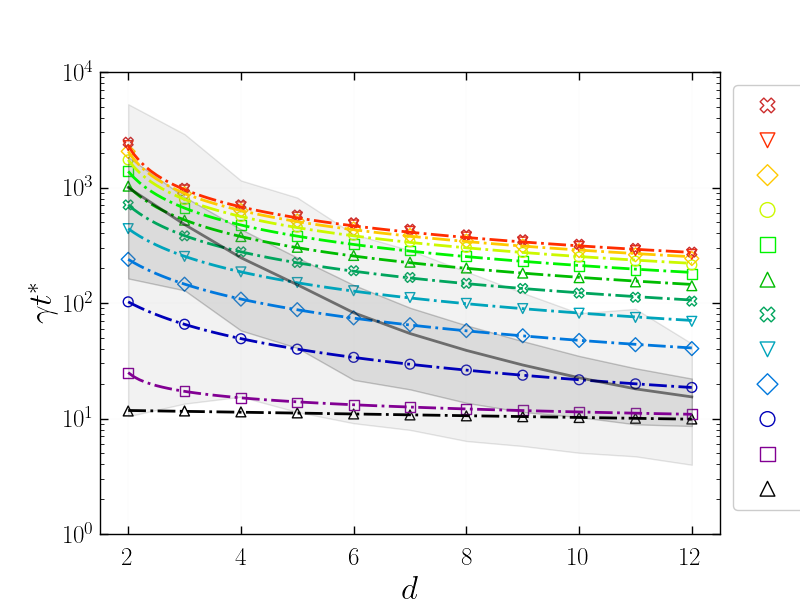

In [247]:
# ----------------------------------------------------------------------------------------------------------------------------------
# USER OPTIONS
# ----------------------------------------------------------------------------------------------------------------------------------
# Whether to load the data from the file or use the data from the current run
load_figure_data = True
# Whether to save the figure to a file
save_figure = True
# ----------------------------------------------------------------------------------------------------------------------------------
# LOAD DATA
# ----------------------------------------------------------------------------------------------------------------------------------
# Set the figure number
figure_number = 5
# Check if the data should be loaded from the file
if load_figure_data:        
    # Find data files in the directory for the specified figure number
    files_found = [name for name in os.listdir('../dat') if name.startswith(f'Figure_{figure_number:02}')]
    print(f'Files found: {files_found}')
    n_files = len(files_found)
    n_tasks = n_files # Alias for readability
    # Check if there are any data files for the specified figure number
    if n_files > 0:
        n_tasks = n_files
    else:
        raise ValueError("No data files found for the specified figure number.")    
    # Preload dims, gammas and n_gates from the first data file to initialize them before the loop

    data = load_data(figure_number, 1)
    dims = data['dims']
    gammas = data['gammas']
    n_gates = data['n_gates'] 
    times = data['times']
    # Pre-allocate space for the AGI data
    AGIs_data_d = data['AGIs_d']
    plateau_AGIs_d = data['plateau_AGIs_d']
    plateau_gammas_d = data['plateau_gammas_d']

    # Data loaded from file
    print(f'Data loaded from file: {data.keys()}')
# ----------------------------------------------------------------------------------------------------------------------------------
# LOAD DATA
# ----------------------------------------------------------------------------------------------------------------------------------
# Set the figure number
figure_number = 5
# Check if the data should be loaded from the file
if load_figure_data:        
    # Find data files in the directory for the specified figure number
    files_found = [name for name in os.listdir('../dat') if name.startswith(f'Figure_{figure_number:02}')]
    print(f'Files found: {files_found}')
    n_files = len(files_found)
    n_tasks = n_files # Alias for readability
    # Check if there are any data files for the specified figure number
    if n_files > 0:
        n_tasks = n_files
    else:
        raise ValueError("No data files found for the specified figure number.") 
    # Preload dims, gammas and n_gates from the first data file to initialize them before the loop
    data = load_data(figure_number, 1)
    dims = data['dims']
    gammas = data['gammas']
    n_gates = 0
    times = data['times']
    AGI_gamma_search_values_d = data['AGI_gamma_search_values_d']
    AGIs_d = data['AGIs_d']
    # Pre-allocate space for the AGI data
    AGIs_haar_d = []
    plateau_AGIs_d_task_3 = []
    plateau_gammas_d_task_3 = []
    n_gates_d = []
    # Loop over the dimensions
    for d_idx, d in enumerate(dims):   
        # Pre-allocate space for the AGI data per dimension 
        n_gates_task = []
        AGIs_temp = []
        plateau_AGIs_temp = []
        plateau_gammas_temp = []
        # Loop over the number of tasks/ data files
        for n in range(2, 22):
            if n == 13:
                continue
            # Load the data from file number n
            data = load_data(figure_number, n)
            n_gates_task.append(data['n_gates'])
            n_gates += data['n_gates']
            plateau_AGIs_temp.append(data['plateau_AGIs_d'][d_idx])
            plateau_gammas_temp.append(data['plateau_gammas_d'][d_idx])
        plateau_AGIs = np.concatenate(plateau_AGIs_temp, axis = 0)
        plateau_gammas = np.concatenate(plateau_gammas_temp, axis = 0)
        plateau_AGIs_d_task_3.append(plateau_AGIs)
        plateau_gammas_d_task_3.append(plateau_gammas)
        n_gates_d.append(n_gates_task)
    # Data loaded from file
    print(f'Data loaded from file: {data.keys()}')
# ----------------------------------------------------------------------------------------------------------------------------------
# PLOT FIGURES
# ----------------------------------------------------------------------------------------------------------------------------------

colorlist = ['k', 'c', 'm', 'g', 'r', 'b']

markerlist = ['^', 's', 'o', 'D', 'v', 'X']

a_initial = 1.03301455e+03
b_initial = 0.1
d_initial = 0

x_data = np.array(dims)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit_data_task_1 = np.zeros((n_gates, len(dims)))

gradient = np.linspace(0, 1, 25)

colorlist = plt.cm.nipy_spectral(gradient)

hatch_list = ['//', 'xx']
fill_list = ['k', 'k']

AGIs_mean = [np.mean(plateau_gammas_d_task_3[d_idx]) for d_idx, d in enumerate(dims)]
AGIs_std = [np.std(plateau_gammas_d_task_3[d_idx]) for d_idx, d in enumerate(dims)]
AGIs_std_min = [AGIs_mean[d_idx] - AGIs_std[d_idx] for d_idx, d in enumerate(dims)]
AGIs_std_max = [AGIs_mean[d_idx] + AGIs_std[d_idx] for d_idx, d in enumerate(dims)]
AGIs_min_d = [np.min(plateau_gammas_d_task_3[d_idx]) for d_idx, d in enumerate(dims)]
AGIs_max_d = [np.max(plateau_gammas_d_task_3[d_idx]) for d_idx, d in enumerate(dims)]

n_gates = 24

plt.clf()
plt.close()
plt.figure()

for g_idx in range(0, n_gates, 2):
    if g_idx == 22:
        g_idx = 23
    for d_idx, d in enumerate(dims):
        y_fit_data_task_1[g_idx, d_idx] = plateau_gammas_d[d_idx][g_idx]

    y_data = np.array(y_fit_data_task_1[g_idx])
    
    pow_params, _ = curve_fit(power_law_model_no_c, x_data, y_data, p0=[a_initial, b_initial, d_initial], maxfev = 10000000)    

    pow_y_fit = power_law_model_no_c(x_fit, *pow_params)

    plt.ylim(1e0, 1e4)
    plt.yscale('log')
    plt.scatter(x_data, y_data, color=colorlist[g_idx], s = 50, marker = markerlist[int(g_idx/2)%6], facecolor = 'None', label= rf'$\eta = $ {etas_list[g_idx]:.3f}')

    if g_idx < n_gates - 1:
        plt.plot(x_fit, pow_y_fit, color = colorlist[g_idx], linestyle = '-.', label=None) 



plt.plot(dims, AGIs_mean, color = 'k', alpha = 0.5)
plt.fill_between(dims, AGIs_min_d, AGIs_max_d, facecolor = "gray", edgecolor = "k", alpha = .1)
plt.fill_between(dims, AGIs_std_min, AGIs_std_max, facecolor = "gray", edgecolor = "k", alpha = .2)

# Add axes labels
plt.xlabel(r'$d$')
plt.ylabel(r'$\gamma t^*$')

plt.legend(loc = 'upper left', bbox_to_anchor = (1, 1), ncol = 1, reverse = True, framealpha = 1)

if save_figure:
    plt.savefig('../fig/Figure_05.pdf', format='pdf', bbox_inches='tight')

plt.show()

# <span style="font-size: 60px; font-family: Arial, sans-serif">FIGURE 6</span>

## <span style="font-size: 24px; font-family: Arial, sans-serif">Generate Data</span>

In [600]:
# ----------------------------------------------------------------------------------------------------------------------------------
# IMPORTS
# ----------------------------------------------------------------------------------------------------------------------------------

import paper_imports
import paper_methods

from paper_imports import *
from paper_methods import *

importlib.reload(paper_imports)
importlib.reload(paper_methods)

import paper_imports
import paper_methods

from paper_imports import *
from paper_methods import *

# ----------------------------------------------------------------------------------------------------------------------------------
# USER OPTIONS
# ----------------------------------------------------------------------------------------------------------------------------------

# Save data to file
save_figure_data : bool = False
save_search_data : bool = False

# ----------------------------------------------------------------------------------------------------------------------------------
# HPC SETTINGS
# ----------------------------------------------------------------------------------------------------------------------------------

# Get script file name
script_file_name : str = "paper_figure_06.py"
# Get SLURM data if running on the cluster
task_count, task_id, n_CPUs, figure_number = get_SLURM_Data(script_file_name)
# Set the print function to flush the buffer (used for parallel printing in SLURM environment)
print = functools.partial(print, flush = True)

# ----------------------------------------------------------------------------------------------------------------------------------
# START OF SCRIPT
# ----------------------------------------------------------------------------------------------------------------------------------

# START TIMING
start_time : float = time.time()

# Set the figure number
figure_number : int = 6
# Set the method for generating gates
method : str = 'haar'
# Set dimensions for the qudits
dims : list[int] = [2, 4]
# Set the range of noise strengths for the collapse operator
gamma_min : float = 1e-3
gamma_max : float = 1e+3
gamma_num : int = 50
gammas_ndarray : np.ndarray = np.geomspace(gamma_min, gamma_max, gamma_num, dtype = np.float64)
gammas : list[float] = gammas_ndarray.tolist()
# Set alias for gamma_num for readability
n_gammas : int = gamma_num
# Set number of random quantum gates
n_gates : int = 100
# Set parallelization parameters
n_jobs : int = min(n_CPUs, n_gates)
batch_size : int = int(n_gates / n_jobs)   
# Set times for the propagator; currently set to just one value, 1.0
times : float = 1.0
# Set number of random initial density matrix states
n_states = 1
# Set options for the mesolve function (solver options for differential equations)
options_mesolve : qt.Options = qt.Options()
options_mesolve.method = 'bdf'  # Setting method to 'bdf' (backward differentiation formula)
options_mesolve.max_step = float(0.001) # type: ignore 
options_mesolve.nsteps = float(1000000) # type: ignore
options_mesolve.rtol = float(1e-8)  # Relative tolerance
options_mesolve.atol = float(1e-8)  # Absolute tolerance

# Pre-allocate space for data
AGIs_d : list = []
coherences_d : list = []
super_gates_d : list = []
hamiltonians_d : list = []
final_states_d : list = []

# Print the parameters
print(f'FIGURE_NUMBER: {figure_number:02}')
print('\n')

print(f"Gate Generation Method: {method}")
print (f"Dimensions: {dims}")
print(f"Gammas: {gammas}")
print(f"Times: {times}")
print('\n')

print(f"Number of CPUs: {n_CPUs}")
print(f"Number of gates: {n_gates}")
print(f"Number of jobs: {n_jobs}")
print(f"Batch size: {batch_size}")
print(f"Task number: {task_id:03} / {task_count:03}")
print('\n')

# INITIALIZATION TIME
initialization_time : float = time.time()
print(f"Initialization time: {initialization_time - start_time}")

print('\n')

# Loop over the dimensions
for d in dims:

    # LOOP START TIME
    loop_start_time : float = time.time()  
    
    print(f"Dimension: {d}")

    # Initialize a qudit of dimension d
    qudit = Qudit(d = d)
    # Get qudit collapse operators
    j = qudit.get_j
    L : qt.Qobj = j("x") # type: ignore      

    # Define random initial states
    initial_kets = [qt.rand_ket(d) for _ in range(n_states)]
    initial_states = [initial_kets[n] * initial_kets[n].dag() for n in range(n_states)]

    # Initialise the etas list
    etas_list : list[float] = [0.0, 3 /4 - 1 / (2 * d), 1.0]

    # Pre-allocate space for local data for the current dimension
    AGIs = np.empty((n_gates, n_gammas), dtype = np.float64)
    coherences = np.empty((n_states, n_gammas), dtype = np.float64)
    AGF = np.empty(n_gammas, dtype = np.float64)
    average_coherence = np.empty(n_gammas, dtype = np.float64)
    mean_coherences = np.empty((n_gates, n_gammas), dtype = np.float64)

    final_state = [qt.Qobj(np.empty((d, d), dtype = np.complex128)) for _ in range(n_gammas)]
    final_states = []
    final_states_g = []

    # LOOP INITIALIZATION TIME
    loop_initialization_time : float = time.time()
    print(f"Loop initialization time: {loop_initialization_time - loop_start_time}")    

    # Generate a list of random unitary gates and Hamiltonians
    super_gates, hamiltonians = generate_gates_and_hamiltonians(n_gates - 1, d, method = method, n_jobs = n_jobs, batch_size = batch_size, is_super = True, etas = etas_list)
    # Generate the QFT/ Chrestenson/ Hadamard gate
    super_gates2, hamiltonians2 = generate_gates_and_hamiltonians(1, d, method = 'QFT', n_jobs = 1, batch_size = 1, is_super = True)

    # Add the two lists together
    super_gates = super_gates + super_gates2
    hamiltonians = hamiltonians + hamiltonians2

    # Store the super gates and Hamiltonians for the current dimension
    super_gates_d.append(super_gates)
    hamiltonians_d.append(hamiltonians)    

    # GATE GENERATION TIME
    gate_generation_time = time.time()
    print(f"Gate generation time: {gate_generation_time - initialization_time}")

    # Loop over number of gates
    for idx, gate in enumerate(super_gates):

        # GAMMA FIDELITY START TIME
        gamma_fidelity_start_time : float = time.time()

        # Parallelize the gammas loop for the fidelities
        AGF = Parallel(n_jobs = n_jobs, batch_size = batch_size)(delayed(compute_fidelity)(hamiltonians[idx], gate, L, times, d, g, options_mesolve) for g in gammas) # type : ignore      

        final_states = [] 

        # Loop over the number of random initial states
        for n in range(n_states):
            # DENSITY MATRIX START TIME
            density_matrix_start_time : float = time.time()
            # Parallelize the gammas loop for the coherences
            # coherences[n] = Parallel(n_jobs = n_jobs, batch_size = batch_size)(delayed(compute_coherences)(hamiltonians[idx], initial_states[n], L, times, d, g, options_mesolve) for g in gammas) # type : ignore
            final_state = Parallel(n_jobs = n_jobs, batch_size = batch_size)(delayed(propagate_density_matrix)(hamiltonians[idx], initial_states[n], L, times, d, g, options_mesolve) for g in gammas) # type : ignore
            # Store the final states for the current initial state
            final_states.append(final_state)

            # DENSITY MATRIX TIME
            density_matrix_time : float = time.time()
            print(f'State {n + 1:02} / {n_states:02} completed in: {density_matrix_time - density_matrix_start_time}')

        # GAMMA FIDELITY TIME
        gamma_fidelity_time : float = time.time()
        print(f"Gate AGFs & DMs: {idx + 1:03} / {n_gates:03} completed in: {gamma_fidelity_time - gamma_fidelity_start_time}")

        # Calculate the average coherence for each gamma value over all the random initial states
        # average_coherence = np.mean(coherences, axis = 0)
        
        final_states_g.append(final_states)
        
        # Store the AGI and average coherence data for the current gate
        AGIs[idx] = 1 - np.array(AGF)
        # mean_coherences[idx] = np.array(average_coherence)

    # Store the AGI data per dimension
    AGIs_d.append(AGIs)
    # Store the mean coherence data per dimension
    # coherences_d.append(mean_coherences)
    final_states_d.append(final_states_g)

    # FIDELITY TIME
    fidelity_time = time.time()
    print(f"Fidelity time: {fidelity_time - gate_generation_time}")

    # SINGLE LOOP TIME
    loop_time = time.time()
    print(f"Single loop time: {loop_time - loop_start_time}")

    print('\n')

# TOTAL LOOP TIME
total_loop_time = time.time()
print(f"Total loop time: {total_loop_time - start_time}")

# Save the data
if save_figure_data:
    save_data(figure_number, task_id, dims = dims, gammas = gammas, n_gammas = n_gammas, n_gates = n_gates, n_states = n_states, times = times, AGIs_d = AGIs_d, coherences_d = coherences_d, hamiltonians_d = hamiltonians_d, super_gates_d = super_gates_d, final_states_d = final_states_d)

# SAVE DATA TIME
save_data_time = time.time()
print(f"Save data time: {save_data_time - total_loop_time}")

# TOTAL TIME
total_time = time.time()
print(f"Total time: {total_time - start_time}")

FIGURE_NUMBER: 06
SCRIPT_NAME: paper_figure_06.py


SLURM_JOB_ID: NOSLURM
SLURM_ARRAY_TASK_COUNT: 1
SLURM_ARRAY_TASK_ID: 1
SLURM_CPUS_ON_NODE: 12


FIGURE_NUMBER: 06


Gate Generation Method: haar
Dimensions: [2, 4]
Gammas: [0.001, 0.0013257113655901094, 0.0017575106248547913, 0.002329951810515372, 0.0030888435964774815, 0.004094915062380427, 0.005428675439323859, 0.0071968567300115215, 0.009540954763499945, 0.012648552168552958, 0.016768329368110083, 0.022229964825261943, 0.029470517025518096, 0.03906939937054617, 0.0517947467923121, 0.06866488450043001, 0.09102981779915217, 0.1206792640639329, 0.15998587196060574, 0.21209508879201905, 0.28117686979742307, 0.3727593720314938, 0.49417133613238334, 0.655128556859551, 0.868511373751352, 1.151395399326447, 1.5264179671752334, 2.023589647725158, 2.6826957952797246, 3.5564803062231287, 4.714866363457395, 6.25055192527397, 8.286427728546842, 10.985411419875572, 14.563484775012444, 19.306977288832496, 25.595479226995334, 33.9322177189533, 44.

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:   17.6s
[Parallel(n_jobs=12)]: Done   9 tasks      | elapsed:   17.9s
[Parallel(n_jobs=12)]: Done  16 tasks      | elapsed:   17.9s
[Parallel(n_jobs=12)]: Done  23 tasks      | elapsed:   17.9s
[Parallel(n_jobs=12)]: Done  33 tasks      | elapsed:   18.0s
[Parallel(n_jobs=12)]: Done  43 tasks      | elapsed:   18.0s
[Parallel(n_jobs=12)]: Done  55 tasks      | elapsed:   18.0s
[Parallel(n_jobs=12)]: Done  66 tasks      | elapsed:   18.1s
[Parallel(n_jobs=12)]: Done  80 tasks      | elapsed:   18.1s
[Parallel(n_jobs=12)]: Done  86 out of  99 | elapsed:   18.1s remaining:    2.7s


Gate generation time: 18.617586374282837


[Parallel(n_jobs=12)]: Done  99 out of  99 | elapsed:   18.6s finished
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s


State 01 / 01 completed in: 0.5904619693756104
Gate AGFs & DMs: 001 / 100 completed in: 1.271073818206787
State 01 / 01 completed in: 0.6491825580596924
Gate AGFs & DMs: 002 / 100 completed in: 1.292959213256836
State 01 / 01 completed in: 0.8745889663696289
Gate AGFs & DMs: 003 / 100 completed in: 1.449385643005371
State 01 / 01 completed in: 0.46210527420043945
Gate AGFs & DMs: 004 / 100 completed in: 0.9890408515930176
State 01 / 01 completed in: 0.4643256664276123
Gate AGFs & DMs: 005 / 100 completed in: 1.090745210647583
State 01 / 01 completed in: 0.5326390266418457
Gate AGFs & DMs: 006 / 100 completed in: 1.0403966903686523
State 01 / 01 completed in: 0.4586153030395508
Gate AGFs & DMs: 007 / 100 completed in: 0.9957435131072998
State 01 / 01 completed in: 0.5172469615936279
Gate AGFs & DMs: 008 / 100 completed in: 1.0577738285064697
State 01 / 01 completed in: 0.4672515392303467
Gate AGFs & DMs: 009 / 100 completed in: 0.9376296997070312
State 01 / 01 completed in: 0.4783663749

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  32 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  41 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done  50 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done  61 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done  85 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done  96 out of  99 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  99 out of  99 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s


State 01 / 01 completed in: 2.1586341857910156
Gate AGFs & DMs: 001 / 100 completed in: 4.512432336807251
State 01 / 01 completed in: 2.4303171634674072
Gate AGFs & DMs: 002 / 100 completed in: 4.942314624786377
State 01 / 01 completed in: 2.364382028579712
Gate AGFs & DMs: 003 / 100 completed in: 4.646794557571411
State 01 / 01 completed in: 2.1754469871520996
Gate AGFs & DMs: 004 / 100 completed in: 4.391838073730469
State 01 / 01 completed in: 2.1654465198516846
Gate AGFs & DMs: 005 / 100 completed in: 4.395883560180664
State 01 / 01 completed in: 2.258484363555908
Gate AGFs & DMs: 006 / 100 completed in: 4.756354808807373
State 01 / 01 completed in: 2.172945261001587
Gate AGFs & DMs: 007 / 100 completed in: 4.4730448722839355
State 01 / 01 completed in: 2.176891803741455
Gate AGFs & DMs: 008 / 100 completed in: 4.392136812210083
State 01 / 01 completed in: 2.1719017028808594
Gate AGFs & DMs: 009 / 100 completed in: 4.38031530380249
State 01 / 01 completed in: 2.2171082496643066
Gat

## <span style="font-size: 24px; font-family: Arial, sans-serif">Plot Figure</span>

Files found: ['Figure_06_results_001.blob']
Data loaded from file: dict_keys(['dims', 'gammas', 'n_gammas', 'n_gates', 'n_states', 'times', 'AGIs_d', 'coherences_d', 'hamiltonians_d', 'super_gates_d', 'final_states_d'])


/home/jgkh/.local/lib/python3.9/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)


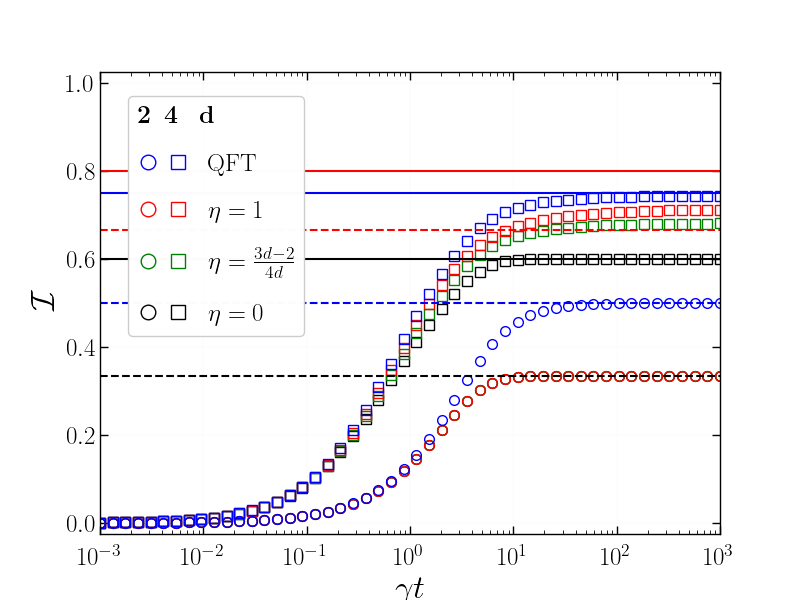

In [248]:
# ----------------------------------------------------------------------------------------------------------------------------------
# USER OPTIONS
# ----------------------------------------------------------------------------------------------------------------------------------
# Whether to load the data from the file or use the data from the current run
load_figure_data = True
# Whether to save the figure to a file
save_figure = True 
# ----------------------------------------------------------------------------------------------------------------------------------
# LOAD DATA
# ----------------------------------------------------------------------------------------------------------------------------------
# Set the figure number
figure_number = 6
# Check if the data should be loaded from the file
if load_figure_data:        
    # Find data files in the directory for the specified figure number
    files_found = [name for name in os.listdir('../dat') if name.startswith(f'Figure_{figure_number:02}')]
    print(f'Files found: {files_found}')
    n_files = len(files_found)
    n_tasks = n_files # Alias for readability
    # Check if there are any data files for the specified figure number
    if n_files > 0:
        n_tasks = n_files
    else:
        raise ValueError("No data files found for the specified figure number.")    
    # Preload dims, gammas and n_gates from the first data file to initialize them before the loop
    data = load_data(figure_number, 1)
    dims = data['dims']
    gammas = data['gammas']
    n_gates = data['n_gates'] 
    n_gammas = data['n_gammas']
    n_states = data['n_states']
    times = data['times']
    # Pre-allocate space for the AGI data
    AGIs_data_d = []
    density_matrix_data_d = []
    # Loop over the dimensions
    for d_idx, d in enumerate(dims):   
        # Pre-allocate space for the AGI data per dimension 
        AGIs_temp = []    
        density_matrices_temp = []  
        # Loop over the number of tasks/ data files
        for n in range(1, n_tasks + 1):
            # Load the data from file number n
            data = load_data(figure_number, n)
            # Append the AGI data to the temporary list      
            AGIs_temp.append(data['AGIs_d'][d_idx])
            # Append the density matrix data to the temporary list
            density_matrices_temp.append(data['final_states_d'][d_idx])
        # Concatenate all the elements of AGIs_temp together
        AGIs = np.concatenate(AGIs_temp, axis = 0)
        # Concatenate all the elements of list density_matrices_temp together
        density_matrices = [item for sublist in density_matrices_temp for item in sublist]
        # Append the concatenated AGI data to the main list
        AGIs_data_d.append(AGIs)
        # Append the concatenated density matrix data to the main list
        density_matrix_data_d.append(density_matrices)
    # Data loaded from file
    print(f'Data loaded from file: {data.keys()}')
    # Save to original variable names
    AGIs_d = AGIs_data_d
    final_states_d = density_matrix_data_d
    
# ----------------------------------------------------------------------------------------------------------------------------------
# PLOT FIGURES
# ----------------------------------------------------------------------------------------------------------------------------------

colorlist = ['k', 'g', 'r', 'b', 'm', 'y']

markerlist = ['o', 's', 'D', '^', 'v', 'X', 'P', 'p']

linestylelist = ['--', '-']

label_list = [r'$\eta = 0$', r'$\eta = \frac{3 d - 2}{4 d}$', r'$\eta = 1$', r'$\mathrm{QFT}$']


plt.clf()
plt.close()
plt.figure()

plt.xscale('log')
plt.yscale('linear')
plt.ylim(-0.025, 1.025)
plt.xlim(1e-3, 1e3)

scatter_pairs = []
# Loop over the gates
for n in range(n_gates):

    plot_d_2,  = plt.plot(gammas, AGIs_d[0][n], 'o', markersize=7, color = colorlist[n%5], mfc = 'none')
    plot_d_4,  = plt.plot(gammas, AGIs_d[1][n], 's', markersize=7, color = colorlist[n%5], mfc = 'none')

    scatter_pairs.append((plot_d_2, plot_d_4))

# Loop over the dimensions
for d_idx, d in enumerate(dims):

    AGIs = AGIs_d[d_idx]
    plt.axhline(y=1 - 2 / (d + 1), color = 'k', linestyle = linestylelist[d_idx], linewidth = 1.5)
    plt.axhline(y=1 - 1 / (d), color = 'b', linestyle = linestylelist[d_idx], linewidth = 1.5)
    plt.axhline(y=1 - 1 / (d + 1), color = 'r', linestyle = linestylelist[d_idx], linewidth = 1.5)

plt.legend(scatter_pairs, label_list, reverse = True, handler_map = {tuple: HandlerTuple(ndivide=None)}, title = r'  $\bf{\;\;\;2\;\; 4 \;\;\; d}$', alignment = 'left', loc = 'upper left', bbox_to_anchor = (0.025, 0.975), framealpha = 0.99, ncols = 1, columnspacing = 0, labelspacing = 1)#, fontsize = plot_legend_font_size, title_fontsize = plot_legend_title_font_size)

plt.xlabel(r'$\gamma t$')
plt.ylabel(r'$\mathcal{I}$')

if save_figure:
    plt.savefig(f'../fig/Figure_{figure_number:02}.pdf', format='pdf', bbox_inches='tight')

plt.show()

# <span style="font-size: 60px; font-family: Arial, sans-serif">FIGURE 7</span>

## <span style="font-size: 24px; font-family: Arial, sans-serif">Generate Data</span>

In [218]:
# ----------------------------------------------------------------------------------------------------------------------------------
# IMPORTS
# ----------------------------------------------------------------------------------------------------------------------------------

import paper_imports
import paper_methods

from paper_imports import *
from paper_methods import *

importlib.reload(paper_imports)
importlib.reload(paper_methods)

import paper_imports
import paper_methods

from paper_imports import *
from paper_methods import *

# ----------------------------------------------------------------------------------------------------------------------------------
# USER OPTIONS
# ----------------------------------------------------------------------------------------------------------------------------------

# Save data to file
save_figure_data : bool = True

# ----------------------------------------------------------------------------------------------------------------------------------
# HPC SETTINGS
# ----------------------------------------------------------------------------------------------------------------------------------

# Get script file name
script_file_name : str = "paper_figure_07.py"

task_count, task_id, n_CPUs, figure_number = get_SLURM_Data(script_file_name)

# Find existing data files before overwriting
files_found = [name for name in os.listdir('../dat/paper_2') if name.startswith(f'Figure_{figure_number:02}')]
print(f'Existing Data Files Found: {files_found}')
n_files = len(files_found)
# Round n_files down to the nearest multiple of 10, since we work in batches of 10 and tasks may run asynchronously
n_files = n_files - n_files % 10

print = functools.partial(print, flush = True)

# ----------------------------------------------------------------------------------------------------------------------------------
# START OF SCRIPT
# ----------------------------------------------------------------------------------------------------------------------------------

# START TIMING
start_time : float = time.time()

# Convert start time to real-world time
real_world_start_time : str = time.strftime("%y-%m-%d_%X_%Z").replace("/", "-").replace(":", "-")

# Set the figure number
figure_number : int = 17
# Set the method for generating gates
method : str = 'haar' # 'haar' or 'interpolated_INC'
# Set dimensions for the qudits
dims : list[int] = [2, 4]
# Set the range of noise strengths for the collapse operator
gamma_min : float = 1e-3
gamma_max : float = 1e-1
gamma_num : int = 50
gammas_ndarray : np.ndarray = np.linspace(gamma_min, gamma_max, gamma_num, dtype = np.float64)
gammas : list[float] = gammas_ndarray.tolist()
# Set alias for gamma_num for readability
n_gammas : int = gamma_num
# Set collapse operator
collapse_operator : str = "z" # ['x', 'y','z']
# Set number of random quantum gates
n_gates : int = 4 if method == 'interpolated_INC' else 4 * n_CPUs
# Set parallelization parameters
# Set parallelization parameters
parallel_verbosity : int = 11
n_jobs_gates : int = min(n_CPUs, n_gates)
batch_size_gates : int = int(n_gates / n_jobs_gates)
n_jobs_fidelities : int = min(n_CPUs, n_gammas)
batch_size_fidelities : int = int(n_gammas / n_jobs_fidelities)
# Set times for the propagator; currently set to just one value, 1.0
times : float = 1.0
# Set options for the mesolve function (solver options for differential equations)
options_mesolve : qt.Options = qt.Options()
options_mesolve.method = 'bdf'  # Setting method to 'bdf' (backward differentiation formula)
options_mesolve.max_step = float(0.001) # type: ignore 
options_mesolve.nsteps = float(1000000) # type: ignore
options_mesolve.rtol = float(1e-8)  # Relative tolerance
options_mesolve.atol = float(1e-8)  # Absolute tolerance

# Pre-allocate space for data
AGIs_d : list = []
AGIs_d_relative_error = []
hamiltonians_d : list = []

# Print the config parameters
print(f"STARTING TIMESTAMP: {real_world_start_time}")
print('\n')
print('PRINTING CONFIG PARAMETERS:')
print('---------------------------')
print('\n')
print(f"CURRENT TASK : {task_id:03} / {task_count:03}")
print(f'MODIFIED FIGURE NUMBER : {figure_number}')
print(f'SAVING FIGURE DATA : {save_figure_data}')
print('\n')
print(f"GATE GENERATION METHOD : {method}")
print(f"COLLAPSE OPERATOR : {collapse_operator}")
print (f"QUDIT DIMENSIONS : {dims}")
print(f"NUMBER OF GATES : {n_gates}")
print(f"NUMBER OF GAMMAS : {n_gammas}")
print(f"GAMMAS : {gammas}")
print(f"GATE TIMES : {times}")
print('\n')
print(f"PARALLEL VERBOSITY : {parallel_verbosity}")
print(f"NUMBER OF PARALLEL JOBS FOR GATES : {n_jobs_gates}")
print(f"BATCH SIZE PER GATE JOB : {batch_size_gates}")
print(f"NUMBER OF PARALLEL JOBS FOR FIDELITIES : {n_jobs_fidelities}")
print(f"BATCH SIZE PER FIDELITY JOB : {batch_size_fidelities}")
print(f"OPTIONS FOR MESOLVE : {options_mesolve}")
print('\n')

# INITIALIZATION TIME
initialization_time : float = time.time()
print(f"Initialization time: {initialization_time - start_time}")

print('\n')

# Loop over the dimensions
for d_idx, d in enumerate(dims):

    # LOOP START TIME
    loop_start_time : float = time.time()  
    
    print(f"Dimension: {d}")

    # Initialize a qudit of dimension d
    qudit = Qudit(d = d)
    # Get qudit collapse operators
    j = qudit.get_j
    L : qt.Qobj = j(collapse_operator) # type: ignore    

    # Pre-allocate space for local data for the current dimension
    AGF = np.empty(n_gammas, dtype = np.float64)
    AGI = np.empty(n_gammas, dtype = np.float64)
    AGIs = np.empty((n_gates, n_gammas), dtype = np.float64)    
    AGI_first_order = np.empty(len(gammas), dtype=np.float64)
    AGIs_1_relative_error = np.empty((n_gates, len(gammas)), dtype=np.float64)   
    super_gates = []
    hamiltonians = []

    # Calculate First Order AGI Correction
    AGI_first_order = (np.array(gammas) * times) * first_order_AGI(d, L)

    # LOOP INITIALIZATION TIME
    loop_initialization_time : float = time.time()
    print(f"Loop initialization time: {loop_initialization_time - loop_start_time}")  
    
    # Generate interpolated gates
    if method == 'interpolated_INC':
        # Initialise the etas list
        etas_list : list[float] = [0.0, 3 /4 - 1 / (2 * d), 1.0]
        # Generate a list of random unitary gates and Hamiltonians
        super_gates, hamiltonians = generate_gates_and_hamiltonians(n_gates - 1, d, method = method, n_jobs = n_jobs_gates, batch_size = batch_size_gates, is_super = True, etas = etas_list)
        # Generate the QFT/ Chrestenson/ Hadamard gate
        super_gates2, hamiltonians2 = generate_gates_and_hamiltonians(1, d, method = 'QFT', n_jobs = 1, batch_size = 1, is_super = True)
        # Add the two lists together
        super_gates = super_gates + super_gates2
        hamiltonians = hamiltonians + hamiltonians2
    # Generate Haar random gates
    elif method == 'haar':
        # Generate a list of random unitary gates and Hamiltonians
        super_gates, hamiltonians = generate_gates_and_hamiltonians(n_gates, d, method = method, n_jobs = n_jobs_gates, batch_size = batch_size_gates, is_super = True)

    # Store the super gates and Hamiltonians for the current dimension
    super_gates_d.append(super_gates)
    hamiltonians_d.append(hamiltonians)    

    # GATE GENERATION TIME
    gate_generation_time = time.time()
    print(f"Gate generation time: {gate_generation_time - initialization_time}")

    # Loop over number of gates
    for idx, gate in enumerate(super_gates):

        # GAMMA FIDELITY START TIME
        gamma_fidelity_start_time : float = time.time()

        # Parallelize the gammas loop
        AGF = Parallel(n_jobs = n_jobs_fidelities, batch_size = batch_size_fidelities, verbose = parallel_verbosity)(delayed(compute_fidelity)(hamiltonians[idx], gate, L, times, d, g, options_mesolve) for g in gammas) # type : ignore
        AGI = 1 - np.array(AGF)
        AGIs[idx] = AGI  

        AGIs_1_relative_error[idx] = (AGIs[idx] + AGI_first_order) / AGIs[idx]     

    AGIs_d.append(AGIs)

    AGIs_d_relative_error.append(AGIs_1_relative_error)

    # FIDELITY TIME
    fidelity_time = time.time()
    print(f"Fidelity time: {fidelity_time - gate_generation_time}")

    # SINGLE LOOP TIME
    loop_time = time.time()
    print(f"Single loop time: {loop_time - loop_start_time}")

    print('\n')

# TOTAL LOOP TIME
total_loop_time = time.time()
print(f"Total loop time: {total_loop_time - start_time}")

# Update task_id to account for the tasks that have already been run
task_id += n_files

# Save the data
if save_figure_data:
    save_data(figure_number, task_id, dims = dims, gammas = gammas, n_gammas = n_gammas, n_gates = n_gates, times = times, AGIs_d = AGIs_d, hamiltonians_d = hamiltonians_d, AGIs_d_relative_error = AGIs_d_relative_error)

# SAVE DATA TIME
save_data_time = time.time()
print(f"Save data time: {save_data_time - total_loop_time}")

# TOTAL TIME
total_time = time.time()
print(f"Total time: {total_time - start_time}")

# ----------------------------------------------------------------------------------------------------------------------------------
# END OF SCRIPT
# ----------------------------------------------------------------------------------------------------------------------------------

FIGURE_NUMBER: 07
SCRIPT_NAME: paper_figure_07.py


SLURM_JOB_ID: NOSLURM
SLURM_ARRAY_TASK_COUNT: 1
SLURM_ARRAY_TASK_ID: 1
SLURM_CPUS_ON_NODE: 12


STARTING TIMESTAMP: 24-03-20_16-04-10_CET


PRINTING CONFIG PARAMETERS:
---------------------------


CURRENT TASK : 001 / 001
MODIFIED FIGURE NUMBER : 17
SAVING FIGURE DATA : False


GATE GENERATION METHOD : haar
COLLAPSE OPERATOR : z
QUDIT DIMENSIONS : [2, 4]
NUMBER OF GATES : 48
NUMBER OF GAMMAS : 50
GAMMAS : [0.001, 0.0030204081632653063, 0.0050408163265306125, 0.007061224489795919, 0.009081632653061226, 0.011102040816326531, 0.013122448979591837, 0.015142857142857145, 0.01716326530612245, 0.019183673469387756, 0.02120408163265306, 0.02322448979591837, 0.025244897959183676, 0.02726530612244898, 0.02928571428571429, 0.031306122448979595, 0.0333265306122449, 0.035346938775510206, 0.03736734693877551, 0.03938775510204082, 0.04140816326530612, 0.043428571428571434, 0.04544897959183674, 0.047469387755102045, 0.04948979591836735, 0.0515102040

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:   12.4s
[Parallel(n_jobs=12)]: Done  11 tasks      | elapsed:   12.7s
[Parallel(n_jobs=12)]: Done  18 tasks      | elapsed:   12.7s
[Parallel(n_jobs=12)]: Done  25 tasks      | elapsed:   12.7s
[Parallel(n_jobs=12)]: Done  40 out of  48 | elapsed:   12.9s remaining:    2.6s


Gate generation time: 12.971091032028198


[Parallel(n_jobs=12)]: Done  48 out of  48 | elapsed:   12.9s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  13 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  15 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  19 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  21 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  23 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  24 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  26 tasks      | e

Fidelity time: 16.836437940597534
Single loop time: 29.806288719177246


Dimension: 4
Loop initialization time: 0.014255046844482422


[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done  14 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done  16 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done  22 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  23 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  25 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  27 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  28 tasks      | elapsed:    0.2s
[Paralle

Gate generation time: 29.885276556015015


[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  32 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  40 out of  48 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  45 out of  48 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  48 out of  48 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done  14 tasks      | elapsed:    0.5s
[Paralle

Fidelity time: 96.72543168067932
Single loop time: 96.80164909362793




[Parallel(n_jobs=12)]: Done  42 out of  50 | elapsed:    1.9s remaining:    0.4s
[Parallel(n_jobs=12)]: Done  47 out of  50 | elapsed:    2.0s remaining:    0.1s
[Parallel(n_jobs=12)]: Done  50 out of  50 | elapsed:    2.1s finished


Total loop time: 126.63783812522888
Save data time: 0.0013644695281982422
Total time: 126.64084768295288


## <span style="font-size: 24px; font-family: Arial, sans-serif">Plot Figure</span>

Files found: ['Figure_07_results_001.blob', 'Figure_07_results_002.blob', 'Figure_07_results_003.blob', 'Figure_07_results_004.blob', 'Figure_07_results_005.blob', 'Figure_07_results_006.blob', 'Figure_07_results_007.blob', 'Figure_07_results_008.blob', 'Figure_07_results_009.blob', 'Figure_07_results_010.blob', 'Figure_07_results_011.blob', 'Figure_07_results_012.blob', 'Figure_07_results_013.blob', 'Figure_07_results_014.blob', 'Figure_07_results_015.blob', 'Figure_07_results_016.blob', 'Figure_07_results_017.blob', 'Figure_07_results_018.blob', 'Figure_07_results_019.blob', 'Figure_07_results_020.blob', 'Figure_07_results_021.blob']
Data loaded from file: dict_keys(['dims', 'gammas', 'n_gammas', 'n_gates', 'times', 'AGIs_d', 'hamiltonians_d', 'super_gates_d', 'AGIs_d_relative_error'])
Files found: ['Figure_07_results_001.blob', 'Figure_07_results_002.blob', 'Figure_07_results_003.blob', 'Figure_07_results_004.blob', 'Figure_07_results_005.blob', 'Figure_07_results_006.blob', 'Figure

/home/jgkh/.local/lib/python3.9/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)


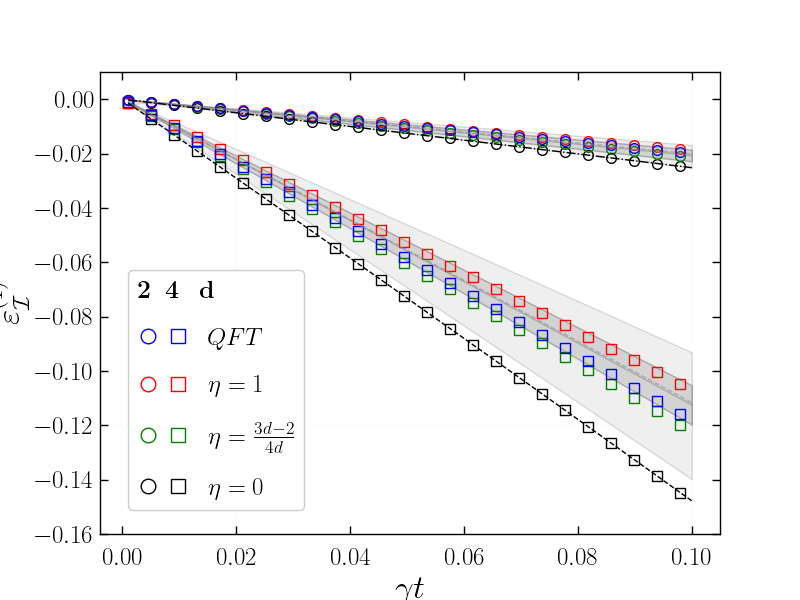

In [249]:
# ----------------------------------------------------------------------------------------------------------------------------------
# USER OPTIONS
# ----------------------------------------------------------------------------------------------------------------------------------
# Whether to load the data from the file or use the data from the current run
load_figure_data = False
# Whether to save the figure to a file
save_figure = True
# ----------------------------------------------------------------------------------------------------------------------------------
# LOAD DATA
# ----------------------------------------------------------------------------------------------------------------------------------
# Set the figure number
figure_number = 7
# Check if the data should be loaded from the file
if load_figure_data:        
    # Find data files in the directory for the specified figure number
    files_found = [name for name in os.listdir('../dat') if name.startswith(f'Figure_{figure_number:02}')]
    print(f'Files found: {files_found}')
    n_files = len(files_found)
    n_tasks = n_files # Alias for readability
    # Check if there are any data files for the specified figure number
    if n_files > 0:
        n_tasks = n_files
    else:
        raise ValueError("No data files found for the specified figure number.")  
    # reset to 1 for the time being  
    n_tasks = 1
    # Preload dims, gammas and n_gates from the first data file to initialize them before the loop
    data = load_data(figure_number, 1)
    dims = data['dims']
    gammas = data['gammas']
    n_gates = data['n_gates'] 
    n_gammas = data['n_gammas']
    times = data['times']
    # Pre-allocate space for the AGI data
    AGIs_data_d = []
    first_order_data_d = []
    # Loop over the dimensions
    for d_idx, d in enumerate(dims):   
        # Pre-allocate space for the AGI data per dimension 
        AGIs_temp = []    
        first_order_temp = []  
        # Loop over the number of tasks/ data files
        for n in range(1, n_tasks + 1):
            # Load the data from file number n
            data = load_data(figure_number, n)
            # Append the AGI data to the temporary list      
            AGIs_temp.append(data['AGIs_d'][d_idx])
            # Append the density matrix data to the temporary list
            first_order_temp.append(data['AGIs_d_relative_error'][d_idx])
        # Concatenate all the elements of AGIs_temp together
        AGIs = np.concatenate(AGIs_temp, axis = 0)
        # Concatenate all the elements of list density_matrices_temp together
        first_order = [item for sublist in first_order_temp for item in sublist]
        # Append the concatenated AGI data to the main list
        AGIs_data_d.append(AGIs)
        # Append the concatenated density matrix data to the main list
        first_order_data_d.append(first_order)
    # Data loaded from file
    print(f'Data loaded from file: {data.keys()}')
    # Save to original variable names
    AGIs_d = AGIs_data_d
    AGIs_d_relative_error = first_order_data_d

# ----------------------------------------------------------------------------------------------------------------------------------
# LOAD DATA
# ----------------------------------------------------------------------------------------------------------------------------------

# Set the figure number
# Check if the data should be loaded from the file
if load_figure_data:        
    # Find data files in the directory for the specified figure number
    files_found = [name for name in os.listdir('../dat') if name.startswith(f'Figure_{figure_number:02}')]
    print(f'Files found: {files_found}')
    n_files = len(files_found)
    n_tasks = n_files # Alias for readability
    # Check if there are any data files for the specified figure number
    if n_files > 0:
        n_tasks = n_files
    else:
        raise ValueError("No data files found for the specified figure number.")    
    # Preload dims, gammas and n_gates from the first data file to initialize them before the loop
    data = load_data(figure_number, 2)
    dims = data['dims']
    gammas = data['gammas']
    n_gates = data['n_gates'] 
    n_gammas = data['n_gammas']
    times = data['times']
    # Pre-allocate space for the AGI data
    AGIs_data_d = []
    first_order_data_d = []
    # Loop over the dimensions
    for d_idx, d in enumerate(dims):   
        # Pre-allocate space for the AGI data per dimension 
        AGIs_temp = []    
        first_order_temp = []  
        # Loop over the number of tasks/ data files
        for n in range(2, n_tasks + 1):            
            # Load the data from file number n
            data = load_data(figure_number, n)            
            # Append the AGI data to the temporary list      
            AGIs_temp.append(data['AGIs_d'][d_idx])
            # Append the density matrix data to the temporary list
            first_order_temp.append(data['AGIs_d_relative_error'][d_idx])
        # Concatenate all the elements of AGIs_temp together
        AGIs = np.concatenate(AGIs_temp, axis = 0)
        # Concatenate all the elements of list density_matrices_temp together
        first_order = [item for sublist in first_order_temp for item in sublist]
        # Append the concatenated AGI data to the main list
        AGIs_data_d.append(AGIs)
        # Append the concatenated density matrix data to the main list
        first_order_data_d.append(first_order)
    # Data loaded from file
    print(f'Data loaded from file: {data.keys()}')
    # Save to original variable names
    AGIs_d_haar = AGIs_data_d
    AGIs_d_relative_error_haar = first_order_data_d
    n_gates = n_gates * n_tasks

AGIs_min_d = []
AGIs_max_d = []
AGIs_avg_d = []
AGIs_std_d = []
AGIs_med_d = []
AGIs_d_relative_error_haar_array = np.array(AGIs_d_relative_error_haar)
for d_idx, d in enumerate(dims):    
    AGIs_min_d.append([np.min(AGIs_d_relative_error_haar_array[d_idx].T[g_idx]) for g_idx in range(50)])
    AGIs_max_d.append([np.max(AGIs_d_relative_error_haar_array[d_idx].T[g_idx]) for g_idx in range(50)])
    AGIs_avg_d.append([np.mean(AGIs_d_relative_error_haar_array[d_idx].T[g_idx]) for g_idx in range(50)])
    AGIs_std_d.append([np.std(AGIs_d_relative_error_haar_array[d_idx].T[g_idx]) for g_idx in range(50)])
    AGIs_med_d.append([np.median(AGIs_d_relative_error_haar_array[d_idx].T[g_idx]) for g_idx in range(50)])
    
# ----------------------------------------------------------------------------------------------------------------------------------
# PLOT FIGURES
# ----------------------------------------------------------------------------------------------------------------------------------

colorlist = ['k', 'g' , 'r', 'b']
markerlist = ['s', 'D', '>', 'v', 'o']
linestyle_list = ['-.', '--', '-', ':']
label_list = [r'$\eta = 0$', r'$\eta = \frac{3 d - 2}{4 d}$', r'$\eta = 1$', r'$QFT$']
hatch_list = ['//', 'xx']
fill_list = ['k', 'k']

plt.clf()
plt.close()
plt.figure()

plt.xlabel(r'$\gamma t$')
plt.ylabel(r'$\varepsilon^{(1)}_{\mathcal{I}}$')

plt.xscale('linear')
plt.yscale('linear')
plt.ylim(-0.16, 0.01)
scatter_pairs = []
# Loop over the gates
for n in range(4):

    plot_d_2,  = plt.plot(gammas[::2], AGIs_d_relative_error[0][n][::2], 'o', markersize = 7, color = colorlist[n%6], mfc = 'none')
    plot_d_4,  = plt.plot(gammas[::2], AGIs_d_relative_error[1][n][::2], 's', markersize = 7, color = colorlist[n%6], mfc = 'none')

    scatter_pairs.append((plot_d_2, plot_d_4))

for d_idx, d in enumerate(dims):
    AGIs = AGIs_d[d_idx]
    AGIs_1_relative_error = AGIs_d_relative_error[d_idx]
    AGI_1_theoretical = (1.0/12.0) * d * (d - 1) * times * np.array(gammas)
    AGI_1_theoretical_error = (AGIs[0] - AGI_1_theoretical) / AGIs[0]

    AGIs_std_max = np.array(AGIs_avg_d[d_idx]) + np.array(AGIs_std_d[d_idx])
    AGIs_std_min = np.array(AGIs_avg_d[d_idx]) - np.array(AGIs_std_d[d_idx])

    plt.fill_between(gammas, AGIs_min_d[d_idx], AGIs_max_d[d_idx], facecolor = "gray", edgecolor = "k", alpha = .125, label = r'$\Delta_{haar}$' if d_idx == 0 else None)
    plt.fill_between(gammas, AGIs_std_min, AGIs_std_max, facecolor = "gray", edgecolor = "k", alpha = .25, label = r'$\sigma_{haar}$' if d_idx == 0 else None)
    plt.plot(gammas, AGIs_avg_d[d_idx], color = 'gray', alpha = 0.5, linewidth = 1.0, label = r'$\mu_{haar}$' if d_idx == 0 else None)
    plt.plot(gammas, AGIs_med_d[d_idx], color = 'gray', alpha = 0.5, linestyle = '--', linewidth = 1.0, label = r'$m_{haar}$' if d_idx == 0 else None)
    
    plt.plot(gammas, AGI_1_theoretical_error, color = 'k', linestyle = linestyle_list[d_idx], linewidth = 1.0, label = None) # rf'$d = {d}$' + r', $I_{th}$'
    
plt.legend(scatter_pairs, label_list, reverse = True, handler_map = {tuple: HandlerTuple(ndivide=None)}, title = r'$\bf{2\;\; 4 \;\;\; d}$', alignment = 'left', loc = 'lower left', bbox_to_anchor = (0.025, 0.025), framealpha = 0.99, ncols = 1, columnspacing = 0, labelspacing = 1)#, fontsize = plot_legend_font_size, title_fontsize = plot_legend_title_font_size)


# plt.show()
if save_figure:    
    plt.savefig(f'../fig/Figure_{figure_number:02}.pdf', format='pdf', bbox_inches='tight')

plt.show()

# <span style="font-size: 60px; font-family: Arial, sans-serif">FIGURE 8</span>

## <span style="font-size: 24px; font-family: Arial, sans-serif">Generate Data</span>

In [50]:
# ----------------------------------------------------------------------------------------------------------------------------------
# IMPORTS
# ----------------------------------------------------------------------------------------------------------------------------------

import paper_imports
import paper_methods

from paper_imports import *
from paper_methods import *

importlib.reload(paper_imports)
importlib.reload(paper_methods)

# ----------------------------------------------------------------------------------------------------------------------------------
# USER OPTIONS
# ----------------------------------------------------------------------------------------------------------------------------------

# Save data to file
save_figure_data : bool = True

# ----------------------------------------------------------------------------------------------------------------------------------
# HPC SETTINGS
# ----------------------------------------------------------------------------------------------------------------------------------

# Get script file name
script_file_name : str = "paper_figure_08.py"

task_count, task_id, n_CPUs, figure_number = get_SLURM_Data(script_file_name)

# Find existing data files before overwriting
files_found = [name for name in os.listdir('../dat/paper_2') if name.startswith(f'Figure_{figure_number:02}')]
print(f'Existing Data Files Found: {files_found}')
n_files = len(files_found)
# Round n_files down to the nearest multiple of 10, since we work in batches of 10 and tasks may run asynchronously
n_files = n_files - n_files % 10

print = functools.partial(print, flush = True)

# ----------------------------------------------------------------------------------------------------------------------------------
# START OF SCRIPT
# ----------------------------------------------------------------------------------------------------------------------------------

# START TIMING
start_time : float = time.time()

# Set the figure number
figure_number : int = 18
# Set the method for generating gates
method : str = 'haar'
# Set max dimension for the qudits
d_max : int = 64
# Set dimensions for the qudits
dims : list[int] = np.arange(2, d_max + 1, 1).tolist()
# Set number of dimensions
n_dims : int = len(dims)
# Set collapse operator
collapse_operator : str = "z" # ['x', 'y','z']
# Set alias for tasks
n_tasks : int = task_count
# Set the number of gates
n_gates : int = n_CPUs
# Set times for the propagator; currently set to just one value, 1.0
times : float = 1.0
# Set maximum value of s for the integration, and error threshold
s_max : int = 60
# Set error threshold
error_threshold : float = 1e-8
# Set parallelization parameters
parallel_verbosity : int = 11
n_jobs : int = min(n_CPUs, n_gates)
batch_size : int = int(n_gates / n_jobs)
# Set options for the mesolve function (solver options for differential equations)
options_mesolve : qt.Options = qt.Options()
options_mesolve.method = 'bdf'  # Setting method to 'bdf' (backward differentiation formula)
options_mesolve.max_step = float(0.001) # type: ignore 
options_mesolve.nsteps = float(1000000) # type: ignore
options_mesolve.rtol = float(1e-8)  # Relative tolerance
options_mesolve.atol = float(1e-8)  # Absolute tolerance

# Pre-allocate space for data
result = []
AGIs_d : list = []
super_gates_d : list = []
hamiltonians_d : list = []
s_finals_d : np.ndarray = np.zeros((n_dims, n_gates), dtype = int)

# Print the config parameters
print('PRINTING CONFIG PARAMETERS:')
print('---------------------------')
print('\n')
print(f"CURRENT TASK : {task_id:03} / {task_count:03}")
print(f'MODIFIED FIGURE NUMBER : {figure_number}')
print(f'SAVING FIGURE DATA : {save_figure_data}')
print('\n')
print(f"GATE GENERATION METHOD : {method}")
print(f"COLLAPSE OPERATOR : {collapse_operator}")
print('\n')
print(f"NUMBER OF GATES : {n_gates}")
print(f"NUMBER OF DIMENSIONS : {n_dims}")
print('\n')
print (f"QUDIT DIMENSIONS : {dims}")
print(f"TIMES : {times}")
print('\n')
print(f"MAXIMUM VALUE OF s : {s_max}")
print(f"ERROR THRESHOLD : {error_threshold}")
print('\n')
print(f"PARALLEL VERBOSITY : {parallel_verbosity}")
print(f"NUMBER OF PARALLEL JOBS : {n_jobs}")
print(f"BATCH SIZE PER JOB : {batch_size}")
print('\n')
print(f"OPTIONS FOR MESOLVE : {options_mesolve}")
print('\n')

# INITIALIZATION TIME
initialization_time : float = time.time()
print(f"Initialization time: {initialization_time - start_time}")

print('\n')

# Loop over the dimensions 
for d_idx, d in enumerate(dims):  

    # LOOP START TIME
    loop_start_time : float = time.time()   

    print(f"DIMENSION : {d:02} / {d_max:02}")

    # Initialize a Qudit of dimension d
    qudit = Qudit(d=d)
    # Get collapse operators related to the Qudit
    j = qudit.get_j
    # Assign pure dephasing operator to L
    L : qt.Qobj = j(collapse_operator) # type:ignore

    # Initialise the etas list for the interpolated_INC method
    if method == 'interpolated_INC':
        etas_list = (3 * d - 2) / (4 * d)
        etas_list = np.linspace(0, etas_list, n_gates - 3)
        etas_list = np.append(etas_list, (etas_list[-1] + etas_list[-2]) / 2)
        etas_list = np.append(etas_list, 1)
        etas_list = np.sort(etas_list).tolist()

        print(f"ETAS LIST : {etas_list}")

    # LOOP INITIALIZATION TIME
    loop_initialization_time : float = time.time()
    print(f"Loop initialization time: {loop_initialization_time - loop_start_time}")  

    # Generate a list of random unitary matrices
    super_gates, hamiltonians = generate_gates_and_hamiltonians(n_gates - 1, d, method = method, n_jobs = n_jobs, batch_size = batch_size, is_super = False, etas = etas_list)
    super_gates_2, hamiltonians_2 = generate_gates_and_hamiltonians(1, d, method = 'QFT', n_jobs = 1, batch_size = 1, is_super = False)

    super_gates = super_gates + super_gates_2
    hamiltonians = hamiltonians + hamiltonians_2

    super_gates_d.append(super_gates)
    hamiltonians_d.append(hamiltonians)
    
    # GATE GENERATION TIME
    gate_generation_time = time.time()
    print(f"Gate generation time: {gate_generation_time - loop_initialization_time}")

    #Parallelize second_order_AGI over gates
    result = Parallel(n_jobs = n_jobs, batch_size = batch_size, return_as = 'list', verbose = parallel_verbosity)(delayed(second_order_AGI)(hamiltonians_d[d_idx][gate_idx], L, d, times, s_max, error_threshold = error_threshold, super = True) for gate_idx in range(n_gates)) # type : ignore

    s_finals_d[d_idx, :] = np.array([result[gate_idx][1] for gate_idx in range(n_gates)]) # type: ignore

    # FIDELITY TIME
    fidelity_time = time.time()
    print(f"Fidelity time: {fidelity_time - gate_generation_time}")

    # SINGLE LOOP TIME
    loop_time = time.time()
    print(f"Single loop time: {loop_time - loop_start_time}")

    print('\n')

# TOTAL LOOP TIME
total_loop_time = time.time()
print(f"Total loop time: {total_loop_time - start_time}")

# Update task_id to account for the tasks that have already been run
task_id += n_files

# Save the data
if save_figure_data:
    save_data(figure_number, task_id, dims = dims, n_gates = n_gates, times = times, hamiltonians_d = hamiltonians_d, s_finals_d = s_finals_d)

# SAVE DATA TIME
save_data_time = time.time()
print(f"Save data time: {save_data_time - total_loop_time}")

# TOTAL TIME
total_time = time.time()
print(f"Total time: {total_time - start_time}")

# ----------------------------------------------------------------------------------------------------------------------------------
# END OF SCRIPT
# ----------------------------------------------------------------------------------------------------------------------------------

NameError: name '__file__' is not defined

## <span style="font-size: 24px; font-family: Arial, sans-serif">Plot Figure</span>

Files found: ['Figure_08_results_001.blob', 'Figure_08_results_002.blob', 'Figure_08_results_003.blob', 'Figure_08_results_004.blob', 'Figure_08_results_005.blob', 'Figure_08_results_006.blob', 'Figure_08_results_007.blob', 'Figure_08_results_008.blob', 'Figure_08_results_009.blob', 'Figure_08_results_010.blob', 'Figure_08_results_011.blob', 'Figure_08_results_012.blob', 'Figure_08_results_013.blob', 'Figure_08_results_014.blob', 'Figure_08_results_015.blob', 'Figure_08_results_016.blob', 'Figure_08_results_017.blob', 'Figure_08_results_018.blob', 'Figure_08_results_019.blob', 'Figure_08_results_020.blob', 'Figure_08_results_021.blob', 'Figure_08_results_022.blob', 'Figure_08_results_023.blob', 'Figure_08_results_024.blob', 'Figure_08_results_025.blob', 'Figure_08_results_026.blob', 'Figure_08_results_027.blob', 'Figure_08_results_028.blob', 'Figure_08_results_029.blob', 'Figure_08_results_030.blob', 'Figure_08_results_031.blob', 'Figure_08_results_032.blob', 'Figure_08_results_033.blo

/home/jgkh/.local/lib/python3.9/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)


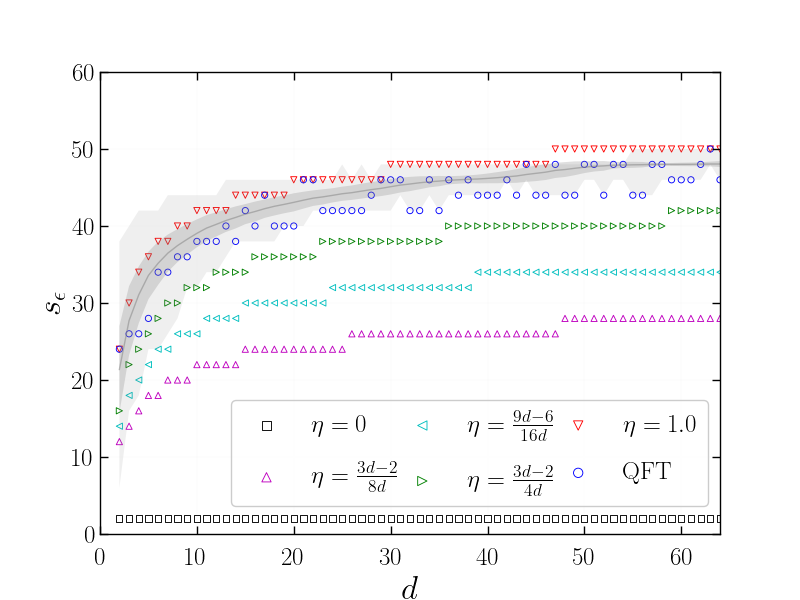

In [285]:
# ----------------------------------------------------------------------------------------------------------------------------------
# USER OPTIONS
# ----------------------------------------------------------------------------------------------------------------------------------
# Whether to load the data from the file or use the data from the current run
load_figure_data = True
# Whether to save the figure to a file
save_figure = True
# ----------------------------------------------------------------------------------------------------------------------------------
# LOAD DATA
# ----------------------------------------------------------------------------------------------------------------------------------
# Set the figure number
figure_number = 8
# Check if the data should be loaded from the file
if load_figure_data:        
    # Find data files in the directory for the specified figure number
    files_found = [name for name in os.listdir('../dat') if name.startswith(f'Figure_{figure_number:02}')]
    print(f'Files found: {files_found}')
    n_files = len(files_found)
    n_tasks = n_files # Alias for readability
    # Check if there are any data files for the specified figure number
    if n_files > 0:
        n_tasks = n_files
    else:
        raise ValueError("No data files found for the specified figure number.")    
    n_tasks = 1 # First task holding the data for specific gates, remaining tasks are for the Haar random gates
    # Preload dims, gammas and n_gates from the first data file to initialize them before the loop
    data = load_data(figure_number, 1)
    dims = data['dims']
    times = data['times']
    n_gates = data['n_gates']
    
    # Pre-allocate space for the AGI data
    s_finals_d = []
    hamiltonians_d = []
    # Loop over the dimensions
    for d_idx, d in enumerate(dims):   
        # Pre-allocate space for the AGI data per dimension 
        s_finals_temp = []
        hamiltonians_temp = []
        # Loop over the number of tasks/ data files
        for n in range(1, n_tasks + 1):
            # Load the data from file number n
            data = load_data(figure_number, n)
            # Append the AGI data to the temporary list      
            s_finals_temp.append(data['s_finals_d'][d_idx])
            # Append the density matrix data to the temporary list
            hamiltonians_temp.append(data['hamiltonians_d'][d_idx])
        # Concatenate all the elements of AGIs_temp together
        s_finals = np.concatenate(s_finals_temp, axis = 0)
        # Concatenate all the elements of list density_matrices_temp together
        hamiltonians = [item for sublist in hamiltonians_temp for item in sublist]
        # Append the concatenated AGI data to the main list
        s_finals_d.append(s_finals)
        # Append the concatenated density matrix data to the main list
        hamiltonians_d.append(hamiltonians)
    # Data loaded from file
    print(f'Data loaded from file: {data.keys()}')
# ----------------------------------------------------------------------------------------------------------------------------------
# LOAD DATA
# ----------------------------------------------------------------------------------------------------------------------------------
# Set the figure number
# Check if the data should be loaded from the file
if load_figure_data:
    # Find data files in the directory for the specified figure number
    files_found = [name for name in os.listdir('../dat') if name.startswith(f'Figure_{figure_number:02}')]
    print(f'Files found: {files_found}')
    n_files = len(files_found)
    n_tasks = n_files # Alias for readability
    # Check if there are any data files for the specified figure number
    if n_files > 0:
        n_tasks = n_files
    else:
        raise ValueError("No data files found for the specified figure number.")    
    # Preload dims, gammas and n_gates from the first data file to initialize them before the loop
    data = load_data(figure_number, 2)
    dims = data['dims']
    times = data['times']
    n_gates = data['n_gates']
    
    # Pre-allocate space for the AGI data
    s_finals_d_haar = []

    # Loop over the dimensions
    for d_idx, d in enumerate(dims):   
        # Pre-allocate space for the AGI data per dimension
        s_finals_temp = []
        # Loop over the number of tasks/ data files
        for n in range(2, n_tasks + 1):
            # Load the data from file number n
            data = load_data(figure_number, n)
            # Append the AGI data to the temporary list      
            s_finals_temp.append(data['s_finals_d'][d_idx])
        # Concatenate all the elements of AGIs_temp together
        s_finals = np.concatenate(s_finals_temp, axis = 0)
        # Append the concatenated AGI data to the main list
        s_finals_d_haar.append(s_finals)
    # Data loaded from file
    print(f'Data loaded from file: {data.keys()}')
    
# ----------------------------------------------------------------------------------------------------------------------------------
# PLOT FIGURES
# ----------------------------------------------------------------------------------------------------------------------------------

colorlist = ['k', 'm', 'c', 'g', 'r', 'b']

markerlist = ['s', '^', '<', '>', 'v', 'o', 'D']

legend_list = [r'$\eta = 0$', r'$\eta = \frac{3 d - 2}{8 d}$', r'$\eta = \frac{9 d - 6}{16 d}$', r'$\eta = \frac{3 d - 2}{4 d}$', r'$\eta = 1.0$', r'$\mathrm{QFT}$']

plt.clf()
plt.close()
plt.figure()


plt.xscale('linear')
plt.yscale('linear')
plt.ylim(0, 60)
plt.xlim(0, 64)

s_by_d = np.array(s_finals_d).T
for n in range(6):
    plt.scatter(dims, s_by_d[n]-2, color = colorlist[n%6], marker = markerlist[n%6], facecolor = 'None', linewidths=0.65, s = 20, label = legend_list[n])

s_min_haar = np.array([np.min(s) for s in s_finals_d_haar])
s_max_haar = np.array([np.max(s) for s in s_finals_d_haar])
s_avg_haar = np.array([np.mean(s) for s in s_finals_d_haar])
s_std_haar = np.array([np.std(s) for s in s_finals_d_haar])
s_med_haar = np.array([np.median(s) for s in s_finals_d_haar])
s_std_max = np.array(s_avg_haar) + np.array(s_std_haar)
s_std_min = np.array(s_avg_haar) - np.array(s_std_haar)


plt.fill_between(dims, s_min_haar-2, s_max_haar-2, facecolor = 'gray', alpha = .125, label = None)
plt.fill_between(dims, s_std_min-2, s_std_max-2, facecolor = 'gray', alpha = .25, label = None)
plt.plot(dims, s_avg_haar-2, color = 'gray', alpha = 0.5, linewidth = 1.0, label = None)

# plt.legend(loc='right', bbox_to_anchor=(0.975, 0.225), ncols=3, framealpha = 0.99, columnspacing = 0, labelspacing = 1)
plt.legend(loc='right', bbox_to_anchor=(1, 0.175), ncols=3, framealpha = 0.99, columnspacing = 0, labelspacing = 1)

plt.xlabel(r'$d$')
plt.ylabel(r'$s_{\epsilon}$')

if save_figure:
    plt.savefig(f'../fig/Figure_{figure_number:02}.pdf', format='pdf', bbox_inches='tight')

# <span style="font-size: 60px; font-family: Arial, sans-serif">FIGURE 9</span>

## <span style="font-size: 24px; font-family: Arial, sans-serif">Generate Data</span>

In [47]:
# ----------------------------------------------------------------------------------------------------------------------------------
# IMPORTS
# ----------------------------------------------------------------------------------------------------------------------------------

import paper_imports
import paper_methods

from paper_imports import *
from paper_methods import *

importlib.reload(paper_imports)
importlib.reload(paper_methods)

import paper_imports
import paper_methods

from paper_imports import *
from paper_methods import *

# ----------------------------------------------------------------------------------------------------------------------------------
# USER OPTIONS
# ----------------------------------------------------------------------------------------------------------------------------------

# Save data to file
save_figure_data : bool = False

# ----------------------------------------------------------------------------------------------------------------------------------
# SLURM SETTINGS
# ----------------------------------------------------------------------------------------------------------------------------------

# Get script file name
script_file_name : str = "paper_figure_09.py"

task_count, task_id, n_CPUs, figure_number = get_SLURM_Data(script_file_name)

# Find existing data files before overwriting
files_found = [name for name in os.listdir('../dat/paper_2') if name.startswith(f'Figure_{figure_number:02}')]
print(f'Existing Data Files Found: {files_found}')
n_files = len(files_found)
# Round n_files down to the nearest multiple of 10, since we work in batches of 10 and tasks may run asynchronously
n_files = n_files - n_files % 10

print = functools.partial(print, flush = True)

# ----------------------------------------------------------------------------------------------------------------------------------
# START OF SCRIPT
# ----------------------------------------------------------------------------------------------------------------------------------

# START TIMING
start_time : float = time.time()

# Set the figure number
figure_number : int = 9
# Set the method for generating gates
method : str = 'interpolated_INC' # interpolated_INC
# Set max dimension for the qudits
d_max : int = 32
# Set dimensions for the qudits
dims : list[int] = np.arange(2, d_max + 1, 1).tolist()
# Set number of dimensions
n_dims : int = len(dims)
# Set collapse operator
collapse_operator : str = "z" # ['x', 'y','z']
# Set alias for tasks
n_tasks : int = task_count
# Set the number of gates
n_gates : int = 6 # 10
# Set times for the main figure
t_min : float = 0.0
t_max : float = 5.0
n_times : int = 2 * n_CPUs
times : list[float] = np.linspace(t_min, t_max, n_times).tolist()
# Set times for the inset figure
t_min_inset : float = 0.0
t_max_inset : float = 0.2
n_times_inset : int = n_CPUs
times_inset : list[float] = np.linspace(t_min_inset, t_max_inset, n_times_inset).tolist()
# Set maximum value of s for the integration, and error threshold
s_max : int = 300
# Set error threshold
error_threshold : float = 1e-8
# Set parallelization parameters
parallel_verbosity : int = 11
# Gate generation parallelization parameters
n_jobs_gate_generation : int = min(n_CPUs, n_gates)
batch_size_gate_generation : int = int(n_gates / n_jobs_gate_generation)
# Time parallelization parameters
n_jobs_times : int = min(n_CPUs, n_times)
batch_size_times : int = int(n_times / n_jobs_times)
# Insets time parallelization parameters
n_jobs_times_inset : int = min(n_CPUs, n_times_inset)
batch_size_times_inset : int = int(n_times_inset / n_jobs_times_inset)
# Set options for the mesolve function (solver options for differential equations)
options_mesolve : qt.Options = qt.Options()
options_mesolve.method = 'bdf'  # Setting method to 'bdf' (backward differentiation formula)
options_mesolve.max_step = float(0.001) # type: ignore 
options_mesolve.nsteps = float(1000000) # type: ignore
options_mesolve.rtol = float(1e-8)  # Relative tolerance
options_mesolve.atol = float(1e-8)  # Absolute tolerance

# Pre-allocate space for data
result = []
result_inset = []
hamiltonians_d : list = []
s_finals_d : np.ndarray = np.zeros((n_dims, n_gates, n_times), dtype = int)
s_finals_d_inset : np.ndarray = np.zeros((n_dims, n_gates, n_times_inset), dtype = int)

# Print the config parameters
print('PRINTING CONFIG PARAMETERS:')
print('---------------------------')
print('\n')
print(f"CURRENT TASK : {task_id:03} / {task_count:03}")
print(f'MODIFIED FIGURE NUMBER : {figure_number}')
print(f'SAVING FIGURE DATA : {save_figure_data}')
print('\n')
print(f"GATE GENERATION METHOD : {method}")
print(f"COLLAPSE OPERATOR : {collapse_operator}")
print('\n')
print(f"NUMBER OF GATES : {n_gates}")
print(f"NUMBER OF TIMES FOR MAIN FIGURE : {n_times}")
print(f"NUMBER OF TIMES FOR INSET FIGURE : {n_times_inset}")
print(f"NUMBER OF DIMENSIONS : {n_dims}")
print('\n')
print (f"QUDIT DIMENSIONS : {dims}")
print(f"MAIN FIGURE TIMES : {times}")
print(f"INSET FIGURE TIMES : {times_inset}")
print('\n')
print(f"MAXIMUM VALUE OF s : {s_max}")
print(f"ERROR THRESHOLD : {error_threshold}")
print('\n')
print(f"PARALLEL VERBOSITY : {parallel_verbosity}")
print(f"NUMBER OF PARALLEL JOBS FOR GATE GENERATION : {n_jobs_gate_generation}")
print(f"BATCH SIZE PER WORKER FOR GATE GENERATION : {batch_size_gate_generation}")
print(f"NUMBER OF PARALLEL JOBS FOR MAIN FIGURE TIMES : {n_jobs_times}")
print(f"BATCH SIZE PER WORKER FOR MAIN FIGURE TIMES : {batch_size_times}")
print(f"NUMBER OF PARALLEL JOBS FOR INSET FIGURE TIMES : {n_jobs_times_inset}")
print(f"BATCH SIZE PER WORKER FOR INSET FIGURE TIMES : {batch_size_times_inset}")
print('\n')
print(f"OPTIONS FOR MESOLVE : {options_mesolve}")
print('\n')

# INITIALIZATION TIME
initialization_time : float = time.time()
print(f"Initialization time: {initialization_time - start_time}")

print('\n')

# Loop over the dimensions 
for d_idx, d in enumerate(dims):  

    # LOOP START TIME
    loop_start_time : float = time.time()

    print(f"DIMENSION : {d:02} / {d_max:02}")

    # Initialize a Qudit of dimension d
    qudit = Qudit(d=d)
    # Get collapse operators related to the Qudit
    j = qudit.get_j
    # Assign collapse operator to L
    L : qt.Qobj = j(collapse_operator) # type:ignore

    # Initialise the etas list for the interpolated INC gates
    etas_list = []
    if method == 'interpolated_INC':
        etas_list = (3 * d - 2) / (4 * d)
        etas_list = np.linspace(0, etas_list, n_gates - 3)
        etas_list = np.append(etas_list, (etas_list[-1] + etas_list[-2]) / 2)
        etas_list = np.append(etas_list, 1)
        etas_list = np.sort(etas_list).tolist()
        print(f"ETAS LIST : {etas_list}")

    # LOOP INITIALIZATION TIME
    loop_initialization_time : float = time.time()
    print(f"Loop initialization time: {loop_initialization_time - loop_start_time}")  

    # Generate a list of gates and hamiltonians for the current dimension and method
    super_gates, hamiltonians = generate_gates_and_hamiltonians(n_gates - 1, d, method = method, n_jobs = n_jobs_gate_generation, batch_size = batch_size_gate_generation, is_super = False, etas = etas_list)
    # Generate 1 gate and hamiltonian for the superposition (Hadamard/ Crestenson/ QFT) gate
    super_gates_2, hamiltonians_2 = generate_gates_and_hamiltonians(1, d, method = 'QFT', n_jobs = 1, batch_size = 1, is_super = False)

    # Concatenate the hamiltonians
    hamiltonians = hamiltonians + hamiltonians_2
    # Append the hamiltonians to the list per dimension
    hamiltonians_d.append(hamiltonians)
    
    # GATE GENERATION TIME
    gate_generation_time = time.time()
    print(f"Gate generation time: {gate_generation_time - loop_initialization_time}")

    # Loop over number of gates
    for gate_idx in range(n_gates):
        
        print(f"GATE : {gate_idx + 1:03} / {n_gates:03}")

        # Parallelize second_order_AGI over dimensions for main figure times
        result = Parallel(n_jobs = n_jobs_times, batch_size = batch_size_times, return_as = 'list', verbose = parallel_verbosity)(delayed(second_order_AGI)(hamiltonians_d[d_idx][gate_idx], L, d, t, s_max, error_threshold = error_threshold, super = True) for t in times) # type : ignore

        # Store the final s values for the current gate and dimension
        s_finals_d[d_idx, gate_idx, :] = np.array([result[t_idx][1] for t_idx, t in enumerate(times)]) # type : ignore

        # Parallelize second_order_AGI over dimensions for inset figure times
        result_inset = Parallel(n_jobs = n_jobs_times_inset, batch_size = batch_size_times_inset, return_as = 'list', verbose = parallel_verbosity)(delayed(second_order_AGI)(hamiltonians_d[d_idx][gate_idx], L, d, t, s_max, error_threshold = error_threshold, super = True) for t in times_inset) # type : ignore

        # Store the final s values for the current gate and dimension for the inset figure
        s_finals_d_inset[d_idx, gate_idx, :] = np.array([result_inset[t_idx][1] for t_idx, t in enumerate(times_inset)])

    # FIDELITY TIME
    fidelity_time = time.time()
    print(f"Fidelity time: {fidelity_time - gate_generation_time}")

    # SINGLE LOOP TIME
    loop_time = time.time()
    print(f"Single loop time: {loop_time - loop_start_time}")

    print('\n')

# TOTAL LOOP TIME
total_loop_time = time.time()
print(f"Total loop time: {total_loop_time - start_time}")

# Update task_id to account for the tasks that have already been run
task_id += n_files

# Save the data
if save_figure_data:
    save_data(figure_number, task_id, dims = dims, n_gates = n_gates, hamiltonians_d = hamiltonians_d, times = times, s_finals_d = s_finals_d, times_inset = times_inset, s_finals_d_inset = s_finals_d_inset)

# SAVE DATA TIME
save_data_time = time.time()
print(f"Save data time: {save_data_time - total_loop_time}")

# TOTAL TIME
total_time = time.time()
print(f"Total time: {total_time - start_time}")

# ----------------------------------------------------------------------------------------------------------------------------------
# END OF SCRIPT
# ----------------------------------------------------------------------------------------------------------------------------------

FIGURE_NUMBER: 09
SCRIPT_NAME: paper_figure_09.py


SLURM_JOB_ID: NOSLURM
SLURM_ARRAY_TASK_COUNT: 1
SLURM_ARRAY_TASK_ID: 1
SLURM_CPUS_ON_NODE: 12


Existing Data Files Found: ['Figure_09_results_001.blob']
PRINTING CONFIG PARAMETERS:
---------------------------


CURRENT TASK : 001 / 001
MODIFIED FIGURE NUMBER : 9
SAVING FIGURE DATA : False


GATE GENERATION METHOD : interpolated_INC
COLLAPSE OPERATOR : z


NUMBER OF GATES : 6
NUMBER OF TIMES FOR MAIN FIGURE : 24
NUMBER OF TIMES FOR INSET FIGURE : 12
NUMBER OF DIMENSIONS : 1


QUDIT DIMENSIONS : [2]
MAIN FIGURE TIMES : [0.0, 0.21739130434782608, 0.43478260869565216, 0.6521739130434783, 0.8695652173913043, 1.0869565217391304, 1.3043478260869565, 1.5217391304347825, 1.7391304347826086, 1.9565217391304348, 2.1739130434782608, 2.391304347826087, 2.608695652173913, 2.8260869565217392, 3.043478260869565, 3.260869565217391, 3.4782608695652173, 3.6956521739130435, 3.9130434782608696, 4.130434782608695, 4.3478260869565215, 4.565217391304348, 4.

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


KeyboardInterrupt: 

In [67]:
# TESTING
# ----------------------------------------------------------------------------------------------------------------------------------
# IMPORTS
# ----------------------------------------------------------------------------------------------------------------------------------

import paper_imports
import paper_methods

from paper_imports import *
from paper_methods import *

importlib.reload(paper_imports)
importlib.reload(paper_methods)

import paper_imports
import paper_methods

from paper_imports import *
from paper_methods import *

# ----------------------------------------------------------------------------------------------------------------------------------
# USER OPTIONS
# ----------------------------------------------------------------------------------------------------------------------------------

# Save data to file
save_figure_data : bool = False

# ----------------------------------------------------------------------------------------------------------------------------------
# SLURM SETTINGS
# ----------------------------------------------------------------------------------------------------------------------------------

# Get script file name
script_file_name : str = "paper_figure_09.py"

task_count, task_id, n_CPUs, figure_number = get_SLURM_Data(script_file_name)

# Find existing data files before overwriting
files_found = [name for name in os.listdir('../dat/paper_2') if name.startswith(f'Figure_{figure_number:02}')]
print(f'Existing Data Files Found: {files_found}')
n_files = len(files_found)
# Round n_files down to the nearest multiple of 10, since we work in batches of 10 and tasks may run asynchronously
n_files = n_files - n_files % 10

print = functools.partial(print, flush = True)

# ----------------------------------------------------------------------------------------------------------------------------------
# START OF SCRIPT
# ----------------------------------------------------------------------------------------------------------------------------------

# START TIMING
start_time : float = time.time()

# Set the figure number
figure_number : int = 9
# Set the method for generating gates
method : str = 'interpolated_INC' # interpolated_INC
# Set max dimension for the qudits
d_max : int = 2 # 32
# Set dimensions for the qudits
dims : list[int] = np.arange(2, d_max + 1, 1).tolist()

dims = [48]
# Set number of dimensions
n_dims : int = len(dims)
# Set collapse operator
collapse_operator : str = "z" # ['x', 'y','z']
# Set alias for tasks
n_tasks : int = task_count
# Set the number of gates
n_gates : int = 1 # 10
# Set times for the main figure
t_min : float = 0.0
t_max : float = 5.0
n_times : int = n_CPUs
times : list[float] = np.linspace(t_min, t_max, n_times).tolist()
# Set times for the inset figure
t_min_inset : float = 0.0
t_max_inset : float = 0.2
n_times_inset : int = n_CPUs
times_inset : list[float] = np.linspace(t_min_inset, t_max_inset, n_times_inset).tolist()
# Set maximum value of s for the integration, and error threshold
s_max : int = 300 # 300
# Set error threshold
error_threshold : float = 1e-8
# Set parallelization parameters
parallel_verbosity : int = 11
# Gate generation parallelization parameters
n_jobs_gate_generation : int = min(n_CPUs, n_gates)
batch_size_gate_generation : int = int(n_gates / n_jobs_gate_generation)
# Time parallelization parameters
n_jobs_times : int = min(n_CPUs, n_times)
batch_size_times : int = int(n_times / n_jobs_times)
# Insets time parallelization parameters
n_jobs_times_inset : int = min(n_CPUs, n_times_inset)
batch_size_times_inset : int = int(n_times_inset / n_jobs_times_inset)
# Set options for the mesolve function (solver options for differential equations)
options_mesolve : qt.Options = qt.Options()
options_mesolve.method = 'bdf'  # Setting method to 'bdf' (backward differentiation formula)
options_mesolve.max_step = float(0.001) # type: ignore 
options_mesolve.nsteps = float(1000000) # type: ignore
options_mesolve.rtol = float(1e-8)  # Relative tolerance
options_mesolve.atol = float(1e-8)  # Absolute tolerance

# Pre-allocate space for data
result = []
result_inset = []
hamiltonians_d : list = []
s_finals_d : np.ndarray = np.zeros((n_dims, n_gates, n_times), dtype = int)
s_finals_d_inset : np.ndarray = np.zeros((n_dims, n_gates, n_times_inset), dtype = int)

# Print the config parameters
print('PRINTING CONFIG PARAMETERS:')
print('---------------------------')
print('\n')
print(f"CURRENT TASK : {task_id:03} / {task_count:03}")
print(f'MODIFIED FIGURE NUMBER : {figure_number}')
print(f'SAVING FIGURE DATA : {save_figure_data}')
print('\n')
print(f"GATE GENERATION METHOD : {method}")
print(f"COLLAPSE OPERATOR : {collapse_operator}")
print('\n')
print(f"NUMBER OF GATES : {n_gates}")
print(f"NUMBER OF TIMES FOR MAIN FIGURE : {n_times}")
print(f"NUMBER OF TIMES FOR INSET FIGURE : {n_times_inset}")
print(f"NUMBER OF DIMENSIONS : {n_dims}")
print('\n')
print (f"QUDIT DIMENSIONS : {dims}")
print(f"MAIN FIGURE TIMES : {times}")
print(f"INSET FIGURE TIMES : {times_inset}")
print('\n')
print(f"MAXIMUM VALUE OF s : {s_max}")
print(f"ERROR THRESHOLD : {error_threshold}")
print('\n')
print(f"PARALLEL VERBOSITY : {parallel_verbosity}")
print(f"NUMBER OF PARALLEL JOBS FOR GATE GENERATION : {n_jobs_gate_generation}")
print(f"BATCH SIZE PER WORKER FOR GATE GENERATION : {batch_size_gate_generation}")
print(f"NUMBER OF PARALLEL JOBS FOR MAIN FIGURE TIMES : {n_jobs_times}")
print(f"BATCH SIZE PER WORKER FOR MAIN FIGURE TIMES : {batch_size_times}")
print(f"NUMBER OF PARALLEL JOBS FOR INSET FIGURE TIMES : {n_jobs_times_inset}")
print(f"BATCH SIZE PER WORKER FOR INSET FIGURE TIMES : {batch_size_times_inset}")
print('\n')
print(f"OPTIONS FOR MESOLVE : {options_mesolve}")
print('\n')

# INITIALIZATION TIME
initialization_time : float = time.time()
print(f"Initialization time: {initialization_time - start_time}")

print('\n')

# Loop over the dimensions 
for d_idx, d in enumerate(dims):  

    # LOOP START TIME
    loop_start_time : float = time.time()

    print(f"DIMENSION : {d:02} / {d_max:02}")

    # Initialize a Qudit of dimension d
    qudit = Qudit(d=d)
    # Get collapse operators related to the Qudit
    j = qudit.get_j
    # Assign collapse operator to L
    L : qt.Qobj = j(collapse_operator) # type:ignore

    # Initialise the etas list for the interpolated INC gates
    # etas_list = []
    # if method == 'interpolated_INC':
    #     etas_list = (3 * d - 2) / (4 * d)
    #     etas_list = np.linspace(0, etas_list, n_gates - 3)
    #     etas_list = np.append(etas_list, (etas_list[-1] + etas_list[-2]) / 2)
    #     etas_list = np.append(etas_list, 1)
    #     etas_list = np.sort(etas_list).tolist()
    #     print(f"ETAS LIST : {etas_list}")

    # LOOP INITIALIZATION TIME
    loop_initialization_time : float = time.time()
    print(f"Loop initialization time: {loop_initialization_time - loop_start_time}")  

    # Generate a list of gates and hamiltonians for the current dimension and method
    # super_gates, hamiltonians = generate_gates_and_hamiltonians(n_gates - 1, d, method = method, n_jobs = n_jobs_gate_generation, batch_size = batch_size_gate_generation, is_super = False, etas = etas_list)
    # Generate 1 gate and hamiltonian for the superposition (Hadamard/ Crestenson/ QFT) gate
    super_gates_2, hamiltonians = generate_gates_and_hamiltonians(1, d, method = 'QFT', n_jobs = 1, batch_size = 1, is_super = False)

    # Concatenate the hamiltonians
    # hamiltonians = hamiltonians + hamiltonians_2
    # Append the hamiltonians to the list per dimension
    hamiltonians_d.append(hamiltonians)
    
    # GATE GENERATION TIME
    gate_generation_time = time.time()
    print(f"Gate generation time: {gate_generation_time - loop_initialization_time}")

    # Loop over number of gates
    for gate_idx in range(n_gates):
        
        print(f"GATE : {gate_idx + 1:03} / {n_gates:03}")

        # Parallelize second_order_AGI over dimensions for main figure times
        # result = Parallel(n_jobs = n_jobs_times, batch_size = batch_size_times, return_as = 'list', verbose = parallel_verbosity)(delayed(second_order_AGI)(hamiltonians_d[d_idx][gate_idx], L, d, t, s_max, error_threshold = error_threshold, super = True) for t in times) # type : ignore

        result = [second_order_AGI(hamiltonians_d[d_idx][gate_idx], L, d, t, s_max, error_threshold = error_threshold, super = True) for t in times]
        # Store the final s values for the current gate and dimension
        s_finals_d[d_idx, gate_idx, :] = np.array([result[t_idx][1] for t_idx, t in enumerate(times)]) # type : ignore

        # Parallelize second_order_AGI over dimensions for inset figure times
        # result_inset = Parallel(n_jobs = n_jobs_times_inset, batch_size = batch_size_times_inset, return_as = 'list', verbose = parallel_verbosity)(delayed(second_order_AGI)(hamiltonians_d[d_idx][gate_idx], L, d, t, s_max, error_threshold = error_threshold, super = True) for t in times_inset) # type : ignore

        # Store the final s values for the current gate and dimension for the inset figure
        # s_finals_d_inset[d_idx, gate_idx, :] = np.array([result_inset[t_idx][1] for t_idx, t in enumerate(times_inset)])

    # FIDELITY TIME
    fidelity_time = time.time()
    print(f"Fidelity time: {fidelity_time - gate_generation_time}")

    # SINGLE LOOP TIME
    loop_time = time.time()
    print(f"Single loop time: {loop_time - loop_start_time}")

    print('\n')

# TOTAL LOOP TIME
total_loop_time = time.time()
print(f"Total loop time: {total_loop_time - start_time}")

# Update task_id to account for the tasks that have already been run
task_id += n_files

# Save the data
if save_figure_data:
    save_data(figure_number, task_id, dims = dims, n_gates = n_gates, hamiltonians_d = hamiltonians_d, times = times, s_finals_d = s_finals_d, times_inset = times_inset, s_finals_d_inset = s_finals_d_inset)

# SAVE DATA TIME
save_data_time = time.time()
print(f"Save data time: {save_data_time - total_loop_time}")

# TOTAL TIME
total_time = time.time()
print(f"Total time: {total_time - start_time}")

# ----------------------------------------------------------------------------------------------------------------------------------
# END OF SCRIPT
# ----------------------------------------------------------------------------------------------------------------------------------

FIGURE_NUMBER: 09
SCRIPT_NAME: paper_figure_09.py


SLURM_JOB_ID: NOSLURM
SLURM_ARRAY_TASK_COUNT: 1
SLURM_ARRAY_TASK_ID: 1
SLURM_CPUS_ON_NODE: 12


Existing Data Files Found: ['Figure_09_results_001.blob']
PRINTING CONFIG PARAMETERS:
---------------------------


CURRENT TASK : 001 / 001
MODIFIED FIGURE NUMBER : 9
SAVING FIGURE DATA : False


GATE GENERATION METHOD : interpolated_INC
COLLAPSE OPERATOR : z


NUMBER OF GATES : 1
NUMBER OF TIMES FOR MAIN FIGURE : 12
NUMBER OF TIMES FOR INSET FIGURE : 12
NUMBER OF DIMENSIONS : 1


QUDIT DIMENSIONS : [48]
MAIN FIGURE TIMES : [0.0, 0.45454545454545453, 0.9090909090909091, 1.3636363636363635, 1.8181818181818181, 2.2727272727272725, 2.727272727272727, 3.1818181818181817, 3.6363636363636362, 4.090909090909091, 4.545454545454545, 5.0]
INSET FIGURE TIMES : [0.0, 0.018181818181818184, 0.03636363636363637, 0.05454545454545455, 0.07272727272727274, 0.09090909090909093, 0.1090909090909091, 0.1272727272727273, 0.14545454545454548, 0.16363636363636366,

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s


2 : 0j
2 : (-4944.500461027235+0j)
4 : (1162.4082154549267+0j)
6 : (-231.9255230349773+0j)
8 : (36.448845062479194+0j)
10 : (-4.422733809482445+0j)
12 : (0.41594684762289036+0j)
14 : (-0.03069555786260512+0j)
16 : (0.0018072838311924719+0j)
18 : (-8.642212685118191e-05+0j)
20 : (3.413944609929843e-06+0j)
22 : (-1.1313302708680553e-07+0j)
24 : (3.1878580645821168e-09+0j)
26 : (-7.728918221134189e-11+0j)


KeyboardInterrupt: 

## <span style="font-size: 24px; font-family: Arial, sans-serif">Plot Figure</span>

Files found: ['Figure_09_results_001.blob', 'Figure_09_results_011.blob', 'Figure_09_results_012.blob', 'Figure_09_results_013.blob', 'Figure_09_results_014.blob', 'Figure_09_results_015.blob', 'Figure_09_results_016.blob', 'Figure_09_results_017.blob', 'Figure_09_results_018.blob', 'Figure_09_results_019.blob', 'Figure_09_results_020.blob', 'Figure_09_results_021.blob', 'Figure_09_results_022.blob', 'Figure_09_results_023.blob', 'Figure_09_results_024.blob', 'Figure_09_results_025.blob', 'Figure_09_results_026.blob', 'Figure_09_results_027.blob', 'Figure_09_results_028.blob', 'Figure_09_results_029.blob', 'Figure_09_results_030.blob']
Data loaded from file: dict_keys(['dims', 'n_gates', 'hamiltonians_d', 'times', 's_finals_d', 'AGI2_finals_d'])
Data loaded from file: dict_keys(['dims', 'n_gates', 'hamiltonians_d', 'times', 's_finals_d', 'AGI2_finals_d'])
Files found: ['Figure_09_results_001.blob', 'Figure_09_results_011.blob', 'Figure_09_results_012.blob', 'Figure_09_results_013.blob'

/home/jgkh/.local/lib/python3.9/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)


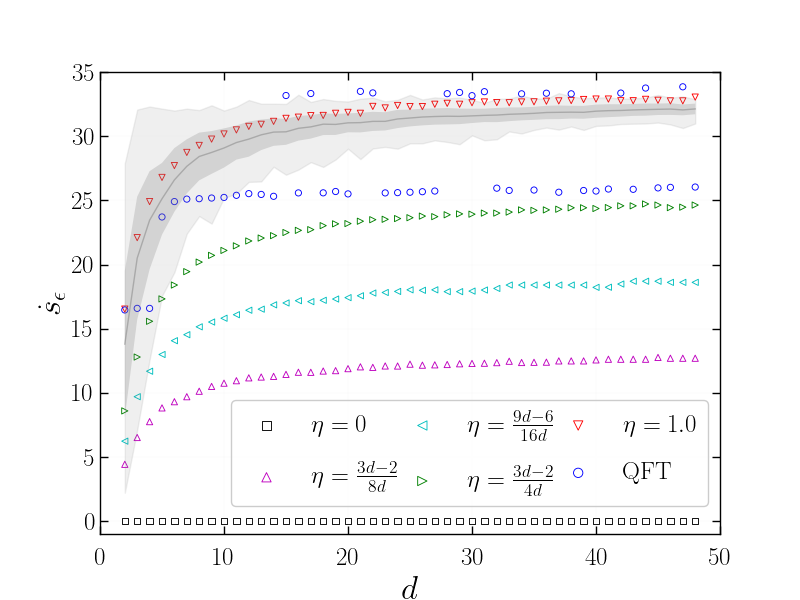

In [250]:
# ----------------------------------------------------------------------------------------------------------------------------------
# USER OPTIONS
# ----------------------------------------------------------------------------------------------------------------------------------
# Whether to load the data from the file or use the data from the current run
load_figure_data = True
# Whether to save the figure to a file
save_figure = True
# ----------------------------------------------------------------------------------------------------------------------------------
# LOAD DATA
# ----------------------------------------------------------------------------------------------------------------------------------
# Set the figure number
figure_number = 9
# Check if the data should be loaded from the file
if load_figure_data:        
    # Find data files in the directory for the specified figure number
    files_found = [name for name in os.listdir('../dat') if name.startswith(f'Figure_{figure_number:02}')]
    print(f'Files found: {files_found}')
    n_files = len(files_found)
    n_tasks = n_files # Alias for readability
    # Check if there are any data files for the specified figure number
    if n_files > 0:
        n_tasks = n_files
    else:
        raise ValueError("No data files found for the specified figure number.")    
    # Preload dims, gammas and n_gates from the first data file to initialize them before the loop
    data = load_data(figure_number, 1)
    # Data loaded from file
    print(f'Data loaded from file: {data.keys()}')
    dims = data['dims']
    n_gates = data['n_gates']

    s_finals_d_tasks = data['s_finals_d']
    times_tasks = data['times']
    hamiltonians_d_tasks = data['hamiltonians_d']
    # Data loaded from file
    print(f'Data loaded from file: {data.keys()}')
# ----------------------------------------------------------------------------------------------------------------------------------
# LOAD DATA
# ----------------------------------------------------------------------------------------------------------------------------------
# Check if the data should be loaded from the file
if load_figure_data:        
    # Find data files in the directory for the specified figure number
    files_found = [name for name in os.listdir('../dat') if name.startswith(f'Figure_{figure_number:02}')]
    print(f'Files found: {files_found}')
    n_files = len(files_found)
    n_tasks_haar = n_files # Alias for readability
    
    # Check if there are any data files for the specified figure number
    if n_files > 0:
        n_tasks_haar = n_files
    else:
        raise ValueError("No data files found for the specified figure number.")    
    n_tasks_haar = np.arange(11, 31, 1).tolist()
    # Preload dims, gammas and n_gates from the first data file to initialize them before the loop
    data = load_data(figure_number, 11)
    # Data loaded from file
    print(f'Data loaded from file: {data.keys()}')
    dims = data['dims']    
    print(f'DIMS : {dims}')
    n_gates_haar = []
    
    # Pre-allocate space for the s_max data
    s_finals_d_tasks_haar = []
    s_finals_d_tasks_inset = []
    times_tasks_haar = []
    times_inset_tasks = []
    hamiltonians_d_tasks = []
    # Loop over the number of tasks/ data files
    for n in n_tasks_haar:
        # Load the data from file number n
        data = load_data(figure_number, n)
        n_gates_haar.append(data['n_gates'])
        # Append the concatenated AGI data to the main list
        s_finals_d_tasks_haar.append(data['s_finals_d'])
        # s_finals_d_tasks_inset.append(data['s_finals_d_inset'] )
        times_tasks_haar.append(data['times'])
        # times_inset_tasks.append(data['times_inset'])
        hamiltonians_d_tasks.append(data['hamiltonians_d'])

    start = 2
    stop = None
    step = 1

    slope_min_d = []
    slope_max_d = []
    slopes_mean_d = []
    slopes_med_d = []
    slopes_std_d = []
    for dim_idx, d in enumerate(dims):
        slope_list_by_d = []
        print(d)
        for task_idx, task in enumerate(n_tasks_haar):
            for gate_idx in range(n_gates_haar[task_idx]):        
                # Define the data for linear regression
                x_data = np.array(times_tasks_haar[task_idx][start:stop:step])
                y_data = np.array(s_finals_d_tasks_haar[task_idx][dim_idx][gate_idx][start:stop:step])
                # RANSAC REGRESSOR
                # Works for all dimensions (excludes outliers)
                X = x_data.reshape(-1, 1)
                ransac = RANSACRegressor()
                ransac.fit(X, y_data)
                predictions_ransac = ransac.predict(X)
                estimated_slope = ransac.estimator_.coef_
                slope_list_by_d.append(estimated_slope[0])
        slope_min_d.append(np.min(slope_list_by_d))
        slope_max_d.append(np.max(slope_list_by_d))
        slopes_mean_d.append(np.mean(slope_list_by_d))
        slopes_med_d.append(np.median(slope_list_by_d))
        slopes_std_d.append(np.std(slope_list_by_d))
    slopes_min_std = np.array(slopes_mean_d) - np.array(slopes_std_d)
    slopes_max_std = np.array(slopes_mean_d) + np.array(slopes_std_d)
    # Data loaded from file
    print(f'Data loaded from file: {data.keys()}')
    
# ----------------------------------------------------------------------------------------------------------------------------------
# PLOT FIGURES
# ----------------------------------------------------------------------------------------------------------------------------------


colorlist = ['k', 'm', 'c', 'g', 'r', 'b']

markerlist = ['s', '^', '<', '>', 'v', 'o', 'D']
plt.clf()
plt.close()
plt.figure()

plt.xscale('linear')
plt.yscale('linear')
plt.ylim(-1, 35)
plt.xlim(0, 50)

legend_list = [r'$\eta = 0$', r'$\eta = \frac{3 d - 2}{8 d}$', r'$\eta = \frac{9 d - 6}{16 d}$', r'$\eta = \frac{3 d - 2}{4 d}$', r'$\eta = 1.0$', r'$\mathrm{QFT}$']

# Linear Slope vs d
# for task_idx in range(n_tasks):
task_idx = 0
for gate_idx in range(n_gates):
    slope_list = []
    for dim_idx, d in enumerate(dims):
        # Define the data for linear regression
        x_data = np.array(times_tasks[start:stop:step])
        y_data = np.array(s_finals_d_tasks[dim_idx][gate_idx][start:stop:step])
        # RANSAC REGRESSOR
        # Works for all dimensions (excludes outliers)
        X = x_data.reshape(-1, 1)
        ransac = RANSACRegressor()
        ransac.fit(X, y_data)
        predictions_ransac = ransac.predict(X)
        estimated_slope = ransac.estimator_.coef_
        slope_list.append(estimated_slope[0])
    # Plot the data
    plt.scatter(dims, slope_list, color = colorlist[gate_idx%6], marker = markerlist[gate_idx%6], facecolor = 'None', linewidths=0.65, s = 20, label = legend_list[gate_idx])

plt.plot(dims, slopes_mean_d, color = 'gray', alpha = 0.5, label = None, linewidth = 1)
plt.fill_between(dims, slope_min_d, slope_max_d, color = 'gray', alpha = 0.125, label = None)
plt.fill_between(dims, slopes_min_std, slopes_max_std, facecolor = "gray", alpha = .25, label = None)


# Add axes labels
plt.xlabel(r'$d$')
plt.ylabel(r'$\dot{s}_{\epsilon}$')
plt.legend(loc='right', bbox_to_anchor=(1, 0.175), ncols=3, framealpha = 0.99, columnspacing = 0, labelspacing = 1)

if save_figure:
    plt.savefig(f'../fig/Figure_{figure_number:02}.pdf', format='pdf', bbox_inches='tight')

# <span style="font-size: 60px; font-family: Arial, sans-serif">FIGURE 10</span>

## <span style="font-size: 24px; font-family: Arial, sans-serif">Generate Data</span>

FIGURE_NUMBER: 10
SCRIPT_NAME: paper_figure_10.py


SLURM_JOB_ID: NOSLURM
SLURM_ARRAY_TASK_COUNT: 1
SLURM_ARRAY_TASK_ID: 1
SLURM_CPUS_ON_NODE: 12


PRINTING CONFIG PARAMETERS:
---------------------------


CURRENT TASK : 002 / 001
MODIFIED FIGURE NUMBER : 10
SAVING FIGURE DATA : True


GATE GENERATION METHOD : interpolated_INC
COLLAPSE OPERATOR : z


QUDIT DIMENSIONS : [2]
GAMMAS : [0.001, 0.0034750000000000002, 0.00595, 0.008425000000000002, 0.0109, 0.013375000000000001, 0.015850000000000003, 0.018325, 0.020800000000000003, 0.023275000000000004, 0.025750000000000002, 0.028225000000000004, 0.030700000000000005, 0.033175, 0.03565, 0.038125000000000006, 0.040600000000000004, 0.043075, 0.04555000000000001, 0.048025000000000005, 0.0505, 0.05297500000000001, 0.055450000000000006, 0.057925000000000004, 0.06040000000000001, 0.062875, 0.06535, 0.06782500000000001, 0.0703, 0.072775, 0.07525000000000001, 0.077725, 0.08020000000000001, 0.08267500000000001, 0.08515, 0.08762500000000001, 0.09010000

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:   25.8s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:   26.4s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:   27.0s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:   27.1s
[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:   27.3s
[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:   27.4s
[Parallel(n_jobs=12)]: Done  14 tasks      | elapsed:   27.8s
[Parallel(n_jobs=12)]: Done  16 tasks      | elapsed:   28.0s
[Parallel(n_jobs=12)]: Done  18 tasks      | elapsed:   28.4s
[Parallel(n_jobs=12)]: Done  20 tasks      | elapsed:   28.4s
[Parallel(n_jobs=12)]: Done  22 tasks      | elapsed:   29.2s
[Parallel(n_jobs=12)]: Done  24 tasks      | elapsed:   29.6s
[Parallel(n_jobs=12)]: Done  25 tasks      | elapsed:   4

Fidelity time: 53.46130609512329
Single loop time: 53.47131657600403


Total loop time: 53.502840995788574
Save data time: 0.00529789924621582
Total time: 53.50892233848572


[Parallel(n_jobs=12)]: Done  41 out of  41 | elapsed:   53.4s finished


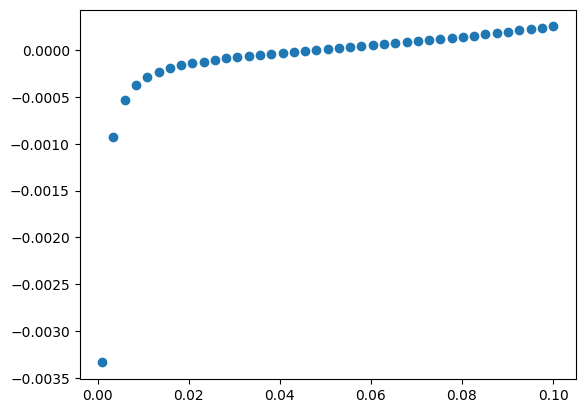

In [836]:
# ----------------------------------------------------------------------------------------------------------------------------------
# IMPORTS
# ----------------------------------------------------------------------------------------------------------------------------------

import paper_imports
import paper_methods

from paper_imports import *
from paper_methods import *

importlib.reload(paper_imports)
importlib.reload(paper_methods)

import paper_imports
import paper_methods

from paper_imports import *
from paper_methods import *

# ----------------------------------------------------------------------------------------------------------------------------------
# USER OPTIONS
# ----------------------------------------------------------------------------------------------------------------------------------

# Save data to file
save_figure_data : bool = True

# ----------------------------------------------------------------------------------------------------------------------------------
# SLURM SETTINGS
# ----------------------------------------------------------------------------------------------------------------------------------

# Get script file name
script_file_name : str = "paper_figure_10.py"

task_count, task_id, n_CPUs, figure_number = get_SLURM_Data(script_file_name)

task_id = 2

print = functools.partial(print, flush = True)

# ----------------------------------------------------------------------------------------------------------------------------------
# START OF SCRIPT
# ----------------------------------------------------------------------------------------------------------------------------------

# START TIMING
start_time : float = time.time()

# Set the figure number
figure_number : int = 10
# Set the method for generating gates
method : str = 'interpolated_INC'# interpolated_INC
# Set dimensions for the qudits
dims : list[int] = [2]#2, 4]
# Set number of dimensions
n_dims : int = len(dims)
# Set max dimension
d_max : int = max(dims)
# Set collapse operator
collapse_operator : str = "z" # ['x', 'y','z']
# Set alias for tasks
n_tasks : int = task_count
# Set the number of gates
n_gates : int = 1 #10 * n_CPUs # 10
# Define a range of noise strengths for the collapse operator
gamma_min : float = 1e-3 
gamma_max : float = 0.1
gamma_num : float = 41
gammas_ndarray : np.ndarray = np.linspace(gamma_min, gamma_max, gamma_num, dtype = np.float64)
gammas : list[float] = gammas_ndarray.tolist()
# Set alias for gamma_num for readability
n_gammas : int = gamma_num
# Set times for the main figure
times : float = 1.0
# Set number of times for the main figure
n_times : int = 1
# Set maximum value of s for the integration, and error threshold
s_max : int = 100
# Set error threshold
error_threshold : float = 0.0
# Set parallelization parameters
parallel_verbosity : int = 11
# Set the operator flag for the second order AGI calculation
is_super : bool = True
# Set operator type for the second order AGI calculation
AGI_operator_type : str = "SUPER" if is_super else "OPERATOR"
# Gate generation parallelization parameters
n_jobs_gate_generation : int = min(n_CPUs, n_gates)
batch_size_gate_generation : int = int(n_gates / n_jobs_gate_generation)
# Gammas parallelization parameters
n_jobs_gammas : int = min(n_CPUs, n_gammas)
batch_size_gammas : int = int(n_gammas / n_jobs_gammas)
# Set options for the mesolve function (solver options for differential equations)
options_mesolve : qt.Options = qt.Options()
options_mesolve.method = 'bdf'  # Setting method to 'bdf' (backward differentiation formula)
options_mesolve.order = 5 
options_mesolve.max_step = float(1e-6) # type: ignore 
options_mesolve.min_step = float(1e-8) # type: ignore 
options_mesolve.first_step = float(1e-7) # type: ignore
options_mesolve.nsteps = float(1e13) # type: ignore
options_mesolve.rtol = float(1e-8)  # Relative tolerance
options_mesolve.atol = float(1e-12)  # Absolute tolerance
options_mesolve.rhs_reuse = False # Reuse the precomputed RHS

# Pre-allocate space for data
AGIs_d = []
AGIs_d_first_order = []
AGIs_d_second_order = []
AGIs_d_relative_error = []
super_gates_d : list = []
hamiltonians_d : list = []

# Print the config parameters
print('PRINTING CONFIG PARAMETERS:')
print('---------------------------')
print('\n')
print(f"CURRENT TASK : {task_id:03} / {task_count:03}")
print(f'MODIFIED FIGURE NUMBER : {figure_number}')
print(f'SAVING FIGURE DATA : {save_figure_data}')
print('\n')
print(f"GATE GENERATION METHOD : {method}")
print(f"COLLAPSE OPERATOR : {collapse_operator}")
print('\n')
print (f"QUDIT DIMENSIONS : {dims}")
print(f"GAMMAS : {gammas}")
print(f"MAIN FIGURE TIMES : {times}")
print('\n')
print(f"NUMBER OF GATES : {n_gates}")
print(f"NUMBER OF GAMMAS : {n_gammas}")
print(f"NUMBER OF TIMES FOR MAIN FIGURE : {n_times}")
print(f"NUMBER OF DIMENSIONS : {n_dims}")
print('\n')
print(f"SECOND ORDER AGI CALCULATION METHOD : {AGI_operator_type}")
print(f"MAXIMUM VALUE OF s : {s_max}")
print(f"ERROR THRESHOLD : {error_threshold}")
print('\n')
print(f"PARALLEL VERBOSITY : {parallel_verbosity}")
print(f"NUMBER OF PARALLEL JOBS FOR GATE GENERATION : {n_jobs_gate_generation}")
print(f"BATCH SIZE PER WORKER FOR GATE GENERATION : {batch_size_gate_generation}")
print(f"NUMBER OF PARALLEL JOBS FOR MAIN FIGURE TIMES : {n_jobs_gammas}")
print(f"BATCH SIZE PER WORKER FOR MAIN FIGURE TIMES : {batch_size_gammas}")
print('\n')
print(f"OPTIONS FOR MESOLVE : {options_mesolve}")
print('\n')

# INITIALIZATION TIME
initialization_time : float = time.time()
print(f"Initialization time: {initialization_time - start_time}")
print('\n')

# Loop over the dimensions 
for d_idx, d in enumerate(dims):  

    # LOOP START TIME
    loop_start_time : float = time.time()

    print(f"DIMENSION : {d:02} / {d_max:02}")

    # if d == 2:
    #     # Set options for the mesolve function (solver options for differential equations)
    #     options_mesolve : qt.Options = qt.Options()
    #     options_mesolve.method = 'bdf'  # Setting method to 'bdf' (backward differentiation formula)
    #     options_mesolve.max_step = float(1e-8) # type: ignore 
    #     options_mesolve.nsteps = float(1e9) # type: ignore
    #     options_mesolve.rtol = float(1e-16)  # Relative tolerance
    #     options_mesolve.atol = float(1e-16)  # Absolute tolerance

    # Initialise a qudit of dimension d
    qudit = Qudit(d = d)
    # Get collapse operators related to the qudit
    j = qudit.get_j
    # Assign collapse operator to L
    L : qt.Qobj = j(collapse_operator) # type:ignore

    # Initialise the etas list for the interpolated INC gates
    etas_list = []
    if method == 'interpolated_INC':
        etas_list = [0.0, (3 * d - 2) / (4 * d), 1.0]
        print(f"ETAS LIST : {etas_list}")

    # Pre-allocate space for the AGI calculations
    AGF : np.ndarray = np.empty(n_gammas, dtype = np.float64)
    AGIs : np.ndarray = np.empty((n_gates, n_gammas), dtype = np.float64)
    AGI_first_order : np.ndarray = np.empty(n_gammas, dtype = np.float64)    
    AGI_second_order : np.ndarray = np.empty((n_gates, n_gammas), dtype = np.float64)
    AGI_correction : np.ndarray = np.empty((n_gates, n_gammas), dtype = np.float64)
    AGIs_relative_error : np.ndarray = np.empty((n_gates, n_gammas), dtype = np.float64)

    # LOOP INITIALIZATION TIME
    loop_initialization_time : float = time.time()
    print(f"Loop initialization time: {loop_initialization_time - loop_start_time}")  

    # Generate a list of gates and hamiltonians for the current dimension and method
    # super_gates, hamiltonians = generate_gates_and_hamiltonians(n_gates - 1, d, method = method, n_jobs = n_jobs_gate_generation, batch_size = batch_size_gate_generation, is_super = True, etas = etas_list)
    # Generate 1 gate and hamiltonian for the superposition (Hadamard/ Chrestenson/ QFT) gate
    # super_gates_2, hamiltonians_2 = generate_gates_and_hamiltonians(1, d, method = 'QFT', n_jobs = 1, batch_size = 1, is_super = True)
    super_gates, hamiltonians = generate_gates_and_hamiltonians(1, d, method = 'QFT', n_jobs = 1, batch_size = 1, is_super = True)

    # # Concatenate the gates
    # super_gates = super_gates + super_gates_2
    # # Append the super_gates to the list per dimension
    # super_gates_d.append(super_gates)
    # # Concatenate the hamiltonians
    # hamiltonians = hamiltonians + hamiltonians_2
    # Append the hamiltonians to the list per dimension
    hamiltonians_d.append(hamiltonians)    
    
    # GATE GENERATION TIME
    gate_generation_time = time.time()
    print(f"Gate generation time: {gate_generation_time - loop_initialization_time}")

    AGI_first_order = np.real((gammas_ndarray * times) * first_order_AGI(d, L))

    # Loop over number of gates
    # for g_idx, g in enumerate(gammas):
    for gate_idx, gate in enumerate(super_gates):

        # print(f"GATE : {gate_idx + 1:03} / {n_gates:03}")

        print(f'GAMMA : {g_idx + 1:03} / {n_gammas:03}')

        # Parallelize the gammas loop
        AGF = Parallel(n_jobs = n_jobs_gammas, batch_size = batch_size_gammas, return_as = "list", verbose = parallel_verbosity)(delayed(compute_fidelity)(hamiltonians[gate_idx], gate, L, times, d, g, options_mesolve) for g in gammas) # type : ignore

        # AGF = Parallel(n_jobs = n_jobs_gammas, batch_size = batch_size_gammas, return_as = "list", verbose = parallel_verbosity)(delayed(compute_fidelity)(hamiltonians[gate_idx], gate, L, times, d, g, options_mesolve) for gate_idx, gate in enumerate(super_gates)) # type : ignore
        # Append the average gate infidelities to the AGI array
        AGIs[gate_idx, :] = 1 - np.array(AGF)

    for gate_idx, gate in enumerate(super_gates):
        # Compute the second order AGI commmutator sum
        comm_sum_second_order, s_finals = second_order_AGI(hamiltonians[gate_idx], L, d, times, s_max, error_threshold = error_threshold, super = is_super)
        # Compute the second order AGI correction
        AGI_second_order[gate_idx] = (gammas_ndarray * times)**2 * np.real(comm_sum_second_order)
        # Compute the AGI correction for first and second order
        AGI_correction[gate_idx] = AGI_first_order + AGI_second_order[gate_idx]
        # Compute the relative error
        AGIs_relative_error[gate_idx] = (AGIs[gate_idx] + AGI_correction[gate_idx]) / AGIs[gate_idx]

    # Append the AGI and relative error to the lists
    AGIs_d.append(AGIs)
    AGIs_d_first_order.append(AGI_first_order)
    AGIs_d_second_order.append(AGI_second_order)
    AGIs_d_relative_error.append(AGIs_relative_error)

    # FIDELITY TIME
    fidelity_time = time.time()
    print(f"Fidelity time: {fidelity_time - gate_generation_time}")

    # SINGLE LOOP TIME
    loop_time = time.time()
    print(f"Single loop time: {loop_time - loop_start_time}")

    print('\n')

# TOTAL LOOP TIME
total_loop_time = time.time()
print(f"Total loop time: {total_loop_time - start_time}")

# Save the data
if save_figure_data:
    save_data(figure_number, task_id, dims = dims, n_gates = n_gates, hamiltonians_d = hamiltonians_d, times = times, AGIs_d = AGIs_d, AGIs_d_relative_error = AGIs_d_relative_error, gammas = gammas)

# SAVE DATA TIME
save_data_time = time.time()
print(f"Save data time: {save_data_time - total_loop_time}")

# TOTAL TIME
total_time = time.time()
print(f"Total time: {total_time - start_time}")

# ----------------------------------------------------------------------------------------------------------------------------------
# END OF SCRIPT
# ----------------------------------------------------------------------------------------------------------------------------------
# AGIs_relative_error[0, 0] = 0.0
# AGIs_relative_error[0, 1] = 0.0
plt.scatter(gammas, AGIs_relative_error)

plt.show()

In [162]:
# ----------------------------------------------------------------------------------------------------------------------------------
# IMPORTS
# ----------------------------------------------------------------------------------------------------------------------------------

import paper_imports
import paper_methods

from paper_imports import *
from paper_methods import *

importlib.reload(paper_imports)
importlib.reload(paper_methods)

import paper_imports
import paper_methods

from paper_imports import *
from paper_methods import *

# ----------------------------------------------------------------------------------------------------------------------------------
# USER OPTIONS
# ----------------------------------------------------------------------------------------------------------------------------------

# Save data to file
save_figure_data : bool = False

# ----------------------------------------------------------------------------------------------------------------------------------
# SLURM SETTINGS
# ----------------------------------------------------------------------------------------------------------------------------------

# Get script file name
script_file_name : str = "paper_figure_20.py"

task_count, task_id, n_CPUs, figure_number = get_SLURM_Data(script_file_name)

task_id = 1

print = functools.partial(print, flush = True)

# ----------------------------------------------------------------------------------------------------------------------------------
# START OF SCRIPT
# ----------------------------------------------------------------------------------------------------------------------------------

# START TIMING
start_time : float = time.time()

# Set the figure number
figure_number : int = 20
# Set the method for generating gates
method : str = 'haar'
# Set dimensions for the qudits
dims : list[int] = [2]
# Set number of dimensions
n_dims : int = len(dims)
# Set max dimension
d_max : int = max(dims)
# Set collapse operator
collapse_operator : str = "z" # ['x', 'y','z']
# Set alias for tasks
n_tasks : int = task_count
# Set the number of gates
n_gates : int = 100#200 * n_CPUs # 10
# Define a range of noise strengths for the collapse operator
gamma_min : float = 0.0 
gamma_max : float = 0.01
gamma_num : float = 3
gammas_ndarray : np.ndarray = np.linspace(gamma_min, gamma_max, gamma_num, dtype = np.float64)
gammas : list[float] = gammas_ndarray.tolist()
# Set alias for gamma_num for readability
n_gammas : int = gamma_num
# Set times for the main figure
times : float = 1.0
# Set number of times for the main figure
n_times : int = 1
# Set maximum value of s for the integration, and error threshold
s_max : int = 60
# Set error threshold
error_threshold : float = 1e-8
# Set parallelization parameters
parallel_verbosity : int = 11
# Set the operator flag for the second order AGI calculation
is_super : bool = True
# Set operator type for the second order AGI calculation
AGI_operator_type : str = "SUPER" if is_super else "OPERATOR"
# Gate generation parallelization parameters
n_jobs_gate_generation : int = min(n_CPUs, n_gates)
batch_size_gate_generation : int = int(n_gates / n_jobs_gate_generation)
# Gammas parallelization parameters
n_jobs_gates : int = n_CPUs
batch_size_gates : int = int(n_gates / n_jobs_gates)
# Set options for the mesolve function (solver options for differential equations)
options_mesolve : qt.Options = qt.Options()
options_mesolve.method = 'bdf'  # Setting method to 'bdf' (backward differentiation formula)
options_mesolve.max_step = float(0.0000001) # type: ignore 
options_mesolve.nsteps = float(1000000000) # type: ignore
options_mesolve.rtol = float(1e-16)  # Relative tolerance
options_mesolve.atol = float(1e-16)  # Absolute tolerance

# Pre-allocate space for data
AGIs_d = []
AGIs_d_first_order = []
AGIs_d_second_order = []
AGIs_d_relative_error = []
super_gates_d : list = []
hamiltonians_d : list = []

# Print the config parameters
print('PRINTING CONFIG PARAMETERS:')
print('---------------------------')
print('\n')
print(f"CURRENT TASK : {task_id:03} / {task_count:03}")
print(f'MODIFIED FIGURE NUMBER : {figure_number}')
print(f'SAVING FIGURE DATA : {save_figure_data}')
print('\n')
print(f"GATE GENERATION METHOD : {method}")
print(f"COLLAPSE OPERATOR : {collapse_operator}")
print('\n')
print (f"QUDIT DIMENSIONS : {dims}")
print(f"GAMMAS : {gammas}")
print(f"MAIN FIGURE TIMES : {times}")
print('\n')
print(f"NUMBER OF GATES : {n_gates}")
print(f"NUMBER OF GAMMAS : {n_gammas}")
print(f"NUMBER OF TIMES FOR MAIN FIGURE : {n_times}")
print(f"NUMBER OF DIMENSIONS : {n_dims}")
print('\n')
print(f"SECOND ORDER AGI CALCULATION METHOD : {AGI_operator_type}")
print(f"MAXIMUM VALUE OF s : {s_max}")
print(f"ERROR THRESHOLD : {error_threshold}")
print('\n')
print(f"PARALLEL VERBOSITY : {parallel_verbosity}")
print(f"NUMBER OF PARALLEL JOBS FOR GATE GENERATION : {n_jobs_gate_generation}")
print(f"BATCH SIZE PER WORKER FOR GATE GENERATION : {batch_size_gate_generation}")
print(f"NUMBER OF PARALLEL JOBS FOR MAIN FIGURE TIMES : {n_jobs_gates}")
print(f"BATCH SIZE PER WORKER FOR MAIN FIGURE TIMES : {batch_size_gates}")
print('\n')
print(f"OPTIONS FOR MESOLVE : {options_mesolve}")
print('\n')

# INITIALIZATION TIME
initialization_time : float = time.time()
print(f"Initialization time: {initialization_time - start_time}")
print('\n')

# Loop over the dimensions 
for d_idx, d in enumerate(dims):  

    # LOOP START TIME
    loop_start_time : float = time.time()

    print(f"DIMENSION : {d:02} / {d_max:02}")

    # Initialise a qudit of dimension d
    qudit = Qudit(d = d)
    # Get collapse operators related to the qudit
    j = qudit.get_j
    # Assign collapse operator to L
    L : qt.Qobj = j(collapse_operator) # type:ignore

    # Initialise the etas list for the interpolated INC gates
    etas_list = []
    if method == 'interpolated_INC':
        etas_list = [0.0, (3 * d - 2) / (4 * d), 1.0]
        print(f"ETAS LIST : {etas_list}")

    # Pre-allocate space for the AGI calculations
    AGF : np.ndarray = np.empty(n_gammas, dtype = np.float64)
    AGIs : np.ndarray = np.empty((n_gates, n_gammas), dtype = np.float64)
    AGI_first_order : np.ndarray = np.empty(n_gammas, dtype = np.float64)    
    AGI_second_order : np.ndarray = np.empty((n_gates, n_gammas), dtype = np.float64)
    AGI_correction : np.ndarray = np.empty((n_gates, n_gammas), dtype = np.float64)
    AGIs_relative_error : np.ndarray = np.empty((n_gates, n_gammas), dtype = np.float64)

    # LOOP INITIALIZATION TIME
    loop_initialization_time : float = time.time()
    print(f"Loop initialization time: {loop_initialization_time - loop_start_time}")

    # Generate a list of gates and hamiltonians for the current dimension and method
    super_gates, hamiltonians = generate_gates_and_hamiltonians(n_gates, d, method = method, n_jobs = n_jobs_gate_generation, batch_size = batch_size_gate_generation, is_super = True)
    # Generate 1 gate and hamiltonian for the superposition (Hadamard/ Chrestenson/ QFT) gate
    # super_gates_2, hamiltonians_2 = generate_gates_and_hamiltonians(1, d, method = 'QFT', n_jobs = 1, batch_size = 1, is_super = True)

    # Concatenate the gates
    # super_gates = super_gates + super_gates_2
    # Append the super_gates to the list per dimension
    # super_gates_d.append(super_gates)
    # Concatenate the hamiltonians
    # hamiltonians = hamiltonians + hamiltonians_2
    # Append the hamiltonians to the list per dimension
    # hamiltonians_d.append(hamiltonians)    
    
    # GATE GENERATION TIME
    gate_generation_time = time.time()
    print(f"Gate generation time: {gate_generation_time - loop_initialization_time}")

    AGI_first_order = (gammas_ndarray * times) * first_order_AGI(d, L)

    # Loop over number of gates
    for g_idx, g in enumerate(gammas):

        # print(f"GATE : {gate_idx + 1:03} / {n_gates:03}")

        print(f'GAMMA : {g_idx + 1:03} / {n_gammas:03}')

        # Parallelize the gammas loop
        # AGF = Parallel(n_jobs = n_jobs_gammas, batch_size = batch_size_gammas, return_as = "list", verbose = parallel_verbosity)(delayed(compute_fidelity)(hamiltonians[gate_idx], gate, L, times, d, g, options_mesolve) for g in gammas) # type : ignore

        AGF = Parallel(n_jobs = n_jobs_gates, batch_size = batch_size_gates, return_as = "list", verbose = parallel_verbosity)(delayed(compute_fidelity)(hamiltonians[gate_idx], gate, L, times, d, g, options_mesolve) for gate_idx, gate in enumerate(super_gates)) # type : ignore
        # Append the average gate infidelities to the AGI array
        AGIs[:, g_idx] = 1 - np.array(AGF)

    for gate_idx, gate in enumerate(super_gates):
        # Compute the second order AGI commmutator sum
        comm_sum_second_order, s_finals = second_order_AGI(hamiltonians[gate_idx], L, d, times, s_max, error_threshold = error_threshold, super = is_super)
        # Compute the second order AGI correction
        AGI_second_order[gate_idx] = (gammas_ndarray * times)**2 * comm_sum_second_order
        # Compute the AGI correction for first and second order
        AGI_correction[gate_idx] = AGI_first_order + AGI_second_order[gate_idx]
        # Compute the relative error
        AGIs_relative_error[gate_idx] = (AGIs[gate_idx] + AGI_correction[gate_idx]) / AGIs[gate_idx]

    # Append the AGI and relative error to the lists
    AGIs_d.append(AGIs)
    AGIs_d_first_order.append(AGI_first_order)
    AGIs_d_second_order.append(AGI_second_order)
    AGIs_d_relative_error.append(AGIs_relative_error)

    # FIDELITY TIME
    fidelity_time = time.time()
    print(f"Fidelity time: {fidelity_time - gate_generation_time}")

    # SINGLE LOOP TIME
    loop_time = time.time()
    print(f"Single loop time: {loop_time - loop_start_time}")

    print('\n')

# TOTAL LOOP TIME
total_loop_time = time.time()
print(f"Total loop time: {total_loop_time - start_time}")

# Save the data
if save_figure_data:
    save_data(figure_number, task_id, dims = dims, n_gates = n_gates, hamiltonians_d = hamiltonians_d, times = times, AGIs_d = AGIs_d, AGIs_d_relative_error = AGIs_d_relative_error, gammas = gammas)

# SAVE DATA TIME
save_data_time = time.time()
print(f"Save data time: {save_data_time - total_loop_time}")

# TOTAL TIME
total_time = time.time()
print(f"Total time: {total_time - start_time}")

# ----------------------------------------------------------------------------------------------------------------------------------
# END OF SCRIPT
# ----------------------------------------------------------------------------------------------------------------------------------

FIGURE_NUMBER: 20
SCRIPT_NAME: paper_figure_20.py


SLURM_JOB_ID: NOSLURM
SLURM_ARRAY_TASK_COUNT: 1
SLURM_ARRAY_TASK_ID: 1
SLURM_CPUS_ON_NODE: 12


PRINTING CONFIG PARAMETERS:
---------------------------


CURRENT TASK : 001 / 001
MODIFIED FIGURE NUMBER : 20
SAVING FIGURE DATA : False


GATE GENERATION METHOD : haar
COLLAPSE OPERATOR : z


QUDIT DIMENSIONS : [2]
GAMMAS : [0.0, 0.005, 0.01]
MAIN FIGURE TIMES : 1.0


NUMBER OF GATES : 100
NUMBER OF GAMMAS : 3
NUMBER OF TIMES FOR MAIN FIGURE : 1
NUMBER OF DIMENSIONS : 1


SECOND ORDER AGI CALCULATION METHOD : SUPER
MAXIMUM VALUE OF s : 60
ERROR THRESHOLD : 1e-08


PARALLEL VERBOSITY : 11
NUMBER OF PARALLEL JOBS FOR GATE GENERATION : 12
BATCH SIZE PER WORKER FOR GATE GENERATION : 8
NUMBER OF PARALLEL JOBS FOR MAIN FIGURE TIMES : 12
BATCH SIZE PER WORKER FOR MAIN FIGURE TIMES : 8


OPTIONS FOR MESOLVE : Options:
-----------
atol:              1e-16
rtol:              1e-16
method:            bdf
order:             12
nsteps:            1000

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    7.7s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    7.9s
[Parallel(n_jobs=12)]: Done  16 tasks      | elapsed:    7.9s
[Parallel(n_jobs=12)]: Done  23 tasks      | elapsed:    8.0s
[Parallel(n_jobs=12)]: Done  33 tasks      | elapsed:    8.0s
[Parallel(n_jobs=12)]: Done  43 tasks      | elapsed:    8.0s
[Parallel(n_jobs=12)]: Done  57 tasks      | elapsed:    8.0s
[Parallel(n_jobs=12)]: Done  68 tasks      | elapsed:    8.1s
[Parallel(n_jobs=12)]: Done  81 tasks      | elapsed:    8.1s
[Parallel(n_jobs=12)]: Done  88 out of 100 | elapsed:    8.1s remaining:    1.1s


Gate generation time: 8.252816915512085
GAMMA : 001 / 003


[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    8.2s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:  7.6min
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:  7.6min
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:  7.6min
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:  7.9min
[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:  8.0min
[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:  8.0min
[Parallel(n_jobs=12)]: Done  14 tasks      | elapsed:  8.0min
[Parallel(n_jobs=12)]: Done  16 tasks      | elapsed:  8.0min
[Parallel(n_jobs=12)]: Done  18 tasks      | elapsed:  8.6min
[Parallel(n_jobs=12)]: Done  20 tasks      | elapsed:  8.8min
[Parallel(n_jobs=12)]: Done  22 tasks      | elapsed:  8.8min
[Parallel(n_jobs=12)]: Done  24 tasks      | elapsed:  8.9min
[Parallel(n_jobs=12)]: Done  25 tasks      | elapsed: 11.7min
[Parallel(n_jobs=12)]: Done  26 tasks      | e

KeyboardInterrupt: 

## <span style="font-size: 24px; font-family: Arial, sans-serif">Plot Figure</span>

Files found: ['Figure_10_results_001.blob', 'Figure_10_results_004.blob', 'Figure_10_results_005.blob', 'Figure_10_results_006.blob', 'Figure_10_results_007.blob', 'Figure_10_results_008.blob', 'Figure_10_results_009.blob', 'Figure_10_results_010.blob', 'Figure_10_results_011.blob', 'Figure_10_results_012.blob', 'Figure_10_results_013.blob']
Data loaded from file: dict_keys(['dims', 'n_gates', 'hamiltonians_d', 'times', 'AGIs_d', 'AGIs_d_relative_error', 'gammas', 'AGIs_d_first_order', 'AGIs_d_second_order'])
[0.0, 0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05, 0.055, 0.06, 0.065, 0.07, 0.075, 0.08, 0.085, 0.09, 0.095, 0.1]
21
Files found: ['Figure_10_results_001.blob', 'Figure_10_results_004.blob', 'Figure_10_results_005.blob', 'Figure_10_results_006.blob', 'Figure_10_results_007.blob', 'Figure_10_results_008.blob', 'Figure_10_results_009.blob', 'Figure_10_results_010.blob', 'Figure_10_results_011.blob', 'Figure_10_results_012.blob', 'Figure_10_results_013.blob']
Dat

/home/jgkh/.local/lib/python3.9/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)


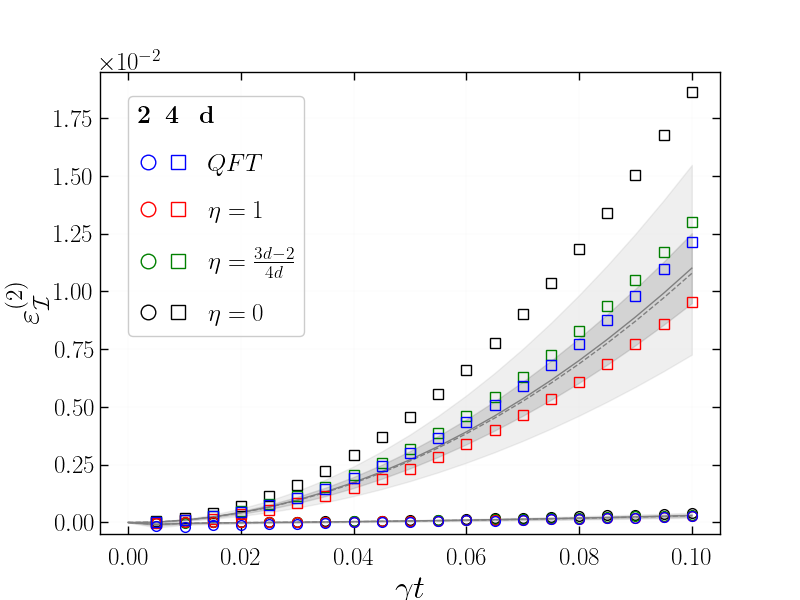

In [251]:
# ----------------------------------------------------------------------------------------------------------------------------------
# USER OPTIONS
# ----------------------------------------------------------------------------------------------------------------------------------
# Whether to load the data from the file or use the data from the current run
load_figure_data : bool = True
load_figure_data_haar : bool = True
# Whether to save the figure to a file
save_figure : bool = True
# ----------------------------------------------------------------------------------------------------------------------------------
# LOAD DATA
# ----------------------------------------------------------------------------------------------------------------------------------
# Set the figure number
figure_number = 10
# Check if the data should be loaded from the file
if load_figure_data:        
    # Find data files in the directory for the specified figure number
    files_found = [name for name in os.listdir('../dat') if name.startswith(f'Figure_{figure_number:02}')]
    print(f'Files found: {files_found}')
    n_files = len(files_found)
    n_tasks = n_files # Alias for readability
    # Check if there are any data files for the specified figure number
    if n_files > 0:
        n_tasks = n_files
    else:
        raise ValueError("No data files found for the specified figure number.")    
    task_number = 1
    # Preload dims, gammas and n_gates from the first data file to initialize them before the loop
    data = load_data(figure_number, task_number)
    # Data loaded from file
    print(f'Data loaded from file: {data.keys()}')
    dims = data['dims']
    times = data['times']
    n_gates = data['n_gates']
    AGIs_d = data['AGIs_d']
    AGIs_d_relative_error = data['AGIs_d_relative_error']
    gammas = data['gammas']
    print(gammas)
    n_gammas = len(gammas)
    print(n_gammas)

# ----------------------------------------------------------------------------------------------------------------------------------
# LOAD DATA
# ----------------------------------------------------------------------------------------------------------------------------------
# Check if the data should be loaded from the file
if load_figure_data_haar:        
    # Find data files in the directory for the specified figure number
    files_found = [name for name in os.listdir('../dat') if name.startswith(f'Figure_{figure_number:02}')]
    print(f'Files found: {files_found}')
    n_files = len(files_found)
    n_tasks = n_files # Alias for readability
    # Check if there are any data files for the specified figure number
    if n_files > 0:
        n_tasks = n_files
    else:
        raise ValueError("No data files found for the specified figure number.")    
    # Preload dims, gammas and n_gates from the first data file to initialize them before the loop
    tasks = np.arange(4, 14, 1)

    n_gates_haar = 0

    AGIs_2_haar = []
    AGIs_2_relative_error_haar = []

    AGIs_4_haar = []
    AGIs_4_relative_error_haar = []

    for task_idx, task in enumerate(tasks):
        data = load_data(figure_number, task)
        # Data loaded from file
        print(f'Data loaded from file: {data.keys()}')
        dims = data['dims']
        times = data['times']
        gammas = data['gammas']
        n_gammas = len(gammas)
        n_gates_haar += data['n_gates']

        AGIs_2_haar_task = data['AGIs_d'][0]
        AGIs_2_relative_error_haar_task = data['AGIs_d_relative_error'][0]
        AGIs_2_haar.append(AGIs_2_haar_task)
        AGIs_2_relative_error_haar.append(AGIs_2_relative_error_haar_task)

        AGIs_4_haar_task = data['AGIs_d'][1]
        AGIs_4_relative_error_haar_task = data['AGIs_d_relative_error'][1]
        AGIs_4_haar.append(AGIs_4_haar_task)
        AGIs_4_relative_error_haar.append(AGIs_4_relative_error_haar_task)

    AGIs_2_haar = np.concatenate(AGIs_2_haar, axis = 0)
    AGIs_2_relative_error_haar = np.concatenate(AGIs_2_relative_error_haar, axis = 0)

    AGIs_4_haar = np.concatenate(AGIs_4_haar, axis = 0)
    AGIs_4_relative_error_haar = np.concatenate(AGIs_4_relative_error_haar, axis = 0)

    AGIs_d_haar = [np.array(AGIs_2_haar), np.array(AGIs_4_haar)]
    AGIs_d_relative_error_haar = [np.array(AGIs_2_relative_error_haar), np.array(AGIs_4_relative_error_haar)]

     

# ----------------------------------------------------------------------------------------------------------------------------------
# PLOT FIGURES
# ----------------------------------------------------------------------------------------------------------------------------------

colorlist = ['k', 'g', 'r', 'b', 'm', 'y', ]

markerlist = ['o', 's', '^', 'D']

hatch_list = ['//', 'xx']
fill_list = ['k', 'k']

plt.clf()
plt.close()
plt.figure()

plt.xlabel(r'$\gamma t$')
plt.ylabel(r'$\varepsilon^{(2)}_{\mathcal{I}}$')

plt.xscale('linear')
plt.yscale('linear')
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0), useMathText=True)
plt.ylim(-0.0005, 0.0195)

label_list = [r'$\eta = 0$', r'$\eta = \frac{3 d - 2}{4 d}$', r'$\eta = 1$', r'$QFT$']
for d_idx, d in enumerate(dims):
    AGIs_d_relative_error_haar[d_idx][:, 0] = np.zeros(len(AGIs_d_relative_error_haar[d_idx][:, 0]))
    AGIs_1_relative_error_haar = np.array(AGIs_d_relative_error_haar[d_idx])
    AGIs_1_relative_error_haar_min = [np.min(AGIs_1_relative_error_haar[:, i]) for i in range(n_gammas)]
    AGIs_1_relative_error_haar_max = [np.max(AGIs_1_relative_error_haar[:, i]) for i in range(n_gammas)]
    AGIs_1_relative_error_haar_avg = np.array([np.mean(AGIs_1_relative_error_haar[:, i]) for i in range(n_gammas)])
    AGIs_1_relative_error_haar_std = np.array([np.std(AGIs_1_relative_error_haar[:, i]) for i in range(n_gammas)])
    AGIs_1_relative_error_haar_med = np.array([np.median(AGIs_1_relative_error_haar[:, i]) for i in range(n_gammas)])
    plt.fill_between(gammas, AGIs_1_relative_error_haar_min, AGIs_1_relative_error_haar_max, color='gray', alpha=0.125, label=r'$\Delta_{haar}$' if d_idx == 0 else None)
    plt.fill_between(gammas, AGIs_1_relative_error_haar_avg - AGIs_1_relative_error_haar_std, AGIs_1_relative_error_haar_avg + AGIs_1_relative_error_haar_std, color='gray', alpha=0.25, label=r'$\sigma_{haar}$' if d_idx == 0 else None)
    plt.plot(gammas, AGIs_1_relative_error_haar_avg, color = 'gray', linestyle = '-', linewidth = 1, label = r'$\mu_{haar}$' if d_idx == 0 else None)
    plt.plot(gammas, AGIs_1_relative_error_haar_med, color = 'gray', linestyle = '--', linewidth = 1, label = r'$m_{haar}$' if d_idx == 0 else None)

scatter_pairs = []
# Loop over the gates
for n in range(4):

    plot_d_2,  = plt.plot(gammas, AGIs_d_relative_error[0][n], 'o', markersize = 7, color = colorlist[n%6], mfc = 'none')
    plot_d_4,  = plt.plot(gammas, AGIs_d_relative_error[1][n], 's', markersize = 7, color = colorlist[n%6], mfc = 'none')

    scatter_pairs.append((plot_d_2, plot_d_4))

for d_idx, d in enumerate(dims):
    AGIs = AGIs_d[d_idx]

plt.legend(scatter_pairs, label_list, reverse = True, handler_map = {tuple: HandlerTuple(ndivide=None)}, title = r'$\bf{2\;\; 4 \;\;\; d}$', alignment = 'left', loc = 'upper left', bbox_to_anchor = (0.025, 0.975), framealpha = 0.99, ncols = 1, columnspacing = 0, labelspacing = 1)#, fontsize = plot_legend_font_size, title_fontsize = plot_legend_title_font_size)

if save_figure:
    plt.savefig(f'../fig/Figure_{figure_number:02}.pdf', format='pdf', bbox_inches='tight')

plt.show()

# <span style="font-size: 60px; font-family: Arial, sans-serif">FIGURE 11</span>

## <span style="font-size: 36px; font-family: Arial, sans-serif">SUBFIGURES A & B</span>

### <span style="font-size: 24px; font-family: Arial, sans-serif">Generate Data</span>

In [157]:
# ----------------------------------------------------------------------------------------------------------------------------------
# USER OPTIONS
# ----------------------------------------------------------------------------------------------------------------------------------
generate_figure_data = True
save_figure_data = True
# ----------------------------------------------------------------------------------------------------------------------------------
# LOAD DATA
# ----------------------------------------------------------------------------------------------------------------------------------
figure_number = 11
result_number = 1

method = 'haar'

dim = 100

n_eigenvalues = 1000000

n_bins = int(np.ceil(np.log2(n_eigenvalues + 1))) # Sturges formula

n_bins = 100

bin_range = (-np.pi, np.pi)

s = np.linspace(0, 3, 1000)

if generate_figure_data:
    concatenated_eigenvalues, concatenated_normalised_spacings = get_eigenvalue_phase_and_spacing_distributions(n_eigenvalues = n_eigenvalues, dim = dim, method = method)

if save_figure_data:
    save_data(figure_number, result_number, method = method, dim = dim, n_eigenvalues = n_eigenvalues, n_bins = n_bins, bin_range = bin_range, s = s, concatenated_eigenvalues = concatenated_eigenvalues, concatenated_normalised_spacings = concatenated_normalised_spacings)

Total number of eigenvalues: 1000000
Dimension: 100
Number of gates: 10000
Number of jobs: 10
Batch size: 1000
Start time: 0.0
Beginning to generate 10000 random 100x100 unitary matrices using the haar method...


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   6 tasks      | elapsed:   19.2s
[Parallel(n_jobs=10)]: Done  16 tasks      | elapsed:   19.3s
[Parallel(n_jobs=10)]: Done 515 tasks      | elapsed:   30.2s
[Parallel(n_jobs=10)]: Done 1208 tasks      | elapsed:   40.1s
[Parallel(n_jobs=10)]: Done 2099 tasks      | elapsed:   49.3s
[Parallel(n_jobs=10)]: Done 2990 tasks      | elapsed:   52.6s
[Parallel(n_jobs=10)]: Done 4079 tasks      | elapsed:  1.1min
[Parallel(n_jobs=10)]: Done 5168 tasks      | elapsed:  1.3min
[Parallel(n_jobs=10)]: Done 6455 tasks      | elapsed:  1.5min
[Parallel(n_jobs=10)]: Done 7742 tasks      | elapsed:  1.7min
[Parallel(n_jobs=10)]: Done 10000 out of 10000 | elapsed:  2.0min finished


Gate generation time: 122.3157103061676
Beginning eigenvalue analysis...


KeyboardInterrupt: 

### <span style="font-size: 24px; font-family: Arial, sans-serif">Plot Figure a</span>

/home/jgkh/.local/lib/python3.9/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)


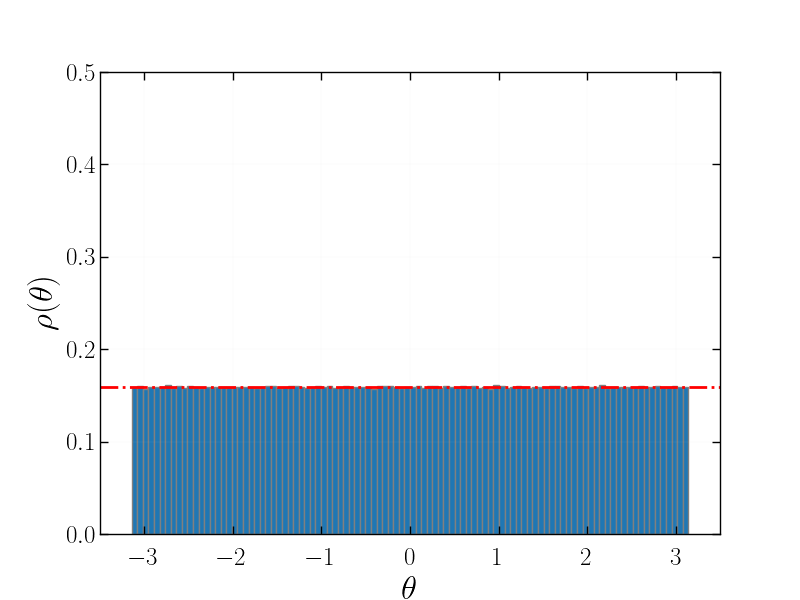

In [252]:
# ----------------------------------------------------------------------------------------------------------------------------------
# USER OPTIONS
# ----------------------------------------------------------------------------------------------------------------------------------
load_figure_data = True
save_figure = True
# ----------------------------------------------------------------------------------------------------------------------------------
# LOAD DATA
# ----------------------------------------------------------------------------------------------------------------------------------
figure_number = 11
result_number = 1
if load_figure_data:
    data = load_data(figure_number, result_number)
    concatenated_eigenvalues = data['concatenated_eigenvalues']
    concatenated_normalised_spacings = data['concatenated_normalised_spacings']
    n_bins = data['n_bins']
    bin_range = data['bin_range']
    s = data['s']
# ----------------------------------------------------------------------------------------------------------------------------------
# PLOT FIGURES
# ----------------------------------------------------------------------------------------------------------------------------------

plt.clf()
plt.close()
plt.figure()
# Create histogram
plt.hist(concatenated_eigenvalues, bins=n_bins, range=bin_range, density=True, edgecolor = 'gray')
plt.axhline(y = 1 / (2 * np.pi), color = 'r', linestyle = '-.', linewidth = 2)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\rho(\theta)$')
plt.ylim(0, 0.5)
plt.xlim(-3.5, 3.5)

if save_figure:
    plt.savefig(f'../fig/Figure_{figure_number:02}a.pdf', format='pdf', bbox_inches='tight')
    
plt.show()

### <span style="font-size: 24px; font-family: Arial, sans-serif">Plot Figure b</span>

/home/jgkh/.local/lib/python3.9/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)


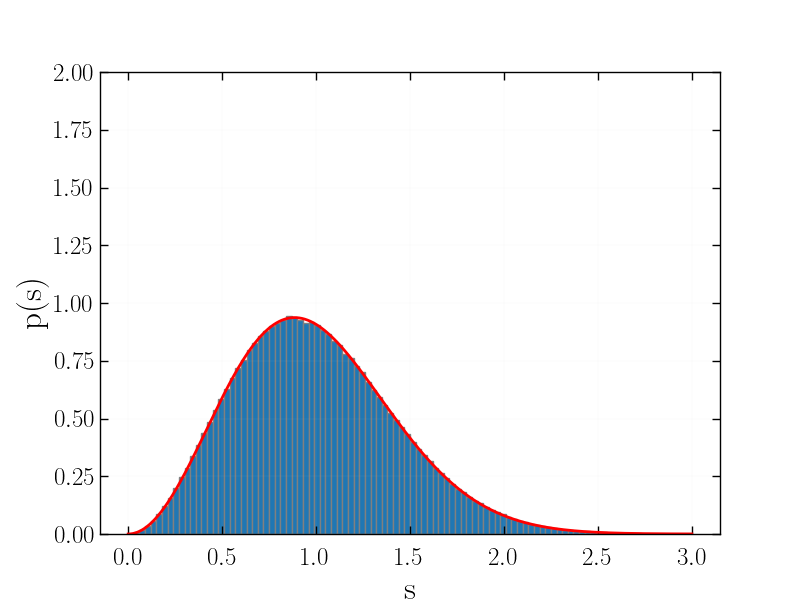

In [253]:
# ----------------------------------------------------------------------------------------------------------------------------------
# USER OPTIONS
# ----------------------------------------------------------------------------------------------------------------------------------
load_figure_data = True
save_figure = True
# ----------------------------------------------------------------------------------------------------------------------------------
# LOAD DATA
# ----------------------------------------------------------------------------------------------------------------------------------
figure_number = 11
result_number = 1
if load_figure_data:
    data = load_data(figure_number, result_number)
    concatenated_eigenvalues = data['concatenated_eigenvalues']
    concatenated_normalised_spacings = data['concatenated_normalised_spacings']
    n_bins = data['n_bins']
    bin_range = data['bin_range']
    s = data['s']
# ----------------------------------------------------------------------------------------------------------------------------------
# PLOT FIGURES
# ----------------------------------------------------------------------------------------------------------------------------------

plt.clf()
plt.close()
plt.figure()
# Plot Spacing distribution
plt.hist(concatenated_normalised_spacings, bins=100, range=(0, 3), density=True, edgecolor = 'gray')
plt.plot(s, GUE_distribution(s), color = 'r', linestyle = '-', linewidth = 2)
plt.ylim(0, 2)
plt.xlabel(r's')
plt.ylabel(r'p(s)')

if save_figure:
    plt.savefig(f'../fig/Figure_{figure_number:02}b.pdf', format='pdf', bbox_inches='tight')
plt.show()

## <span style="font-size: 36px; font-family: Arial, sans-serif">SUBFIGURES C & D</span>

### <span style="font-size: 24px; font-family: Arial, sans-serif">Generate Data</span>

In [ ]:
# ----------------------------------------------------------------------------------------------------------------------------------
# USER OPTIONS
# ----------------------------------------------------------------------------------------------------------------------------------
generate_figure_data = True
save_figure_data = True
# ----------------------------------------------------------------------------------------------------------------------------------
# LOAD DATA
# ----------------------------------------------------------------------------------------------------------------------------------
figure_number = 11
result_number = 2

method = 'haar'

dim = 2

n_eigenvalues = 1000000

n_bins = int(np.ceil(np.log2(n_eigenvalues + 1))) # Sturges formula

n_bins = 100

bin_range = (-np.pi, np.pi)

s = np.linspace(0, 3, 1000)

if generate_figure_data:
    concatenated_eigenvalues, concatenated_normalised_spacings = get_eigenvalue_phase_and_spacing_distributions(n_eigenvalues = n_eigenvalues, dim = dim, method = method)

if save_figure_data:
    save_data(figure_number, result_number, method = method, dim = dim, n_eigenvalues = n_eigenvalues, n_bins = n_bins, bin_range = bin_range, s = s, concatenated_eigenvalues = concatenated_eigenvalues, concatenated_normalised_spacings = concatenated_normalised_spacings)

Total number of eigenvalues: 1000000
Dimension: 2
Number of gates: 500000
Number of jobs: 10
Batch size: 50000
Start time: 0.0
Beginning to generate 500000 random 2x2 unitary matrices using the haar method...


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   6 tasks      | elapsed:   27.9s
[Parallel(n_jobs=10)]: Done  16 tasks      | elapsed:   27.9s
[Parallel(n_jobs=10)]: Done 25015 tasks      | elapsed:  1.1min
[Parallel(n_jobs=10)]: Done 60008 tasks      | elapsed:  1.5min
[Parallel(n_jobs=10)]: Done 104999 tasks      | elapsed:  2.1min
[Parallel(n_jobs=10)]: Done 149990 tasks      | elapsed:  2.5min
[Parallel(n_jobs=10)]: Done 204979 tasks      | elapsed:  3.5min
[Parallel(n_jobs=10)]: Done 259968 tasks      | elapsed:  4.3min
[Parallel(n_jobs=10)]: Done 324955 tasks      | elapsed:  5.2min
[Parallel(n_jobs=10)]: Done 389942 tasks      | elapsed:  6.0min
[Parallel(n_jobs=10)]: Done 500000 out of 500000 | elapsed:  7.3min finished


Gate generation time: 439.93191742897034
Beginning eigenvalue analysis...
Eigenvalue analysis time: 71.49008107185364
Total time: 512.9278426170349


### <span style="font-size: 24px; font-family: Arial, sans-serif">Plot Figure c</span>

/home/jgkh/.local/lib/python3.9/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)


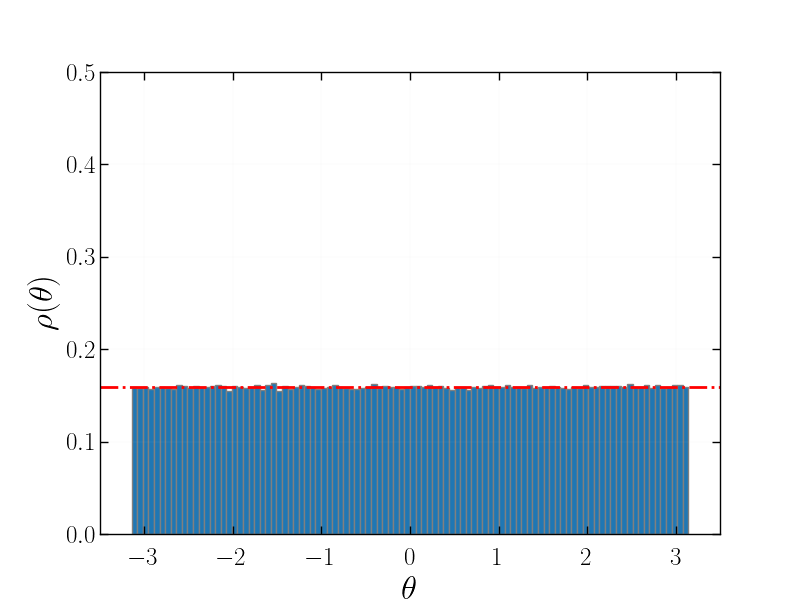

In [254]:
# ----------------------------------------------------------------------------------------------------------------------------------
# USER OPTIONS
# ----------------------------------------------------------------------------------------------------------------------------------
load_figure_data = True
save_figure = True
# ----------------------------------------------------------------------------------------------------------------------------------
# LOAD DATA
# ----------------------------------------------------------------------------------------------------------------------------------
figure_number = 11
result_number = 2
if load_figure_data:
    data = load_data(figure_number, result_number)
    concatenated_eigenvalues = data['concatenated_eigenvalues']
    concatenated_normalised_spacings = data['concatenated_normalised_spacings']
    n_bins = data['n_bins']
    bin_range = data['bin_range']
    s = data['s']
# ----------------------------------------------------------------------------------------------------------------------------------
# PLOT FIGURES
# ----------------------------------------------------------------------------------------------------------------------------------

plt.clf()
plt.close()
plt.figure()
# Create histogram
plt.hist(concatenated_eigenvalues, bins=n_bins, range=bin_range, density=True, edgecolor = 'gray')
plt.axhline(y = 1 / (2 * np.pi), color = 'r', linestyle = '-.', linewidth = 2)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\rho(\theta)$')
plt.ylim(0, 0.5)
plt.xlim(-3.5, 3.5)

if save_figure:
    plt.savefig(f'../fig/Figure_{figure_number:02}c.pdf', format='pdf', bbox_inches='tight')
    
plt.show()

### <span style="font-size: 24px; font-family: Arial, sans-serif">Plot Figure d</span>

/home/jgkh/.local/lib/python3.9/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)


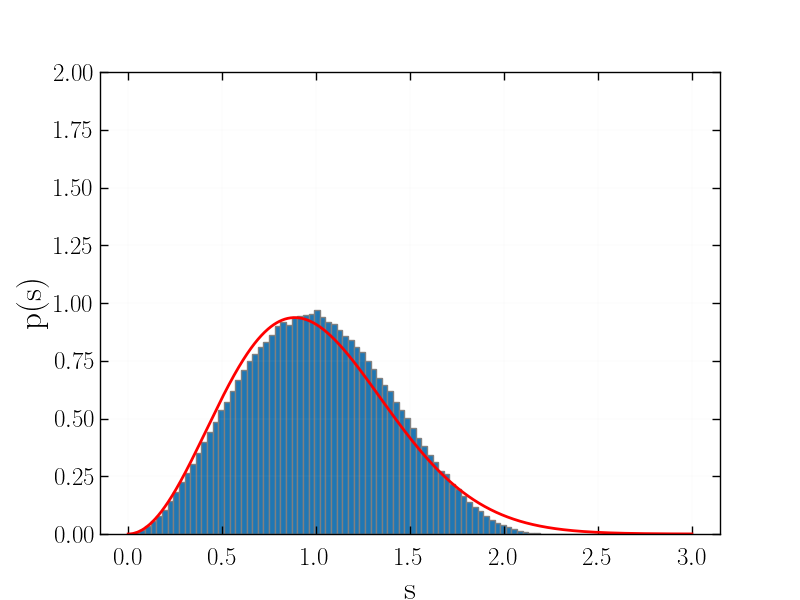

In [255]:
# ----------------------------------------------------------------------------------------------------------------------------------
# USER OPTIONS
# ----------------------------------------------------------------------------------------------------------------------------------
load_figure_data = True
save_figure = True
# ----------------------------------------------------------------------------------------------------------------------------------
# LOAD DATA
# ----------------------------------------------------------------------------------------------------------------------------------
figure_number = 11
result_number = 2
if load_figure_data:
    data = load_data(figure_number, result_number)
    concatenated_eigenvalues = data['concatenated_eigenvalues']
    concatenated_normalised_spacings = data['concatenated_normalised_spacings']
    n_bins = data['n_bins']
    bin_range = data['bin_range']
    s = data['s']
# ----------------------------------------------------------------------------------------------------------------------------------
# PLOT FIGURES
# ----------------------------------------------------------------------------------------------------------------------------------

plt.clf()
plt.close()
plt.figure()
# Plot Spacing distribution
plt.hist(concatenated_normalised_spacings, bins=100, range=(0, 3), density=True, edgecolor = 'gray')
plt.plot(s, GUE_distribution(s), color = 'r', linestyle = '-', linewidth = 2)
plt.ylim(0, 2)
plt.xlabel(r's')
plt.ylabel(r'p(s)')

if save_figure:
    plt.savefig(f'../fig/Figure_{figure_number:02}d.pdf', format='pdf', bbox_inches='tight')
plt.show()

# <span style="font-size: 60px; font-family: Arial, sans-serif">FIGURE 12</span>

## <span style="font-size: 36px; font-family: Arial, sans-serif">SUBFIGURES A & B</span>

### <span style="font-size: 24px; font-family: Arial, sans-serif">Generate Data</span>

In [3]:
# ----------------------------------------------------------------------------------------------------------------------------------
# USER OPTIONS
# ----------------------------------------------------------------------------------------------------------------------------------
generate_figure_data = True
save_figure_data = True
# ----------------------------------------------------------------------------------------------------------------------------------
# LOAD DATA
# ----------------------------------------------------------------------------------------------------------------------------------
figure_number = 12
result_number = 1

method = 'random'

dim = 100

n_eigenvalues = 1000000

n_bins = int(np.ceil(np.log2(n_eigenvalues + 1))) # Sturges formula

n_bins = 100

bin_range = (-np.pi, np.pi)

s = np.linspace(0, 3, 1000)

if generate_figure_data:
    concatenated_eigenvalues, concatenated_normalised_spacings = get_eigenvalue_phase_and_spacing_distributions(n_eigenvalues = n_eigenvalues, dim = dim, method = method)

if save_figure_data:
    save_data(figure_number, result_number, method = method, dim = dim, n_eigenvalues = n_eigenvalues, n_bins = n_bins, bin_range = bin_range, s = s, concatenated_eigenvalues = concatenated_eigenvalues, concatenated_normalised_spacings = concatenated_normalised_spacings)

Total number of eigenvalues: 1000000
Dimension: 100
Number of gates: 10000
Number of jobs: 10
Batch size: 1000
Start time: 0.0
Beginning to generate 10000 random 100x100 unitary matrices using the random method...


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.


[Parallel(n_jobs=10)]: Done   6 tasks      | elapsed:   15.8s
[Parallel(n_jobs=10)]: Done  16 tasks      | elapsed:   15.9s
[Parallel(n_jobs=10)]: Done 515 tasks      | elapsed:   29.5s
[Parallel(n_jobs=10)]: Done 1208 tasks      | elapsed:   43.1s
[Parallel(n_jobs=10)]: Done 2099 tasks      | elapsed:   57.6s
[Parallel(n_jobs=10)]: Done 2990 tasks      | elapsed:  1.1min
[Parallel(n_jobs=10)]: Done 4079 tasks      | elapsed:  1.6min
[Parallel(n_jobs=10)]: Done 5168 tasks      | elapsed:  1.8min
[Parallel(n_jobs=10)]: Done 6455 tasks      | elapsed:  2.1min
[Parallel(n_jobs=10)]: Done 7742 tasks      | elapsed:  2.5min
[Parallel(n_jobs=10)]: Done 10000 out of 10000 | elapsed:  3.1min finished


Gate generation time: 184.3343689441681
Beginning eigenvalue analysis...
Eigenvalue analysis time: 50.05514574050903
Total time: 234.6618402004242


### <span style="font-size: 24px; font-family: Arial, sans-serif">Plot Figure a</span>

/home/jgkh/.local/lib/python3.9/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)


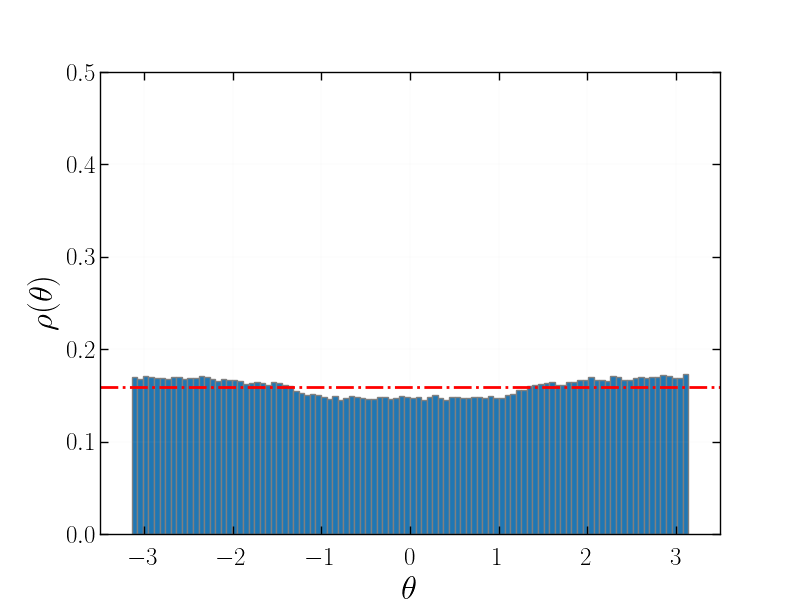

In [256]:
# ----------------------------------------------------------------------------------------------------------------------------------
# USER OPTIONS
# ----------------------------------------------------------------------------------------------------------------------------------
load_figure_data = True
save_figure = True
# ----------------------------------------------------------------------------------------------------------------------------------
# LOAD DATA
# ----------------------------------------------------------------------------------------------------------------------------------
figure_number = 12
result_number = 1
if load_figure_data:
    data = load_data(figure_number, result_number)
    concatenated_eigenvalues = data['concatenated_eigenvalues']
    concatenated_normalised_spacings = data['concatenated_normalised_spacings']
    n_bins = data['n_bins']
    bin_range = data['bin_range']
    s = data['s']
# ----------------------------------------------------------------------------------------------------------------------------------
# PLOT FIGURES
# ----------------------------------------------------------------------------------------------------------------------------------

plt.clf()
plt.close()
plt.figure()
# Create histogram
plt.hist(concatenated_eigenvalues, bins=n_bins, range=bin_range, density=True, edgecolor = 'gray')
plt.axhline(y = 1 / (2 * np.pi), color = 'r', linestyle = '-.', linewidth = 2)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\rho(\theta)$')
plt.ylim(0, 0.5)
plt.xlim(-3.5, 3.5)

if save_figure:
    plt.savefig(f'../fig/Figure_{figure_number:02}a.pdf', format='pdf', bbox_inches='tight')
    
plt.show()

### <span style="font-size: 24px; font-family: Arial, sans-serif">Plot Figure b</span>

/home/jgkh/.local/lib/python3.9/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)


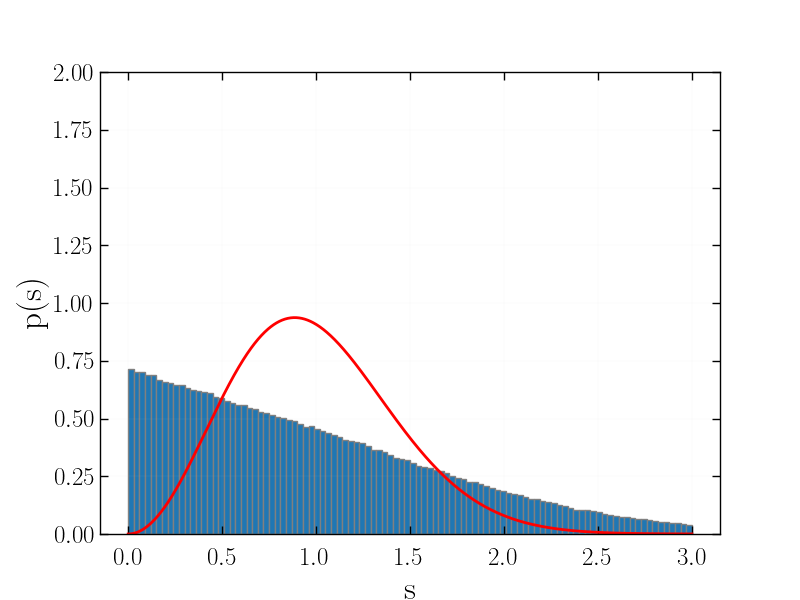

In [257]:
# ----------------------------------------------------------------------------------------------------------------------------------
# USER OPTIONS
# ----------------------------------------------------------------------------------------------------------------------------------
load_figure_data = True
save_figure = True
# ----------------------------------------------------------------------------------------------------------------------------------
# LOAD DATA
# ----------------------------------------------------------------------------------------------------------------------------------
figure_number = 12
result_number = 1
if load_figure_data:
    data = load_data(figure_number, result_number)
    concatenated_eigenvalues = data['concatenated_eigenvalues']
    concatenated_normalised_spacings = data['concatenated_normalised_spacings']
    n_bins = data['n_bins']
    bin_range = data['bin_range']
    s = data['s']
# ----------------------------------------------------------------------------------------------------------------------------------
# PLOT FIGURES
# ----------------------------------------------------------------------------------------------------------------------------------

plt.clf()
plt.close()
plt.figure()
# Plot Spacing distribution
plt.hist(concatenated_normalised_spacings, bins=100, range=(0, 3), density=True, edgecolor = 'gray')
plt.plot(s, GUE_distribution(s), color = 'r', linestyle = '-', linewidth = 2)
plt.ylim(0, 2)
plt.xlabel(r's')
plt.ylabel(r'p(s)')

if save_figure:
    plt.savefig(f'../fig/Figure_{figure_number:02}b.pdf', format='pdf', bbox_inches='tight')
plt.show()

## <span style="font-size: 36px; font-family: Arial, sans-serif">SUBFIGURES C & D</span>

### <span style="font-size: 24px; font-family: Arial, sans-serif">Generate Data</span>

In [12]:
# ----------------------------------------------------------------------------------------------------------------------------------
# USER OPTIONS
# ----------------------------------------------------------------------------------------------------------------------------------
generate_figure_data = True
save_figure_data = True
# ----------------------------------------------------------------------------------------------------------------------------------
# LOAD DATA
# ----------------------------------------------------------------------------------------------------------------------------------
figure_number = 12
result_number = 2

method = 'random'

dim = 2

n_eigenvalues = 1000000

n_bins = int(np.ceil(np.log2(n_eigenvalues + 1))) # Sturges formula

n_bins = 100

bin_range = (-np.pi, np.pi)

s = np.linspace(0, 3, 1000)

if generate_figure_data:
    concatenated_eigenvalues, concatenated_normalised_spacings = get_eigenvalue_phase_and_spacing_distributions(n_eigenvalues = n_eigenvalues, dim = dim, method = method)

if save_figure_data:
    save_data(figure_number, result_number, method = method, dim = dim, n_eigenvalues = n_eigenvalues, n_bins = n_bins, bin_range = bin_range, s = s, concatenated_eigenvalues = concatenated_eigenvalues, concatenated_normalised_spacings = concatenated_normalised_spacings)

Total number of eigenvalues: 1000000
Dimension: 2
Number of gates: 500000
Number of jobs: 10
Batch size: 50000
Start time: 0.0
Beginning to generate 500000 random 2x2 unitary matrices using the random method...


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.


[Parallel(n_jobs=10)]: Done   6 tasks      | elapsed:   23.5s
[Parallel(n_jobs=10)]: Done  16 tasks      | elapsed:   23.5s
[Parallel(n_jobs=10)]: Done 25015 tasks      | elapsed:  1.5min
[Parallel(n_jobs=10)]: Done 60008 tasks      | elapsed:  2.4min
[Parallel(n_jobs=10)]: Done 104999 tasks      | elapsed:  3.3min
[Parallel(n_jobs=10)]: Done 149990 tasks      | elapsed:  3.6min
[Parallel(n_jobs=10)]: Done 204979 tasks      | elapsed:  5.0min
[Parallel(n_jobs=10)]: Done 259968 tasks      | elapsed:  5.9min
[Parallel(n_jobs=10)]: Done 324955 tasks      | elapsed:  7.2min
[Parallel(n_jobs=10)]: Done 389942 tasks      | elapsed:  8.3min
[Parallel(n_jobs=10)]: Done 500000 out of 500000 | elapsed: 11.0min finished


Gate generation time: 662.8756499290466
Beginning eigenvalue analysis...
Eigenvalue analysis time: 79.13955211639404
Total time: 743.4236299991608


### <span style="font-size: 24px; font-family: Arial, sans-serif">Plot Figure c</span>

/home/jgkh/.local/lib/python3.9/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)


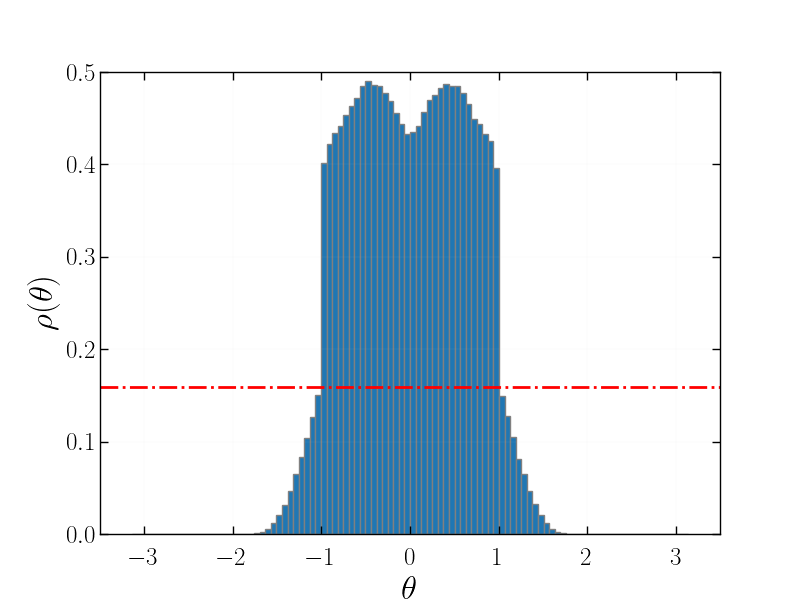

In [258]:
# ----------------------------------------------------------------------------------------------------------------------------------
# USER OPTIONS
# ----------------------------------------------------------------------------------------------------------------------------------
load_figure_data = True
save_figure = True
# ----------------------------------------------------------------------------------------------------------------------------------
# LOAD DATA
# ----------------------------------------------------------------------------------------------------------------------------------
figure_number = 12
result_number = 2
if load_figure_data:
    data = load_data(figure_number, result_number)
    concatenated_eigenvalues = data['concatenated_eigenvalues']
    concatenated_normalised_spacings = data['concatenated_normalised_spacings']
    n_bins = data['n_bins']
    bin_range = data['bin_range']
    s = data['s']
# ----------------------------------------------------------------------------------------------------------------------------------
# PLOT FIGURES
# ----------------------------------------------------------------------------------------------------------------------------------

plt.clf()
plt.close()
plt.figure()
# Create histogram
plt.hist(concatenated_eigenvalues, bins=n_bins, range=bin_range, density=True, edgecolor = 'gray')
plt.axhline(y = 1 / (2 * np.pi), color = 'r', linestyle = '-.', linewidth = 2)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\rho(\theta)$')
plt.ylim(0, 0.5)
plt.xlim(-3.5, 3.5)

if save_figure:
    plt.savefig(f'../fig/Figure_{figure_number:02}c.pdf', format='pdf', bbox_inches='tight')
    
plt.show()

### <span style="font-size: 24px; font-family: Arial, sans-serif">Plot Figure d</span>

/home/jgkh/.local/lib/python3.9/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)


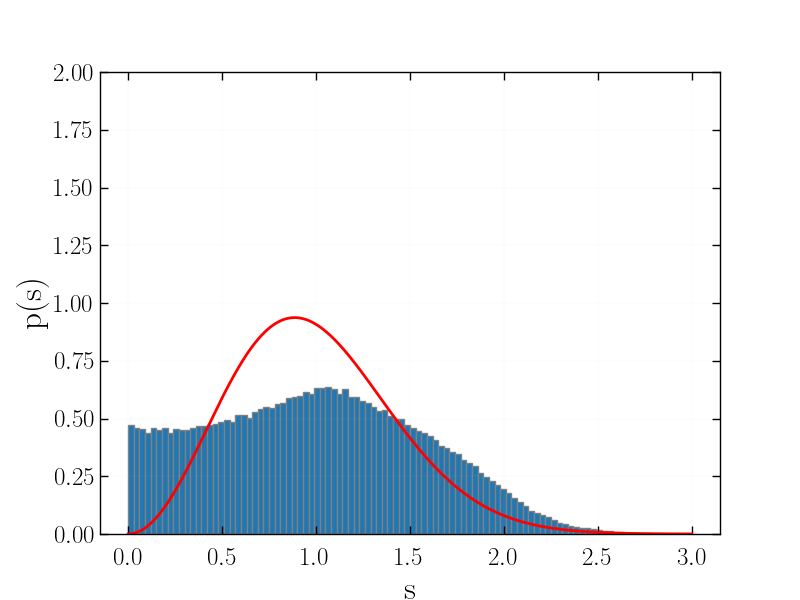

In [259]:
# ----------------------------------------------------------------------------------------------------------------------------------
# USER OPTIONS
# ----------------------------------------------------------------------------------------------------------------------------------
load_figure_data = True
save_figure = True
# ----------------------------------------------------------------------------------------------------------------------------------
# LOAD DATA
# ----------------------------------------------------------------------------------------------------------------------------------
figure_number = 12
result_number = 2
if load_figure_data:
    data = load_data(figure_number, result_number)
    concatenated_eigenvalues = data['concatenated_eigenvalues']
    concatenated_normalised_spacings = data['concatenated_normalised_spacings']
    n_bins = data['n_bins']
    bin_range = data['bin_range']
    s = data['s']
# ----------------------------------------------------------------------------------------------------------------------------------
# PLOT FIGURES
# ----------------------------------------------------------------------------------------------------------------------------------

plt.clf()
plt.close()
plt.figure()
# Plot Spacing distribution
plt.hist(concatenated_normalised_spacings, bins=100, range=(0, 3), density=True, edgecolor = 'gray')
plt.plot(s, GUE_distribution(s), color = 'r', linestyle = '-', linewidth = 2)
plt.ylim(0, 2)
plt.xlabel(r's')
plt.ylabel(r'p(s)')

if save_figure:
    plt.savefig(f'../fig/Figure_{figure_number:02}d.pdf', format='pdf', bbox_inches='tight')
plt.show()

# <span style="font-size: 60px; font-family: Arial, sans-serif">FIGURE 13</span>

## <span style="font-size: 36px; font-family: Arial, sans-serif">SUBFIGURES A & B</span>

### <span style="font-size: 24px; font-family: Arial, sans-serif">Generate Data</span>

In [16]:
# ----------------------------------------------------------------------------------------------------------------------------------
# USER OPTIONS
# ----------------------------------------------------------------------------------------------------------------------------------
generate_figure_data = True
save_figure_data = True
# ----------------------------------------------------------------------------------------------------------------------------------
# LOAD DATA
# ----------------------------------------------------------------------------------------------------------------------------------
figure_number = 13
result_number = 1

method = 'circular'

dim = 100

n_eigenvalues = 1000000

n_bins = int(np.ceil(np.log2(n_eigenvalues + 1))) # Sturges formula

n_bins = 100

bin_range = (-np.pi, np.pi)

s = np.linspace(0, 3, 1000)

if generate_figure_data:
    concatenated_eigenvalues, concatenated_normalised_spacings = get_eigenvalue_phase_and_spacing_distributions(n_eigenvalues = n_eigenvalues, dim = dim, method = method)

if save_figure_data:
    save_data(figure_number, result_number, method = method, dim = dim, n_eigenvalues = n_eigenvalues, n_bins = n_bins, bin_range = bin_range, s = s, concatenated_eigenvalues = concatenated_eigenvalues, concatenated_normalised_spacings = concatenated_normalised_spacings)

Total number of eigenvalues: 1000000
Dimension: 100
Number of gates: 10000
Number of jobs: 10
Batch size: 1000
Start time: 0.0
Beginning to generate 10000 random 100x100 unitary matrices using the circular method...


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   6 tasks      | elapsed:    0.4s
[Parallel(n_jobs=10)]: Done  16 tasks      | elapsed:    0.4s
[Parallel(n_jobs=10)]: Done 515 tasks      | elapsed:   17.1s
[Parallel(n_jobs=10)]: Done 1208 tasks      | elapsed:   32.5s
[Parallel(n_jobs=10)]: Done 2099 tasks      | elapsed:   46.2s
[Parallel(n_jobs=10)]: Done 2990 tasks      | elapsed:   53.3s
[Parallel(n_jobs=10)]: Done 4079 tasks      | elapsed:  1.3min
[Parallel(n_jobs=10)]: Done 5168 tasks      | elapsed:  1.7min
[Parallel(n_jobs=10)]: Done 6455 tasks      | elapsed:  2.2min
[Parallel(n_jobs=10)]: Done 7742 tasks      | elapsed:  2.6min
[Parallel(n_jobs=10)]: Done 10000 out of 10000 | elapsed:  3.4min finished


Gate generation time: 206.69228959083557
Beginning eigenvalue analysis...
Eigenvalue analysis time: 67.12984442710876
Total time: 273.9484145641327


### <span style="font-size: 24px; font-family: Arial, sans-serif">Plot Figure a</span>

/home/jgkh/.local/lib/python3.9/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)


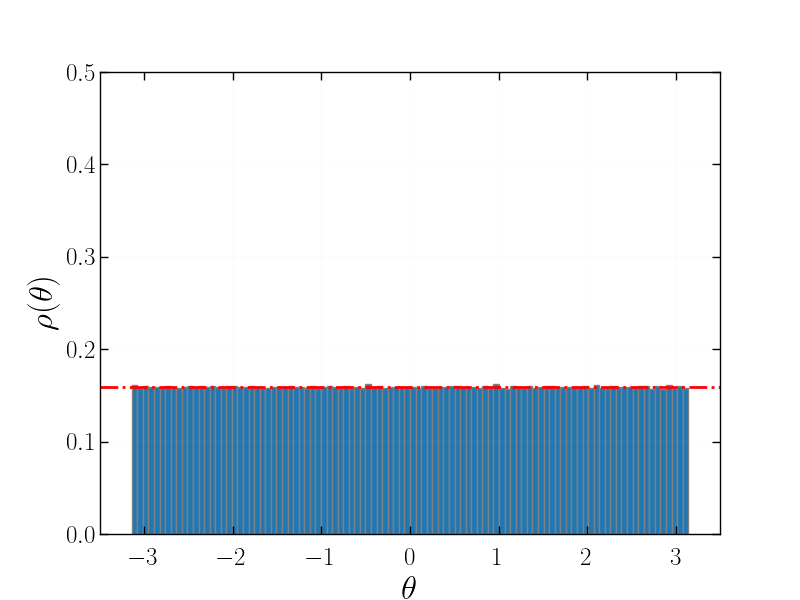

In [260]:
# ----------------------------------------------------------------------------------------------------------------------------------
# USER OPTIONS
# ----------------------------------------------------------------------------------------------------------------------------------
load_figure_data = True
save_figure = True
# ----------------------------------------------------------------------------------------------------------------------------------
# LOAD DATA
# ----------------------------------------------------------------------------------------------------------------------------------
figure_number = 13
result_number = 1
if load_figure_data:
    data = load_data(figure_number, result_number)
    concatenated_eigenvalues = data['concatenated_eigenvalues']
    concatenated_normalised_spacings = data['concatenated_normalised_spacings']
    n_bins = data['n_bins']
    bin_range = data['bin_range']
    s = data['s']
# ----------------------------------------------------------------------------------------------------------------------------------
# PLOT FIGURES
# ----------------------------------------------------------------------------------------------------------------------------------

plt.clf()
plt.close()
plt.figure()
# Create histogram
plt.hist(concatenated_eigenvalues, bins=n_bins, range=bin_range, density=True, edgecolor = 'gray')
plt.axhline(y = 1 / (2 * np.pi), color = 'r', linestyle = '-.', linewidth = 2)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\rho(\theta)$')
plt.ylim(0, 0.5)
plt.xlim(-3.5, 3.5)

if save_figure:
    plt.savefig(f'../fig/Figure_{figure_number:02}a.pdf', format='pdf', bbox_inches='tight')
    
plt.show()

### <span style="font-size: 24px; font-family: Arial, sans-serif">Plot Figure b</span>

/home/jgkh/.local/lib/python3.9/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)


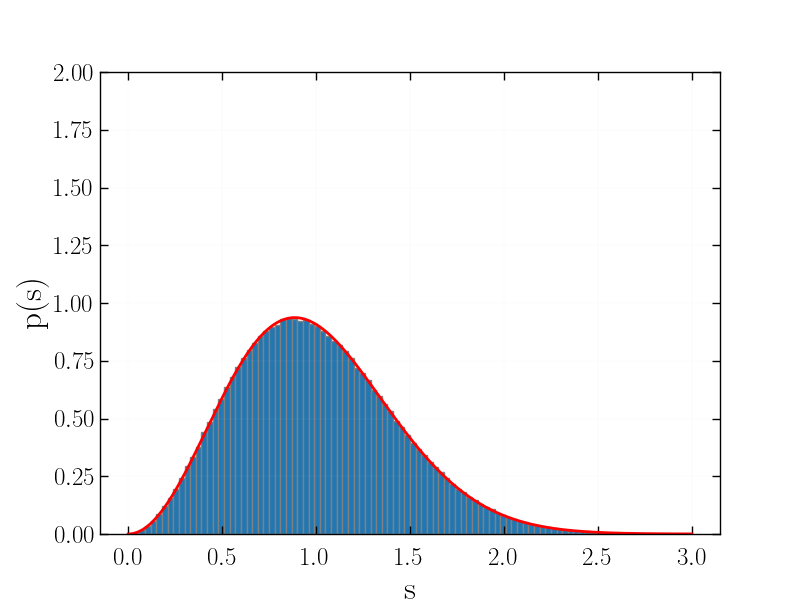

In [261]:
# ----------------------------------------------------------------------------------------------------------------------------------
# USER OPTIONS
# ----------------------------------------------------------------------------------------------------------------------------------
load_figure_data = True
save_figure = True
# ----------------------------------------------------------------------------------------------------------------------------------
# LOAD DATA
# ----------------------------------------------------------------------------------------------------------------------------------
figure_number = 13
result_number = 1
if load_figure_data:
    data = load_data(figure_number, result_number)
    concatenated_eigenvalues = data['concatenated_eigenvalues']
    concatenated_normalised_spacings = data['concatenated_normalised_spacings']
    n_bins = data['n_bins']
    bin_range = data['bin_range']
    s = data['s']
# ----------------------------------------------------------------------------------------------------------------------------------
# PLOT FIGURES
# ----------------------------------------------------------------------------------------------------------------------------------

plt.clf()
plt.close()
plt.figure()
# Plot Spacing distribution
plt.hist(concatenated_normalised_spacings, bins=100, range=(0, 3), density=True, edgecolor = 'gray')
plt.plot(s, GUE_distribution(s), color = 'r', linestyle = '-', linewidth = 2)
plt.ylim(0, 2)
plt.xlabel(r's')
plt.ylabel(r'p(s)')

if save_figure:
    plt.savefig(f'../fig/Figure_{figure_number:02}b.pdf', format='pdf', bbox_inches='tight')
plt.show()

## <span style="font-size: 36px; font-family: Arial, sans-serif">SUBFIGURES C & D</span>

### <span style="font-size: 24px; font-family: Arial, sans-serif">Generate Data</span>

In [20]:
# ----------------------------------------------------------------------------------------------------------------------------------
# USER OPTIONS
# ----------------------------------------------------------------------------------------------------------------------------------
generate_figure_data = True
save_figure_data = True
# ----------------------------------------------------------------------------------------------------------------------------------
# LOAD DATA
# ----------------------------------------------------------------------------------------------------------------------------------
figure_number = 13
result_number = 2

method = 'circular'

dim = 2

n_eigenvalues = 1000000

n_bins = int(np.ceil(np.log2(n_eigenvalues + 1))) # Sturges formula

n_bins = 100

bin_range = (-np.pi, np.pi)

s = np.linspace(0, 3, 1000)

if generate_figure_data:
    concatenated_eigenvalues, concatenated_normalised_spacings = get_eigenvalue_phase_and_spacing_distributions(n_eigenvalues = n_eigenvalues, dim = dim, method = method)

if save_figure_data:
    save_data(figure_number, result_number, method = method, dim = dim, n_eigenvalues = n_eigenvalues, n_bins = n_bins, bin_range = bin_range, s = s, concatenated_eigenvalues = concatenated_eigenvalues, concatenated_normalised_spacings = concatenated_normalised_spacings)

Total number of eigenvalues: 1000000
Dimension: 2
Number of gates: 500000
Number of jobs: 10
Batch size: 50000
Start time: 0.0
Beginning to generate 500000 random 2x2 unitary matrices using the circular method...


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   6 tasks      | elapsed:    1.9s
[Parallel(n_jobs=10)]: Done  16 tasks      | elapsed:    1.9s
[Parallel(n_jobs=10)]: Done 25015 tasks      | elapsed:  1.0min
[Parallel(n_jobs=10)]: Done 60008 tasks      | elapsed:  1.8min
[Parallel(n_jobs=10)]: Done 104999 tasks      | elapsed:  2.5min
[Parallel(n_jobs=10)]: Done 149990 tasks      | elapsed:  2.9min
[Parallel(n_jobs=10)]: Done 204979 tasks      | elapsed:  3.9min
[Parallel(n_jobs=10)]: Done 259968 tasks      | elapsed:  4.6min
[Parallel(n_jobs=10)]: Done 324955 tasks      | elapsed:  5.6min
[Parallel(n_jobs=10)]: Done 389942 tasks      | elapsed:  6.5min
[Parallel(n_jobs=10)]: Done 500000 out of 500000 | elapsed:  7.8min finished


Gate generation time: 466.3714990615845
Beginning eigenvalue analysis...
Eigenvalue analysis time: 73.72653150558472
Total time: 541.1954176425934


### <span style="font-size: 24px; font-family: Arial, sans-serif">Plot Figure c</span>

/home/jgkh/.local/lib/python3.9/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)


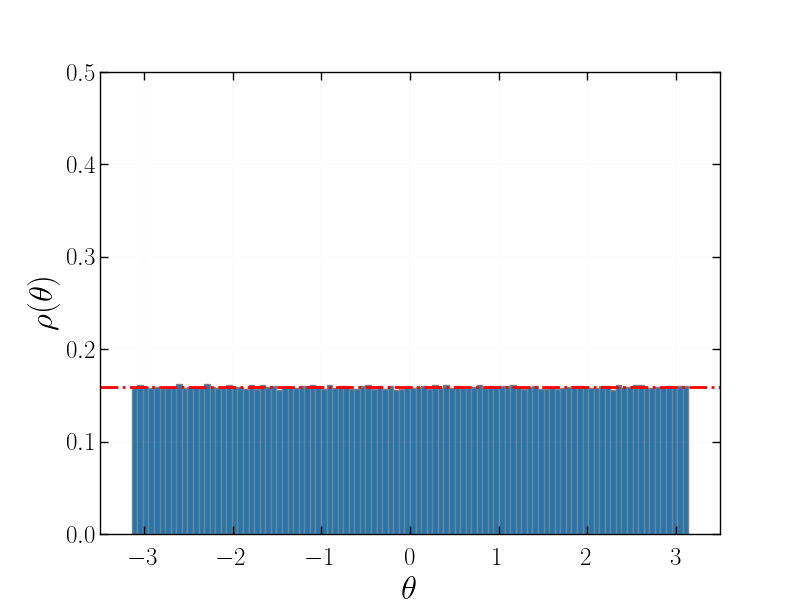

In [262]:
# ----------------------------------------------------------------------------------------------------------------------------------
# USER OPTIONS
# ----------------------------------------------------------------------------------------------------------------------------------
load_figure_data = True
save_figure = True
# ----------------------------------------------------------------------------------------------------------------------------------
# LOAD DATA
# ----------------------------------------------------------------------------------------------------------------------------------
figure_number = 13
result_number = 2
if load_figure_data:
    data = load_data(figure_number, result_number)
    concatenated_eigenvalues = data['concatenated_eigenvalues']
    concatenated_normalised_spacings = data['concatenated_normalised_spacings']
    n_bins = data['n_bins']
    bin_range = data['bin_range']
    s = data['s']
# ----------------------------------------------------------------------------------------------------------------------------------
# PLOT FIGURES
# ----------------------------------------------------------------------------------------------------------------------------------

plt.clf()
plt.close()
plt.figure()
# Create histogram
plt.hist(concatenated_eigenvalues, bins=n_bins, range=bin_range, density=True, edgecolor = 'gray')
plt.axhline(y = 1 / (2 * np.pi), color = 'r', linestyle = '-.', linewidth = 2)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\rho(\theta)$')
plt.ylim(0, 0.5)
plt.xlim(-3.5, 3.5)

if save_figure:
    plt.savefig(f'../fig/Figure_{figure_number:02}c.pdf', format='pdf', bbox_inches='tight')
    
plt.show()

### <span style="font-size: 24px; font-family: Arial, sans-serif">Plot Figure d</span>

/home/jgkh/.local/lib/python3.9/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)


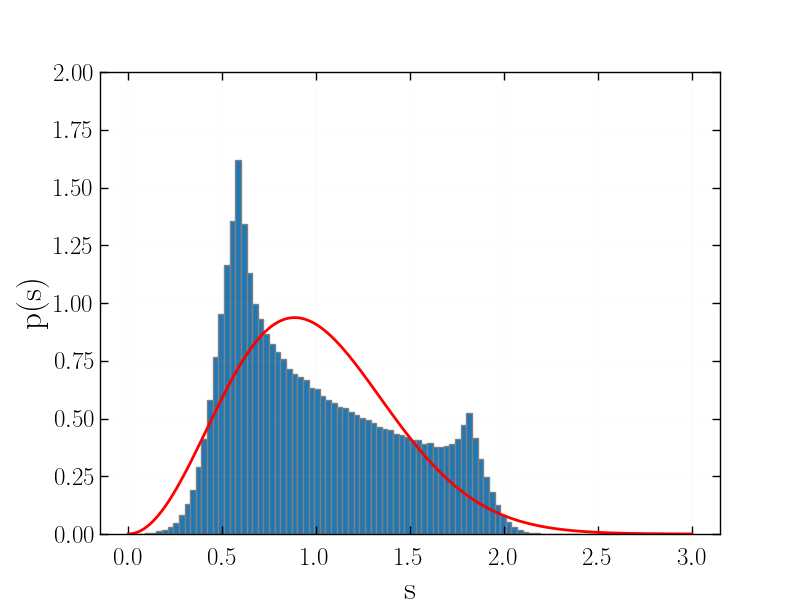

In [264]:
# ----------------------------------------------------------------------------------------------------------------------------------
# USER OPTIONS
# ----------------------------------------------------------------------------------------------------------------------------------
load_figure_data = True
save_figure = True
# ----------------------------------------------------------------------------------------------------------------------------------
# LOAD DATA
# ----------------------------------------------------------------------------------------------------------------------------------
figure_number = 13
result_number = 2
if load_figure_data:
    data = load_data(figure_number, result_number)
    concatenated_eigenvalues = data['concatenated_eigenvalues']
    concatenated_normalised_spacings = data['concatenated_normalised_spacings']
    n_bins = data['n_bins']
    bin_range = data['bin_range']
    s = data['s']
# ----------------------------------------------------------------------------------------------------------------------------------
# PLOT FIGURES
# ----------------------------------------------------------------------------------------------------------------------------------

plt.clf()
plt.close()
plt.figure()
# Plot Spacing distribution
plt.hist(concatenated_normalised_spacings, bins=100, range=(0, 3), density=True, edgecolor = 'gray')
plt.plot(s, GUE_distribution(s), color = 'r', linestyle = '-', linewidth = 2)
plt.ylim(0, 2)
plt.xlabel(r's')
plt.ylabel(r'p(s)')

if save_figure:
    plt.savefig(f'../fig/Figure_{figure_number:02}d.pdf', format='pdf', bbox_inches='tight')
plt.show()

# <span style="font-size: 60px; font-family: Arial, sans-serif">FIGURE 14</span>

## <span style="font-size: 36px; font-family: Arial, sans-serif">SUBFIGURES A & B</span>

### <span style="font-size: 24px; font-family: Arial, sans-serif">Generate Data</span>

In [24]:
# ----------------------------------------------------------------------------------------------------------------------------------
# USER OPTIONS
# ----------------------------------------------------------------------------------------------------------------------------------
generate_figure_data = True
save_figure_data = True
# ----------------------------------------------------------------------------------------------------------------------------------
# LOAD DATA
# ----------------------------------------------------------------------------------------------------------------------------------
figure_number = 14
result_number = 1

method = 'cirq_random_special_unitary'

dim = 100

n_eigenvalues = 1000000

n_bins = int(np.ceil(np.log2(n_eigenvalues + 1))) # Sturges formula

n_bins = 100

bin_range = (-np.pi, np.pi)

s = np.linspace(0, 3, 1000)

if generate_figure_data:
    concatenated_eigenvalues, concatenated_normalised_spacings = get_eigenvalue_phase_and_spacing_distributions(n_eigenvalues = n_eigenvalues, dim = dim, method = method)

if save_figure_data:
    save_data(figure_number, result_number, method = method, dim = dim, n_eigenvalues = n_eigenvalues, n_bins = n_bins, bin_range = bin_range, s = s, concatenated_eigenvalues = concatenated_eigenvalues, concatenated_normalised_spacings = concatenated_normalised_spacings)

Total number of eigenvalues: 1000000
Dimension: 100
Number of gates: 10000
Number of jobs: 10
Batch size: 1000
Start time: 0.0
Beginning to generate 10000 random 100x100 unitary matrices using the cirq_random_special_unitary method...


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   6 tasks      | elapsed:    0.3s
[Parallel(n_jobs=10)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=10)]: Done 515 tasks      | elapsed:   10.7s
[Parallel(n_jobs=10)]: Done 1208 tasks      | elapsed:   21.5s
[Parallel(n_jobs=10)]: Done 2099 tasks      | elapsed:   33.4s
[Parallel(n_jobs=10)]: Done 2990 tasks      | elapsed:   39.3s
[Parallel(n_jobs=10)]: Done 4079 tasks      | elapsed:   53.1s
[Parallel(n_jobs=10)]: Done 5168 tasks      | elapsed:  1.1min
[Parallel(n_jobs=10)]: Done 6455 tasks      | elapsed:  1.3min
[Parallel(n_jobs=10)]: Done 7742 tasks      | elapsed:  1.5min
[Parallel(n_jobs=10)]: Done 10000 out of 10000 | elapsed:  1.9min finished


Gate generation time: 114.10320353507996
Beginning eigenvalue analysis...
Eigenvalue analysis time: 57.98638963699341
Total time: 172.23328042030334


### <span style="font-size: 24px; font-family: Arial, sans-serif">Plot Figure a</span>

/home/jgkh/.local/lib/python3.9/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)


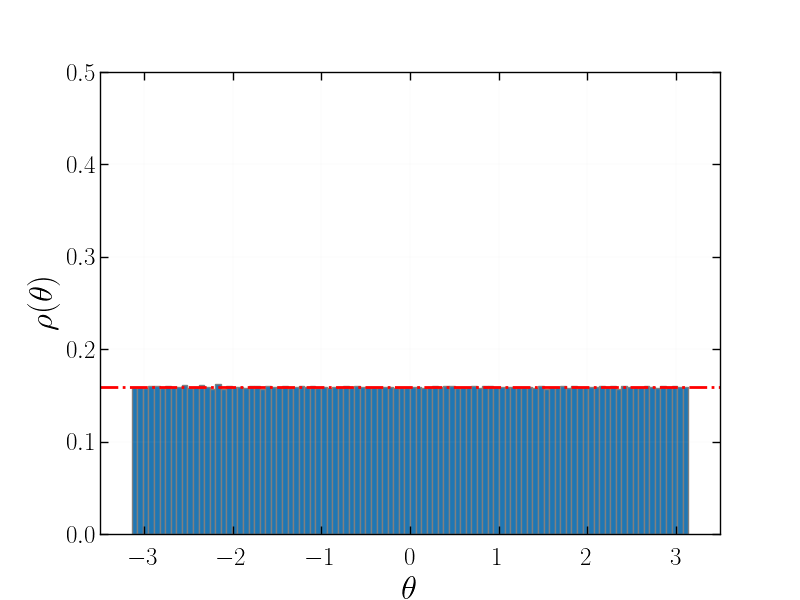

In [265]:
# ----------------------------------------------------------------------------------------------------------------------------------
# USER OPTIONS
# ----------------------------------------------------------------------------------------------------------------------------------
load_figure_data = True
save_figure = True
# ----------------------------------------------------------------------------------------------------------------------------------
# LOAD DATA
# ----------------------------------------------------------------------------------------------------------------------------------
figure_number = 14
result_number = 1
if load_figure_data:
    data = load_data(figure_number, result_number)
    concatenated_eigenvalues = data['concatenated_eigenvalues']
    concatenated_normalised_spacings = data['concatenated_normalised_spacings']
    n_bins = data['n_bins']
    bin_range = data['bin_range']
    s = data['s']
# ----------------------------------------------------------------------------------------------------------------------------------
# PLOT FIGURES
# ----------------------------------------------------------------------------------------------------------------------------------

plt.clf()
plt.close()
plt.figure()
# Create histogram
plt.hist(concatenated_eigenvalues, bins=n_bins, range=bin_range, density=True, edgecolor = 'gray')
plt.axhline(y = 1 / (2 * np.pi), color = 'r', linestyle = '-.', linewidth = 2)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\rho(\theta)$')
plt.ylim(0, 0.5)
plt.xlim(-3.5, 3.5)

if save_figure:
    plt.savefig(f'../fig/Figure_{figure_number:02}a.pdf', format='pdf', bbox_inches='tight')
    
plt.show()

### <span style="font-size: 24px; font-family: Arial, sans-serif">Plot Figure b</span>

/home/jgkh/.local/lib/python3.9/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)


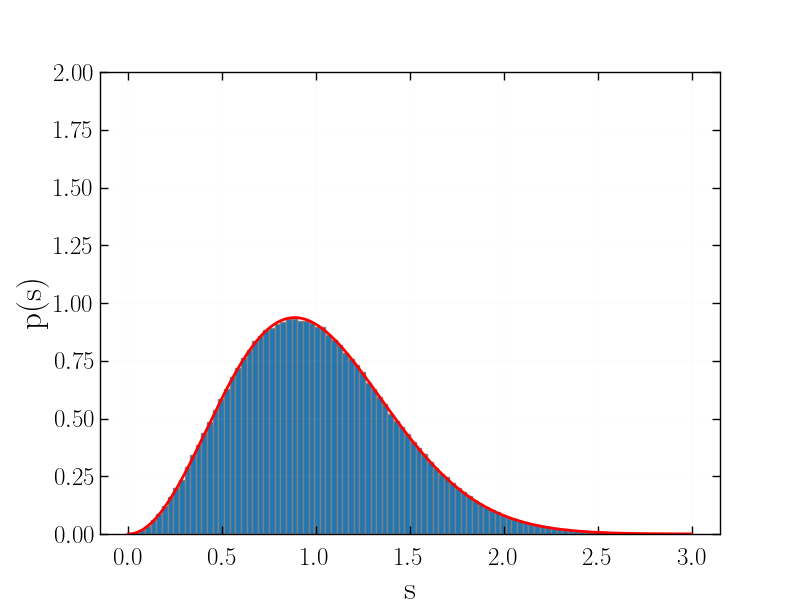

In [266]:
# ----------------------------------------------------------------------------------------------------------------------------------
# USER OPTIONS
# ----------------------------------------------------------------------------------------------------------------------------------
load_figure_data = True
save_figure = True
# ----------------------------------------------------------------------------------------------------------------------------------
# LOAD DATA
# ----------------------------------------------------------------------------------------------------------------------------------
figure_number = 14
result_number = 1
if load_figure_data:
    data = load_data(figure_number, result_number)
    concatenated_eigenvalues = data['concatenated_eigenvalues']
    concatenated_normalised_spacings = data['concatenated_normalised_spacings']
    n_bins = data['n_bins']
    bin_range = data['bin_range']
    s = data['s']
# ----------------------------------------------------------------------------------------------------------------------------------
# PLOT FIGURES
# ----------------------------------------------------------------------------------------------------------------------------------

plt.clf()
plt.close()
plt.figure()
# Plot Spacing distribution
plt.hist(concatenated_normalised_spacings, bins=100, range=(0, 3), density=True, edgecolor = 'gray')
plt.plot(s, GUE_distribution(s), color = 'r', linestyle = '-', linewidth = 2)
plt.ylim(0, 2)
plt.xlabel(r's')
plt.ylabel(r'p(s)')

if save_figure:
    plt.savefig(f'../fig/Figure_{figure_number:02}b.pdf', format='pdf', bbox_inches='tight')
plt.show()

## <span style="font-size: 36px; font-family: Arial, sans-serif">SUBFIGURES C & D</span>

### <span style="font-size: 24px; font-family: Arial, sans-serif">Generate Data</span>

In [28]:
# ----------------------------------------------------------------------------------------------------------------------------------
# USER OPTIONS
# ----------------------------------------------------------------------------------------------------------------------------------
generate_figure_data = True
save_figure_data = True
# ----------------------------------------------------------------------------------------------------------------------------------
# LOAD DATA
# ----------------------------------------------------------------------------------------------------------------------------------
figure_number = 14
result_number = 2

method = 'cirq_random_special_unitary'

dim = 2

n_eigenvalues = 1000000

n_bins = int(np.ceil(np.log2(n_eigenvalues + 1))) # Sturges formula

n_bins = 100

bin_range = (-np.pi, np.pi)

s = np.linspace(0, 3, 1000)

if generate_figure_data:
    concatenated_eigenvalues, concatenated_normalised_spacings = get_eigenvalue_phase_and_spacing_distributions(n_eigenvalues = n_eigenvalues, dim = dim, method = method)

if save_figure_data:
    save_data(figure_number, result_number, method = method, dim = dim, n_eigenvalues = n_eigenvalues, n_bins = n_bins, bin_range = bin_range, s = s, concatenated_eigenvalues = concatenated_eigenvalues, concatenated_normalised_spacings = concatenated_normalised_spacings)

Total number of eigenvalues: 1000000
Dimension: 2
Number of gates: 500000
Number of jobs: 10
Batch size: 50000
Start time: 0.0
Beginning to generate 500000 random 2x2 unitary matrices using the cirq_random_special_unitary method...


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   6 tasks      | elapsed:    1.5s
[Parallel(n_jobs=10)]: Done  16 tasks      | elapsed:    1.5s
[Parallel(n_jobs=10)]: Done 25015 tasks      | elapsed:   40.8s
[Parallel(n_jobs=10)]: Done 60008 tasks      | elapsed:  1.2min
[Parallel(n_jobs=10)]: Done 104999 tasks      | elapsed:  1.8min
[Parallel(n_jobs=10)]: Done 149990 tasks      | elapsed:  2.1min
[Parallel(n_jobs=10)]: Done 204979 tasks      | elapsed:  3.2min
[Parallel(n_jobs=10)]: Done 259968 tasks      | elapsed:  4.0min
[Parallel(n_jobs=10)]: Done 324955 tasks      | elapsed:  5.1min
[Parallel(n_jobs=10)]: Done 389942 tasks      | elapsed:  6.1min
[Parallel(n_jobs=10)]: Done 500000 out of 500000 | elapsed:  7.7min finished


Gate generation time: 459.7104694843292
Beginning eigenvalue analysis...
Eigenvalue analysis time: 71.66500425338745
Total time: 532.5533061027527


### <span style="font-size: 24px; font-family: Arial, sans-serif">Plot Figure c</span>

/home/jgkh/.local/lib/python3.9/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)


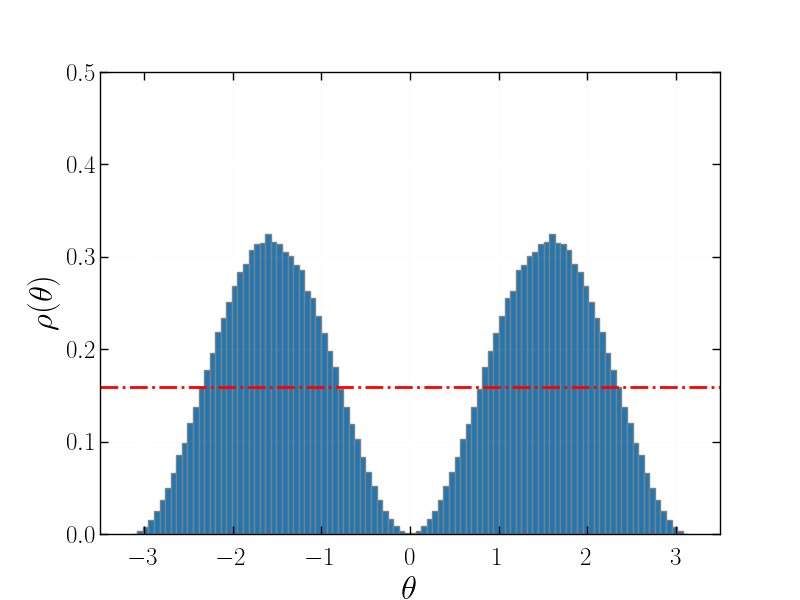

In [267]:
# ----------------------------------------------------------------------------------------------------------------------------------
# USER OPTIONS
# ----------------------------------------------------------------------------------------------------------------------------------
load_figure_data = True
save_figure = True
# ----------------------------------------------------------------------------------------------------------------------------------
# LOAD DATA
# ----------------------------------------------------------------------------------------------------------------------------------
figure_number = 14
result_number = 2
if load_figure_data:
    data = load_data(figure_number, result_number)
    concatenated_eigenvalues = data['concatenated_eigenvalues']
    concatenated_normalised_spacings = data['concatenated_normalised_spacings']
    n_bins = data['n_bins']
    bin_range = data['bin_range']
    s = data['s']
# ----------------------------------------------------------------------------------------------------------------------------------
# PLOT FIGURES
# ----------------------------------------------------------------------------------------------------------------------------------

plt.clf()
plt.close()
plt.figure()
# Create histogram
plt.hist(concatenated_eigenvalues, bins=n_bins, range=bin_range, density=True, edgecolor = 'gray')
plt.axhline(y = 1 / (2 * np.pi), color = 'r', linestyle = '-.', linewidth = 2)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\rho(\theta)$')
plt.ylim(0, 0.5)
plt.xlim(-3.5, 3.5)

if save_figure:
    plt.savefig(f'../fig/Figure_{figure_number:02}c.pdf', format='pdf', bbox_inches='tight')
    
plt.show()

### <span style="font-size: 24px; font-family: Arial, sans-serif">Plot Figure d</span>

/home/jgkh/.local/lib/python3.9/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)


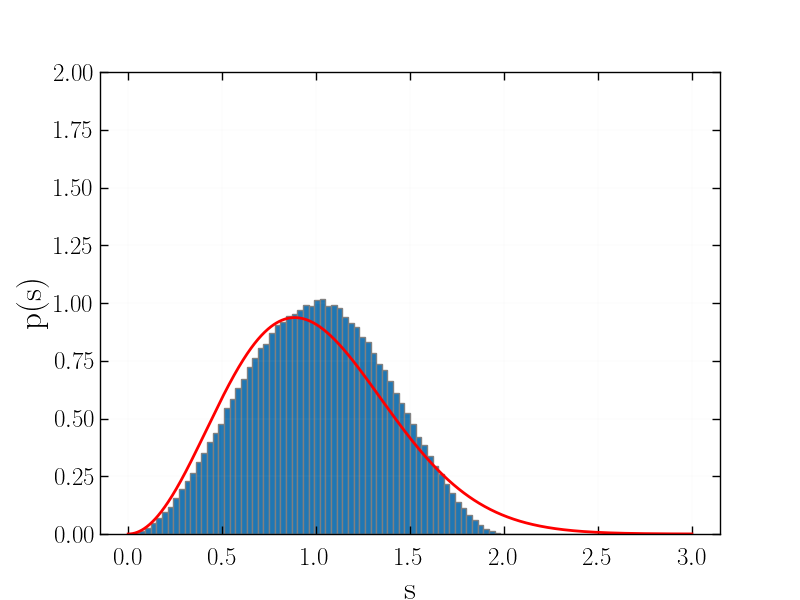

In [268]:
# ----------------------------------------------------------------------------------------------------------------------------------
# USER OPTIONS
# ----------------------------------------------------------------------------------------------------------------------------------
load_figure_data = True
save_figure = True
# ----------------------------------------------------------------------------------------------------------------------------------
# LOAD DATA
# ----------------------------------------------------------------------------------------------------------------------------------
figure_number = 14
result_number = 2
if load_figure_data:
    data = load_data(figure_number, result_number)
    concatenated_eigenvalues = data['concatenated_eigenvalues']
    concatenated_normalised_spacings = data['concatenated_normalised_spacings']
    n_bins = data['n_bins']
    bin_range = data['bin_range']
    s = data['s']
# ----------------------------------------------------------------------------------------------------------------------------------
# PLOT FIGURES
# ----------------------------------------------------------------------------------------------------------------------------------

plt.clf()
plt.close()
plt.figure()
# Plot Spacing distribution
plt.hist(concatenated_normalised_spacings, bins=100, range=(0, 3), density=True, edgecolor = 'gray')
plt.plot(s, GUE_distribution(s), color = 'r', linestyle = '-', linewidth = 2)
plt.ylim(0, 2)
plt.xlabel(r's')
plt.ylabel(r'p(s)')

if save_figure:
    plt.savefig(f'../fig/Figure_{figure_number:02}d.pdf', format='pdf', bbox_inches='tight')
plt.show()

# <span style="font-size: 60px; font-family: Arial, sans-serif">FIGURE 15</span>

## <span style="font-size: 36px; font-family: Arial, sans-serif">SUBFIGURE A</span>

### <span style="font-size: 24px; font-family: Arial, sans-serif">Generate Data</span>

In [ ]:
# ----------------------------------------------------------------------------------------------------------------------------------
# IMPORTS
# ----------------------------------------------------------------------------------------------------------------------------------

import paper_imports
import paper_methods

from paper_imports import *
from paper_methods import *

importlib.reload(paper_imports)
importlib.reload(paper_methods)

import paper_imports
import paper_methods

from paper_imports import *
from paper_methods import *

# ----------------------------------------------------------------------------------------------------------------------------------
# USER OPTIONS
# ----------------------------------------------------------------------------------------------------------------------------------

# Save data to file
save_figure_data : bool = True

# ----------------------------------------------------------------------------------------------------------------------------------
# HPC SETTINGS
# ----------------------------------------------------------------------------------------------------------------------------------

# Get script file name
script_file_name : str = "paper_figure_03.py"

task_count, task_id, n_CPUs, figure_number = get_SLURM_Data(script_file_name)

task_id = 10

print = functools.partial(print, flush = True)

# ----------------------------------------------------------------------------------------------------------------------------------
# START OF SCRIPT
# ----------------------------------------------------------------------------------------------------------------------------------

# START TIMING
start_time : float = time.time()
# Convert start time to real-world time
real_world_start_time : str = time.strftime("%y-%m-%d_%X_%Z").replace("/", "-").replace(":", "-")

# Set the figure number
figure_number : int = 23
# Set the method for generating gates
method : str = 'circular'
# Set collapse operator
collapse_operator : str = 'z'
# Set dimensions for the qudits
dims : list[int] = [2]
d_max : int = dims[-1]
# Set the range of noise strengths for the collapse operator
gamma_min : float = 1e-2
gamma_max : float = 1e+4
gamma_num : int = 50
gammas_ndarray : np.ndarray = np.geomspace(gamma_min, gamma_max, gamma_num, dtype = np.float64)
gammas : list[float] = gammas_ndarray.tolist()
# Set alias for gamma_num for readability
n_gammas : int = gamma_num
# Set number of random quantum gates
n_gates : int = 100#200 * n_CPUs
# Set parallelization parameters
parallel_verbosity : int = 11
n_jobs : int = n_CPUs
batch_size : int = int(n_gates / n_jobs)   
# Set times for the propagator; currently set to just one value, 1.0
times : float = 1.0
# Set y threshold on AGI to identify curves with or without peaks
y_threshold : float = 1e-3
# Set options for the mesolve function (solver options for differential equations)
options_mesolve : qt.Options = qt.Options()
options_mesolve.method = 'bdf'  # Setting method to 'bdf' (backward differentiation formula)
options_mesolve.max_step = float(0.001) # type: ignore 
options_mesolve.nsteps = float(1000000) # type: ignore
options_mesolve.rtol = float(1e-8)  # Relative tolerance
options_mesolve.atol = float(1e-8)  # Absolute tolerance

# Pre-allocate space for data
AGIs_d : list = []
super_gates_d : list = []
hamiltonians_d : list = []
hamiltonians_d_traceless : list = []
AGIs_with_turning_points_indices : list = []
AGIs_without_turning_points_indices : list = []

# Print the config parameters
print(f"STARTING TIMESTAMP: {real_world_start_time}")
print('\n')
print('PRINTING CONFIG PARAMETERS:')
print('---------------------------')
print('\n')
print(f"CURRENT TASK : {task_id:03} / {task_count:03}")
print(f'MODIFIED FIGURE NUMBER : {figure_number}')
print(f'SAVING FIGURE DATA : {save_figure_data}')
print('\n')
print(f"GATE GENERATION METHOD : {method}")
print (f"QUDIT DIMENSIONS : {dims}")
print(f'NUMBER OF GAMMAS : {n_gammas}')
print(f"GAMMAS : {gammas}")
print(f"COLLAPSE OPERATOR : {collapse_operator}")
print(f"NUMBER OF GATES : {n_gates}")
print(f"GATE TIMES : {times}")
print(f"ERROR THRESHOLD : {y_threshold}")
print('\n')
print(f"PARALLEL VERBOSITY : {parallel_verbosity}")
print(f"NUMBER OF PARALLEL JOBS : {n_jobs}")
print(f"BATCH SIZE PER JOB : {batch_size}")
print(f"OPTIONS FOR MESOLVE : {options_mesolve}")
print('\n')

# INITIALIZATION TIME
initialization_time : float = time.time()
print(f"Initialization time: {initialization_time - start_time}")

print('\n')

# Loop over the dimensions
for d in dims:

    # LOOP START TIME
    loop_start_time : float = time.time()  
    
    print(f"DIMENSION : {d:02} / {d_max:02}")

    # Initialize a qudit of dimension d
    qudit = Qudit(d = d)
    # Get qudit collapse operators
    j = qudit.get_j
    L : qt.Qobj = j(collapse_operator) # type: ignore    

    # Pre-allocate space for local data
    AGIs : np.ndarray = np.empty((n_gates, n_gammas), dtype=np.float64)
    # AGIs_traceless : np.ndarray = np.empty((n_gates, n_gammas), dtype=np.float64)
    AGF : np.ndarray = np.empty((n_gates, n_gammas), dtype=np.float64)
    # AGF_traceless : np.ndarray = np.empty((n_gates, n_gammas), dtype=np.float64)

    # LOOP INITIALIZATION TIME
    loop_initialization_time : float = time.time()
    print(f"Loop initialization time: {loop_initialization_time - loop_start_time}")    

    # Generate a list of random unitary gates and Hamiltonians
    super_gates, hamiltonians = generate_gates_and_hamiltonians(n_gates, d, method = method, n_jobs = n_jobs, batch_size = batch_size, is_super = True) # method = 'circular' or 'random' or 'haar' or 'hermitian' or 'cirq_random_unitary' or 'cirq_random_special_unitary'

    # hamiltonians_traceless = [h - h.tr() * qt.qeye(d) / d for h in hamiltonians]

    super_gates_d.append(super_gates)
    hamiltonians_d.append(hamiltonians)
    # hamiltonians_d_traceless.append(hamiltonians_traceless)

    # GATE GENERATION TIME
    gate_generation_time : float = time.time()
    print(f"Gate generation time: {gate_generation_time - initialization_time}")

    # Loop over number of gammas
    for idx_g, g in enumerate(gammas):

        # GAMMA FIDELITY START TIME
        gamma_fidelity_start_time : float = time.time()

        # Parallelize the gates loop
        AGF[:, idx_g] = Parallel(n_jobs = n_jobs, batch_size = batch_size, verbose = parallel_verbosity)(delayed(compute_fidelity)(hamiltonians[idx], gate, L, times, d, g, options_mesolve) for idx, gate in enumerate(super_gates)) # type : ignore
        # AGF_traceless[:, idx_g] = Parallel(n_jobs = n_jobs, batch_size = batch_size, verbose = parallel_verbosity)(delayed(compute_fidelity)(hamiltonians_traceless[idx], gate, L, times, d, g, options_mesolve) for idx, gate in enumerate(super_gates)) # type : ignore
        # AGIs_traceless[:, idx_g] = 1 - AGF_traceless[:, idx_g]
        AGIs[:, idx_g] = 1 - AGF[:, idx_g]

        # GAMMA FIDELITY TIME
        gamma_fidelity_time : float = time.time()
        print(f"Gamma: {idx_g + 1:03} / {n_gammas:03} completed in: {gamma_fidelity_time - gamma_fidelity_start_time}") 

    # Store the AGI data per dimension  
    AGIs_d.append(AGIs)

    # FIDELITY TIME
    fidelity_time = time.time()
    print(f"Fidelity time: {fidelity_time - gate_generation_time}")

    # # Find the roots of the AGI curves
    # root_results = Parallel(n_jobs = n_jobs, batch_size = batch_size, verbose = parallel_verbosity)(delayed(find_AGI_plateau_roots)(AGIs[n], gammas_ndarray, y_threshold, index = n) for n in range(n_gates)) # type : ignore

    # # Differentiate between AGI curves with and without turning points based on how many times they cross the plateau line
    # for n in range(n_gates):
    #     if len(root_results[n][1]) == 3:
    #         AGIs_with_turning_points_indices.append(n)
    #     elif len(root_results[n][1]) == 1:
    #         AGIs_without_turning_points_indices.append(n)        

    # ROOT FINDING TIME
    root_finding_time : float = time.time()
    print(f"Root finding time: {root_finding_time - fidelity_time}")

    # SINGLE LOOP TIME
    loop_time = time.time()
    print(f"Single loop time: {loop_time - loop_start_time}")

    print('\n')

# TOTAL LOOP TIME
total_loop_time = time.time()
print(f"Total loop time: {total_loop_time - start_time}")

# Save the data
if save_figure_data:
    save_data(figure_number, task_id, dims = dims, gammas = gammas, n_gates = n_gates, times = times, AGIs_d = AGIs_d, hamiltonians_d = hamiltonians_d, AGIs_with_turning_points_indices = AGIs_with_turning_points_indices, AGIs_without_turning_points_indices = AGIs_without_turning_points_indices)

# SAVE DATA TIME
save_data_time = time.time()
print(f"Save data time: {save_data_time - total_loop_time}")

# TOTAL TIME
total_time = time.time()
print(f"Total time: {total_time - start_time}")

### <span style="font-size: 24px; font-family: Arial, sans-serif">Plot Figure</span>

Files found: ['Figure_23_results_001.blob', 'Figure_23_results_002.blob', 'Figure_23_results_003.blob', 'Figure_23_results_004.blob', 'Figure_23_results_005.blob']
TASK 001 / 005 : 2.07 seconds
TASK 002 / 005 : 0.45 seconds
TASK 003 / 005 : 0.54 seconds
TASK 004 / 005 : 0.53 seconds
TASK 005 / 005 : 1.94 seconds
Number of Gates : 100000
Number of Gates : 100000
Number of Gates with Turning Points : 40438
Number of Gates with Peak values above threshold : 40438
Number of Gates without peaks : 59562
d = 2
Fitted Weibull parameters: shape=1.152555237238249, loc=0.5184426977197641, scale=951.9390817406229
KL Divergence: 8.8522e-01
1 - R^2: 1.0000e+00
AGI avg : 0.4499194568666644
Haar avg: 0.5
Relative error: 0.1001610862666712
Number of Gates : 100000
Number of Bins : 17
Number of Gates with 0 TP : 59562
Number of Gates with 1 TP : 40438
Fraction of Gates with 0 TP : 0.59562
Fraction of Gates with 1 TP : 0.40438
AGI mean : 2.9999999999999996
AGI std : 3.9082663441224166


/home/jgkh/.local/lib/python3.9/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)


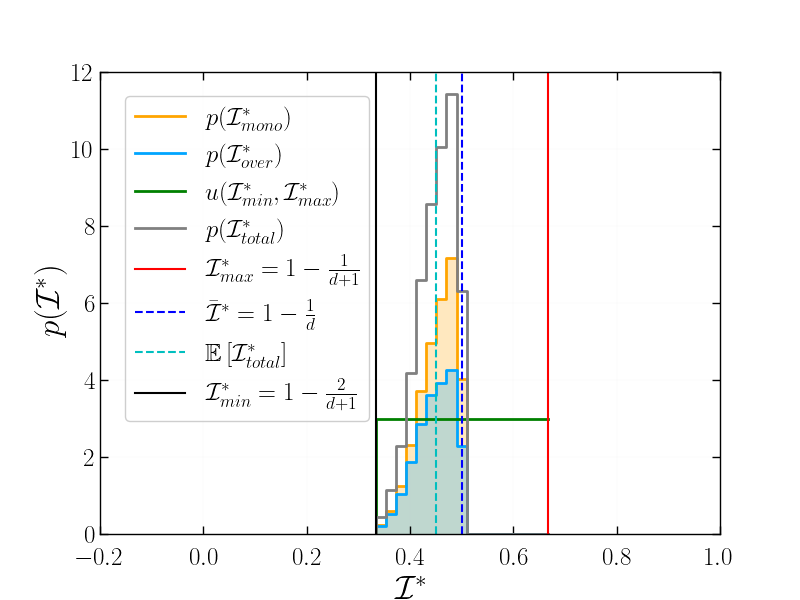

In [269]:
# ----------------------------------------------------------------------------------------------------------------------------------
# USER OPTIONS
# ----------------------------------------------------------------------------------------------------------------------------------
# Whether to load the data from the file or use the data from the current run
load_figure_data = True # True
# Whether to calculate all data points from the raw data
calculate_figure_data = True # True
# Whether to save the figure to a file
save_figure = True # False
# ----------------------------------------------------------------------------------------------------------------------------------
# LOAD DATA
# ----------------------------------------------------------------------------------------------------------------------------------
# Set the figure number
figure_number = 23
# Check if the data should be loaded from the file
if load_figure_data:        
    # Find data files in the directory for the specified figure number
    files_found = [name for name in os.listdir('../dat') if name.startswith(f'Figure_{figure_number:02}')]
    print(f'Files found: {files_found}')
    n_files = len(files_found)
    n_tasks = n_files # Alias for readability
    # Check if there are any data files for the specified figure number
    if n_files > 0:
        n_tasks = n_files
    else:
        raise ValueError("No data files found for the specified figure number.")    
    # Preload dims, gammas and n_gates from the first data file to initialize them before the loop
    if figure_number == 3:
        n_tasks -= 1 # d=2, figure=3
    data = load_data(figure_number, 2)
    dims = data['dims']
    gammas = data['gammas']
    n_gates = data['n_gates'] 
    times = data['times']
    # Pre-allocate space for the AGI data
    AGIs_data_d = []
    AGIs_d = []
    # Loop over the dimensions
    for d_idx, d in enumerate(dims):   
        # Pre-allocate space for the AGI data per dimension 
        AGIs_temp = []      
        # Loop over the number of tasks/ data files
        for n in range(1, n_tasks + 1):
            # TIMING
            start_time = time.time()
            # Load the data from file number n
            data = load_data(figure_number, n)
            # Append the AGI data to the temporary list      
            AGIs_temp.append(data['AGIs_d'][d_idx])
            # TIMING
            end_time = time.time()
            print(f'TASK {n:03} / {n_tasks:03} : {end_time - start_time:.2f} seconds')
        # Concatenate all the elements of AGIs_temp together
        AGIs = np.concatenate(AGIs_temp, axis = 0)
        # Append the concatenated AGI data to the main list
        AGIs_data_d.append(AGIs)
    # Save to original variable name
    AGIs_d = AGIs_data_d
    n_gates = len(AGIs_d[0])

print(f'Number of Gates : {n_gates}')

if calculate_figure_data:
    # Pre-allocate space for the AGI curves
    gates_with_turning_points = []
    gates_with_second_order_turning_points = []
    curves_with_turning_points = []
    curves_with_second_order_turning_points = []
    curves_without_turning_points = []
    tp_indices_gates = []

    gammas_fill = np.linspace(1e-6, 1e6, 1000)
    hatch_list = ['//', 'xx']
    fill_list = ['k', 'k']

    if n_gates > 100000:
        # Generate 100000 random integers from 0 to n_gates
        indices = np.random.choice(n_gates, 100000)
        # Select the AGIs_data_d[0] using indices
        AGIs = AGIs_d[0][indices]
    n_gates = len(AGIs)

    print(f'Number of Gates : {n_gates}')

    # Iterate through each gate
    for n in range(n_gates):
        # Calculate the gradient (difference) of the AGI values along the curve
        gradient = np.diff(AGIs[n])    
        # Fix tolerance on gradients to remove numerical errors near zero
        if figure_number == 33:
            gradient = np.where(np.abs(gradient) < 1e-6, 0, gradient)
        # Find where the gradient changes sign from + to -
        # This indicates that the curve had a maximum and started to decrease
        tp_indices = np.where(np.diff(np.sign(gradient)) < -1)
        turning_points = tp_indices[0]

        if len(turning_points) > 0:
            gates_with_turning_points.append(n)
            tp_indices_gates.append(turning_points[0])

    # peak_plateau_threshold = 1e-2
    # Populate the lists based on whether a curve has a turning point
    for n in range(n_gates):
        if n in gates_with_turning_points:
            # if np.max(AGIs[n]) - AGIs[n][-1] > peak_plateau_threshold:
            curves_with_turning_points.append(AGIs[n])
            # else:
            #     curves_without_turning_points.append(AGIs[n])
        else:
            curves_without_turning_points.append(AGIs[n])

    print(f'Number of Gates with Turning Points : {len(gates_with_turning_points)}')
    print(f'Number of Gates with Peak values above threshold : {len(curves_with_turning_points)}')
    print(f'Number of Gates without peaks : {len(curves_without_turning_points)}')

    # Convert lists to NumPy arrays
    curves_without_turning_points_array = np.array(curves_without_turning_points)
    curves_with_turning_points_array = np.array(curves_with_turning_points)

    d = dims[-1]

    print(f'd = {d}')

    n_bins = int(np.ceil(np.log2(n_gates + 1))) # Sturges formula
    if d==4 or d==8:
        n_bins = 100
    if d==16:
        n_bins=200
    bin_range = (1 - 2 / (d + 1), 1 - 1 / (d + 1))

    # Zoom in on bin_ranges for specific figures where the data is highly localised
    # if figure_number == 163:
    #     bin_range = (0.93, 1 - 1 / (d + 1)) # d = 16
    # elif figure_number == 83:
    # #     bin_range = (0.85, 1 - 1 / (d + 1)) # d = 8
    # if figure_number == 23:
    #     bin_range = (1 - 2 / (d + 1), 0.5) # bristol.gen_cue   
    AGI_max = np.max(AGIs[:, -1])
    AGI_min = np.min(AGIs[:, -1])
    AGI_avg = np.mean(AGIs[:, -1])
    AGI_std = np.std(AGIs[:, -1])
    AGI_med = np.median(AGIs[:, -1])
    AGI_std_max = AGI_avg + AGI_std
    AGI_std_min = AGI_avg - AGI_std 

    AGI_counts, AGI_bins = np.histogram(AGIs[:, -1], bins = n_bins, range = bin_range)

    AGI_bars = AGI_counts / (sum(AGI_counts) * np.diff(AGI_bins)) 



    curves_without_counts, noTP_bins = np.histogram(curves_without_turning_points_array[:, -1], bins = n_bins, range = bin_range)
    
    curves_without_bars = curves_without_counts / (sum(AGI_counts) * np.diff(noTP_bins))

    no_TP_max = np.max(curves_without_turning_points_array[:, -1])
    no_TP_min = np.min(curves_without_turning_points_array[:, -1])
    no_TP_avg = np.mean(curves_without_turning_points_array[:, -1])
    no_TP_std = np.std(curves_without_turning_points_array[:, -1])
    no_TP_med = np.median(curves_without_turning_points_array[:, -1])
    no_TP_std_max = no_TP_avg + no_TP_std
    no_TP_std_min = no_TP_avg - no_TP_std    

    if len(curves_with_turning_points_array) > 0:
        
        curves_with_counts, TP_bins = np.histogram(curves_with_turning_points_array[:, -1], bins = n_bins, range = bin_range)
        
        curves_with_bars = curves_with_counts / (sum(AGI_counts) * np.diff(TP_bins))

        TP_max = np.max(curves_with_turning_points_array[:, -1])
        TP_min = np.min(curves_with_turning_points_array[:, -1])
        TP_avg = np.mean(curves_with_turning_points_array[:, -1])
        TP_std = np.std(curves_with_turning_points_array[:, -1])
        TP_med = np.median(curves_with_turning_points_array[:, -1])
        TP_std_max = TP_avg + TP_std
        TP_std_min = TP_avg - TP_std

    

    # from scipy.stats import weibull_min
    # from scipy.optimize import minimize
    # Define the Weibull PDF function
    def weibull_pdf(x, c, loc, scale):
        return weibull_min.pdf(x, c, loc=loc, scale=scale)
    bin_centers = (AGI_bins[:-1] + AGI_bins[1:]) / 2
    # Initial guesses for the parameters
    if d==2:
        initial_shape = 1.5
        initial_loc = 0.5
        initial_scale = 0.5
    if d==4:
        initial_shape = 9.791693380449274  # initial guess for shape
        initial_loc = 0.5706172416734936  # initial guess for location
        initial_scale = 0.18919131291522107  # initial guess for scale
    elif d==8: 
        initial_shape = 350  # initial guess for shape
        initial_loc = -0.725  # initial guess for location
        initial_scale = 1.6  # initial guess for scale     
    elif d==16:
        initial_shape = 11  # initial guess for shape
        initial_loc = 0.9275  # initial guess for location
        initial_scale = 0.009  # initial guess for scale   
    # Fit the Weibull distribution to the histogram data
    popt, pcov = curve_fit(weibull_pdf, bin_centers, AGI_bars, p0=[initial_shape, initial_loc, initial_scale])
    # Extract the fitted parameters
    fitted_shape, fitted_loc, fitted_scale = popt
    print(f"Fitted Weibull parameters: shape={fitted_shape}, loc={fitted_loc}, scale={fitted_scale}")
    # Generate the Weibull PDF with the fitted parameters
    x_data = np.linspace(0, 1, 1000)
    fitted_weibull_pdf = weibull_min.pdf(x_data, fitted_shape, loc=fitted_loc, scale=fitted_scale)

    # Reference distribution
    if d == 2:
        ref_dist = np.ones(n_bins) / ((1 - 1 / (d + 1)) - (1 - 2 / (d + 1)))  # Uniform distribution
    else:
        ref_dist = weibull_min.pdf(bin_centers, fitted_shape, loc=fitted_loc, scale=fitted_scale)

    # Calculate KL Divergence
    # from scipy.stats import entropy
    kl_divergence = entropy(AGI_bars, ref_dist)
    if d==16:
        kl_divergence = entropy(AGI_bars[170:199], ref_dist[170:199])

    # Calculate R^2
    # Observed frequencies (histogram counts)
    observed = AGI_bars # AGI_bars
    # Expected frequencies (reference distribution)
    expected = ref_dist

    # Total sum of squares (SS_tot)
    ss_tot = np.sum((observed - np.mean(observed))**2)
    # Residual sum of squares (SS_res)
    ss_res = np.sum((observed - expected)**2)
    # R^2 calculation
    r_squared = 1 - (ss_res / ss_tot)    

# ----------------------------------------------------------------------------------------------------------------------------------
# PLOT FIGURES
# ----------------------------------------------------------------------------------------------------------------------------------

print(f"KL Divergence: {kl_divergence:.4e}")
print(f'1 - R^2: {1-r_squared:.4e}')

print(f'AGI avg : {AGI_avg}')
print(f'Haar avg: {1 - 1 / (d)}')
print(f'Relative error: {np.abs((AGI_avg - (1 - 1 / (d))) / (1 - 1 / (d)))}')

print(f'Number of Gates : {n_gates}')
print(f'Number of Bins : {n_bins}')
print(f'Number of Gates with 0 TP : {len(curves_without_turning_points)}')
print(f'Number of Gates with 1 TP : {len(curves_with_turning_points)}')

print(f'Fraction of Gates with 0 TP : {len(curves_without_turning_points) / n_gates}')
print(f'Fraction of Gates with 1 TP : {len(curves_with_turning_points) / n_gates}')

print(f'AGI mean : {np.mean(AGI_bars)}')
print(f'AGI std : {np.std(AGI_bars)}')

plt.clf()
plt.close()
plt.figure()

plt.bar(noTP_bins[:-1], curves_without_bars, width = np.diff(noTP_bins), color = 'orange', alpha = 0.25, align = 'edge')
plt.step(noTP_bins[0:], np.concatenate([[0], curves_without_bars]), color = 'orange', alpha = 1, label = r'$p(\mathcal{I}^*_{mono})$')
if len(curves_with_turning_points_array) > 0:
    plt.bar(TP_bins[:-1], curves_with_bars, width = np.diff(TP_bins), color = (0, 165/255.0, 1), alpha = 0.25, align = 'edge')
    plt.step(TP_bins[0:], np.concatenate([[0], curves_with_bars]), color = (0, 165/255.0, 1), alpha = 1, label = r'$p(\mathcal{I}^*_{over})$')

if d ==2:
    plt.step(AGI_bins[0:], np.concatenate([[0], ref_dist]), color = 'g', linestyle = '-', alpha = 1, label = r'$u(\mathcal{I}^*_{min}, \mathcal{I}^*_{max})$')
else:
    x_data = np.linspace(bin_range[0], bin_range[1], 1000)
    fitted_weibull_pdf = weibull_min.pdf(x_data, fitted_shape, loc=fitted_loc, scale=fitted_scale)
    plt.plot(x_data, fitted_weibull_pdf, color = 'g', linestyle = '-', linewidth=2, label=r'$f(\mathcal{I}^*;\mathcal{I}^*_0,k,\lambda)$')

plt.step(AGI_bins[0:], np.concatenate([[0], AGI_bars]), color = 'gray', linewidth=2, alpha = 1, label = r'$p(\mathcal{I}^*_{total})$')

plt.axvline(x = 1 - 1 / (d + 1), color = 'r', linestyle = '-', linewidth = 1.5, label = r'$\mathcal{I}^*_{max} = 1-\frac{1}{d+1}$')
plt.axvline(x = 1 - 1/d, color = 'b', linestyle = '--', linewidth = 1.5, label = r'$\bar{\mathcal{I}}^* = 1-\frac{1}{d}$')
plt.axvline(x = AGI_avg, color = 'c', linestyle = '--', linewidth = 1.5, label = r'$\mathbb{E}\left[\mathcal{I}^*_{total}\right]$')
plt.axvline(x = 1 - 2 / (d + 1), color = 'k', linestyle = '-', linewidth = 1.5, label = r'$\mathcal{I}^*_{min} = 1 - \frac{2}{d+1}$')


# plt.tick_params(bottom = True, top = True, left = True, right = True)
# plt.tick_params(axis = 'both', which = 'both', direction = 'in')
# plt.tick_params(axis='both', which='major', labelsize=ticks_label_font_size, direction = tick_direction, size = major_tick_length, width = major_tick_width)
# plt.tick_params(axis='both', which='minor', labelsize=ticks_label_font_size, direction = tick_direction, size = minor_tick_length, width = minor_tick_width)

plt.xlim(-0.2, 1)
legend_xpos = 0.02
if d>=4:
    plt.xlim(1 - 2 / (d + 1) - 0.01, 1 - 1 / (d + 1) + 0.01)
    legend_xpos = 0.15

plt.rcParams['axes.linewidth'] = 1  # Set the thickness of the axes lines

legend = plt.legend(loc='upper left', bbox_to_anchor=(legend_xpos, 0.975), ncol=1)#, fontsize = plot_legend_font_size)

plt.xlabel(r'$\mathcal{I}^*$')
plt.ylabel(r'$p(\mathcal{I}^*)$')

figure_number=15
subfigure = 'a'
if save_figure:
    plt.savefig(f'../fig/Figure_{figure_number:02}{subfigure}.pdf', format='pdf', bbox_inches='tight')

plt.show()

## <span style="font-size: 36px; font-family: Arial, sans-serif">SUBFIGURE B</span>

### <span style="font-size: 24px; font-family: Arial, sans-serif">Generate Data</span>

In [ ]:
# ----------------------------------------------------------------------------------------------------------------------------------
# IMPORTS
# ----------------------------------------------------------------------------------------------------------------------------------

import paper_imports
import paper_methods

from paper_imports import *
from paper_methods import *

importlib.reload(paper_imports)
importlib.reload(paper_methods)

import paper_imports
import paper_methods

from paper_imports import *
from paper_methods import *

# ----------------------------------------------------------------------------------------------------------------------------------
# USER OPTIONS
# ----------------------------------------------------------------------------------------------------------------------------------

# Save data to file
save_figure_data : bool = True

# ----------------------------------------------------------------------------------------------------------------------------------
# HPC SETTINGS
# ----------------------------------------------------------------------------------------------------------------------------------

# Get script file name
script_file_name : str = "paper_figure_03.py"

task_count, task_id, n_CPUs, figure_number = get_SLURM_Data(script_file_name)

task_id = 10

print = functools.partial(print, flush = True)

# ----------------------------------------------------------------------------------------------------------------------------------
# START OF SCRIPT
# ----------------------------------------------------------------------------------------------------------------------------------

# START TIMING
start_time : float = time.time()
# Convert start time to real-world time
real_world_start_time : str = time.strftime("%y-%m-%d_%X_%Z").replace("/", "-").replace(":", "-")

# Set the figure number
figure_number : int = 33
# Set the method for generating gates
method : str = 'random'
# Set collapse operator
collapse_operator : str = 'z'
# Set dimensions for the qudits
dims : list[int] = [2]
d_max : int = dims[-1]
# Set the range of noise strengths for the collapse operator
gamma_min : float = 1e-2
gamma_max : float = 1e+4
gamma_num : int = 50
gammas_ndarray : np.ndarray = np.geomspace(gamma_min, gamma_max, gamma_num, dtype = np.float64)
gammas : list[float] = gammas_ndarray.tolist()
# Set alias for gamma_num for readability
n_gammas : int = gamma_num
# Set number of random quantum gates
n_gates : int = 100#200 * n_CPUs
# Set parallelization parameters
parallel_verbosity : int = 11
n_jobs : int = n_CPUs
batch_size : int = int(n_gates / n_jobs)   
# Set times for the propagator; currently set to just one value, 1.0
times : float = 1.0
# Set y threshold on AGI to identify curves with or without peaks
y_threshold : float = 1e-3
# Set options for the mesolve function (solver options for differential equations)
options_mesolve : qt.Options = qt.Options()
options_mesolve.method = 'bdf'  # Setting method to 'bdf' (backward differentiation formula)
options_mesolve.max_step = float(0.001) # type: ignore 
options_mesolve.nsteps = float(1000000) # type: ignore
options_mesolve.rtol = float(1e-8)  # Relative tolerance
options_mesolve.atol = float(1e-8)  # Absolute tolerance

# Pre-allocate space for data
AGIs_d : list = []
super_gates_d : list = []
hamiltonians_d : list = []
hamiltonians_d_traceless : list = []
AGIs_with_turning_points_indices : list = []
AGIs_without_turning_points_indices : list = []

# Print the config parameters
print(f"STARTING TIMESTAMP: {real_world_start_time}")
print('\n')
print('PRINTING CONFIG PARAMETERS:')
print('---------------------------')
print('\n')
print(f"CURRENT TASK : {task_id:03} / {task_count:03}")
print(f'MODIFIED FIGURE NUMBER : {figure_number}')
print(f'SAVING FIGURE DATA : {save_figure_data}')
print('\n')
print(f"GATE GENERATION METHOD : {method}")
print (f"QUDIT DIMENSIONS : {dims}")
print(f'NUMBER OF GAMMAS : {n_gammas}')
print(f"GAMMAS : {gammas}")
print(f"COLLAPSE OPERATOR : {collapse_operator}")
print(f"NUMBER OF GATES : {n_gates}")
print(f"GATE TIMES : {times}")
print(f"ERROR THRESHOLD : {y_threshold}")
print('\n')
print(f"PARALLEL VERBOSITY : {parallel_verbosity}")
print(f"NUMBER OF PARALLEL JOBS : {n_jobs}")
print(f"BATCH SIZE PER JOB : {batch_size}")
print(f"OPTIONS FOR MESOLVE : {options_mesolve}")
print('\n')

# INITIALIZATION TIME
initialization_time : float = time.time()
print(f"Initialization time: {initialization_time - start_time}")

print('\n')

# Loop over the dimensions
for d in dims:

    # LOOP START TIME
    loop_start_time : float = time.time()  
    
    print(f"DIMENSION : {d:02} / {d_max:02}")

    # Initialize a qudit of dimension d
    qudit = Qudit(d = d)
    # Get qudit collapse operators
    j = qudit.get_j
    L : qt.Qobj = j(collapse_operator) # type: ignore    

    # Pre-allocate space for local data
    AGIs : np.ndarray = np.empty((n_gates, n_gammas), dtype=np.float64)
    # AGIs_traceless : np.ndarray = np.empty((n_gates, n_gammas), dtype=np.float64)
    AGF : np.ndarray = np.empty((n_gates, n_gammas), dtype=np.float64)
    # AGF_traceless : np.ndarray = np.empty((n_gates, n_gammas), dtype=np.float64)

    # LOOP INITIALIZATION TIME
    loop_initialization_time : float = time.time()
    print(f"Loop initialization time: {loop_initialization_time - loop_start_time}")    

    # Generate a list of random unitary gates and Hamiltonians
    super_gates, hamiltonians = generate_gates_and_hamiltonians(n_gates, d, method = method, n_jobs = n_jobs, batch_size = batch_size, is_super = True) # method = 'circular' or 'random' or 'haar' or 'hermitian' or 'cirq_random_unitary' or 'cirq_random_special_unitary'

    # hamiltonians_traceless = [h - h.tr() * qt.qeye(d) / d for h in hamiltonians]

    super_gates_d.append(super_gates)
    hamiltonians_d.append(hamiltonians)
    # hamiltonians_d_traceless.append(hamiltonians_traceless)

    # GATE GENERATION TIME
    gate_generation_time : float = time.time()
    print(f"Gate generation time: {gate_generation_time - initialization_time}")

    # Loop over number of gammas
    for idx_g, g in enumerate(gammas):

        # GAMMA FIDELITY START TIME
        gamma_fidelity_start_time : float = time.time()

        # Parallelize the gates loop
        AGF[:, idx_g] = Parallel(n_jobs = n_jobs, batch_size = batch_size, verbose = parallel_verbosity)(delayed(compute_fidelity)(hamiltonians[idx], gate, L, times, d, g, options_mesolve) for idx, gate in enumerate(super_gates)) # type : ignore
        # AGF_traceless[:, idx_g] = Parallel(n_jobs = n_jobs, batch_size = batch_size, verbose = parallel_verbosity)(delayed(compute_fidelity)(hamiltonians_traceless[idx], gate, L, times, d, g, options_mesolve) for idx, gate in enumerate(super_gates)) # type : ignore
        # AGIs_traceless[:, idx_g] = 1 - AGF_traceless[:, idx_g]
        AGIs[:, idx_g] = 1 - AGF[:, idx_g]

        # GAMMA FIDELITY TIME
        gamma_fidelity_time : float = time.time()
        print(f"Gamma: {idx_g + 1:03} / {n_gammas:03} completed in: {gamma_fidelity_time - gamma_fidelity_start_time}") 

    # Store the AGI data per dimension  
    AGIs_d.append(AGIs)

    # FIDELITY TIME
    fidelity_time = time.time()
    print(f"Fidelity time: {fidelity_time - gate_generation_time}")

    # # Find the roots of the AGI curves
    # root_results = Parallel(n_jobs = n_jobs, batch_size = batch_size, verbose = parallel_verbosity)(delayed(find_AGI_plateau_roots)(AGIs[n], gammas_ndarray, y_threshold, index = n) for n in range(n_gates)) # type : ignore

    # # Differentiate between AGI curves with and without turning points based on how many times they cross the plateau line
    # for n in range(n_gates):
    #     if len(root_results[n][1]) == 3:
    #         AGIs_with_turning_points_indices.append(n)
    #     elif len(root_results[n][1]) == 1:
    #         AGIs_without_turning_points_indices.append(n)        

    # ROOT FINDING TIME
    root_finding_time : float = time.time()
    print(f"Root finding time: {root_finding_time - fidelity_time}")

    # SINGLE LOOP TIME
    loop_time = time.time()
    print(f"Single loop time: {loop_time - loop_start_time}")

    print('\n')

# TOTAL LOOP TIME
total_loop_time = time.time()
print(f"Total loop time: {total_loop_time - start_time}")

# Save the data
if save_figure_data:
    save_data(figure_number, task_id, dims = dims, gammas = gammas, n_gates = n_gates, times = times, AGIs_d = AGIs_d, hamiltonians_d = hamiltonians_d, AGIs_with_turning_points_indices = AGIs_with_turning_points_indices, AGIs_without_turning_points_indices = AGIs_without_turning_points_indices)

# SAVE DATA TIME
save_data_time = time.time()
print(f"Save data time: {save_data_time - total_loop_time}")

# TOTAL TIME
total_time = time.time()
print(f"Total time: {total_time - start_time}")

### <span style="font-size: 24px; font-family: Arial, sans-serif">Plot Figure</span>

Files found: ['Figure_33_results_001.blob', 'Figure_33_results_002.blob', 'Figure_33_results_003.blob', 'Figure_33_results_004.blob', 'Figure_33_results_005.blob']
TASK 001 / 005 : 0.66 seconds
TASK 002 / 005 : 0.56 seconds
TASK 003 / 005 : 2.07 seconds
TASK 004 / 005 : 0.59 seconds
TASK 005 / 005 : 0.60 seconds
Number of Gates : 100000
Number of Gates : 100000
Number of Gates with Turning Points : 0
Number of Gates with Peak values above threshold : 0
Number of Gates without peaks : 100000
d = 2
Fitted Weibull parameters: shape=0.9824627613151986, loc=0.3431372539652844, scale=0.12782642054761092
KL Divergence: 4.3755e-01
1 - R^2: 1.0000e+00
AGI avg : 0.3782978063832342
Haar avg: 0.5
Relative error: 0.24340438723353164
Number of Gates : 100000
Number of Bins : 17
Number of Gates with 0 TP : 100000
Number of Gates with 1 TP : 0
Fraction of Gates with 0 TP : 1.0
Fraction of Gates with 1 TP : 0.0
AGI mean : 2.9999999999999996
AGI std : 2.7514632026327055


/home/jgkh/.local/lib/python3.9/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)


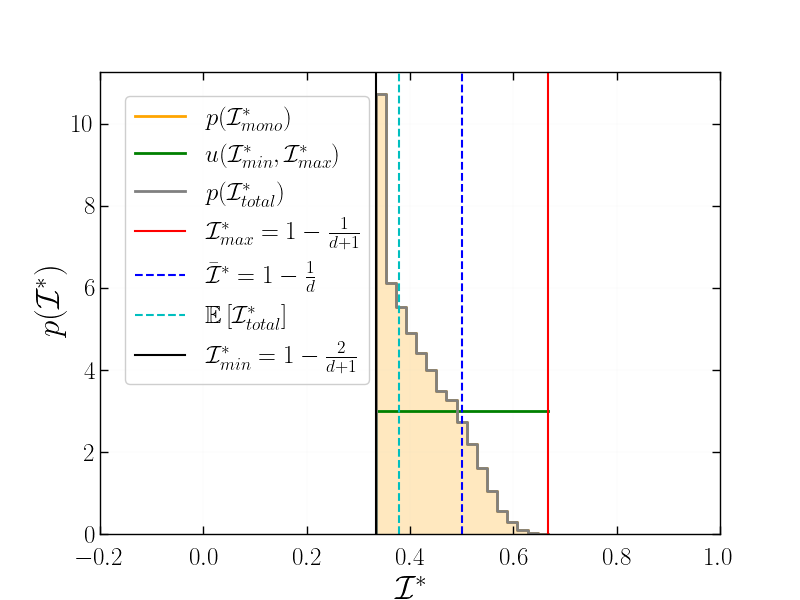

In [270]:
# ----------------------------------------------------------------------------------------------------------------------------------
# USER OPTIONS
# ----------------------------------------------------------------------------------------------------------------------------------
# Whether to load the data from the file or use the data from the current run
load_figure_data = True # True
# Whether to calculate all data points from the raw data
calculate_figure_data = True # True
# Whether to save the figure to a file
save_figure = True # False
# ----------------------------------------------------------------------------------------------------------------------------------
# LOAD DATA
# ----------------------------------------------------------------------------------------------------------------------------------
# Set the figure number
figure_number = 33
# Check if the data should be loaded from the file
if load_figure_data:        
    # Find data files in the directory for the specified figure number
    files_found = [name for name in os.listdir('../dat') if name.startswith(f'Figure_{figure_number:02}')]
    print(f'Files found: {files_found}')
    n_files = len(files_found)
    n_tasks = n_files # Alias for readability
    # Check if there are any data files for the specified figure number
    if n_files > 0:
        n_tasks = n_files
    else:
        raise ValueError("No data files found for the specified figure number.")    
    # Preload dims, gammas and n_gates from the first data file to initialize them before the loop
    if figure_number == 3:
        n_tasks -= 1 # d=2, figure=3
    data = load_data(figure_number, 2)
    dims = data['dims']
    gammas = data['gammas']
    n_gates = data['n_gates'] 
    times = data['times']
    # Pre-allocate space for the AGI data
    AGIs_data_d = []
    AGIs_d = []
    # Loop over the dimensions
    for d_idx, d in enumerate(dims):   
        # Pre-allocate space for the AGI data per dimension 
        AGIs_temp = []      
        # Loop over the number of tasks/ data files
        for n in range(1, n_tasks + 1):
            # TIMING
            start_time = time.time()
            # Load the data from file number n
            data = load_data(figure_number, n)
            # Append the AGI data to the temporary list      
            AGIs_temp.append(data['AGIs_d'][d_idx])
            # TIMING
            end_time = time.time()
            print(f'TASK {n:03} / {n_tasks:03} : {end_time - start_time:.2f} seconds')
        # Concatenate all the elements of AGIs_temp together
        AGIs = np.concatenate(AGIs_temp, axis = 0)
        # Append the concatenated AGI data to the main list
        AGIs_data_d.append(AGIs)
    # Save to original variable name
    AGIs_d = AGIs_data_d
    n_gates = len(AGIs_d[0])

print(f'Number of Gates : {n_gates}')

if calculate_figure_data:
    # Pre-allocate space for the AGI curves
    gates_with_turning_points = []
    gates_with_second_order_turning_points = []
    curves_with_turning_points = []
    curves_with_second_order_turning_points = []
    curves_without_turning_points = []
    tp_indices_gates = []

    gammas_fill = np.linspace(1e-6, 1e6, 1000)
    hatch_list = ['//', 'xx']
    fill_list = ['k', 'k']

    if n_gates > 100000:
        # Generate 100000 random integers from 0 to n_gates
        indices = np.random.choice(n_gates, 100000)
        # Select the AGIs_data_d[0] using indices
        AGIs = AGIs_d[0][indices]
    n_gates = len(AGIs)

    print(f'Number of Gates : {n_gates}')

    # Iterate through each gate
    for n in range(n_gates):
        # Calculate the gradient (difference) of the AGI values along the curve
        gradient = np.diff(AGIs[n])    
        # Fix tolerance on gradients to remove numerical errors near zero
        if figure_number == 33:
            gradient = np.where(np.abs(gradient) < 1e-6, 0, gradient)
        # Find where the gradient changes sign from + to -
        # This indicates that the curve had a maximum and started to decrease
        tp_indices = np.where(np.diff(np.sign(gradient)) < -1)
        turning_points = tp_indices[0]

        if len(turning_points) > 0:
            gates_with_turning_points.append(n)
            tp_indices_gates.append(turning_points[0])

    # peak_plateau_threshold = 1e-2
    # Populate the lists based on whether a curve has a turning point
    for n in range(n_gates):
        if n in gates_with_turning_points:
            # if np.max(AGIs[n]) - AGIs[n][-1] > peak_plateau_threshold:
            curves_with_turning_points.append(AGIs[n])
            # else:
            #     curves_without_turning_points.append(AGIs[n])
        else:
            curves_without_turning_points.append(AGIs[n])

    print(f'Number of Gates with Turning Points : {len(gates_with_turning_points)}')
    print(f'Number of Gates with Peak values above threshold : {len(curves_with_turning_points)}')
    print(f'Number of Gates without peaks : {len(curves_without_turning_points)}')

    # Convert lists to NumPy arrays
    curves_without_turning_points_array = np.array(curves_without_turning_points)
    curves_with_turning_points_array = np.array(curves_with_turning_points)

    d = dims[-1]

    print(f'd = {d}')

    n_bins = int(np.ceil(np.log2(n_gates + 1))) # Sturges formula
    if d==4 or d==8:
        n_bins = 100
    if d==16:
        n_bins=200
    bin_range = (1 - 2 / (d + 1), 1 - 1 / (d + 1))

    # Zoom in on bin_ranges for specific figures where the data is highly localised
    # if figure_number == 163:
    #     bin_range = (0.93, 1 - 1 / (d + 1)) # d = 16
    # elif figure_number == 83:
    # #     bin_range = (0.85, 1 - 1 / (d + 1)) # d = 8
    # if figure_number == 23:
    #     bin_range = (1 - 2 / (d + 1), 0.5) # bristol.gen_cue   
    AGI_max = np.max(AGIs[:, -1])
    AGI_min = np.min(AGIs[:, -1])
    AGI_avg = np.mean(AGIs[:, -1])
    AGI_std = np.std(AGIs[:, -1])
    AGI_med = np.median(AGIs[:, -1])
    AGI_std_max = AGI_avg + AGI_std
    AGI_std_min = AGI_avg - AGI_std 

    AGI_counts, AGI_bins = np.histogram(AGIs[:, -1], bins = n_bins, range = bin_range)

    AGI_bars = AGI_counts / (sum(AGI_counts) * np.diff(AGI_bins)) 



    curves_without_counts, noTP_bins = np.histogram(curves_without_turning_points_array[:, -1], bins = n_bins, range = bin_range)
    
    curves_without_bars = curves_without_counts / (sum(AGI_counts) * np.diff(noTP_bins))

    no_TP_max = np.max(curves_without_turning_points_array[:, -1])
    no_TP_min = np.min(curves_without_turning_points_array[:, -1])
    no_TP_avg = np.mean(curves_without_turning_points_array[:, -1])
    no_TP_std = np.std(curves_without_turning_points_array[:, -1])
    no_TP_med = np.median(curves_without_turning_points_array[:, -1])
    no_TP_std_max = no_TP_avg + no_TP_std
    no_TP_std_min = no_TP_avg - no_TP_std    

    if len(curves_with_turning_points_array) > 0:
        
        curves_with_counts, TP_bins = np.histogram(curves_with_turning_points_array[:, -1], bins = n_bins, range = bin_range)
        
        curves_with_bars = curves_with_counts / (sum(AGI_counts) * np.diff(TP_bins))

        TP_max = np.max(curves_with_turning_points_array[:, -1])
        TP_min = np.min(curves_with_turning_points_array[:, -1])
        TP_avg = np.mean(curves_with_turning_points_array[:, -1])
        TP_std = np.std(curves_with_turning_points_array[:, -1])
        TP_med = np.median(curves_with_turning_points_array[:, -1])
        TP_std_max = TP_avg + TP_std
        TP_std_min = TP_avg - TP_std

    

    # from scipy.stats import weibull_min
    # from scipy.optimize import minimize
    # Define the Weibull PDF function
    def weibull_pdf(x, c, loc, scale):
        return weibull_min.pdf(x, c, loc=loc, scale=scale)
    bin_centers = (AGI_bins[:-1] + AGI_bins[1:]) / 2
    # Initial guesses for the parameters
    if d==4:
        initial_shape = 9.791693380449274  # initial guess for shape
        initial_loc = 0.5706172416734936  # initial guess for location
        initial_scale = 0.18919131291522107  # initial guess for scale
    elif d==8: 
        initial_shape = 350  # initial guess for shape
        initial_loc = -0.725  # initial guess for location
        initial_scale = 1.6  # initial guess for scale     
    elif d==16:
        initial_shape = 11  # initial guess for shape
        initial_loc = 0.9275  # initial guess for location
        initial_scale = 0.009  # initial guess for scale   
    # Fit the Weibull distribution to the histogram data
    popt, pcov = curve_fit(weibull_pdf, bin_centers, AGI_bars, p0=[initial_shape, initial_loc, initial_scale])
    # Extract the fitted parameters
    fitted_shape, fitted_loc, fitted_scale = popt
    print(f"Fitted Weibull parameters: shape={fitted_shape}, loc={fitted_loc}, scale={fitted_scale}")
    # Generate the Weibull PDF with the fitted parameters
    x_data = np.linspace(0, 1, 1000)
    fitted_weibull_pdf = weibull_min.pdf(x_data, fitted_shape, loc=fitted_loc, scale=fitted_scale)

    # Reference distribution
    if d == 2:
        ref_dist = np.ones(n_bins) / ((1 - 1 / (d + 1)) - (1 - 2 / (d + 1)))  # Uniform distribution
    else:
        ref_dist = weibull_min.pdf(bin_centers, fitted_shape, loc=fitted_loc, scale=fitted_scale)

    # Calculate KL Divergence
    # from scipy.stats import entropy
    kl_divergence = entropy(AGI_bars, ref_dist)
    if d==16:
        kl_divergence = entropy(AGI_bars[170:199], ref_dist[170:199])

    # Calculate R^2
    # Observed frequencies (histogram counts)
    observed = AGI_bars # AGI_bars
    # Expected frequencies (reference distribution)
    expected = ref_dist

    # Total sum of squares (SS_tot)
    ss_tot = np.sum((observed - np.mean(observed))**2)
    # Residual sum of squares (SS_res)
    ss_res = np.sum((observed - expected)**2)
    # R^2 calculation
    r_squared = 1 - (ss_res / ss_tot)    

# ----------------------------------------------------------------------------------------------------------------------------------
# PLOT FIGURES
# ----------------------------------------------------------------------------------------------------------------------------------

print(f"KL Divergence: {kl_divergence:.4e}")
print(f'1 - R^2: {1-r_squared:.4e}')

print(f'AGI avg : {AGI_avg}')
print(f'Haar avg: {1 - 1 / (d)}')
print(f'Relative error: {np.abs((AGI_avg - (1 - 1 / (d))) / (1 - 1 / (d)))}')

print(f'Number of Gates : {n_gates}')
print(f'Number of Bins : {n_bins}')
print(f'Number of Gates with 0 TP : {len(curves_without_turning_points)}')
print(f'Number of Gates with 1 TP : {len(curves_with_turning_points)}')

print(f'Fraction of Gates with 0 TP : {len(curves_without_turning_points) / n_gates}')
print(f'Fraction of Gates with 1 TP : {len(curves_with_turning_points) / n_gates}')

print(f'AGI mean : {np.mean(AGI_bars)}')
print(f'AGI std : {np.std(AGI_bars)}')

plt.clf()
plt.close()
plt.figure()

plt.bar(noTP_bins[:-1], curves_without_bars, width = np.diff(noTP_bins), color = 'orange', alpha = 0.25, align = 'edge')
plt.step(noTP_bins[0:], np.concatenate([[0], curves_without_bars]), color = 'orange', alpha = 1, label = r'$p(\mathcal{I}^*_{mono})$')
if len(curves_with_turning_points_array) > 0:
    plt.bar(TP_bins[:-1], curves_with_bars, width = np.diff(TP_bins), color = (0, 165/255.0, 1), alpha = 0.25, align = 'edge')
    plt.step(TP_bins[0:], np.concatenate([[0], curves_with_bars]), color = (0, 165/255.0, 1), alpha = 1, label = r'$p(\mathcal{I}^*_{over})$')

if d ==2:
    plt.step(AGI_bins[0:], np.concatenate([[0], ref_dist]), color = 'g', linestyle = '-', alpha = 1, label = r'$u(\mathcal{I}^*_{min}, \mathcal{I}^*_{max})$')
else:
    x_data = np.linspace(bin_range[0], bin_range[1], 1000)
    fitted_weibull_pdf = weibull_min.pdf(x_data, fitted_shape, loc=fitted_loc, scale=fitted_scale)
    plt.plot(x_data, fitted_weibull_pdf, color = 'g', linestyle = '-', linewidth=2, label=r'$f(\mathcal{I}^*;\mathcal{I}^*_0,k,\lambda)$')

plt.step(AGI_bins[0:], np.concatenate([[0], AGI_bars]), color = 'gray', linewidth=2, alpha = 1, label = r'$p(\mathcal{I}^*_{total})$')

plt.axvline(x = 1 - 1 / (d + 1), color = 'r', linestyle = '-', linewidth = 1.5, label = r'$\mathcal{I}^*_{max} = 1-\frac{1}{d+1}$')
plt.axvline(x = 1 - 1/d, color = 'b', linestyle = '--', linewidth = 1.5, label = r'$\bar{\mathcal{I}}^* = 1-\frac{1}{d}$')
plt.axvline(x = AGI_avg, color = 'c', linestyle = '--', linewidth = 1.5, label = r'$\mathbb{E}\left[\mathcal{I}^*_{total}\right]$')
plt.axvline(x = 1 - 2 / (d + 1), color = 'k', linestyle = '-', linewidth = 1.5, label = r'$\mathcal{I}^*_{min} = 1 - \frac{2}{d+1}$')


# plt.tick_params(bottom = True, top = True, left = True, right = True)
# plt.tick_params(axis = 'both', which = 'both', direction = 'in')
# plt.tick_params(axis='both', which='major', labelsize=ticks_label_font_size, direction = tick_direction, size = major_tick_length, width = major_tick_width)
# plt.tick_params(axis='both', which='minor', labelsize=ticks_label_font_size, direction = tick_direction, size = minor_tick_length, width = minor_tick_width)

plt.xlim(-0.2, 1)
legend_xpos = 0.02
if d>=4:
    plt.xlim(1 - 2 / (d + 1) - 0.01, 1 - 1 / (d + 1) + 0.01)
    legend_xpos = 0.15

plt.rcParams['axes.linewidth'] = 1  # Set the thickness of the axes lines

legend = plt.legend(loc='upper left', bbox_to_anchor=(legend_xpos, 0.975), ncol=1)#, fontsize = plot_legend_font_size)

plt.xlabel(r'$\mathcal{I}^*$')
plt.ylabel(r'$p(\mathcal{I}^*)$')

figure_number=15
subfigure = 'b'
if save_figure:
    plt.savefig(f'../fig/Figure_{figure_number:02}{subfigure}.pdf', format='pdf', bbox_inches='tight')

plt.show()

## <span style="font-size: 36px; font-family: Arial, sans-serif">SUBFIGURE C</span>

### <span style="font-size: 24px; font-family: Arial, sans-serif">Generate Data</span>

In [ ]:
# ----------------------------------------------------------------------------------------------------------------------------------
# IMPORTS
# ----------------------------------------------------------------------------------------------------------------------------------

import paper_imports
import paper_methods

from paper_imports import *
from paper_methods import *

importlib.reload(paper_imports)
importlib.reload(paper_methods)

import paper_imports
import paper_methods

from paper_imports import *
from paper_methods import *

# ----------------------------------------------------------------------------------------------------------------------------------
# USER OPTIONS
# ----------------------------------------------------------------------------------------------------------------------------------

# Save data to file
save_figure_data : bool = True

# ----------------------------------------------------------------------------------------------------------------------------------
# HPC SETTINGS
# ----------------------------------------------------------------------------------------------------------------------------------

# Get script file name
script_file_name : str = "paper_figure_03.py"

task_count, task_id, n_CPUs, figure_number = get_SLURM_Data(script_file_name)

task_id = 10

print = functools.partial(print, flush = True)

# ----------------------------------------------------------------------------------------------------------------------------------
# START OF SCRIPT
# ----------------------------------------------------------------------------------------------------------------------------------

# START TIMING
start_time : float = time.time()
# Convert start time to real-world time
real_world_start_time : str = time.strftime("%y-%m-%d_%X_%Z").replace("/", "-").replace(":", "-")

# Set the figure number
figure_number : int = 53
# Set the method for generating gates
method : str = 'cirq_random_unitary'
# Set collapse operator
collapse_operator : str = 'z'
# Set dimensions for the qudits
dims : list[int] = [2]
d_max : int = dims[-1]
# Set the range of noise strengths for the collapse operator
gamma_min : float = 1e-2
gamma_max : float = 1e+4
gamma_num : int = 50
gammas_ndarray : np.ndarray = np.geomspace(gamma_min, gamma_max, gamma_num, dtype = np.float64)
gammas : list[float] = gammas_ndarray.tolist()
# Set alias for gamma_num for readability
n_gammas : int = gamma_num
# Set number of random quantum gates
n_gates : int = 100#200 * n_CPUs
# Set parallelization parameters
parallel_verbosity : int = 11
n_jobs : int = n_CPUs
batch_size : int = int(n_gates / n_jobs)   
# Set times for the propagator; currently set to just one value, 1.0
times : float = 1.0
# Set y threshold on AGI to identify curves with or without peaks
y_threshold : float = 1e-3
# Set options for the mesolve function (solver options for differential equations)
options_mesolve : qt.Options = qt.Options()
options_mesolve.method = 'bdf'  # Setting method to 'bdf' (backward differentiation formula)
options_mesolve.max_step = float(0.001) # type: ignore 
options_mesolve.nsteps = float(1000000) # type: ignore
options_mesolve.rtol = float(1e-8)  # Relative tolerance
options_mesolve.atol = float(1e-8)  # Absolute tolerance

# Pre-allocate space for data
AGIs_d : list = []
super_gates_d : list = []
hamiltonians_d : list = []
hamiltonians_d_traceless : list = []
AGIs_with_turning_points_indices : list = []
AGIs_without_turning_points_indices : list = []

# Print the config parameters
print(f"STARTING TIMESTAMP: {real_world_start_time}")
print('\n')
print('PRINTING CONFIG PARAMETERS:')
print('---------------------------')
print('\n')
print(f"CURRENT TASK : {task_id:03} / {task_count:03}")
print(f'MODIFIED FIGURE NUMBER : {figure_number}')
print(f'SAVING FIGURE DATA : {save_figure_data}')
print('\n')
print(f"GATE GENERATION METHOD : {method}")
print (f"QUDIT DIMENSIONS : {dims}")
print(f'NUMBER OF GAMMAS : {n_gammas}')
print(f"GAMMAS : {gammas}")
print(f"COLLAPSE OPERATOR : {collapse_operator}")
print(f"NUMBER OF GATES : {n_gates}")
print(f"GATE TIMES : {times}")
print(f"ERROR THRESHOLD : {y_threshold}")
print('\n')
print(f"PARALLEL VERBOSITY : {parallel_verbosity}")
print(f"NUMBER OF PARALLEL JOBS : {n_jobs}")
print(f"BATCH SIZE PER JOB : {batch_size}")
print(f"OPTIONS FOR MESOLVE : {options_mesolve}")
print('\n')

# INITIALIZATION TIME
initialization_time : float = time.time()
print(f"Initialization time: {initialization_time - start_time}")

print('\n')

# Loop over the dimensions
for d in dims:

    # LOOP START TIME
    loop_start_time : float = time.time()  
    
    print(f"DIMENSION : {d:02} / {d_max:02}")

    # Initialize a qudit of dimension d
    qudit = Qudit(d = d)
    # Get qudit collapse operators
    j = qudit.get_j
    L : qt.Qobj = j(collapse_operator) # type: ignore    

    # Pre-allocate space for local data
    AGIs : np.ndarray = np.empty((n_gates, n_gammas), dtype=np.float64)
    # AGIs_traceless : np.ndarray = np.empty((n_gates, n_gammas), dtype=np.float64)
    AGF : np.ndarray = np.empty((n_gates, n_gammas), dtype=np.float64)
    # AGF_traceless : np.ndarray = np.empty((n_gates, n_gammas), dtype=np.float64)

    # LOOP INITIALIZATION TIME
    loop_initialization_time : float = time.time()
    print(f"Loop initialization time: {loop_initialization_time - loop_start_time}")    

    # Generate a list of random unitary gates and Hamiltonians
    super_gates, hamiltonians = generate_gates_and_hamiltonians(n_gates, d, method = method, n_jobs = n_jobs, batch_size = batch_size, is_super = True) # method = 'circular' or 'random' or 'haar' or 'hermitian' or 'cirq_random_unitary' or 'cirq_random_special_unitary'

    # hamiltonians_traceless = [h - h.tr() * qt.qeye(d) / d for h in hamiltonians]

    super_gates_d.append(super_gates)
    hamiltonians_d.append(hamiltonians)
    # hamiltonians_d_traceless.append(hamiltonians_traceless)

    # GATE GENERATION TIME
    gate_generation_time : float = time.time()
    print(f"Gate generation time: {gate_generation_time - initialization_time}")

    # Loop over number of gammas
    for idx_g, g in enumerate(gammas):

        # GAMMA FIDELITY START TIME
        gamma_fidelity_start_time : float = time.time()

        # Parallelize the gates loop
        AGF[:, idx_g] = Parallel(n_jobs = n_jobs, batch_size = batch_size, verbose = parallel_verbosity)(delayed(compute_fidelity)(hamiltonians[idx], gate, L, times, d, g, options_mesolve) for idx, gate in enumerate(super_gates)) # type : ignore
        # AGF_traceless[:, idx_g] = Parallel(n_jobs = n_jobs, batch_size = batch_size, verbose = parallel_verbosity)(delayed(compute_fidelity)(hamiltonians_traceless[idx], gate, L, times, d, g, options_mesolve) for idx, gate in enumerate(super_gates)) # type : ignore
        # AGIs_traceless[:, idx_g] = 1 - AGF_traceless[:, idx_g]
        AGIs[:, idx_g] = 1 - AGF[:, idx_g]

        # GAMMA FIDELITY TIME
        gamma_fidelity_time : float = time.time()
        print(f"Gamma: {idx_g + 1:03} / {n_gammas:03} completed in: {gamma_fidelity_time - gamma_fidelity_start_time}") 

    # Store the AGI data per dimension  
    AGIs_d.append(AGIs)

    # FIDELITY TIME
    fidelity_time = time.time()
    print(f"Fidelity time: {fidelity_time - gate_generation_time}")

    # # Find the roots of the AGI curves
    # root_results = Parallel(n_jobs = n_jobs, batch_size = batch_size, verbose = parallel_verbosity)(delayed(find_AGI_plateau_roots)(AGIs[n], gammas_ndarray, y_threshold, index = n) for n in range(n_gates)) # type : ignore

    # # Differentiate between AGI curves with and without turning points based on how many times they cross the plateau line
    # for n in range(n_gates):
    #     if len(root_results[n][1]) == 3:
    #         AGIs_with_turning_points_indices.append(n)
    #     elif len(root_results[n][1]) == 1:
    #         AGIs_without_turning_points_indices.append(n)        

    # ROOT FINDING TIME
    root_finding_time : float = time.time()
    print(f"Root finding time: {root_finding_time - fidelity_time}")

    # SINGLE LOOP TIME
    loop_time = time.time()
    print(f"Single loop time: {loop_time - loop_start_time}")

    print('\n')

# TOTAL LOOP TIME
total_loop_time = time.time()
print(f"Total loop time: {total_loop_time - start_time}")

# Save the data
if save_figure_data:
    save_data(figure_number, task_id, dims = dims, gammas = gammas, n_gates = n_gates, times = times, AGIs_d = AGIs_d, hamiltonians_d = hamiltonians_d, AGIs_with_turning_points_indices = AGIs_with_turning_points_indices, AGIs_without_turning_points_indices = AGIs_without_turning_points_indices)

# SAVE DATA TIME
save_data_time = time.time()
print(f"Save data time: {save_data_time - total_loop_time}")

# TOTAL TIME
total_time = time.time()
print(f"Total time: {total_time - start_time}")

### <span style="font-size: 24px; font-family: Arial, sans-serif">Plot Figure</span>

Files found: ['Figure_53_results_001.blob', 'Figure_53_results_002.blob', 'Figure_53_results_003.blob', 'Figure_53_results_004.blob', 'Figure_53_results_005.blob']
TASK 001 / 005 : 0.53 seconds
TASK 002 / 005 : 0.48 seconds
TASK 003 / 005 : 0.63 seconds
TASK 004 / 005 : 2.12 seconds
TASK 005 / 005 : 0.52 seconds
Number of Gates : 100000
Number of Gates : 100000
Number of Gates with Turning Points : 26936
Number of Gates with Peak values above threshold : 26936
Number of Gates without peaks : 73064
d = 2
Fitted Weibull parameters: shape=2.1986551971977923, loc=0.25929087815756313, scale=0.2930478456699037
KL Divergence: 5.9215e-05
1 - R^2: 1.0000e+00
AGI avg : 0.5005111794524362
Haar avg: 0.5
Relative error: 0.0010223589048723447
Number of Gates : 100000
Number of Bins : 17
Number of Gates with 0 TP : 73064
Number of Gates with 1 TP : 26936
Fraction of Gates with 0 TP : 0.73064
Fraction of Gates with 1 TP : 0.26936
AGI mean : 3.0
AGI std : 0.03266105938269725


/home/jgkh/.local/lib/python3.9/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)


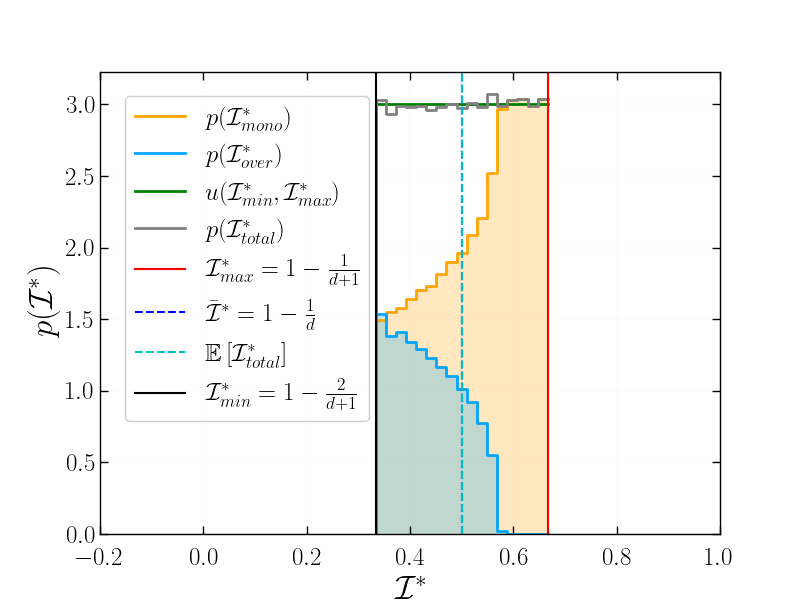

In [271]:
# ----------------------------------------------------------------------------------------------------------------------------------
# USER OPTIONS
# ----------------------------------------------------------------------------------------------------------------------------------
# Whether to load the data from the file or use the data from the current run
load_figure_data = True # True
# Whether to calculate all data points from the raw data
calculate_figure_data = True # True
# Whether to save the figure to a file
save_figure = True # False
# ----------------------------------------------------------------------------------------------------------------------------------
# LOAD DATA
# ----------------------------------------------------------------------------------------------------------------------------------
# Set the figure number
figure_number = 53
# Check if the data should be loaded from the file
if load_figure_data:        
    # Find data files in the directory for the specified figure number
    files_found = [name for name in os.listdir('../dat') if name.startswith(f'Figure_{figure_number:02}')]
    print(f'Files found: {files_found}')
    n_files = len(files_found)
    n_tasks = n_files # Alias for readability
    # Check if there are any data files for the specified figure number
    if n_files > 0:
        n_tasks = n_files
    else:
        raise ValueError("No data files found for the specified figure number.")    
    # Preload dims, gammas and n_gates from the first data file to initialize them before the loop
    if figure_number == 3:
        n_tasks -= 1 # d=2, figure=3
    data = load_data(figure_number, 2)
    dims = data['dims']
    gammas = data['gammas']
    n_gates = data['n_gates'] 
    times = data['times']
    # Pre-allocate space for the AGI data
    AGIs_data_d = []
    AGIs_d = []
    # Loop over the dimensions
    for d_idx, d in enumerate(dims):   
        # Pre-allocate space for the AGI data per dimension 
        AGIs_temp = []      
        # Loop over the number of tasks/ data files
        for n in range(1, n_tasks + 1):
            # TIMING
            start_time = time.time()
            # Load the data from file number n
            data = load_data(figure_number, n)
            # Append the AGI data to the temporary list      
            AGIs_temp.append(data['AGIs_d'][d_idx])
            # TIMING
            end_time = time.time()
            print(f'TASK {n:03} / {n_tasks:03} : {end_time - start_time:.2f} seconds')
        # Concatenate all the elements of AGIs_temp together
        AGIs = np.concatenate(AGIs_temp, axis = 0)
        # Append the concatenated AGI data to the main list
        AGIs_data_d.append(AGIs)
    # Save to original variable name
    AGIs_d = AGIs_data_d
    n_gates = len(AGIs_d[0])

print(f'Number of Gates : {n_gates}')

if calculate_figure_data:
    # Pre-allocate space for the AGI curves
    gates_with_turning_points = []
    gates_with_second_order_turning_points = []
    curves_with_turning_points = []
    curves_with_second_order_turning_points = []
    curves_without_turning_points = []
    tp_indices_gates = []

    gammas_fill = np.linspace(1e-6, 1e6, 1000)
    hatch_list = ['//', 'xx']
    fill_list = ['k', 'k']

    if n_gates > 100000:
        # Generate 100000 random integers from 0 to n_gates
        indices = np.random.choice(n_gates, 100000)
        # Select the AGIs_data_d[0] using indices
        AGIs = AGIs_d[0][indices]
    n_gates = len(AGIs)

    print(f'Number of Gates : {n_gates}')

    # Iterate through each gate
    for n in range(n_gates):
        # Calculate the gradient (difference) of the AGI values along the curve
        gradient = np.diff(AGIs[n])    
        # Fix tolerance on gradients to remove numerical errors near zero
        if figure_number == 33:
            gradient = np.where(np.abs(gradient) < 1e-6, 0, gradient)
        # Find where the gradient changes sign from + to -
        # This indicates that the curve had a maximum and started to decrease
        tp_indices = np.where(np.diff(np.sign(gradient)) < -1)
        turning_points = tp_indices[0]

        if len(turning_points) > 0:
            gates_with_turning_points.append(n)
            tp_indices_gates.append(turning_points[0])

    # peak_plateau_threshold = 1e-2
    # Populate the lists based on whether a curve has a turning point
    for n in range(n_gates):
        if n in gates_with_turning_points:
            # if np.max(AGIs[n]) - AGIs[n][-1] > peak_plateau_threshold:
            curves_with_turning_points.append(AGIs[n])
            # else:
            #     curves_without_turning_points.append(AGIs[n])
        else:
            curves_without_turning_points.append(AGIs[n])

    print(f'Number of Gates with Turning Points : {len(gates_with_turning_points)}')
    print(f'Number of Gates with Peak values above threshold : {len(curves_with_turning_points)}')
    print(f'Number of Gates without peaks : {len(curves_without_turning_points)}')

    # Convert lists to NumPy arrays
    curves_without_turning_points_array = np.array(curves_without_turning_points)
    curves_with_turning_points_array = np.array(curves_with_turning_points)

    d = dims[-1]

    print(f'd = {d}')

    n_bins = int(np.ceil(np.log2(n_gates + 1))) # Sturges formula
    if d==4 or d==8:
        n_bins = 100
    if d==16:
        n_bins=200
    bin_range = (1 - 2 / (d + 1), 1 - 1 / (d + 1))

    # Zoom in on bin_ranges for specific figures where the data is highly localised
    # if figure_number == 163:
    #     bin_range = (0.93, 1 - 1 / (d + 1)) # d = 16
    # elif figure_number == 83:
    # #     bin_range = (0.85, 1 - 1 / (d + 1)) # d = 8
    # if figure_number == 23:
    #     bin_range = (1 - 2 / (d + 1), 0.5) # bristol.gen_cue   
    AGI_max = np.max(AGIs[:, -1])
    AGI_min = np.min(AGIs[:, -1])
    AGI_avg = np.mean(AGIs[:, -1])
    AGI_std = np.std(AGIs[:, -1])
    AGI_med = np.median(AGIs[:, -1])
    AGI_std_max = AGI_avg + AGI_std
    AGI_std_min = AGI_avg - AGI_std 

    AGI_counts, AGI_bins = np.histogram(AGIs[:, -1], bins = n_bins, range = bin_range)

    AGI_bars = AGI_counts / (sum(AGI_counts) * np.diff(AGI_bins)) 



    curves_without_counts, noTP_bins = np.histogram(curves_without_turning_points_array[:, -1], bins = n_bins, range = bin_range)
    
    curves_without_bars = curves_without_counts / (sum(AGI_counts) * np.diff(noTP_bins))

    no_TP_max = np.max(curves_without_turning_points_array[:, -1])
    no_TP_min = np.min(curves_without_turning_points_array[:, -1])
    no_TP_avg = np.mean(curves_without_turning_points_array[:, -1])
    no_TP_std = np.std(curves_without_turning_points_array[:, -1])
    no_TP_med = np.median(curves_without_turning_points_array[:, -1])
    no_TP_std_max = no_TP_avg + no_TP_std
    no_TP_std_min = no_TP_avg - no_TP_std    

    if len(curves_with_turning_points_array) > 0:
        
        curves_with_counts, TP_bins = np.histogram(curves_with_turning_points_array[:, -1], bins = n_bins, range = bin_range)
        
        curves_with_bars = curves_with_counts / (sum(AGI_counts) * np.diff(TP_bins))

        TP_max = np.max(curves_with_turning_points_array[:, -1])
        TP_min = np.min(curves_with_turning_points_array[:, -1])
        TP_avg = np.mean(curves_with_turning_points_array[:, -1])
        TP_std = np.std(curves_with_turning_points_array[:, -1])
        TP_med = np.median(curves_with_turning_points_array[:, -1])
        TP_std_max = TP_avg + TP_std
        TP_std_min = TP_avg - TP_std

    

    # from scipy.stats import weibull_min
    # from scipy.optimize import minimize
    # Define the Weibull PDF function
    def weibull_pdf(x, c, loc, scale):
        return weibull_min.pdf(x, c, loc=loc, scale=scale)
    bin_centers = (AGI_bins[:-1] + AGI_bins[1:]) / 2
    # Initial guesses for the parameters
    if d==4:
        initial_shape = 9.791693380449274  # initial guess for shape
        initial_loc = 0.5706172416734936  # initial guess for location
        initial_scale = 0.18919131291522107  # initial guess for scale
    elif d==8: 
        initial_shape = 350  # initial guess for shape
        initial_loc = -0.725  # initial guess for location
        initial_scale = 1.6  # initial guess for scale     
    elif d==16:
        initial_shape = 11  # initial guess for shape
        initial_loc = 0.9275  # initial guess for location
        initial_scale = 0.009  # initial guess for scale   
    # Fit the Weibull distribution to the histogram data
    popt, pcov = curve_fit(weibull_pdf, bin_centers, AGI_bars, p0=[initial_shape, initial_loc, initial_scale])
    # Extract the fitted parameters
    fitted_shape, fitted_loc, fitted_scale = popt
    print(f"Fitted Weibull parameters: shape={fitted_shape}, loc={fitted_loc}, scale={fitted_scale}")
    # Generate the Weibull PDF with the fitted parameters
    x_data = np.linspace(0, 1, 1000)
    fitted_weibull_pdf = weibull_min.pdf(x_data, fitted_shape, loc=fitted_loc, scale=fitted_scale)

    # Reference distribution
    if d == 2:
        ref_dist = np.ones(n_bins) / ((1 - 1 / (d + 1)) - (1 - 2 / (d + 1)))  # Uniform distribution
    else:
        ref_dist = weibull_min.pdf(bin_centers, fitted_shape, loc=fitted_loc, scale=fitted_scale)

    # Calculate KL Divergence
    # from scipy.stats import entropy
    kl_divergence = entropy(AGI_bars, ref_dist)
    if d==16:
        kl_divergence = entropy(AGI_bars[170:199], ref_dist[170:199])

    # Calculate R^2
    # Observed frequencies (histogram counts)
    observed = AGI_bars # AGI_bars
    # Expected frequencies (reference distribution)
    expected = ref_dist

    # Total sum of squares (SS_tot)
    ss_tot = np.sum((observed - np.mean(observed))**2)
    # Residual sum of squares (SS_res)
    ss_res = np.sum((observed - expected)**2)
    # R^2 calculation
    r_squared = 1 - (ss_res / ss_tot)    

# ----------------------------------------------------------------------------------------------------------------------------------
# PLOT FIGURES
# ----------------------------------------------------------------------------------------------------------------------------------

print(f"KL Divergence: {kl_divergence:.4e}")
print(f'1 - R^2: {1-r_squared:.4e}')

print(f'AGI avg : {AGI_avg}')
print(f'Haar avg: {1 - 1 / (d)}')
print(f'Relative error: {np.abs((AGI_avg - (1 - 1 / (d))) / (1 - 1 / (d)))}')

print(f'Number of Gates : {n_gates}')
print(f'Number of Bins : {n_bins}')
print(f'Number of Gates with 0 TP : {len(curves_without_turning_points)}')
print(f'Number of Gates with 1 TP : {len(curves_with_turning_points)}')

print(f'Fraction of Gates with 0 TP : {len(curves_without_turning_points) / n_gates}')
print(f'Fraction of Gates with 1 TP : {len(curves_with_turning_points) / n_gates}')

print(f'AGI mean : {np.mean(AGI_bars)}')
print(f'AGI std : {np.std(AGI_bars)}')

plt.clf()
plt.close()
plt.figure()

plt.bar(noTP_bins[:-1], curves_without_bars, width = np.diff(noTP_bins), color = 'orange', alpha = 0.25, align = 'edge')
plt.step(noTP_bins[0:], np.concatenate([[0], curves_without_bars]), color = 'orange', alpha = 1, label = r'$p(\mathcal{I}^*_{mono})$')
if len(curves_with_turning_points_array) > 0:
    plt.bar(TP_bins[:-1], curves_with_bars, width = np.diff(TP_bins), color = (0, 165/255.0, 1), alpha = 0.25, align = 'edge')
    plt.step(TP_bins[0:], np.concatenate([[0], curves_with_bars]), color = (0, 165/255.0, 1), alpha = 1, label = r'$p(\mathcal{I}^*_{over})$')

if d ==2:
    plt.step(AGI_bins[0:], np.concatenate([[0], ref_dist]), color = 'g', linestyle = '-', alpha = 1, label = r'$u(\mathcal{I}^*_{min}, \mathcal{I}^*_{max})$')
else:
    x_data = np.linspace(bin_range[0], bin_range[1], 1000)
    fitted_weibull_pdf = weibull_min.pdf(x_data, fitted_shape, loc=fitted_loc, scale=fitted_scale)
    plt.plot(x_data, fitted_weibull_pdf, color = 'g', linestyle = '-', linewidth=2, label=r'$f(\mathcal{I}^*;\mathcal{I}^*_0,k,\lambda)$')

plt.step(AGI_bins[0:], np.concatenate([[0], AGI_bars]), color = 'gray', linewidth=2, alpha = 1, label = r'$p(\mathcal{I}^*_{total})$')

plt.axvline(x = 1 - 1 / (d + 1), color = 'r', linestyle = '-', linewidth = 1.5, label = r'$\mathcal{I}^*_{max} = 1-\frac{1}{d+1}$')
plt.axvline(x = 1 - 1/d, color = 'b', linestyle = '--', linewidth = 1.5, label = r'$\bar{\mathcal{I}}^* = 1-\frac{1}{d}$')
plt.axvline(x = AGI_avg, color = 'c', linestyle = '--', linewidth = 1.5, label = r'$\mathbb{E}\left[\mathcal{I}^*_{total}\right]$')
plt.axvline(x = 1 - 2 / (d + 1), color = 'k', linestyle = '-', linewidth = 1.5, label = r'$\mathcal{I}^*_{min} = 1 - \frac{2}{d+1}$')


# plt.tick_params(bottom = True, top = True, left = True, right = True)
# plt.tick_params(axis = 'both', which = 'both', direction = 'in')
# plt.tick_params(axis='both', which='major', labelsize=ticks_label_font_size, direction = tick_direction, size = major_tick_length, width = major_tick_width)
# plt.tick_params(axis='both', which='minor', labelsize=ticks_label_font_size, direction = tick_direction, size = minor_tick_length, width = minor_tick_width)

plt.xlim(-0.2, 1)
legend_xpos = 0.02
if d>=4:
    plt.xlim(1 - 2 / (d + 1) - 0.01, 1 - 1 / (d + 1) + 0.01)
    legend_xpos = 0.15

plt.rcParams['axes.linewidth'] = 1  # Set the thickness of the axes lines

legend = plt.legend(loc='upper left', bbox_to_anchor=(legend_xpos, 0.975), ncol=1)#, fontsize = plot_legend_font_size)

plt.xlabel(r'$\mathcal{I}^*$')
plt.ylabel(r'$p(\mathcal{I}^*)$')

figure_number=15
subfigure = 'c'
if save_figure:
    plt.savefig(f'../fig/Figure_{figure_number:02}{subfigure}.pdf', format='pdf', bbox_inches='tight')

plt.show()

## <span style="font-size: 36px; font-family: Arial, sans-serif">SUBFIGURE D</span>

### <span style="font-size: 24px; font-family: Arial, sans-serif">Generate Data</span>

In [ ]:
# ----------------------------------------------------------------------------------------------------------------------------------
# IMPORTS
# ----------------------------------------------------------------------------------------------------------------------------------

import paper_imports
import paper_methods

from paper_imports import *
from paper_methods import *

importlib.reload(paper_imports)
importlib.reload(paper_methods)

import paper_imports
import paper_methods

from paper_imports import *
from paper_methods import *

# ----------------------------------------------------------------------------------------------------------------------------------
# USER OPTIONS
# ----------------------------------------------------------------------------------------------------------------------------------

# Save data to file
save_figure_data : bool = True

# ----------------------------------------------------------------------------------------------------------------------------------
# HPC SETTINGS
# ----------------------------------------------------------------------------------------------------------------------------------

# Get script file name
script_file_name : str = "paper_figure_03.py"

task_count, task_id, n_CPUs, figure_number = get_SLURM_Data(script_file_name)

task_id = 10

print = functools.partial(print, flush = True)

# ----------------------------------------------------------------------------------------------------------------------------------
# START OF SCRIPT
# ----------------------------------------------------------------------------------------------------------------------------------

# START TIMING
start_time : float = time.time()
# Convert start time to real-world time
real_world_start_time : str = time.strftime("%y-%m-%d_%X_%Z").replace("/", "-").replace(":", "-")

# Set the figure number
figure_number : int = 63
# Set the method for generating gates
method : str = 'cirq_random_special_unitary'
# Set collapse operator
collapse_operator : str = 'z'
# Set dimensions for the qudits
dims : list[int] = [2]
d_max : int = dims[-1]
# Set the range of noise strengths for the collapse operator
gamma_min : float = 1e-2
gamma_max : float = 1e+4
gamma_num : int = 50
gammas_ndarray : np.ndarray = np.geomspace(gamma_min, gamma_max, gamma_num, dtype = np.float64)
gammas : list[float] = gammas_ndarray.tolist()
# Set alias for gamma_num for readability
n_gammas : int = gamma_num
# Set number of random quantum gates
n_gates : int = 100#200 * n_CPUs
# Set parallelization parameters
parallel_verbosity : int = 11
n_jobs : int = n_CPUs
batch_size : int = int(n_gates / n_jobs)   
# Set times for the propagator; currently set to just one value, 1.0
times : float = 1.0
# Set y threshold on AGI to identify curves with or without peaks
y_threshold : float = 1e-3
# Set options for the mesolve function (solver options for differential equations)
options_mesolve : qt.Options = qt.Options()
options_mesolve.method = 'bdf'  # Setting method to 'bdf' (backward differentiation formula)
options_mesolve.max_step = float(0.001) # type: ignore 
options_mesolve.nsteps = float(1000000) # type: ignore
options_mesolve.rtol = float(1e-8)  # Relative tolerance
options_mesolve.atol = float(1e-8)  # Absolute tolerance

# Pre-allocate space for data
AGIs_d : list = []
super_gates_d : list = []
hamiltonians_d : list = []
hamiltonians_d_traceless : list = []
AGIs_with_turning_points_indices : list = []
AGIs_without_turning_points_indices : list = []

# Print the config parameters
print(f"STARTING TIMESTAMP: {real_world_start_time}")
print('\n')
print('PRINTING CONFIG PARAMETERS:')
print('---------------------------')
print('\n')
print(f"CURRENT TASK : {task_id:03} / {task_count:03}")
print(f'MODIFIED FIGURE NUMBER : {figure_number}')
print(f'SAVING FIGURE DATA : {save_figure_data}')
print('\n')
print(f"GATE GENERATION METHOD : {method}")
print (f"QUDIT DIMENSIONS : {dims}")
print(f'NUMBER OF GAMMAS : {n_gammas}')
print(f"GAMMAS : {gammas}")
print(f"COLLAPSE OPERATOR : {collapse_operator}")
print(f"NUMBER OF GATES : {n_gates}")
print(f"GATE TIMES : {times}")
print(f"ERROR THRESHOLD : {y_threshold}")
print('\n')
print(f"PARALLEL VERBOSITY : {parallel_verbosity}")
print(f"NUMBER OF PARALLEL JOBS : {n_jobs}")
print(f"BATCH SIZE PER JOB : {batch_size}")
print(f"OPTIONS FOR MESOLVE : {options_mesolve}")
print('\n')

# INITIALIZATION TIME
initialization_time : float = time.time()
print(f"Initialization time: {initialization_time - start_time}")

print('\n')

# Loop over the dimensions
for d in dims:

    # LOOP START TIME
    loop_start_time : float = time.time()  
    
    print(f"DIMENSION : {d:02} / {d_max:02}")

    # Initialize a qudit of dimension d
    qudit = Qudit(d = d)
    # Get qudit collapse operators
    j = qudit.get_j
    L : qt.Qobj = j(collapse_operator) # type: ignore    

    # Pre-allocate space for local data
    AGIs : np.ndarray = np.empty((n_gates, n_gammas), dtype=np.float64)
    # AGIs_traceless : np.ndarray = np.empty((n_gates, n_gammas), dtype=np.float64)
    AGF : np.ndarray = np.empty((n_gates, n_gammas), dtype=np.float64)
    # AGF_traceless : np.ndarray = np.empty((n_gates, n_gammas), dtype=np.float64)

    # LOOP INITIALIZATION TIME
    loop_initialization_time : float = time.time()
    print(f"Loop initialization time: {loop_initialization_time - loop_start_time}")    

    # Generate a list of random unitary gates and Hamiltonians
    super_gates, hamiltonians = generate_gates_and_hamiltonians(n_gates, d, method = method, n_jobs = n_jobs, batch_size = batch_size, is_super = True) # method = 'circular' or 'random' or 'haar' or 'hermitian' or 'cirq_random_unitary' or 'cirq_random_special_unitary'

    # hamiltonians_traceless = [h - h.tr() * qt.qeye(d) / d for h in hamiltonians]

    super_gates_d.append(super_gates)
    hamiltonians_d.append(hamiltonians)
    # hamiltonians_d_traceless.append(hamiltonians_traceless)

    # GATE GENERATION TIME
    gate_generation_time : float = time.time()
    print(f"Gate generation time: {gate_generation_time - initialization_time}")

    # Loop over number of gammas
    for idx_g, g in enumerate(gammas):

        # GAMMA FIDELITY START TIME
        gamma_fidelity_start_time : float = time.time()

        # Parallelize the gates loop
        AGF[:, idx_g] = Parallel(n_jobs = n_jobs, batch_size = batch_size, verbose = parallel_verbosity)(delayed(compute_fidelity)(hamiltonians[idx], gate, L, times, d, g, options_mesolve) for idx, gate in enumerate(super_gates)) # type : ignore
        # AGF_traceless[:, idx_g] = Parallel(n_jobs = n_jobs, batch_size = batch_size, verbose = parallel_verbosity)(delayed(compute_fidelity)(hamiltonians_traceless[idx], gate, L, times, d, g, options_mesolve) for idx, gate in enumerate(super_gates)) # type : ignore
        # AGIs_traceless[:, idx_g] = 1 - AGF_traceless[:, idx_g]
        AGIs[:, idx_g] = 1 - AGF[:, idx_g]

        # GAMMA FIDELITY TIME
        gamma_fidelity_time : float = time.time()
        print(f"Gamma: {idx_g + 1:03} / {n_gammas:03} completed in: {gamma_fidelity_time - gamma_fidelity_start_time}") 

    # Store the AGI data per dimension  
    AGIs_d.append(AGIs)

    # FIDELITY TIME
    fidelity_time = time.time()
    print(f"Fidelity time: {fidelity_time - gate_generation_time}")

    # # Find the roots of the AGI curves
    # root_results = Parallel(n_jobs = n_jobs, batch_size = batch_size, verbose = parallel_verbosity)(delayed(find_AGI_plateau_roots)(AGIs[n], gammas_ndarray, y_threshold, index = n) for n in range(n_gates)) # type : ignore

    # # Differentiate between AGI curves with and without turning points based on how many times they cross the plateau line
    # for n in range(n_gates):
    #     if len(root_results[n][1]) == 3:
    #         AGIs_with_turning_points_indices.append(n)
    #     elif len(root_results[n][1]) == 1:
    #         AGIs_without_turning_points_indices.append(n)        

    # ROOT FINDING TIME
    root_finding_time : float = time.time()
    print(f"Root finding time: {root_finding_time - fidelity_time}")

    # SINGLE LOOP TIME
    loop_time = time.time()
    print(f"Single loop time: {loop_time - loop_start_time}")

    print('\n')

# TOTAL LOOP TIME
total_loop_time = time.time()
print(f"Total loop time: {total_loop_time - start_time}")

# Save the data
if save_figure_data:
    save_data(figure_number, task_id, dims = dims, gammas = gammas, n_gates = n_gates, times = times, AGIs_d = AGIs_d, hamiltonians_d = hamiltonians_d, AGIs_with_turning_points_indices = AGIs_with_turning_points_indices, AGIs_without_turning_points_indices = AGIs_without_turning_points_indices)

# SAVE DATA TIME
save_data_time = time.time()
print(f"Save data time: {save_data_time - total_loop_time}")

# TOTAL TIME
total_time = time.time()
print(f"Total time: {total_time - start_time}")

### <span style="font-size: 24px; font-family: Arial, sans-serif">Plot Figure</span>

Files found: ['Figure_63_results_001.blob', 'Figure_63_results_002.blob', 'Figure_63_results_003.blob', 'Figure_63_results_004.blob', 'Figure_63_results_005.blob']
TASK 001 / 005 : 0.56 seconds
TASK 002 / 005 : 2.07 seconds
TASK 003 / 005 : 0.53 seconds
TASK 004 / 005 : 0.55 seconds
TASK 005 / 005 : 0.54 seconds
Number of Gates : 100000
Number of Gates : 100000
Number of Gates with Turning Points : 38336
Number of Gates with Peak values above threshold : 38336
Number of Gates without peaks : 61664
d = 2
Fitted Weibull parameters: shape=2.16046544572086, loc=0.2643097687314268, scale=0.28771501646085124
KL Divergence: 1.3160e-04
1 - R^2: 1.0000e+00
AGI avg : 0.5003417484752304
Haar avg: 0.5
Relative error: 0.0006834969504607713
Number of Gates : 100000
Number of Bins : 17
Number of Gates with 0 TP : 61664
Number of Gates with 1 TP : 38336
Fraction of Gates with 0 TP : 0.61664
Fraction of Gates with 1 TP : 0.38336
AGI mean : 3.0
AGI std : 0.048574715645076726


/home/jgkh/.local/lib/python3.9/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)


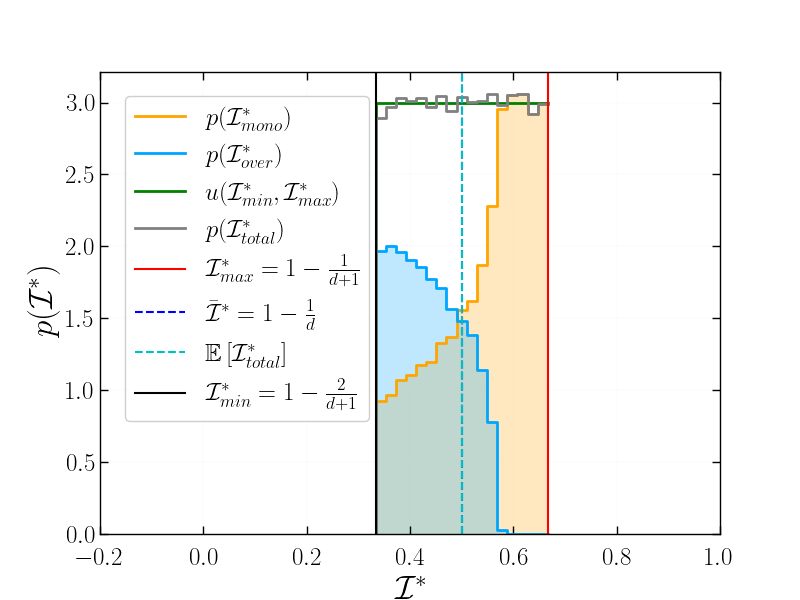

In [272]:
# ----------------------------------------------------------------------------------------------------------------------------------
# USER OPTIONS
# ----------------------------------------------------------------------------------------------------------------------------------
# Whether to load the data from the file or use the data from the current run
load_figure_data = True # True
# Whether to calculate all data points from the raw data
calculate_figure_data = True # True
# Whether to save the figure to a file
save_figure = True # False
# ----------------------------------------------------------------------------------------------------------------------------------
# LOAD DATA
# ----------------------------------------------------------------------------------------------------------------------------------
# Set the figure number
figure_number = 63
# Check if the data should be loaded from the file
if load_figure_data:        
    # Find data files in the directory for the specified figure number
    files_found = [name for name in os.listdir('../dat') if name.startswith(f'Figure_{figure_number:02}')]
    print(f'Files found: {files_found}')
    n_files = len(files_found)
    n_tasks = n_files # Alias for readability
    # Check if there are any data files for the specified figure number
    if n_files > 0:
        n_tasks = n_files
    else:
        raise ValueError("No data files found for the specified figure number.")    
    # Preload dims, gammas and n_gates from the first data file to initialize them before the loop
    if figure_number == 3:
        n_tasks -= 1 # d=2, figure=3
    data = load_data(figure_number, 2)
    dims = data['dims']
    gammas = data['gammas']
    n_gates = data['n_gates'] 
    times = data['times']
    # Pre-allocate space for the AGI data
    AGIs_data_d = []
    AGIs_d = []
    # Loop over the dimensions
    for d_idx, d in enumerate(dims):   
        # Pre-allocate space for the AGI data per dimension 
        AGIs_temp = []      
        # Loop over the number of tasks/ data files
        for n in range(1, n_tasks + 1):
            # TIMING
            start_time = time.time()
            # Load the data from file number n
            data = load_data(figure_number, n)
            # Append the AGI data to the temporary list      
            AGIs_temp.append(data['AGIs_d'][d_idx])
            # TIMING
            end_time = time.time()
            print(f'TASK {n:03} / {n_tasks:03} : {end_time - start_time:.2f} seconds')
        # Concatenate all the elements of AGIs_temp together
        AGIs = np.concatenate(AGIs_temp, axis = 0)
        # Append the concatenated AGI data to the main list
        AGIs_data_d.append(AGIs)
    # Save to original variable name
    AGIs_d = AGIs_data_d
    n_gates = len(AGIs_d[0])

print(f'Number of Gates : {n_gates}')

if calculate_figure_data:
    # Pre-allocate space for the AGI curves
    gates_with_turning_points = []
    gates_with_second_order_turning_points = []
    curves_with_turning_points = []
    curves_with_second_order_turning_points = []
    curves_without_turning_points = []
    tp_indices_gates = []

    gammas_fill = np.linspace(1e-6, 1e6, 1000)
    hatch_list = ['//', 'xx']
    fill_list = ['k', 'k']

    if n_gates > 100000:
        # Generate 100000 random integers from 0 to n_gates
        indices = np.random.choice(n_gates, 100000)
        # Select the AGIs_data_d[0] using indices
        AGIs = AGIs_d[0][indices]
    n_gates = len(AGIs)

    print(f'Number of Gates : {n_gates}')

    # Iterate through each gate
    for n in range(n_gates):
        # Calculate the gradient (difference) of the AGI values along the curve
        gradient = np.diff(AGIs[n])    
        # Fix tolerance on gradients to remove numerical errors near zero
        if figure_number == 33:
            gradient = np.where(np.abs(gradient) < 1e-6, 0, gradient)
        # Find where the gradient changes sign from + to -
        # This indicates that the curve had a maximum and started to decrease
        tp_indices = np.where(np.diff(np.sign(gradient)) < -1)
        turning_points = tp_indices[0]

        if len(turning_points) > 0:
            gates_with_turning_points.append(n)
            tp_indices_gates.append(turning_points[0])

    # peak_plateau_threshold = 1e-2
    # Populate the lists based on whether a curve has a turning point
    for n in range(n_gates):
        if n in gates_with_turning_points:
            # if np.max(AGIs[n]) - AGIs[n][-1] > peak_plateau_threshold:
            curves_with_turning_points.append(AGIs[n])
            # else:
            #     curves_without_turning_points.append(AGIs[n])
        else:
            curves_without_turning_points.append(AGIs[n])

    print(f'Number of Gates with Turning Points : {len(gates_with_turning_points)}')
    print(f'Number of Gates with Peak values above threshold : {len(curves_with_turning_points)}')
    print(f'Number of Gates without peaks : {len(curves_without_turning_points)}')

    # Convert lists to NumPy arrays
    curves_without_turning_points_array = np.array(curves_without_turning_points)
    curves_with_turning_points_array = np.array(curves_with_turning_points)

    d = dims[-1]

    print(f'd = {d}')

    n_bins = int(np.ceil(np.log2(n_gates + 1))) # Sturges formula
    if d==4 or d==8:
        n_bins = 100
    if d==16:
        n_bins=200
    bin_range = (1 - 2 / (d + 1), 1 - 1 / (d + 1))

    # Zoom in on bin_ranges for specific figures where the data is highly localised
    # if figure_number == 163:
    #     bin_range = (0.93, 1 - 1 / (d + 1)) # d = 16
    # elif figure_number == 83:
    # #     bin_range = (0.85, 1 - 1 / (d + 1)) # d = 8
    # if figure_number == 23:
    #     bin_range = (1 - 2 / (d + 1), 0.5) # bristol.gen_cue   
    AGI_max = np.max(AGIs[:, -1])
    AGI_min = np.min(AGIs[:, -1])
    AGI_avg = np.mean(AGIs[:, -1])
    AGI_std = np.std(AGIs[:, -1])
    AGI_med = np.median(AGIs[:, -1])
    AGI_std_max = AGI_avg + AGI_std
    AGI_std_min = AGI_avg - AGI_std 

    AGI_counts, AGI_bins = np.histogram(AGIs[:, -1], bins = n_bins, range = bin_range)

    AGI_bars = AGI_counts / (sum(AGI_counts) * np.diff(AGI_bins)) 



    curves_without_counts, noTP_bins = np.histogram(curves_without_turning_points_array[:, -1], bins = n_bins, range = bin_range)
    
    curves_without_bars = curves_without_counts / (sum(AGI_counts) * np.diff(noTP_bins))

    no_TP_max = np.max(curves_without_turning_points_array[:, -1])
    no_TP_min = np.min(curves_without_turning_points_array[:, -1])
    no_TP_avg = np.mean(curves_without_turning_points_array[:, -1])
    no_TP_std = np.std(curves_without_turning_points_array[:, -1])
    no_TP_med = np.median(curves_without_turning_points_array[:, -1])
    no_TP_std_max = no_TP_avg + no_TP_std
    no_TP_std_min = no_TP_avg - no_TP_std    

    if len(curves_with_turning_points_array) > 0:
        
        curves_with_counts, TP_bins = np.histogram(curves_with_turning_points_array[:, -1], bins = n_bins, range = bin_range)
        
        curves_with_bars = curves_with_counts / (sum(AGI_counts) * np.diff(TP_bins))

        TP_max = np.max(curves_with_turning_points_array[:, -1])
        TP_min = np.min(curves_with_turning_points_array[:, -1])
        TP_avg = np.mean(curves_with_turning_points_array[:, -1])
        TP_std = np.std(curves_with_turning_points_array[:, -1])
        TP_med = np.median(curves_with_turning_points_array[:, -1])
        TP_std_max = TP_avg + TP_std
        TP_std_min = TP_avg - TP_std

    

    # from scipy.stats import weibull_min
    # from scipy.optimize import minimize
    # Define the Weibull PDF function
    def weibull_pdf(x, c, loc, scale):
        return weibull_min.pdf(x, c, loc=loc, scale=scale)
    bin_centers = (AGI_bins[:-1] + AGI_bins[1:]) / 2
    # Initial guesses for the parameters
    if d==4:
        initial_shape = 9.791693380449274  # initial guess for shape
        initial_loc = 0.5706172416734936  # initial guess for location
        initial_scale = 0.18919131291522107  # initial guess for scale
    elif d==8: 
        initial_shape = 350  # initial guess for shape
        initial_loc = -0.725  # initial guess for location
        initial_scale = 1.6  # initial guess for scale     
    elif d==16:
        initial_shape = 11  # initial guess for shape
        initial_loc = 0.9275  # initial guess for location
        initial_scale = 0.009  # initial guess for scale   
    # Fit the Weibull distribution to the histogram data
    popt, pcov = curve_fit(weibull_pdf, bin_centers, AGI_bars, p0=[initial_shape, initial_loc, initial_scale])
    # Extract the fitted parameters
    fitted_shape, fitted_loc, fitted_scale = popt
    print(f"Fitted Weibull parameters: shape={fitted_shape}, loc={fitted_loc}, scale={fitted_scale}")
    # Generate the Weibull PDF with the fitted parameters
    x_data = np.linspace(0, 1, 1000)
    fitted_weibull_pdf = weibull_min.pdf(x_data, fitted_shape, loc=fitted_loc, scale=fitted_scale)

    # Reference distribution
    if d == 2:
        ref_dist = np.ones(n_bins) / ((1 - 1 / (d + 1)) - (1 - 2 / (d + 1)))  # Uniform distribution
    else:
        ref_dist = weibull_min.pdf(bin_centers, fitted_shape, loc=fitted_loc, scale=fitted_scale)

    # Calculate KL Divergence
    # from scipy.stats import entropy
    kl_divergence = entropy(AGI_bars, ref_dist)
    if d==16:
        kl_divergence = entropy(AGI_bars[170:199], ref_dist[170:199])

    # Calculate R^2
    # Observed frequencies (histogram counts)
    observed = AGI_bars # AGI_bars
    # Expected frequencies (reference distribution)
    expected = ref_dist

    # Total sum of squares (SS_tot)
    ss_tot = np.sum((observed - np.mean(observed))**2)
    # Residual sum of squares (SS_res)
    ss_res = np.sum((observed - expected)**2)
    # R^2 calculation
    r_squared = 1 - (ss_res / ss_tot)    

# ----------------------------------------------------------------------------------------------------------------------------------
# PLOT FIGURES
# ----------------------------------------------------------------------------------------------------------------------------------

print(f"KL Divergence: {kl_divergence:.4e}")
print(f'1 - R^2: {1-r_squared:.4e}')

print(f'AGI avg : {AGI_avg}')
print(f'Haar avg: {1 - 1 / (d)}')
print(f'Relative error: {np.abs((AGI_avg - (1 - 1 / (d))) / (1 - 1 / (d)))}')

print(f'Number of Gates : {n_gates}')
print(f'Number of Bins : {n_bins}')
print(f'Number of Gates with 0 TP : {len(curves_without_turning_points)}')
print(f'Number of Gates with 1 TP : {len(curves_with_turning_points)}')

print(f'Fraction of Gates with 0 TP : {len(curves_without_turning_points) / n_gates}')
print(f'Fraction of Gates with 1 TP : {len(curves_with_turning_points) / n_gates}')

print(f'AGI mean : {np.mean(AGI_bars)}')
print(f'AGI std : {np.std(AGI_bars)}')

plt.clf()
plt.close()
plt.figure()

plt.bar(noTP_bins[:-1], curves_without_bars, width = np.diff(noTP_bins), color = 'orange', alpha = 0.25, align = 'edge')
plt.step(noTP_bins[0:], np.concatenate([[0], curves_without_bars]), color = 'orange', alpha = 1, label = r'$p(\mathcal{I}^*_{mono})$')
if len(curves_with_turning_points_array) > 0:
    plt.bar(TP_bins[:-1], curves_with_bars, width = np.diff(TP_bins), color = (0, 165/255.0, 1), alpha = 0.25, align = 'edge')
    plt.step(TP_bins[0:], np.concatenate([[0], curves_with_bars]), color = (0, 165/255.0, 1), alpha = 1, label = r'$p(\mathcal{I}^*_{over})$')

if d ==2:
    plt.step(AGI_bins[0:], np.concatenate([[0], ref_dist]), color = 'g', linestyle = '-', alpha = 1, label = r'$u(\mathcal{I}^*_{min}, \mathcal{I}^*_{max})$')
else:
    x_data = np.linspace(bin_range[0], bin_range[1], 1000)
    fitted_weibull_pdf = weibull_min.pdf(x_data, fitted_shape, loc=fitted_loc, scale=fitted_scale)
    plt.plot(x_data, fitted_weibull_pdf, color = 'g', linestyle = '-', linewidth=2, label=r'$f(\mathcal{I}^*;\mathcal{I}^*_0,k,\lambda)$')

plt.step(AGI_bins[0:], np.concatenate([[0], AGI_bars]), color = 'gray', linewidth=2, alpha = 1, label = r'$p(\mathcal{I}^*_{total})$')

plt.axvline(x = 1 - 1 / (d + 1), color = 'r', linestyle = '-', linewidth = 1.5, label = r'$\mathcal{I}^*_{max} = 1-\frac{1}{d+1}$')
plt.axvline(x = 1 - 1/d, color = 'b', linestyle = '--', linewidth = 1.5, label = r'$\bar{\mathcal{I}}^* = 1-\frac{1}{d}$')
plt.axvline(x = AGI_avg, color = 'c', linestyle = '--', linewidth = 1.5, label = r'$\mathbb{E}\left[\mathcal{I}^*_{total}\right]$')
plt.axvline(x = 1 - 2 / (d + 1), color = 'k', linestyle = '-', linewidth = 1.5, label = r'$\mathcal{I}^*_{min} = 1 - \frac{2}{d+1}$')


# plt.tick_params(bottom = True, top = True, left = True, right = True)
# plt.tick_params(axis = 'both', which = 'both', direction = 'in')
# plt.tick_params(axis='both', which='major', labelsize=ticks_label_font_size, direction = tick_direction, size = major_tick_length, width = major_tick_width)
# plt.tick_params(axis='both', which='minor', labelsize=ticks_label_font_size, direction = tick_direction, size = minor_tick_length, width = minor_tick_width)

plt.xlim(-0.2, 1)
legend_xpos = 0.02
if d>=4:
    plt.xlim(1 - 2 / (d + 1) - 0.01, 1 - 1 / (d + 1) + 0.01)
    legend_xpos = 0.15

plt.rcParams['axes.linewidth'] = 1  # Set the thickness of the axes lines

legend = plt.legend(loc='upper left', bbox_to_anchor=(legend_xpos, 0.975), ncol=1)#, fontsize = plot_legend_font_size)

plt.xlabel(r'$\mathcal{I}^*$')
plt.ylabel(r'$p(\mathcal{I}^*)$')

figure_number=15
subfigure = 'd'
if save_figure:
    plt.savefig(f'../fig/Figure_{figure_number:02}{subfigure}.pdf', format='pdf', bbox_inches='tight')

plt.show()

# <span style="font-size: 60px; font-family: Arial, sans-serif">FIGURE 16</span>

## <span style="font-size: 36px; font-family: Arial, sans-serif">SUBFIGURE A</span>

### <span style="font-size: 24px; font-family: Arial, sans-serif">Generate Data</span>

In [ ]:
# ----------------------------------------------------------------------------------------------------------------------------------
# IMPORTS
# ----------------------------------------------------------------------------------------------------------------------------------

import paper_imports
import paper_methods

from paper_imports import *
from paper_methods import *

importlib.reload(paper_imports)
importlib.reload(paper_methods)

import paper_imports
import paper_methods

from paper_imports import *
from paper_methods import *

# ----------------------------------------------------------------------------------------------------------------------------------
# USER OPTIONS
# ----------------------------------------------------------------------------------------------------------------------------------

# Save data to file
save_figure_data : bool = True

# ----------------------------------------------------------------------------------------------------------------------------------
# HPC SETTINGS
# ----------------------------------------------------------------------------------------------------------------------------------

# Get script file name
script_file_name : str = "paper_figure_03.py"

task_count, task_id, n_CPUs, figure_number = get_SLURM_Data(script_file_name)

task_id = 10

print = functools.partial(print, flush = True)

# ----------------------------------------------------------------------------------------------------------------------------------
# START OF SCRIPT
# ----------------------------------------------------------------------------------------------------------------------------------

# START TIMING
start_time : float = time.time()
# Convert start time to real-world time
real_world_start_time : str = time.strftime("%y-%m-%d_%X_%Z").replace("/", "-").replace(":", "-")

# Set the figure number
figure_number : int = 3
# Set the method for generating gates
method : str = 'haar'
# Set collapse operator
collapse_operator : str = 'z'
# Set dimensions for the qudits
dims : list[int] = [2]
d_max : int = dims[-1]
# Set the range of noise strengths for the collapse operator
gamma_min : float = 1e-2
gamma_max : float = 1e+4
gamma_num : int = 50
gammas_ndarray : np.ndarray = np.geomspace(gamma_min, gamma_max, gamma_num, dtype = np.float64)
gammas : list[float] = gammas_ndarray.tolist()
# Set alias for gamma_num for readability
n_gammas : int = gamma_num
# Set number of random quantum gates
n_gates : int = 100#200 * n_CPUs
# Set parallelization parameters
parallel_verbosity : int = 11
n_jobs : int = n_CPUs
batch_size : int = int(n_gates / n_jobs)   
# Set times for the propagator; currently set to just one value, 1.0
times : float = 1.0
# Set y threshold on AGI to identify curves with or without peaks
y_threshold : float = 1e-3
# Set options for the mesolve function (solver options for differential equations)
options_mesolve : qt.Options = qt.Options()
options_mesolve.method = 'bdf'  # Setting method to 'bdf' (backward differentiation formula)
options_mesolve.max_step = float(0.001) # type: ignore 
options_mesolve.nsteps = float(1000000) # type: ignore
options_mesolve.rtol = float(1e-8)  # Relative tolerance
options_mesolve.atol = float(1e-8)  # Absolute tolerance

# Pre-allocate space for data
AGIs_d : list = []
super_gates_d : list = []
hamiltonians_d : list = []
hamiltonians_d_traceless : list = []
AGIs_with_turning_points_indices : list = []
AGIs_without_turning_points_indices : list = []

# Print the config parameters
print(f"STARTING TIMESTAMP: {real_world_start_time}")
print('\n')
print('PRINTING CONFIG PARAMETERS:')
print('---------------------------')
print('\n')
print(f"CURRENT TASK : {task_id:03} / {task_count:03}")
print(f'MODIFIED FIGURE NUMBER : {figure_number}')
print(f'SAVING FIGURE DATA : {save_figure_data}')
print('\n')
print(f"GATE GENERATION METHOD : {method}")
print (f"QUDIT DIMENSIONS : {dims}")
print(f'NUMBER OF GAMMAS : {n_gammas}')
print(f"GAMMAS : {gammas}")
print(f"COLLAPSE OPERATOR : {collapse_operator}")
print(f"NUMBER OF GATES : {n_gates}")
print(f"GATE TIMES : {times}")
print(f"ERROR THRESHOLD : {y_threshold}")
print('\n')
print(f"PARALLEL VERBOSITY : {parallel_verbosity}")
print(f"NUMBER OF PARALLEL JOBS : {n_jobs}")
print(f"BATCH SIZE PER JOB : {batch_size}")
print(f"OPTIONS FOR MESOLVE : {options_mesolve}")
print('\n')

# INITIALIZATION TIME
initialization_time : float = time.time()
print(f"Initialization time: {initialization_time - start_time}")

print('\n')

# Loop over the dimensions
for d in dims:

    # LOOP START TIME
    loop_start_time : float = time.time()  
    
    print(f"DIMENSION : {d:02} / {d_max:02}")

    # Initialize a qudit of dimension d
    qudit = Qudit(d = d)
    # Get qudit collapse operators
    j = qudit.get_j
    L : qt.Qobj = j(collapse_operator) # type: ignore    

    # Pre-allocate space for local data
    AGIs : np.ndarray = np.empty((n_gates, n_gammas), dtype=np.float64)
    # AGIs_traceless : np.ndarray = np.empty((n_gates, n_gammas), dtype=np.float64)
    AGF : np.ndarray = np.empty((n_gates, n_gammas), dtype=np.float64)
    # AGF_traceless : np.ndarray = np.empty((n_gates, n_gammas), dtype=np.float64)

    # LOOP INITIALIZATION TIME
    loop_initialization_time : float = time.time()
    print(f"Loop initialization time: {loop_initialization_time - loop_start_time}")    

    # Generate a list of random unitary gates and Hamiltonians
    super_gates, hamiltonians = generate_gates_and_hamiltonians(n_gates, d, method = method, n_jobs = n_jobs, batch_size = batch_size, is_super = True) # method = 'circular' or 'random' or 'haar' or 'hermitian' or 'cirq_random_unitary' or 'cirq_random_special_unitary'

    # hamiltonians_traceless = [h - h.tr() * qt.qeye(d) / d for h in hamiltonians]

    super_gates_d.append(super_gates)
    hamiltonians_d.append(hamiltonians)
    # hamiltonians_d_traceless.append(hamiltonians_traceless)

    # GATE GENERATION TIME
    gate_generation_time : float = time.time()
    print(f"Gate generation time: {gate_generation_time - initialization_time}")

    # Loop over number of gammas
    for idx_g, g in enumerate(gammas):

        # GAMMA FIDELITY START TIME
        gamma_fidelity_start_time : float = time.time()

        # Parallelize the gates loop
        AGF[:, idx_g] = Parallel(n_jobs = n_jobs, batch_size = batch_size, verbose = parallel_verbosity)(delayed(compute_fidelity)(hamiltonians[idx], gate, L, times, d, g, options_mesolve) for idx, gate in enumerate(super_gates)) # type : ignore
        # AGF_traceless[:, idx_g] = Parallel(n_jobs = n_jobs, batch_size = batch_size, verbose = parallel_verbosity)(delayed(compute_fidelity)(hamiltonians_traceless[idx], gate, L, times, d, g, options_mesolve) for idx, gate in enumerate(super_gates)) # type : ignore
        # AGIs_traceless[:, idx_g] = 1 - AGF_traceless[:, idx_g]
        AGIs[:, idx_g] = 1 - AGF[:, idx_g]

        # GAMMA FIDELITY TIME
        gamma_fidelity_time : float = time.time()
        print(f"Gamma: {idx_g + 1:03} / {n_gammas:03} completed in: {gamma_fidelity_time - gamma_fidelity_start_time}") 

    # Store the AGI data per dimension  
    AGIs_d.append(AGIs)

    # FIDELITY TIME
    fidelity_time = time.time()
    print(f"Fidelity time: {fidelity_time - gate_generation_time}")

    # # Find the roots of the AGI curves
    # root_results = Parallel(n_jobs = n_jobs, batch_size = batch_size, verbose = parallel_verbosity)(delayed(find_AGI_plateau_roots)(AGIs[n], gammas_ndarray, y_threshold, index = n) for n in range(n_gates)) # type : ignore

    # # Differentiate between AGI curves with and without turning points based on how many times they cross the plateau line
    # for n in range(n_gates):
    #     if len(root_results[n][1]) == 3:
    #         AGIs_with_turning_points_indices.append(n)
    #     elif len(root_results[n][1]) == 1:
    #         AGIs_without_turning_points_indices.append(n)        

    # ROOT FINDING TIME
    root_finding_time : float = time.time()
    print(f"Root finding time: {root_finding_time - fidelity_time}")

    # SINGLE LOOP TIME
    loop_time = time.time()
    print(f"Single loop time: {loop_time - loop_start_time}")

    print('\n')

# TOTAL LOOP TIME
total_loop_time = time.time()
print(f"Total loop time: {total_loop_time - start_time}")

# Save the data
if save_figure_data:
    save_data(figure_number, task_id, dims = dims, gammas = gammas, n_gates = n_gates, times = times, AGIs_d = AGIs_d, hamiltonians_d = hamiltonians_d, AGIs_with_turning_points_indices = AGIs_with_turning_points_indices, AGIs_without_turning_points_indices = AGIs_without_turning_points_indices)

# SAVE DATA TIME
save_data_time = time.time()
print(f"Save data time: {save_data_time - total_loop_time}")

# TOTAL TIME
total_time = time.time()
print(f"Total time: {total_time - start_time}")

### <span style="font-size: 24px; font-family: Arial, sans-serif">Plot Figure</span>

Files found: ['Figure_03_results_001.blob', 'Figure_03_results_002.blob', 'Figure_03_results_003.blob', 'Figure_03_results_004.blob', 'Figure_03_results_005.blob', 'Figure_03_results_006.blob', 'Figure_03_results_007.blob', 'Figure_03_results_008.blob', 'Figure_03_results_009.blob', 'Figure_03_results_010.blob', 'Figure_03_results_011.blob', 'Figure_03_results_012.blob', 'Figure_03_results_013.blob', 'Figure_03_results_014.blob', 'Figure_03_results_015.blob', 'Figure_03_results_016.blob', 'Figure_03_results_017.blob', 'Figure_03_results_018.blob', 'Figure_03_results_019.blob', 'Figure_03_results_020.blob', 'Figure_03_results_021.blob', 'Figure_03_results_022.blob', 'Figure_03_results_023.blob', 'Figure_03_results_024.blob', 'Figure_03_results_025.blob', 'Figure_03_results_026.blob', 'Figure_03_results_027.blob', 'Figure_03_results_028.blob', 'Figure_03_results_029.blob', 'Figure_03_results_030.blob', 'Figure_03_results_031.blob', 'Figure_03_results_032.blob', 'Figure_03_results_033.blo

/home/jgkh/.local/lib/python3.9/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)


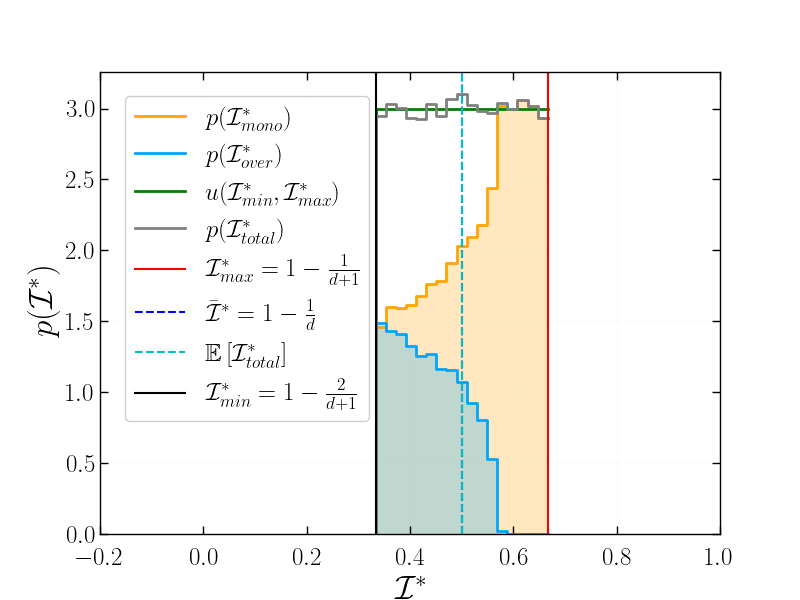

In [273]:
# ----------------------------------------------------------------------------------------------------------------------------------
# USER OPTIONS
# ----------------------------------------------------------------------------------------------------------------------------------
# Whether to load the data from the file or use the data from the current run
load_figure_data = True # True
# Whether to calculate all data points from the raw data
calculate_figure_data = True # True
# Whether to save the figure to a file
save_figure = True # False
# ----------------------------------------------------------------------------------------------------------------------------------
# LOAD DATA
# ----------------------------------------------------------------------------------------------------------------------------------
# Set the figure number
figure_number = 3
# Check if the data should be loaded from the file
if load_figure_data:        
    # Find data files in the directory for the specified figure number
    files_found = [name for name in os.listdir('../dat') if name.startswith(f'Figure_{figure_number:02}')]
    print(f'Files found: {files_found}')
    n_files = len(files_found)
    n_tasks = n_files # Alias for readability
    # Check if there are any data files for the specified figure number
    if n_files > 0:
        n_tasks = n_files
    else:
        raise ValueError("No data files found for the specified figure number.")    
    # Preload dims, gammas and n_gates from the first data file to initialize them before the loop
    if figure_number == 3:
        n_tasks -= 1 # d=2, figure=3
    data = load_data(figure_number, 2)
    dims = data['dims']
    gammas = data['gammas']
    n_gates = data['n_gates'] 
    times = data['times']
    # Pre-allocate space for the AGI data
    AGIs_data_d = []
    AGIs_d = []
    # Loop over the dimensions
    for d_idx, d in enumerate(dims):   
        # Pre-allocate space for the AGI data per dimension 
        AGIs_temp = []      
        # Loop over the number of tasks/ data files
        for n in range(1, n_tasks + 1):
            # TIMING
            start_time = time.time()
            # Load the data from file number n
            data = load_data(figure_number, n)
            # Append the AGI data to the temporary list      
            AGIs_temp.append(data['AGIs_d'][d_idx])
            # TIMING
            end_time = time.time()
            print(f'TASK {n:03} / {n_tasks:03} : {end_time - start_time:.2f} seconds')
        # Concatenate all the elements of AGIs_temp together
        AGIs = np.concatenate(AGIs_temp, axis = 0)
        # Append the concatenated AGI data to the main list
        AGIs_data_d.append(AGIs)
    # Save to original variable name
    AGIs_d = AGIs_data_d
    n_gates = len(AGIs_d[0])

print(f'Number of Gates : {n_gates}')

if calculate_figure_data:
    # Pre-allocate space for the AGI curves
    gates_with_turning_points = []
    gates_with_second_order_turning_points = []
    curves_with_turning_points = []
    curves_with_second_order_turning_points = []
    curves_without_turning_points = []
    tp_indices_gates = []

    gammas_fill = np.linspace(1e-6, 1e6, 1000)
    hatch_list = ['//', 'xx']
    fill_list = ['k', 'k']

    if n_gates > 100000:
        # Generate 100000 random integers from 0 to n_gates
        indices = np.random.choice(n_gates, 100000)
        # Select the AGIs_data_d[0] using indices
        AGIs = AGIs_d[0][indices]
    n_gates = len(AGIs)

    print(f'Number of Gates : {n_gates}')

    # Iterate through each gate
    for n in range(n_gates):
        # Calculate the gradient (difference) of the AGI values along the curve
        gradient = np.diff(AGIs[n])    
        # Fix tolerance on gradients to remove numerical errors near zero
        if figure_number == 33:
            gradient = np.where(np.abs(gradient) < 1e-6, 0, gradient)
        # Find where the gradient changes sign from + to -
        # This indicates that the curve had a maximum and started to decrease
        tp_indices = np.where(np.diff(np.sign(gradient)) < -1)
        turning_points = tp_indices[0]

        if len(turning_points) > 0:
            gates_with_turning_points.append(n)
            tp_indices_gates.append(turning_points[0])

    # peak_plateau_threshold = 1e-2
    # Populate the lists based on whether a curve has a turning point
    for n in range(n_gates):
        if n in gates_with_turning_points:
            # if np.max(AGIs[n]) - AGIs[n][-1] > peak_plateau_threshold:
            curves_with_turning_points.append(AGIs[n])
            # else:
            #     curves_without_turning_points.append(AGIs[n])
        else:
            curves_without_turning_points.append(AGIs[n])

    print(f'Number of Gates with Turning Points : {len(gates_with_turning_points)}')
    print(f'Number of Gates with Peak values above threshold : {len(curves_with_turning_points)}')
    print(f'Number of Gates without peaks : {len(curves_without_turning_points)}')

    # Convert lists to NumPy arrays
    curves_without_turning_points_array = np.array(curves_without_turning_points)
    curves_with_turning_points_array = np.array(curves_with_turning_points)

    d = dims[-1]

    print(f'd = {d}')

    n_bins = int(np.ceil(np.log2(n_gates + 1))) # Sturges formula
    if d==4 or d==8:
        n_bins = 100
    if d==16:
        n_bins=200
    bin_range = (1 - 2 / (d + 1), 1 - 1 / (d + 1))

    # Zoom in on bin_ranges for specific figures where the data is highly localised
    # if figure_number == 163:
    #     bin_range = (0.93, 1 - 1 / (d + 1)) # d = 16
    # elif figure_number == 83:
    # #     bin_range = (0.85, 1 - 1 / (d + 1)) # d = 8
    # if figure_number == 23:
    #     bin_range = (1 - 2 / (d + 1), 0.5) # bristol.gen_cue   
    AGI_max = np.max(AGIs[:, -1])
    AGI_min = np.min(AGIs[:, -1])
    AGI_avg = np.mean(AGIs[:, -1])
    AGI_std = np.std(AGIs[:, -1])
    AGI_med = np.median(AGIs[:, -1])
    AGI_std_max = AGI_avg + AGI_std
    AGI_std_min = AGI_avg - AGI_std 

    AGI_counts, AGI_bins = np.histogram(AGIs[:, -1], bins = n_bins, range = bin_range)

    AGI_bars = AGI_counts / (sum(AGI_counts) * np.diff(AGI_bins)) 



    curves_without_counts, noTP_bins = np.histogram(curves_without_turning_points_array[:, -1], bins = n_bins, range = bin_range)
    
    curves_without_bars = curves_without_counts / (sum(AGI_counts) * np.diff(noTP_bins))

    no_TP_max = np.max(curves_without_turning_points_array[:, -1])
    no_TP_min = np.min(curves_without_turning_points_array[:, -1])
    no_TP_avg = np.mean(curves_without_turning_points_array[:, -1])
    no_TP_std = np.std(curves_without_turning_points_array[:, -1])
    no_TP_med = np.median(curves_without_turning_points_array[:, -1])
    no_TP_std_max = no_TP_avg + no_TP_std
    no_TP_std_min = no_TP_avg - no_TP_std    

    if len(curves_with_turning_points_array) > 0:
        
        curves_with_counts, TP_bins = np.histogram(curves_with_turning_points_array[:, -1], bins = n_bins, range = bin_range)
        
        curves_with_bars = curves_with_counts / (sum(AGI_counts) * np.diff(TP_bins))

        TP_max = np.max(curves_with_turning_points_array[:, -1])
        TP_min = np.min(curves_with_turning_points_array[:, -1])
        TP_avg = np.mean(curves_with_turning_points_array[:, -1])
        TP_std = np.std(curves_with_turning_points_array[:, -1])
        TP_med = np.median(curves_with_turning_points_array[:, -1])
        TP_std_max = TP_avg + TP_std
        TP_std_min = TP_avg - TP_std

    

    # from scipy.stats import weibull_min
    # from scipy.optimize import minimize
    # Define the Weibull PDF function
    def weibull_pdf(x, c, loc, scale):
        return weibull_min.pdf(x, c, loc=loc, scale=scale)
    bin_centers = (AGI_bins[:-1] + AGI_bins[1:]) / 2
    # Initial guesses for the parameters
    if d==4:
        initial_shape = 9.791693380449274  # initial guess for shape
        initial_loc = 0.5706172416734936  # initial guess for location
        initial_scale = 0.18919131291522107  # initial guess for scale
    elif d==8: 
        initial_shape = 350  # initial guess for shape
        initial_loc = -0.725  # initial guess for location
        initial_scale = 1.6  # initial guess for scale     
    elif d==16:
        initial_shape = 11  # initial guess for shape
        initial_loc = 0.9275  # initial guess for location
        initial_scale = 0.009  # initial guess for scale   
    # Fit the Weibull distribution to the histogram data
    popt, pcov = curve_fit(weibull_pdf, bin_centers, AGI_bars, p0=[initial_shape, initial_loc, initial_scale])
    # Extract the fitted parameters
    fitted_shape, fitted_loc, fitted_scale = popt
    print(f"Fitted Weibull parameters: shape={fitted_shape}, loc={fitted_loc}, scale={fitted_scale}")
    # Generate the Weibull PDF with the fitted parameters
    x_data = np.linspace(0, 1, 1000)
    fitted_weibull_pdf = weibull_min.pdf(x_data, fitted_shape, loc=fitted_loc, scale=fitted_scale)

    # Reference distribution
    if d == 2:
        ref_dist = np.ones(n_bins) / ((1 - 1 / (d + 1)) - (1 - 2 / (d + 1)))  # Uniform distribution
    else:
        ref_dist = weibull_min.pdf(bin_centers, fitted_shape, loc=fitted_loc, scale=fitted_scale)

    # Calculate KL Divergence
    # from scipy.stats import entropy
    kl_divergence = entropy(AGI_bars, ref_dist)
    if d==16:
        kl_divergence = entropy(AGI_bars[170:199], ref_dist[170:199])

    # Calculate R^2
    # Observed frequencies (histogram counts)
    observed = AGI_bars # AGI_bars
    # Expected frequencies (reference distribution)
    expected = ref_dist

    # Total sum of squares (SS_tot)
    ss_tot = np.sum((observed - np.mean(observed))**2)
    # Residual sum of squares (SS_res)
    ss_res = np.sum((observed - expected)**2)
    # R^2 calculation
    r_squared = 1 - (ss_res / ss_tot)    

# ----------------------------------------------------------------------------------------------------------------------------------
# PLOT FIGURES
# ----------------------------------------------------------------------------------------------------------------------------------

print(f"KL Divergence: {kl_divergence:.4e}")
print(f'1 - R^2: {1-r_squared:.4e}')

print(f'AGI avg : {AGI_avg}')
print(f'Haar avg: {1 - 1 / (d)}')
print(f'Relative error: {np.abs((AGI_avg - (1 - 1 / (d))) / (1 - 1 / (d)))}')

print(f'Number of Gates : {n_gates}')
print(f'Number of Bins : {n_bins}')
print(f'Number of Gates with 0 TP : {len(curves_without_turning_points)}')
print(f'Number of Gates with 1 TP : {len(curves_with_turning_points)}')

print(f'Fraction of Gates with 0 TP : {len(curves_without_turning_points) / n_gates}')
print(f'Fraction of Gates with 1 TP : {len(curves_with_turning_points) / n_gates}')

print(f'AGI mean : {np.mean(AGI_bars)}')
print(f'AGI std : {np.std(AGI_bars)}')

plt.clf()
plt.close()
plt.figure()

plt.bar(noTP_bins[:-1], curves_without_bars, width = np.diff(noTP_bins), color = 'orange', alpha = 0.25, align = 'edge')
plt.step(noTP_bins[0:], np.concatenate([[0], curves_without_bars]), color = 'orange', alpha = 1, label = r'$p(\mathcal{I}^*_{mono})$')
if len(curves_with_turning_points_array) > 0:
    plt.bar(TP_bins[:-1], curves_with_bars, width = np.diff(TP_bins), color = (0, 165/255.0, 1), alpha = 0.25, align = 'edge')
    plt.step(TP_bins[0:], np.concatenate([[0], curves_with_bars]), color = (0, 165/255.0, 1), alpha = 1, label = r'$p(\mathcal{I}^*_{over})$')

if d ==2:
    plt.step(AGI_bins[0:], np.concatenate([[0], ref_dist]), color = 'g', linestyle = '-', alpha = 1, label = r'$u(\mathcal{I}^*_{min}, \mathcal{I}^*_{max})$')
else:
    x_data = np.linspace(bin_range[0], bin_range[1], 1000)
    fitted_weibull_pdf = weibull_min.pdf(x_data, fitted_shape, loc=fitted_loc, scale=fitted_scale)
    plt.plot(x_data, fitted_weibull_pdf, color = 'g', linestyle = '-', linewidth=2, label=r'$f(\mathcal{I}^*;\mathcal{I}^*_0,k,\lambda)$')

plt.step(AGI_bins[0:], np.concatenate([[0], AGI_bars]), color = 'gray', linewidth=2, alpha = 1, label = r'$p(\mathcal{I}^*_{total})$')

plt.axvline(x = 1 - 1 / (d + 1), color = 'r', linestyle = '-', linewidth = 1.5, label = r'$\mathcal{I}^*_{max} = 1-\frac{1}{d+1}$')
plt.axvline(x = 1 - 1/d, color = 'b', linestyle = '--', linewidth = 1.5, label = r'$\bar{\mathcal{I}}^* = 1-\frac{1}{d}$')
plt.axvline(x = AGI_avg, color = 'c', linestyle = '--', linewidth = 1.5, label = r'$\mathbb{E}\left[\mathcal{I}^*_{total}\right]$')
plt.axvline(x = 1 - 2 / (d + 1), color = 'k', linestyle = '-', linewidth = 1.5, label = r'$\mathcal{I}^*_{min} = 1 - \frac{2}{d+1}$')


# plt.tick_params(bottom = True, top = True, left = True, right = True)
# plt.tick_params(axis = 'both', which = 'both', direction = 'in')
# plt.tick_params(axis='both', which='major', labelsize=ticks_label_font_size, direction = tick_direction, size = major_tick_length, width = major_tick_width)
# plt.tick_params(axis='both', which='minor', labelsize=ticks_label_font_size, direction = tick_direction, size = minor_tick_length, width = minor_tick_width)

plt.xlim(-0.2, 1)
legend_xpos = 0.02
if d>=4:
    plt.xlim(1 - 2 / (d + 1) - 0.01, 1 - 1 / (d + 1) + 0.01)
    legend_xpos = 0.15

# plt.rcParams['axes.linewidth'] = 1  # Set the thickness of the axes lines

legend = plt.legend(loc='upper left', bbox_to_anchor=(legend_xpos, 0.975), ncol=1)#, fontsize = plot_legend_font_size)

plt.xlabel(r'$\mathcal{I}^*$')
plt.ylabel(r'$p(\mathcal{I}^*)$')

figure_number=16
subfigure = 'a'
if save_figure:
    plt.savefig(f'../fig/Figure_{figure_number:02}{subfigure}.pdf', format='pdf', bbox_inches='tight')

plt.show()

## <span style="font-size: 36px; font-family: Arial, sans-serif">SUBFIGURE B</span>

### <span style="font-size: 24px; font-family: Arial, sans-serif">Generate Data</span>

In [ ]:
# ----------------------------------------------------------------------------------------------------------------------------------
# IMPORTS
# ----------------------------------------------------------------------------------------------------------------------------------

import paper_imports
import paper_methods

from paper_imports import *
from paper_methods import *

importlib.reload(paper_imports)
importlib.reload(paper_methods)

import paper_imports
import paper_methods

from paper_imports import *
from paper_methods import *

# ----------------------------------------------------------------------------------------------------------------------------------
# USER OPTIONS
# ----------------------------------------------------------------------------------------------------------------------------------

# Save data to file
save_figure_data : bool = True

# ----------------------------------------------------------------------------------------------------------------------------------
# HPC SETTINGS
# ----------------------------------------------------------------------------------------------------------------------------------

# Get script file name
script_file_name : str = "paper_figure_03.py"

task_count, task_id, n_CPUs, figure_number = get_SLURM_Data(script_file_name)

task_id = 10

print = functools.partial(print, flush = True)

# ----------------------------------------------------------------------------------------------------------------------------------
# START OF SCRIPT
# ----------------------------------------------------------------------------------------------------------------------------------

# START TIMING
start_time : float = time.time()
# Convert start time to real-world time
real_world_start_time : str = time.strftime("%y-%m-%d_%X_%Z").replace("/", "-").replace(":", "-")

# Set the figure number
figure_number : int = 43
# Set the method for generating gates
method : str = 'haar'
# Set collapse operator
collapse_operator : str = 'z'
# Set dimensions for the qudits
dims : list[int] = [4]
d_max : int = dims[-1]
# Set the range of noise strengths for the collapse operator
gamma_min : float = 1e-2
gamma_max : float = 1e+4
gamma_num : int = 50
gammas_ndarray : np.ndarray = np.geomspace(gamma_min, gamma_max, gamma_num, dtype = np.float64)
gammas : list[float] = gammas_ndarray.tolist()
# Set alias for gamma_num for readability
n_gammas : int = gamma_num
# Set number of random quantum gates
n_gates : int = 100#200 * n_CPUs
# Set parallelization parameters
parallel_verbosity : int = 11
n_jobs : int = n_CPUs
batch_size : int = int(n_gates / n_jobs)   
# Set times for the propagator; currently set to just one value, 1.0
times : float = 1.0
# Set y threshold on AGI to identify curves with or without peaks
y_threshold : float = 1e-3
# Set options for the mesolve function (solver options for differential equations)
options_mesolve : qt.Options = qt.Options()
options_mesolve.method = 'bdf'  # Setting method to 'bdf' (backward differentiation formula)
options_mesolve.max_step = float(0.001) # type: ignore 
options_mesolve.nsteps = float(1000000) # type: ignore
options_mesolve.rtol = float(1e-8)  # Relative tolerance
options_mesolve.atol = float(1e-8)  # Absolute tolerance

# Pre-allocate space for data
AGIs_d : list = []
super_gates_d : list = []
hamiltonians_d : list = []
hamiltonians_d_traceless : list = []
AGIs_with_turning_points_indices : list = []
AGIs_without_turning_points_indices : list = []

# Print the config parameters
print(f"STARTING TIMESTAMP: {real_world_start_time}")
print('\n')
print('PRINTING CONFIG PARAMETERS:')
print('---------------------------')
print('\n')
print(f"CURRENT TASK : {task_id:03} / {task_count:03}")
print(f'MODIFIED FIGURE NUMBER : {figure_number}')
print(f'SAVING FIGURE DATA : {save_figure_data}')
print('\n')
print(f"GATE GENERATION METHOD : {method}")
print (f"QUDIT DIMENSIONS : {dims}")
print(f'NUMBER OF GAMMAS : {n_gammas}')
print(f"GAMMAS : {gammas}")
print(f"COLLAPSE OPERATOR : {collapse_operator}")
print(f"NUMBER OF GATES : {n_gates}")
print(f"GATE TIMES : {times}")
print(f"ERROR THRESHOLD : {y_threshold}")
print('\n')
print(f"PARALLEL VERBOSITY : {parallel_verbosity}")
print(f"NUMBER OF PARALLEL JOBS : {n_jobs}")
print(f"BATCH SIZE PER JOB : {batch_size}")
print(f"OPTIONS FOR MESOLVE : {options_mesolve}")
print('\n')

# INITIALIZATION TIME
initialization_time : float = time.time()
print(f"Initialization time: {initialization_time - start_time}")

print('\n')

# Loop over the dimensions
for d in dims:

    # LOOP START TIME
    loop_start_time : float = time.time()  
    
    print(f"DIMENSION : {d:02} / {d_max:02}")

    # Initialize a qudit of dimension d
    qudit = Qudit(d = d)
    # Get qudit collapse operators
    j = qudit.get_j
    L : qt.Qobj = j(collapse_operator) # type: ignore    

    # Pre-allocate space for local data
    AGIs : np.ndarray = np.empty((n_gates, n_gammas), dtype=np.float64)
    # AGIs_traceless : np.ndarray = np.empty((n_gates, n_gammas), dtype=np.float64)
    AGF : np.ndarray = np.empty((n_gates, n_gammas), dtype=np.float64)
    # AGF_traceless : np.ndarray = np.empty((n_gates, n_gammas), dtype=np.float64)

    # LOOP INITIALIZATION TIME
    loop_initialization_time : float = time.time()
    print(f"Loop initialization time: {loop_initialization_time - loop_start_time}")    

    # Generate a list of random unitary gates and Hamiltonians
    super_gates, hamiltonians = generate_gates_and_hamiltonians(n_gates, d, method = method, n_jobs = n_jobs, batch_size = batch_size, is_super = True) # method = 'circular' or 'random' or 'haar' or 'hermitian' or 'cirq_random_unitary' or 'cirq_random_special_unitary'

    # hamiltonians_traceless = [h - h.tr() * qt.qeye(d) / d for h in hamiltonians]

    super_gates_d.append(super_gates)
    hamiltonians_d.append(hamiltonians)
    # hamiltonians_d_traceless.append(hamiltonians_traceless)

    # GATE GENERATION TIME
    gate_generation_time : float = time.time()
    print(f"Gate generation time: {gate_generation_time - initialization_time}")

    # Loop over number of gammas
    for idx_g, g in enumerate(gammas):

        # GAMMA FIDELITY START TIME
        gamma_fidelity_start_time : float = time.time()

        # Parallelize the gates loop
        AGF[:, idx_g] = Parallel(n_jobs = n_jobs, batch_size = batch_size, verbose = parallel_verbosity)(delayed(compute_fidelity)(hamiltonians[idx], gate, L, times, d, g, options_mesolve) for idx, gate in enumerate(super_gates)) # type : ignore
        # AGF_traceless[:, idx_g] = Parallel(n_jobs = n_jobs, batch_size = batch_size, verbose = parallel_verbosity)(delayed(compute_fidelity)(hamiltonians_traceless[idx], gate, L, times, d, g, options_mesolve) for idx, gate in enumerate(super_gates)) # type : ignore
        # AGIs_traceless[:, idx_g] = 1 - AGF_traceless[:, idx_g]
        AGIs[:, idx_g] = 1 - AGF[:, idx_g]

        # GAMMA FIDELITY TIME
        gamma_fidelity_time : float = time.time()
        print(f"Gamma: {idx_g + 1:03} / {n_gammas:03} completed in: {gamma_fidelity_time - gamma_fidelity_start_time}") 

    # Store the AGI data per dimension  
    AGIs_d.append(AGIs)

    # FIDELITY TIME
    fidelity_time = time.time()
    print(f"Fidelity time: {fidelity_time - gate_generation_time}")

    # # Find the roots of the AGI curves
    # root_results = Parallel(n_jobs = n_jobs, batch_size = batch_size, verbose = parallel_verbosity)(delayed(find_AGI_plateau_roots)(AGIs[n], gammas_ndarray, y_threshold, index = n) for n in range(n_gates)) # type : ignore

    # # Differentiate between AGI curves with and without turning points based on how many times they cross the plateau line
    # for n in range(n_gates):
    #     if len(root_results[n][1]) == 3:
    #         AGIs_with_turning_points_indices.append(n)
    #     elif len(root_results[n][1]) == 1:
    #         AGIs_without_turning_points_indices.append(n)        

    # ROOT FINDING TIME
    root_finding_time : float = time.time()
    print(f"Root finding time: {root_finding_time - fidelity_time}")

    # SINGLE LOOP TIME
    loop_time = time.time()
    print(f"Single loop time: {loop_time - loop_start_time}")

    print('\n')

# TOTAL LOOP TIME
total_loop_time = time.time()
print(f"Total loop time: {total_loop_time - start_time}")

# Save the data
if save_figure_data:
    save_data(figure_number, task_id, dims = dims, gammas = gammas, n_gates = n_gates, times = times, AGIs_d = AGIs_d, hamiltonians_d = hamiltonians_d, AGIs_with_turning_points_indices = AGIs_with_turning_points_indices, AGIs_without_turning_points_indices = AGIs_without_turning_points_indices)

# SAVE DATA TIME
save_data_time = time.time()
print(f"Save data time: {save_data_time - total_loop_time}")

# TOTAL TIME
total_time = time.time()
print(f"Total time: {total_time - start_time}")

### <span style="font-size: 24px; font-family: Arial, sans-serif">Plot Figure</span>

Files found: ['Figure_43_results_001.blob', 'Figure_43_results_002.blob', 'Figure_43_results_003.blob', 'Figure_43_results_004.blob', 'Figure_43_results_005.blob', 'Figure_43_results_006.blob', 'Figure_43_results_007.blob', 'Figure_43_results_008.blob', 'Figure_43_results_009.blob', 'Figure_43_results_010.blob']
TASK 001 / 010 : 1.87 seconds
TASK 002 / 010 : 0.26 seconds
TASK 003 / 010 : 0.28 seconds
TASK 004 / 010 : 0.25 seconds
TASK 005 / 010 : 0.25 seconds
TASK 006 / 010 : 0.38 seconds
TASK 007 / 010 : 0.41 seconds
TASK 008 / 010 : 2.07 seconds
TASK 009 / 010 : 0.48 seconds
TASK 010 / 010 : 0.48 seconds
Number of Gates : 100000
Number of Gates : 100000
Number of Gates with Turning Points : 28758
Number of Gates with Peak values above threshold : 28758
Number of Gates without peaks : 71242
d = 4
Fitted Weibull parameters: shape=9.791680238580046, loc=0.570617461216459, scale=0.18919109463226896
KL Divergence: 2.9239e-03
1 - R^2: 1.4009e-03
AGI avg : 0.7499671584147856
Haar avg: 0.75


/home/jgkh/.local/lib/python3.9/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)


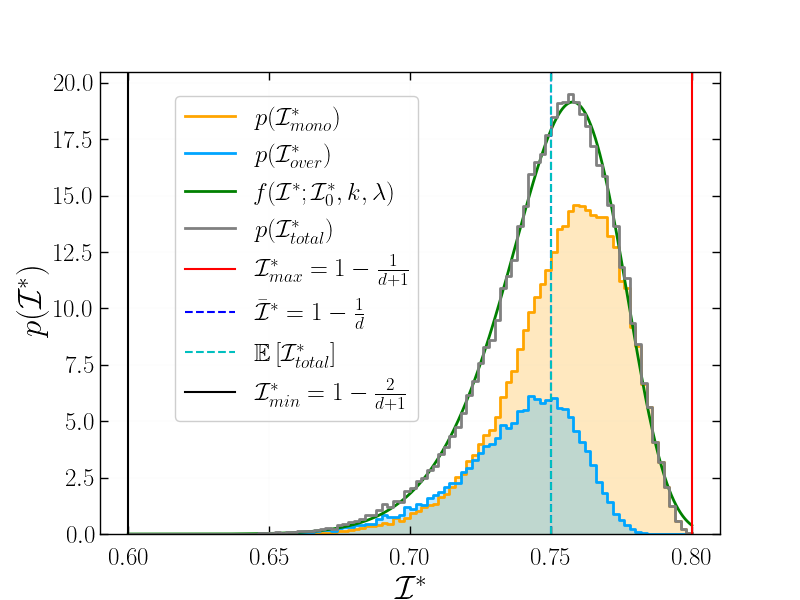

In [274]:
# ----------------------------------------------------------------------------------------------------------------------------------
# USER OPTIONS
# ----------------------------------------------------------------------------------------------------------------------------------
# Whether to load the data from the file or use the data from the current run
load_figure_data = True # True
# Whether to calculate all data points from the raw data
calculate_figure_data = True # True
# Whether to save the figure to a file
save_figure = True # False
# ----------------------------------------------------------------------------------------------------------------------------------
# LOAD DATA
# ----------------------------------------------------------------------------------------------------------------------------------
# Set the figure number
figure_number = 43
# Check if the data should be loaded from the file
if load_figure_data:        
    # Find data files in the directory for the specified figure number
    files_found = [name for name in os.listdir('../dat') if name.startswith(f'Figure_{figure_number:02}')]
    print(f'Files found: {files_found}')
    n_files = len(files_found)
    n_tasks = n_files # Alias for readability
    # Check if there are any data files for the specified figure number
    if n_files > 0:
        n_tasks = n_files
    else:
        raise ValueError("No data files found for the specified figure number.")    
    # Preload dims, gammas and n_gates from the first data file to initialize them before the loop
    if figure_number == 3:
        n_tasks -= 1 # d=2, figure=3
    data = load_data(figure_number, 2)
    dims = data['dims']
    gammas = data['gammas']
    n_gates = data['n_gates'] 
    times = data['times']
    # Pre-allocate space for the AGI data
    AGIs_data_d = []
    AGIs_d = []
    # Loop over the dimensions
    for d_idx, d in enumerate(dims):   
        # Pre-allocate space for the AGI data per dimension 
        AGIs_temp = []      
        # Loop over the number of tasks/ data files
        for n in range(1, n_tasks + 1):
            # TIMING
            start_time = time.time()
            # Load the data from file number n
            data = load_data(figure_number, n)
            # Append the AGI data to the temporary list      
            AGIs_temp.append(data['AGIs_d'][d_idx])
            # TIMING
            end_time = time.time()
            print(f'TASK {n:03} / {n_tasks:03} : {end_time - start_time:.2f} seconds')
        # Concatenate all the elements of AGIs_temp together
        AGIs = np.concatenate(AGIs_temp, axis = 0)
        # Append the concatenated AGI data to the main list
        AGIs_data_d.append(AGIs)
    # Save to original variable name
    AGIs_d = AGIs_data_d
    n_gates = len(AGIs_d[0])

print(f'Number of Gates : {n_gates}')

if calculate_figure_data:
    # Pre-allocate space for the AGI curves
    gates_with_turning_points = []
    gates_with_second_order_turning_points = []
    curves_with_turning_points = []
    curves_with_second_order_turning_points = []
    curves_without_turning_points = []
    tp_indices_gates = []

    gammas_fill = np.linspace(1e-6, 1e6, 1000)
    hatch_list = ['//', 'xx']
    fill_list = ['k', 'k']

    if n_gates > 100000:
        # Generate 100000 random integers from 0 to n_gates
        indices = np.random.choice(n_gates, 100000)
        # Select the AGIs_data_d[0] using indices
        AGIs = AGIs_d[0][indices]
    n_gates = len(AGIs)

    print(f'Number of Gates : {n_gates}')

    # Iterate through each gate
    for n in range(n_gates):
        # Calculate the gradient (difference) of the AGI values along the curve
        gradient = np.diff(AGIs[n])    
        # Fix tolerance on gradients to remove numerical errors near zero
        if figure_number == 33:
            gradient = np.where(np.abs(gradient) < 1e-6, 0, gradient)
        # Find where the gradient changes sign from + to -
        # This indicates that the curve had a maximum and started to decrease
        tp_indices = np.where(np.diff(np.sign(gradient)) < -1)
        turning_points = tp_indices[0]

        if len(turning_points) > 0:
            gates_with_turning_points.append(n)
            tp_indices_gates.append(turning_points[0])

    # peak_plateau_threshold = 1e-2
    # Populate the lists based on whether a curve has a turning point
    for n in range(n_gates):
        if n in gates_with_turning_points:
            # if np.max(AGIs[n]) - AGIs[n][-1] > peak_plateau_threshold:
            curves_with_turning_points.append(AGIs[n])
            # else:
            #     curves_without_turning_points.append(AGIs[n])
        else:
            curves_without_turning_points.append(AGIs[n])

    print(f'Number of Gates with Turning Points : {len(gates_with_turning_points)}')
    print(f'Number of Gates with Peak values above threshold : {len(curves_with_turning_points)}')
    print(f'Number of Gates without peaks : {len(curves_without_turning_points)}')

    # Convert lists to NumPy arrays
    curves_without_turning_points_array = np.array(curves_without_turning_points)
    curves_with_turning_points_array = np.array(curves_with_turning_points)

    d = dims[-1]

    print(f'd = {d}')

    n_bins = int(np.ceil(np.log2(n_gates + 1))) # Sturges formula
    if d==4 or d==8:
        n_bins = 100
    if d==16:
        n_bins=200
    bin_range = (1 - 2 / (d + 1), 1 - 1 / (d + 1))

    # Zoom in on bin_ranges for specific figures where the data is highly localised
    # if figure_number == 163:
    #     bin_range = (0.93, 1 - 1 / (d + 1)) # d = 16
    # elif figure_number == 83:
    # #     bin_range = (0.85, 1 - 1 / (d + 1)) # d = 8
    # if figure_number == 23:
    #     bin_range = (1 - 2 / (d + 1), 0.5) # bristol.gen_cue   
    AGI_max = np.max(AGIs[:, -1])
    AGI_min = np.min(AGIs[:, -1])
    AGI_avg = np.mean(AGIs[:, -1])
    AGI_std = np.std(AGIs[:, -1])
    AGI_med = np.median(AGIs[:, -1])
    AGI_std_max = AGI_avg + AGI_std
    AGI_std_min = AGI_avg - AGI_std 

    AGI_counts, AGI_bins = np.histogram(AGIs[:, -1], bins = n_bins, range = bin_range)

    AGI_bars = AGI_counts / (sum(AGI_counts) * np.diff(AGI_bins)) 



    curves_without_counts, noTP_bins = np.histogram(curves_without_turning_points_array[:, -1], bins = n_bins, range = bin_range)
    
    curves_without_bars = curves_without_counts / (sum(AGI_counts) * np.diff(noTP_bins))

    no_TP_max = np.max(curves_without_turning_points_array[:, -1])
    no_TP_min = np.min(curves_without_turning_points_array[:, -1])
    no_TP_avg = np.mean(curves_without_turning_points_array[:, -1])
    no_TP_std = np.std(curves_without_turning_points_array[:, -1])
    no_TP_med = np.median(curves_without_turning_points_array[:, -1])
    no_TP_std_max = no_TP_avg + no_TP_std
    no_TP_std_min = no_TP_avg - no_TP_std    

    if len(curves_with_turning_points_array) > 0:
        
        curves_with_counts, TP_bins = np.histogram(curves_with_turning_points_array[:, -1], bins = n_bins, range = bin_range)
        
        curves_with_bars = curves_with_counts / (sum(AGI_counts) * np.diff(TP_bins))

        TP_max = np.max(curves_with_turning_points_array[:, -1])
        TP_min = np.min(curves_with_turning_points_array[:, -1])
        TP_avg = np.mean(curves_with_turning_points_array[:, -1])
        TP_std = np.std(curves_with_turning_points_array[:, -1])
        TP_med = np.median(curves_with_turning_points_array[:, -1])
        TP_std_max = TP_avg + TP_std
        TP_std_min = TP_avg - TP_std

    

    # from scipy.stats import weibull_min
    # from scipy.optimize import minimize
    # Define the Weibull PDF function
    def weibull_pdf(x, c, loc, scale):
        return weibull_min.pdf(x, c, loc=loc, scale=scale)
    bin_centers = (AGI_bins[:-1] + AGI_bins[1:]) / 2
    # Initial guesses for the parameters
    if d==4:
        initial_shape = 9.791693380449274  # initial guess for shape
        initial_loc = 0.5706172416734936  # initial guess for location
        initial_scale = 0.18919131291522107  # initial guess for scale
    elif d==8: 
        initial_shape = 350  # initial guess for shape
        initial_loc = -0.725  # initial guess for location
        initial_scale = 1.6  # initial guess for scale     
    elif d==16:
        initial_shape = 11  # initial guess for shape
        initial_loc = 0.9275  # initial guess for location
        initial_scale = 0.009  # initial guess for scale   
    # Fit the Weibull distribution to the histogram data
    popt, pcov = curve_fit(weibull_pdf, bin_centers, AGI_bars, p0=[initial_shape, initial_loc, initial_scale])
    # Extract the fitted parameters
    fitted_shape, fitted_loc, fitted_scale = popt
    print(f"Fitted Weibull parameters: shape={fitted_shape}, loc={fitted_loc}, scale={fitted_scale}")
    # Generate the Weibull PDF with the fitted parameters
    x_data = np.linspace(0, 1, 1000)
    fitted_weibull_pdf = weibull_min.pdf(x_data, fitted_shape, loc=fitted_loc, scale=fitted_scale)

    # Reference distribution
    if d == 2:
        ref_dist = np.ones(n_bins) / ((1 - 1 / (d + 1)) - (1 - 2 / (d + 1)))  # Uniform distribution
    else:
        ref_dist = weibull_min.pdf(bin_centers, fitted_shape, loc=fitted_loc, scale=fitted_scale)

    # Calculate KL Divergence
    # from scipy.stats import entropy
    kl_divergence = entropy(AGI_bars, ref_dist)
    if d==16:
        kl_divergence = entropy(AGI_bars[170:199], ref_dist[170:199])

    # Calculate R^2
    # Observed frequencies (histogram counts)
    observed = AGI_bars # AGI_bars
    # Expected frequencies (reference distribution)
    expected = ref_dist

    # Total sum of squares (SS_tot)
    ss_tot = np.sum((observed - np.mean(observed))**2)
    # Residual sum of squares (SS_res)
    ss_res = np.sum((observed - expected)**2)
    # R^2 calculation
    r_squared = 1 - (ss_res / ss_tot)    

# ----------------------------------------------------------------------------------------------------------------------------------
# PLOT FIGURES
# ----------------------------------------------------------------------------------------------------------------------------------

print(f"KL Divergence: {kl_divergence:.4e}")
print(f'1 - R^2: {1-r_squared:.4e}')

print(f'AGI avg : {AGI_avg}')
print(f'Haar avg: {1 - 1 / (d)}')
print(f'Relative error: {np.abs((AGI_avg - (1 - 1 / (d))) / (1 - 1 / (d)))}')

print(f'Number of Gates : {n_gates}')
print(f'Number of Bins : {n_bins}')
print(f'Number of Gates with 0 TP : {len(curves_without_turning_points)}')
print(f'Number of Gates with 1 TP : {len(curves_with_turning_points)}')

print(f'Fraction of Gates with 0 TP : {len(curves_without_turning_points) / n_gates}')
print(f'Fraction of Gates with 1 TP : {len(curves_with_turning_points) / n_gates}')

print(f'AGI mean : {np.mean(AGI_bars)}')
print(f'AGI std : {np.std(AGI_bars)}')

plt.clf()
plt.close()
plt.figure()

plt.bar(noTP_bins[:-1], curves_without_bars, width = np.diff(noTP_bins), color = 'orange', alpha = 0.25, align = 'edge')
plt.step(noTP_bins[0:], np.concatenate([[0], curves_without_bars]), color = 'orange', alpha = 1, label = r'$p(\mathcal{I}^*_{mono})$')
if len(curves_with_turning_points_array) > 0:
    plt.bar(TP_bins[:-1], curves_with_bars, width = np.diff(TP_bins), color = (0, 165/255.0, 1), alpha = 0.25, align = 'edge')
    plt.step(TP_bins[0:], np.concatenate([[0], curves_with_bars]), color = (0, 165/255.0, 1), alpha = 1, label = r'$p(\mathcal{I}^*_{over})$')

if d ==2:
    plt.step(AGI_bins[0:], np.concatenate([[0], ref_dist]), color = 'g', linestyle = '-', alpha = 1, label = r'$u(\mathcal{I}^*_{min}, \mathcal{I}^*_{max})$')
else:
    x_data = np.linspace(bin_range[0], bin_range[1], 1000)
    fitted_weibull_pdf = weibull_min.pdf(x_data, fitted_shape, loc=fitted_loc, scale=fitted_scale)
    plt.plot(x_data, fitted_weibull_pdf, color = 'g', linestyle = '-', linewidth=2, label=r'$f(\mathcal{I}^*;\mathcal{I}^*_0,k,\lambda)$')

plt.step(AGI_bins[0:], np.concatenate([[0], AGI_bars]), color = 'gray', linewidth=2, alpha = 1, label = r'$p(\mathcal{I}^*_{total})$')

plt.axvline(x = 1 - 1 / (d + 1), color = 'r', linestyle = '-', linewidth = 1.5, label = r'$\mathcal{I}^*_{max} = 1-\frac{1}{d+1}$')
plt.axvline(x = 1 - 1/d, color = 'b', linestyle = '--', linewidth = 1.5, label = r'$\bar{\mathcal{I}}^* = 1-\frac{1}{d}$')
plt.axvline(x = AGI_avg, color = 'c', linestyle = '--', linewidth = 1.5, label = r'$\mathbb{E}\left[\mathcal{I}^*_{total}\right]$')
plt.axvline(x = 1 - 2 / (d + 1), color = 'k', linestyle = '-', linewidth = 1.5, label = r'$\mathcal{I}^*_{min} = 1 - \frac{2}{d+1}$')


# plt.tick_params(bottom = True, top = True, left = True, right = True)
# plt.tick_params(axis = 'both', which = 'both', direction = 'in')
# plt.tick_params(axis='both', which='major', labelsize=ticks_label_font_size, direction = tick_direction, size = major_tick_length, width = major_tick_width)
# plt.tick_params(axis='both', which='minor', labelsize=ticks_label_font_size, direction = tick_direction, size = minor_tick_length, width = minor_tick_width)

plt.xlim(-0.2, 1)
legend_xpos = 0.02
if d>=4:
    plt.xlim(1 - 2 / (d + 1) - 0.01, 1 - 1 / (d + 1) + 0.01)
    legend_xpos = 0.1

# plt.rcParams['axes.linewidth'] = 1  # Set the thickness of the axes lines

legend = plt.legend(loc='upper left', bbox_to_anchor=(legend_xpos, 0.975), ncol=1)#, fontsize = plot_legend_font_size)

plt.xlabel(r'$\mathcal{I}^*$')
plt.ylabel(r'$p(\mathcal{I}^*)$')

figure_number=16
subfigure = 'b'
if save_figure:
    plt.savefig(f'../fig/Figure_{figure_number:02}{subfigure}.pdf', format='pdf', bbox_inches='tight')

plt.show()

## <span style="font-size: 36px; font-family: Arial, sans-serif">SUBFIGURE C</span>

### <span style="font-size: 24px; font-family: Arial, sans-serif">Generate Data</span>

In [ ]:
# ----------------------------------------------------------------------------------------------------------------------------------
# IMPORTS
# ----------------------------------------------------------------------------------------------------------------------------------

import paper_imports
import paper_methods

from paper_imports import *
from paper_methods import *

importlib.reload(paper_imports)
importlib.reload(paper_methods)

import paper_imports
import paper_methods

from paper_imports import *
from paper_methods import *

# ----------------------------------------------------------------------------------------------------------------------------------
# USER OPTIONS
# ----------------------------------------------------------------------------------------------------------------------------------

# Save data to file
save_figure_data : bool = True

# ----------------------------------------------------------------------------------------------------------------------------------
# HPC SETTINGS
# ----------------------------------------------------------------------------------------------------------------------------------

# Get script file name
script_file_name : str = "paper_figure_03.py"

task_count, task_id, n_CPUs, figure_number = get_SLURM_Data(script_file_name)

task_id = 10

print = functools.partial(print, flush = True)

# ----------------------------------------------------------------------------------------------------------------------------------
# START OF SCRIPT
# ----------------------------------------------------------------------------------------------------------------------------------

# START TIMING
start_time : float = time.time()
# Convert start time to real-world time
real_world_start_time : str = time.strftime("%y-%m-%d_%X_%Z").replace("/", "-").replace(":", "-")

# Set the figure number
figure_number : int = 83
# Set the method for generating gates
method : str = 'haar'
# Set collapse operator
collapse_operator : str = 'z'
# Set dimensions for the qudits
dims : list[int] = [8]
d_max : int = dims[-1]
# Set the range of noise strengths for the collapse operator
gamma_min : float = 1e-2
gamma_max : float = 1e+4
gamma_num : int = 50
gammas_ndarray : np.ndarray = np.geomspace(gamma_min, gamma_max, gamma_num, dtype = np.float64)
gammas : list[float] = gammas_ndarray.tolist()
# Set alias for gamma_num for readability
n_gammas : int = gamma_num
# Set number of random quantum gates
n_gates : int = 100#200 * n_CPUs
# Set parallelization parameters
parallel_verbosity : int = 11
n_jobs : int = n_CPUs
batch_size : int = int(n_gates / n_jobs)   
# Set times for the propagator; currently set to just one value, 1.0
times : float = 1.0
# Set y threshold on AGI to identify curves with or without peaks
y_threshold : float = 1e-3
# Set options for the mesolve function (solver options for differential equations)
options_mesolve : qt.Options = qt.Options()
options_mesolve.method = 'bdf'  # Setting method to 'bdf' (backward differentiation formula)
options_mesolve.max_step = float(0.001) # type: ignore 
options_mesolve.nsteps = float(1000000) # type: ignore
options_mesolve.rtol = float(1e-8)  # Relative tolerance
options_mesolve.atol = float(1e-8)  # Absolute tolerance

# Pre-allocate space for data
AGIs_d : list = []
super_gates_d : list = []
hamiltonians_d : list = []
hamiltonians_d_traceless : list = []
AGIs_with_turning_points_indices : list = []
AGIs_without_turning_points_indices : list = []

# Print the config parameters
print(f"STARTING TIMESTAMP: {real_world_start_time}")
print('\n')
print('PRINTING CONFIG PARAMETERS:')
print('---------------------------')
print('\n')
print(f"CURRENT TASK : {task_id:03} / {task_count:03}")
print(f'MODIFIED FIGURE NUMBER : {figure_number}')
print(f'SAVING FIGURE DATA : {save_figure_data}')
print('\n')
print(f"GATE GENERATION METHOD : {method}")
print (f"QUDIT DIMENSIONS : {dims}")
print(f'NUMBER OF GAMMAS : {n_gammas}')
print(f"GAMMAS : {gammas}")
print(f"COLLAPSE OPERATOR : {collapse_operator}")
print(f"NUMBER OF GATES : {n_gates}")
print(f"GATE TIMES : {times}")
print(f"ERROR THRESHOLD : {y_threshold}")
print('\n')
print(f"PARALLEL VERBOSITY : {parallel_verbosity}")
print(f"NUMBER OF PARALLEL JOBS : {n_jobs}")
print(f"BATCH SIZE PER JOB : {batch_size}")
print(f"OPTIONS FOR MESOLVE : {options_mesolve}")
print('\n')

# INITIALIZATION TIME
initialization_time : float = time.time()
print(f"Initialization time: {initialization_time - start_time}")

print('\n')

# Loop over the dimensions
for d in dims:

    # LOOP START TIME
    loop_start_time : float = time.time()  
    
    print(f"DIMENSION : {d:02} / {d_max:02}")

    # Initialize a qudit of dimension d
    qudit = Qudit(d = d)
    # Get qudit collapse operators
    j = qudit.get_j
    L : qt.Qobj = j(collapse_operator) # type: ignore    

    # Pre-allocate space for local data
    AGIs : np.ndarray = np.empty((n_gates, n_gammas), dtype=np.float64)
    # AGIs_traceless : np.ndarray = np.empty((n_gates, n_gammas), dtype=np.float64)
    AGF : np.ndarray = np.empty((n_gates, n_gammas), dtype=np.float64)
    # AGF_traceless : np.ndarray = np.empty((n_gates, n_gammas), dtype=np.float64)

    # LOOP INITIALIZATION TIME
    loop_initialization_time : float = time.time()
    print(f"Loop initialization time: {loop_initialization_time - loop_start_time}")    

    # Generate a list of random unitary gates and Hamiltonians
    super_gates, hamiltonians = generate_gates_and_hamiltonians(n_gates, d, method = method, n_jobs = n_jobs, batch_size = batch_size, is_super = True) # method = 'circular' or 'random' or 'haar' or 'hermitian' or 'cirq_random_unitary' or 'cirq_random_special_unitary'

    # hamiltonians_traceless = [h - h.tr() * qt.qeye(d) / d for h in hamiltonians]

    super_gates_d.append(super_gates)
    hamiltonians_d.append(hamiltonians)
    # hamiltonians_d_traceless.append(hamiltonians_traceless)

    # GATE GENERATION TIME
    gate_generation_time : float = time.time()
    print(f"Gate generation time: {gate_generation_time - initialization_time}")

    # Loop over number of gammas
    for idx_g, g in enumerate(gammas):

        # GAMMA FIDELITY START TIME
        gamma_fidelity_start_time : float = time.time()

        # Parallelize the gates loop
        AGF[:, idx_g] = Parallel(n_jobs = n_jobs, batch_size = batch_size, verbose = parallel_verbosity)(delayed(compute_fidelity)(hamiltonians[idx], gate, L, times, d, g, options_mesolve) for idx, gate in enumerate(super_gates)) # type : ignore
        # AGF_traceless[:, idx_g] = Parallel(n_jobs = n_jobs, batch_size = batch_size, verbose = parallel_verbosity)(delayed(compute_fidelity)(hamiltonians_traceless[idx], gate, L, times, d, g, options_mesolve) for idx, gate in enumerate(super_gates)) # type : ignore
        # AGIs_traceless[:, idx_g] = 1 - AGF_traceless[:, idx_g]
        AGIs[:, idx_g] = 1 - AGF[:, idx_g]

        # GAMMA FIDELITY TIME
        gamma_fidelity_time : float = time.time()
        print(f"Gamma: {idx_g + 1:03} / {n_gammas:03} completed in: {gamma_fidelity_time - gamma_fidelity_start_time}") 

    # Store the AGI data per dimension  
    AGIs_d.append(AGIs)

    # FIDELITY TIME
    fidelity_time = time.time()
    print(f"Fidelity time: {fidelity_time - gate_generation_time}")

    # # Find the roots of the AGI curves
    # root_results = Parallel(n_jobs = n_jobs, batch_size = batch_size, verbose = parallel_verbosity)(delayed(find_AGI_plateau_roots)(AGIs[n], gammas_ndarray, y_threshold, index = n) for n in range(n_gates)) # type : ignore

    # # Differentiate between AGI curves with and without turning points based on how many times they cross the plateau line
    # for n in range(n_gates):
    #     if len(root_results[n][1]) == 3:
    #         AGIs_with_turning_points_indices.append(n)
    #     elif len(root_results[n][1]) == 1:
    #         AGIs_without_turning_points_indices.append(n)        

    # ROOT FINDING TIME
    root_finding_time : float = time.time()
    print(f"Root finding time: {root_finding_time - fidelity_time}")

    # SINGLE LOOP TIME
    loop_time = time.time()
    print(f"Single loop time: {loop_time - loop_start_time}")

    print('\n')

# TOTAL LOOP TIME
total_loop_time = time.time()
print(f"Total loop time: {total_loop_time - start_time}")

# Save the data
if save_figure_data:
    save_data(figure_number, task_id, dims = dims, gammas = gammas, n_gates = n_gates, times = times, AGIs_d = AGIs_d, hamiltonians_d = hamiltonians_d, AGIs_with_turning_points_indices = AGIs_with_turning_points_indices, AGIs_without_turning_points_indices = AGIs_without_turning_points_indices)

# SAVE DATA TIME
save_data_time = time.time()
print(f"Save data time: {save_data_time - total_loop_time}")

# TOTAL TIME
total_time = time.time()
print(f"Total time: {total_time - start_time}")

### <span style="font-size: 24px; font-family: Arial, sans-serif">Plot Figure</span>

Files found: ['Figure_83_results_001.blob', 'Figure_83_results_002.blob', 'Figure_83_results_003.blob', 'Figure_83_results_004.blob', 'Figure_83_results_005.blob', 'Figure_83_results_006.blob', 'Figure_83_results_007.blob', 'Figure_83_results_008.blob', 'Figure_83_results_009.blob', 'Figure_83_results_010.blob']
TASK 001 / 010 : 0.69 seconds
TASK 002 / 010 : 0.53 seconds
TASK 003 / 010 : 0.64 seconds
TASK 004 / 010 : 1.99 seconds
TASK 005 / 010 : 0.62 seconds
TASK 006 / 010 : 0.65 seconds
TASK 007 / 010 : 0.54 seconds
TASK 008 / 010 : 0.56 seconds
TASK 009 / 010 : 0.59 seconds
TASK 010 / 010 : 0.56 seconds
Number of Gates : 100000
Number of Gates : 100000
Number of Gates with Turning Points : 29787
Number of Gates with Peak values above threshold : 29787
Number of Gates without peaks : 70213
d = 8
Fitted Weibull parameters: shape=8.42855655961377, loc=0.8422102696272935, scale=0.03474913550535644
KL Divergence: 1.2097e-03
1 - R^2: 1.7751e-04
AGI avg : 0.8749888541360255
Haar avg: 0.875

/home/jgkh/.local/lib/python3.9/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)


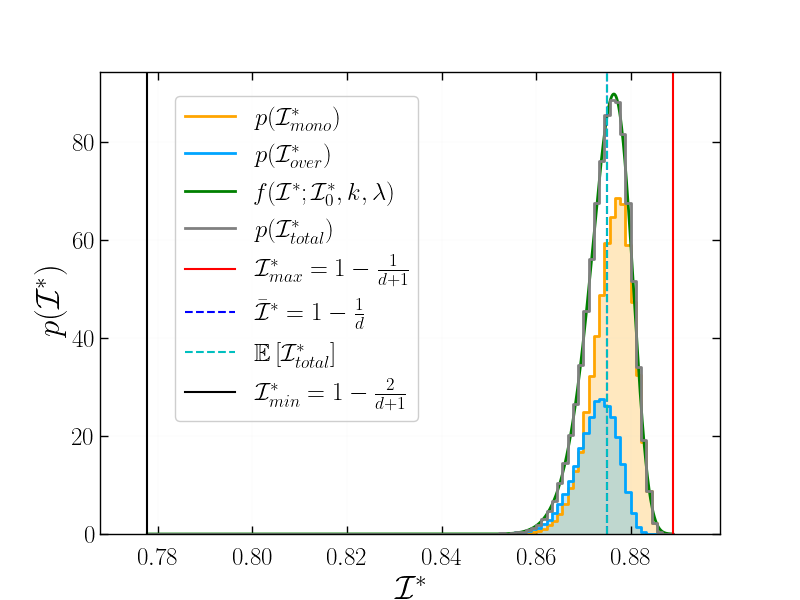

In [275]:
# ----------------------------------------------------------------------------------------------------------------------------------
# USER OPTIONS
# ----------------------------------------------------------------------------------------------------------------------------------
# Whether to load the data from the file or use the data from the current run
load_figure_data = True # True
# Whether to calculate all data points from the raw data
calculate_figure_data = True # True
# Whether to save the figure to a file
save_figure = True # False
# ----------------------------------------------------------------------------------------------------------------------------------
# LOAD DATA
# ----------------------------------------------------------------------------------------------------------------------------------
# Set the figure number
figure_number = 83
# Check if the data should be loaded from the file
if load_figure_data:        
    # Find data files in the directory for the specified figure number
    files_found = [name for name in os.listdir('../dat') if name.startswith(f'Figure_{figure_number:02}')]
    print(f'Files found: {files_found}')
    n_files = len(files_found)
    n_tasks = n_files # Alias for readability
    # Check if there are any data files for the specified figure number
    if n_files > 0:
        n_tasks = n_files
    else:
        raise ValueError("No data files found for the specified figure number.")    
    # Preload dims, gammas and n_gates from the first data file to initialize them before the loop
    if figure_number == 3:
        n_tasks -= 1 # d=2, figure=3
    data = load_data(figure_number, 2)
    dims = data['dims']
    gammas = data['gammas']
    n_gates = data['n_gates'] 
    times = data['times']
    # Pre-allocate space for the AGI data
    AGIs_data_d = []
    AGIs_d = []
    # Loop over the dimensions
    for d_idx, d in enumerate(dims):   
        # Pre-allocate space for the AGI data per dimension 
        AGIs_temp = []      
        # Loop over the number of tasks/ data files
        for n in range(1, n_tasks + 1):
            # TIMING
            start_time = time.time()
            # Load the data from file number n
            data = load_data(figure_number, n)
            # Append the AGI data to the temporary list      
            AGIs_temp.append(data['AGIs_d'][d_idx])
            # TIMING
            end_time = time.time()
            print(f'TASK {n:03} / {n_tasks:03} : {end_time - start_time:.2f} seconds')
        # Concatenate all the elements of AGIs_temp together
        AGIs = np.concatenate(AGIs_temp, axis = 0)
        # Append the concatenated AGI data to the main list
        AGIs_data_d.append(AGIs)
    # Save to original variable name
    AGIs_d = AGIs_data_d
    n_gates = len(AGIs_d[0])

print(f'Number of Gates : {n_gates}')

if calculate_figure_data:
    # Pre-allocate space for the AGI curves
    gates_with_turning_points = []
    gates_with_second_order_turning_points = []
    curves_with_turning_points = []
    curves_with_second_order_turning_points = []
    curves_without_turning_points = []
    tp_indices_gates = []

    gammas_fill = np.linspace(1e-6, 1e6, 1000)
    hatch_list = ['//', 'xx']
    fill_list = ['k', 'k']

    if n_gates > 100000:
        # Generate 100000 random integers from 0 to n_gates
        indices = np.random.choice(n_gates, 100000)
        # Select the AGIs_data_d[0] using indices
        AGIs = AGIs_d[0][indices]
    n_gates = len(AGIs)

    print(f'Number of Gates : {n_gates}')

    # Iterate through each gate
    for n in range(n_gates):
        # Calculate the gradient (difference) of the AGI values along the curve
        gradient = np.diff(AGIs[n])    
        # Fix tolerance on gradients to remove numerical errors near zero
        if figure_number == 33:
            gradient = np.where(np.abs(gradient) < 1e-6, 0, gradient)
        # Find where the gradient changes sign from + to -
        # This indicates that the curve had a maximum and started to decrease
        tp_indices = np.where(np.diff(np.sign(gradient)) < -1)
        turning_points = tp_indices[0]

        if len(turning_points) > 0:
            gates_with_turning_points.append(n)
            tp_indices_gates.append(turning_points[0])

    # peak_plateau_threshold = 1e-2
    # Populate the lists based on whether a curve has a turning point
    for n in range(n_gates):
        if n in gates_with_turning_points:
            # if np.max(AGIs[n]) - AGIs[n][-1] > peak_plateau_threshold:
            curves_with_turning_points.append(AGIs[n])
            # else:
            #     curves_without_turning_points.append(AGIs[n])
        else:
            curves_without_turning_points.append(AGIs[n])

    print(f'Number of Gates with Turning Points : {len(gates_with_turning_points)}')
    print(f'Number of Gates with Peak values above threshold : {len(curves_with_turning_points)}')
    print(f'Number of Gates without peaks : {len(curves_without_turning_points)}')

    # Convert lists to NumPy arrays
    curves_without_turning_points_array = np.array(curves_without_turning_points)
    curves_with_turning_points_array = np.array(curves_with_turning_points)

    d = dims[-1]

    print(f'd = {d}')

    n_bins = int(np.ceil(np.log2(n_gates + 1))) # Sturges formula
    if d==4 or d==8:
        n_bins = 100
    if d==16:
        n_bins=200
    bin_range = (1 - 2 / (d + 1), 1 - 1 / (d + 1))

    # Zoom in on bin_ranges for specific figures where the data is highly localised
    # if figure_number == 163:
    #     bin_range = (0.93, 1 - 1 / (d + 1)) # d = 16
    # elif figure_number == 83:
    # #     bin_range = (0.85, 1 - 1 / (d + 1)) # d = 8
    # if figure_number == 23:
    #     bin_range = (1 - 2 / (d + 1), 0.5) # bristol.gen_cue   
    AGI_max = np.max(AGIs[:, -1])
    AGI_min = np.min(AGIs[:, -1])
    AGI_avg = np.mean(AGIs[:, -1])
    AGI_std = np.std(AGIs[:, -1])
    AGI_med = np.median(AGIs[:, -1])
    AGI_std_max = AGI_avg + AGI_std
    AGI_std_min = AGI_avg - AGI_std 

    AGI_counts, AGI_bins = np.histogram(AGIs[:, -1], bins = n_bins, range = bin_range)

    AGI_bars = AGI_counts / (sum(AGI_counts) * np.diff(AGI_bins)) 



    curves_without_counts, noTP_bins = np.histogram(curves_without_turning_points_array[:, -1], bins = n_bins, range = bin_range)
    
    curves_without_bars = curves_without_counts / (sum(AGI_counts) * np.diff(noTP_bins))

    no_TP_max = np.max(curves_without_turning_points_array[:, -1])
    no_TP_min = np.min(curves_without_turning_points_array[:, -1])
    no_TP_avg = np.mean(curves_without_turning_points_array[:, -1])
    no_TP_std = np.std(curves_without_turning_points_array[:, -1])
    no_TP_med = np.median(curves_without_turning_points_array[:, -1])
    no_TP_std_max = no_TP_avg + no_TP_std
    no_TP_std_min = no_TP_avg - no_TP_std    

    if len(curves_with_turning_points_array) > 0:
        
        curves_with_counts, TP_bins = np.histogram(curves_with_turning_points_array[:, -1], bins = n_bins, range = bin_range)
        
        curves_with_bars = curves_with_counts / (sum(AGI_counts) * np.diff(TP_bins))

        TP_max = np.max(curves_with_turning_points_array[:, -1])
        TP_min = np.min(curves_with_turning_points_array[:, -1])
        TP_avg = np.mean(curves_with_turning_points_array[:, -1])
        TP_std = np.std(curves_with_turning_points_array[:, -1])
        TP_med = np.median(curves_with_turning_points_array[:, -1])
        TP_std_max = TP_avg + TP_std
        TP_std_min = TP_avg - TP_std

    

    # from scipy.stats import weibull_min
    # from scipy.optimize import minimize
    # Define the Weibull PDF function
    def weibull_pdf(x, c, loc, scale):
        return weibull_min.pdf(x, c, loc=loc, scale=scale)
    bin_centers = (AGI_bins[:-1] + AGI_bins[1:]) / 2
    # Initial guesses for the parameters
    if d==4:
        initial_shape = 9.791693380449274  # initial guess for shape
        initial_loc = 0.5706172416734936  # initial guess for location
        initial_scale = 0.18919131291522107  # initial guess for scale
    elif d==8: 
        initial_shape = 350  # initial guess for shape
        initial_loc = -0.725  # initial guess for location
        initial_scale = 1.6  # initial guess for scale     
    elif d==16:
        initial_shape = 11  # initial guess for shape
        initial_loc = 0.9275  # initial guess for location
        initial_scale = 0.009  # initial guess for scale   
    # Fit the Weibull distribution to the histogram data
    popt, pcov = curve_fit(weibull_pdf, bin_centers, AGI_bars, p0=[initial_shape, initial_loc, initial_scale])
    # Extract the fitted parameters
    fitted_shape, fitted_loc, fitted_scale = popt
    print(f"Fitted Weibull parameters: shape={fitted_shape}, loc={fitted_loc}, scale={fitted_scale}")
    # Generate the Weibull PDF with the fitted parameters
    x_data = np.linspace(0, 1, 1000)
    fitted_weibull_pdf = weibull_min.pdf(x_data, fitted_shape, loc=fitted_loc, scale=fitted_scale)

    # Reference distribution
    if d == 2:
        ref_dist = np.ones(n_bins) / ((1 - 1 / (d + 1)) - (1 - 2 / (d + 1)))  # Uniform distribution
    else:
        ref_dist = weibull_min.pdf(bin_centers, fitted_shape, loc=fitted_loc, scale=fitted_scale)

    # Calculate KL Divergence
    # from scipy.stats import entropy
    kl_divergence = entropy(AGI_bars, ref_dist)
    if d==16:
        kl_divergence = entropy(AGI_bars[170:199], ref_dist[170:199])

    # Calculate R^2
    # Observed frequencies (histogram counts)
    observed = AGI_bars # AGI_bars
    # Expected frequencies (reference distribution)
    expected = ref_dist

    # Total sum of squares (SS_tot)
    ss_tot = np.sum((observed - np.mean(observed))**2)
    # Residual sum of squares (SS_res)
    ss_res = np.sum((observed - expected)**2)
    # R^2 calculation
    r_squared = 1 - (ss_res / ss_tot)    

# ----------------------------------------------------------------------------------------------------------------------------------
# PLOT FIGURES
# ----------------------------------------------------------------------------------------------------------------------------------

print(f"KL Divergence: {kl_divergence:.4e}")
print(f'1 - R^2: {1-r_squared:.4e}')

print(f'AGI avg : {AGI_avg}')
print(f'Haar avg: {1 - 1 / (d)}')
print(f'Relative error: {np.abs((AGI_avg - (1 - 1 / (d))) / (1 - 1 / (d)))}')

print(f'Number of Gates : {n_gates}')
print(f'Number of Bins : {n_bins}')
print(f'Number of Gates with 0 TP : {len(curves_without_turning_points)}')
print(f'Number of Gates with 1 TP : {len(curves_with_turning_points)}')

print(f'Fraction of Gates with 0 TP : {len(curves_without_turning_points) / n_gates}')
print(f'Fraction of Gates with 1 TP : {len(curves_with_turning_points) / n_gates}')

print(f'AGI mean : {np.mean(AGI_bars)}')
print(f'AGI std : {np.std(AGI_bars)}')

plt.clf()
plt.close()
plt.figure()

plt.bar(noTP_bins[:-1], curves_without_bars, width = np.diff(noTP_bins), color = 'orange', alpha = 0.25, align = 'edge')
plt.step(noTP_bins[0:], np.concatenate([[0], curves_without_bars]), color = 'orange', alpha = 1, label = r'$p(\mathcal{I}^*_{mono})$')
if len(curves_with_turning_points_array) > 0:
    plt.bar(TP_bins[:-1], curves_with_bars, width = np.diff(TP_bins), color = (0, 165/255.0, 1), alpha = 0.25, align = 'edge')
    plt.step(TP_bins[0:], np.concatenate([[0], curves_with_bars]), color = (0, 165/255.0, 1), alpha = 1, label = r'$p(\mathcal{I}^*_{over})$')

if d ==2:
    plt.step(AGI_bins[0:], np.concatenate([[0], ref_dist]), color = 'g', linestyle = '-', alpha = 1, label = r'$u(\mathcal{I}^*_{min}, \mathcal{I}^*_{max})$')
else:
    x_data = np.linspace(bin_range[0], bin_range[1], 1000)
    fitted_weibull_pdf = weibull_min.pdf(x_data, fitted_shape, loc=fitted_loc, scale=fitted_scale)
    plt.plot(x_data, fitted_weibull_pdf, color = 'g', linestyle = '-', linewidth=2, label=r'$f(\mathcal{I}^*;\mathcal{I}^*_0,k,\lambda)$')

plt.step(AGI_bins[0:], np.concatenate([[0], AGI_bars]), color = 'gray', linewidth=2, alpha = 1, label = r'$p(\mathcal{I}^*_{total})$')

plt.axvline(x = 1 - 1 / (d + 1), color = 'r', linestyle = '-', linewidth = 1.5, label = r'$\mathcal{I}^*_{max} = 1-\frac{1}{d+1}$')
plt.axvline(x = 1 - 1/d, color = 'b', linestyle = '--', linewidth = 1.5, label = r'$\bar{\mathcal{I}}^* = 1-\frac{1}{d}$')
plt.axvline(x = AGI_avg, color = 'c', linestyle = '--', linewidth = 1.5, label = r'$\mathbb{E}\left[\mathcal{I}^*_{total}\right]$')
plt.axvline(x = 1 - 2 / (d + 1), color = 'k', linestyle = '-', linewidth = 1.5, label = r'$\mathcal{I}^*_{min} = 1 - \frac{2}{d+1}$')


# plt.tick_params(bottom = True, top = True, left = True, right = True)
# plt.tick_params(axis = 'both', which = 'both', direction = 'in')
# plt.tick_params(axis='both', which='major', labelsize=ticks_label_font_size, direction = tick_direction, size = major_tick_length, width = major_tick_width)
# plt.tick_params(axis='both', which='minor', labelsize=ticks_label_font_size, direction = tick_direction, size = minor_tick_length, width = minor_tick_width)

plt.xlim(-0.2, 1)
legend_xpos = 0.02
if d>=4:
    plt.xlim(1 - 2 / (d + 1) - 0.01, 1 - 1 / (d + 1) + 0.01)
    legend_xpos = 0.1

# plt.rcParams['axes.linewidth'] = 1  # Set the thickness of the axes lines

legend = plt.legend(loc='upper left', bbox_to_anchor=(legend_xpos, 0.975), ncol=1)#, fontsize = plot_legend_font_size)

plt.xlabel(r'$\mathcal{I}^*$')
plt.ylabel(r'$p(\mathcal{I}^*)$')

figure_number=16
subfigure = 'c'
if save_figure:
    plt.savefig(f'../fig/Figure_{figure_number:02}{subfigure}.pdf', format='pdf', bbox_inches='tight')

plt.show()

## <span style="font-size: 36px; font-family: Arial, sans-serif">SUBFIGURE D</span>

### <span style="font-size: 24px; font-family: Arial, sans-serif">Generate Data</span>

In [ ]:
# ----------------------------------------------------------------------------------------------------------------------------------
# IMPORTS
# ----------------------------------------------------------------------------------------------------------------------------------

import paper_imports
import paper_methods

from paper_imports import *
from paper_methods import *

importlib.reload(paper_imports)
importlib.reload(paper_methods)

import paper_imports
import paper_methods

from paper_imports import *
from paper_methods import *

# ----------------------------------------------------------------------------------------------------------------------------------
# USER OPTIONS
# ----------------------------------------------------------------------------------------------------------------------------------

# Save data to file
save_figure_data : bool = True

# ----------------------------------------------------------------------------------------------------------------------------------
# HPC SETTINGS
# ----------------------------------------------------------------------------------------------------------------------------------

# Get script file name
script_file_name : str = "paper_figure_03.py"

task_count, task_id, n_CPUs, figure_number = get_SLURM_Data(script_file_name)

task_id = 10

print = functools.partial(print, flush = True)

# ----------------------------------------------------------------------------------------------------------------------------------
# START OF SCRIPT
# ----------------------------------------------------------------------------------------------------------------------------------

# START TIMING
start_time : float = time.time()
# Convert start time to real-world time
real_world_start_time : str = time.strftime("%y-%m-%d_%X_%Z").replace("/", "-").replace(":", "-")

# Set the figure number
figure_number : int = 163
# Set the method for generating gates
method : str = 'haar'
# Set collapse operator
collapse_operator : str = 'z'
# Set dimensions for the qudits
dims : list[int] = [16]
d_max : int = dims[-1]
# Set the range of noise strengths for the collapse operator
gamma_min : float = 1e-2
gamma_max : float = 1e+4
gamma_num : int = 50
gammas_ndarray : np.ndarray = np.geomspace(gamma_min, gamma_max, gamma_num, dtype = np.float64)
gammas : list[float] = gammas_ndarray.tolist()
# Set alias for gamma_num for readability
n_gammas : int = gamma_num
# Set number of random quantum gates
n_gates : int = 100#200 * n_CPUs
# Set parallelization parameters
parallel_verbosity : int = 11
n_jobs : int = n_CPUs
batch_size : int = int(n_gates / n_jobs)   
# Set times for the propagator; currently set to just one value, 1.0
times : float = 1.0
# Set y threshold on AGI to identify curves with or without peaks
y_threshold : float = 1e-3
# Set options for the mesolve function (solver options for differential equations)
options_mesolve : qt.Options = qt.Options()
options_mesolve.method = 'bdf'  # Setting method to 'bdf' (backward differentiation formula)
options_mesolve.max_step = float(0.001) # type: ignore 
options_mesolve.nsteps = float(1000000) # type: ignore
options_mesolve.rtol = float(1e-8)  # Relative tolerance
options_mesolve.atol = float(1e-8)  # Absolute tolerance

# Pre-allocate space for data
AGIs_d : list = []
super_gates_d : list = []
hamiltonians_d : list = []
hamiltonians_d_traceless : list = []
AGIs_with_turning_points_indices : list = []
AGIs_without_turning_points_indices : list = []

# Print the config parameters
print(f"STARTING TIMESTAMP: {real_world_start_time}")
print('\n')
print('PRINTING CONFIG PARAMETERS:')
print('---------------------------')
print('\n')
print(f"CURRENT TASK : {task_id:03} / {task_count:03}")
print(f'MODIFIED FIGURE NUMBER : {figure_number}')
print(f'SAVING FIGURE DATA : {save_figure_data}')
print('\n')
print(f"GATE GENERATION METHOD : {method}")
print (f"QUDIT DIMENSIONS : {dims}")
print(f'NUMBER OF GAMMAS : {n_gammas}')
print(f"GAMMAS : {gammas}")
print(f"COLLAPSE OPERATOR : {collapse_operator}")
print(f"NUMBER OF GATES : {n_gates}")
print(f"GATE TIMES : {times}")
print(f"ERROR THRESHOLD : {y_threshold}")
print('\n')
print(f"PARALLEL VERBOSITY : {parallel_verbosity}")
print(f"NUMBER OF PARALLEL JOBS : {n_jobs}")
print(f"BATCH SIZE PER JOB : {batch_size}")
print(f"OPTIONS FOR MESOLVE : {options_mesolve}")
print('\n')

# INITIALIZATION TIME
initialization_time : float = time.time()
print(f"Initialization time: {initialization_time - start_time}")

print('\n')

# Loop over the dimensions
for d in dims:

    # LOOP START TIME
    loop_start_time : float = time.time()  
    
    print(f"DIMENSION : {d:02} / {d_max:02}")

    # Initialize a qudit of dimension d
    qudit = Qudit(d = d)
    # Get qudit collapse operators
    j = qudit.get_j
    L : qt.Qobj = j(collapse_operator) # type: ignore    

    # Pre-allocate space for local data
    AGIs : np.ndarray = np.empty((n_gates, n_gammas), dtype=np.float64)
    # AGIs_traceless : np.ndarray = np.empty((n_gates, n_gammas), dtype=np.float64)
    AGF : np.ndarray = np.empty((n_gates, n_gammas), dtype=np.float64)
    # AGF_traceless : np.ndarray = np.empty((n_gates, n_gammas), dtype=np.float64)

    # LOOP INITIALIZATION TIME
    loop_initialization_time : float = time.time()
    print(f"Loop initialization time: {loop_initialization_time - loop_start_time}")    

    # Generate a list of random unitary gates and Hamiltonians
    super_gates, hamiltonians = generate_gates_and_hamiltonians(n_gates, d, method = method, n_jobs = n_jobs, batch_size = batch_size, is_super = True) # method = 'circular' or 'random' or 'haar' or 'hermitian' or 'cirq_random_unitary' or 'cirq_random_special_unitary'

    # hamiltonians_traceless = [h - h.tr() * qt.qeye(d) / d for h in hamiltonians]

    super_gates_d.append(super_gates)
    hamiltonians_d.append(hamiltonians)
    # hamiltonians_d_traceless.append(hamiltonians_traceless)

    # GATE GENERATION TIME
    gate_generation_time : float = time.time()
    print(f"Gate generation time: {gate_generation_time - initialization_time}")

    # Loop over number of gammas
    for idx_g, g in enumerate(gammas):

        # GAMMA FIDELITY START TIME
        gamma_fidelity_start_time : float = time.time()

        # Parallelize the gates loop
        AGF[:, idx_g] = Parallel(n_jobs = n_jobs, batch_size = batch_size, verbose = parallel_verbosity)(delayed(compute_fidelity)(hamiltonians[idx], gate, L, times, d, g, options_mesolve) for idx, gate in enumerate(super_gates)) # type : ignore
        # AGF_traceless[:, idx_g] = Parallel(n_jobs = n_jobs, batch_size = batch_size, verbose = parallel_verbosity)(delayed(compute_fidelity)(hamiltonians_traceless[idx], gate, L, times, d, g, options_mesolve) for idx, gate in enumerate(super_gates)) # type : ignore
        # AGIs_traceless[:, idx_g] = 1 - AGF_traceless[:, idx_g]
        AGIs[:, idx_g] = 1 - AGF[:, idx_g]

        # GAMMA FIDELITY TIME
        gamma_fidelity_time : float = time.time()
        print(f"Gamma: {idx_g + 1:03} / {n_gammas:03} completed in: {gamma_fidelity_time - gamma_fidelity_start_time}") 

    # Store the AGI data per dimension  
    AGIs_d.append(AGIs)

    # FIDELITY TIME
    fidelity_time = time.time()
    print(f"Fidelity time: {fidelity_time - gate_generation_time}")

    # # Find the roots of the AGI curves
    # root_results = Parallel(n_jobs = n_jobs, batch_size = batch_size, verbose = parallel_verbosity)(delayed(find_AGI_plateau_roots)(AGIs[n], gammas_ndarray, y_threshold, index = n) for n in range(n_gates)) # type : ignore

    # # Differentiate between AGI curves with and without turning points based on how many times they cross the plateau line
    # for n in range(n_gates):
    #     if len(root_results[n][1]) == 3:
    #         AGIs_with_turning_points_indices.append(n)
    #     elif len(root_results[n][1]) == 1:
    #         AGIs_without_turning_points_indices.append(n)        

    # ROOT FINDING TIME
    root_finding_time : float = time.time()
    print(f"Root finding time: {root_finding_time - fidelity_time}")

    # SINGLE LOOP TIME
    loop_time = time.time()
    print(f"Single loop time: {loop_time - loop_start_time}")

    print('\n')

# TOTAL LOOP TIME
total_loop_time = time.time()
print(f"Total loop time: {total_loop_time - start_time}")

# Save the data
if save_figure_data:
    save_data(figure_number, task_id, dims = dims, gammas = gammas, n_gates = n_gates, times = times, AGIs_d = AGIs_d, hamiltonians_d = hamiltonians_d, AGIs_with_turning_points_indices = AGIs_with_turning_points_indices, AGIs_without_turning_points_indices = AGIs_without_turning_points_indices)

# SAVE DATA TIME
save_data_time = time.time()
print(f"Save data time: {save_data_time - total_loop_time}")

# TOTAL TIME
total_time = time.time()
print(f"Total time: {total_time - start_time}")

### <span style="font-size: 24px; font-family: Arial, sans-serif">Plot Figure</span>

Files found: ['Figure_163_results_001.blob', 'Figure_163_results_002.blob', 'Figure_163_results_003.blob', 'Figure_163_results_004.blob', 'Figure_163_results_005.blob', 'Figure_163_results_006.blob', 'Figure_163_results_007.blob', 'Figure_163_results_008.blob', 'Figure_163_results_009.blob', 'Figure_163_results_010.blob']
TASK 001 / 010 : 0.75 seconds
TASK 002 / 010 : 0.63 seconds
TASK 003 / 010 : 0.84 seconds
TASK 004 / 010 : 0.84 seconds
TASK 005 / 010 : 0.85 seconds
TASK 006 / 010 : 1.00 seconds
TASK 007 / 010 : 1.15 seconds
TASK 008 / 010 : 2.51 seconds
TASK 009 / 010 : 1.18 seconds
TASK 010 / 010 : 1.24 seconds
Number of Gates : 100000
Number of Gates : 100000
Number of Gates with Turning Points : 45
Number of Gates with Peak values above threshold : 45
Number of Gates without peaks : 99955
d = 16
Fitted Weibull parameters: shape=6.10413904679666, loc=0.9322223300208127, scale=0.004884574213913876
KL Divergence: 1.3661e-03
1 - R^2: 9.3693e-05
AGI avg : 0.9367520796014858
Haar avg:

/home/jgkh/.local/lib/python3.9/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)


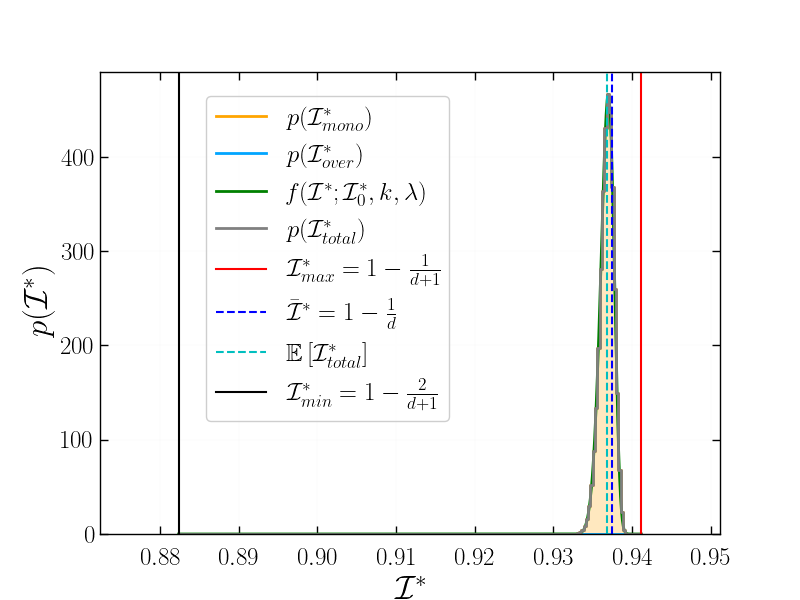

In [276]:
# ----------------------------------------------------------------------------------------------------------------------------------
# USER OPTIONS
# ----------------------------------------------------------------------------------------------------------------------------------
# Whether to load the data from the file or use the data from the current run
load_figure_data = True # True
# Whether to calculate all data points from the raw data
calculate_figure_data = True # True
# Whether to save the figure to a file
save_figure = True # False
# ----------------------------------------------------------------------------------------------------------------------------------
# LOAD DATA
# ----------------------------------------------------------------------------------------------------------------------------------
# Set the figure number
figure_number = 163
# Check if the data should be loaded from the file
if load_figure_data:        
    # Find data files in the directory for the specified figure number
    files_found = [name for name in os.listdir('../dat') if name.startswith(f'Figure_{figure_number:02}')]
    print(f'Files found: {files_found}')
    n_files = len(files_found)
    n_tasks = n_files # Alias for readability
    # Check if there are any data files for the specified figure number
    if n_files > 0:
        n_tasks = n_files
    else:
        raise ValueError("No data files found for the specified figure number.")    
    # Preload dims, gammas and n_gates from the first data file to initialize them before the loop
    if figure_number == 3:
        n_tasks -= 1 # d=2, figure=3
    data = load_data(figure_number, 2)
    dims = data['dims']
    gammas = data['gammas']
    n_gates = data['n_gates'] 
    times = data['times']
    # Pre-allocate space for the AGI data
    AGIs_data_d = []
    AGIs_d = []
    # Loop over the dimensions
    for d_idx, d in enumerate(dims):   
        # Pre-allocate space for the AGI data per dimension 
        AGIs_temp = []      
        # Loop over the number of tasks/ data files
        for n in range(1, n_tasks + 1):
            # TIMING
            start_time = time.time()
            # Load the data from file number n
            data = load_data(figure_number, n)
            # Append the AGI data to the temporary list      
            AGIs_temp.append(data['AGIs_d'][d_idx])
            # TIMING
            end_time = time.time()
            print(f'TASK {n:03} / {n_tasks:03} : {end_time - start_time:.2f} seconds')
        # Concatenate all the elements of AGIs_temp together
        AGIs = np.concatenate(AGIs_temp, axis = 0)
        # Append the concatenated AGI data to the main list
        AGIs_data_d.append(AGIs)
    # Save to original variable name
    AGIs_d = AGIs_data_d
    n_gates = len(AGIs_d[0])

print(f'Number of Gates : {n_gates}')

if calculate_figure_data:
    # Pre-allocate space for the AGI curves
    gates_with_turning_points = []
    gates_with_second_order_turning_points = []
    curves_with_turning_points = []
    curves_with_second_order_turning_points = []
    curves_without_turning_points = []
    tp_indices_gates = []

    gammas_fill = np.linspace(1e-6, 1e6, 1000)
    hatch_list = ['//', 'xx']
    fill_list = ['k', 'k']

    if n_gates > 100000:
        # Generate 100000 random integers from 0 to n_gates
        indices = np.random.choice(n_gates, 100000)
        # Select the AGIs_data_d[0] using indices
        AGIs = AGIs_d[0][indices]
    n_gates = len(AGIs)

    print(f'Number of Gates : {n_gates}')

    # Iterate through each gate
    for n in range(n_gates):
        # Calculate the gradient (difference) of the AGI values along the curve
        gradient = np.diff(AGIs[n])    
        # Fix tolerance on gradients to remove numerical errors near zero
        if figure_number == 33:
            gradient = np.where(np.abs(gradient) < 1e-6, 0, gradient)
        # Find where the gradient changes sign from + to -
        # This indicates that the curve had a maximum and started to decrease
        tp_indices = np.where(np.diff(np.sign(gradient)) < -1)
        turning_points = tp_indices[0]

        if len(turning_points) > 0:
            gates_with_turning_points.append(n)
            tp_indices_gates.append(turning_points[0])

    # peak_plateau_threshold = 1e-2
    # Populate the lists based on whether a curve has a turning point
    for n in range(n_gates):
        if n in gates_with_turning_points:
            # if np.max(AGIs[n]) - AGIs[n][-1] > peak_plateau_threshold:
            curves_with_turning_points.append(AGIs[n])
            # else:
            #     curves_without_turning_points.append(AGIs[n])
        else:
            curves_without_turning_points.append(AGIs[n])

    print(f'Number of Gates with Turning Points : {len(gates_with_turning_points)}')
    print(f'Number of Gates with Peak values above threshold : {len(curves_with_turning_points)}')
    print(f'Number of Gates without peaks : {len(curves_without_turning_points)}')

    # Convert lists to NumPy arrays
    curves_without_turning_points_array = np.array(curves_without_turning_points)
    curves_with_turning_points_array = np.array(curves_with_turning_points)

    d = dims[-1]

    print(f'd = {d}')

    n_bins = int(np.ceil(np.log2(n_gates + 1))) # Sturges formula
    if d==4 or d==8:
        n_bins = 100
    if d==16:
        n_bins=200
    bin_range = (1 - 2 / (d + 1), 1 - 1 / (d + 1))

    # Zoom in on bin_ranges for specific figures where the data is highly localised
    # if figure_number == 163:
    #     bin_range = (0.93, 1 - 1 / (d + 1)) # d = 16
    # elif figure_number == 83:
    # #     bin_range = (0.85, 1 - 1 / (d + 1)) # d = 8
    # if figure_number == 23:
    #     bin_range = (1 - 2 / (d + 1), 0.5) # bristol.gen_cue   
    AGI_max = np.max(AGIs[:, -1])
    AGI_min = np.min(AGIs[:, -1])
    AGI_avg = np.mean(AGIs[:, -1])
    AGI_std = np.std(AGIs[:, -1])
    AGI_med = np.median(AGIs[:, -1])
    AGI_std_max = AGI_avg + AGI_std
    AGI_std_min = AGI_avg - AGI_std 

    AGI_counts, AGI_bins = np.histogram(AGIs[:, -1], bins = n_bins, range = bin_range)

    AGI_bars = AGI_counts / (sum(AGI_counts) * np.diff(AGI_bins)) 



    curves_without_counts, noTP_bins = np.histogram(curves_without_turning_points_array[:, -1], bins = n_bins, range = bin_range)
    
    curves_without_bars = curves_without_counts / (sum(AGI_counts) * np.diff(noTP_bins))

    no_TP_max = np.max(curves_without_turning_points_array[:, -1])
    no_TP_min = np.min(curves_without_turning_points_array[:, -1])
    no_TP_avg = np.mean(curves_without_turning_points_array[:, -1])
    no_TP_std = np.std(curves_without_turning_points_array[:, -1])
    no_TP_med = np.median(curves_without_turning_points_array[:, -1])
    no_TP_std_max = no_TP_avg + no_TP_std
    no_TP_std_min = no_TP_avg - no_TP_std    

    if len(curves_with_turning_points_array) > 0:
        
        curves_with_counts, TP_bins = np.histogram(curves_with_turning_points_array[:, -1], bins = n_bins, range = bin_range)
        
        curves_with_bars = curves_with_counts / (sum(AGI_counts) * np.diff(TP_bins))

        TP_max = np.max(curves_with_turning_points_array[:, -1])
        TP_min = np.min(curves_with_turning_points_array[:, -1])
        TP_avg = np.mean(curves_with_turning_points_array[:, -1])
        TP_std = np.std(curves_with_turning_points_array[:, -1])
        TP_med = np.median(curves_with_turning_points_array[:, -1])
        TP_std_max = TP_avg + TP_std
        TP_std_min = TP_avg - TP_std

    

    # from scipy.stats import weibull_min
    # from scipy.optimize import minimize
    # Define the Weibull PDF function
    def weibull_pdf(x, c, loc, scale):
        return weibull_min.pdf(x, c, loc=loc, scale=scale)
    bin_centers = (AGI_bins[:-1] + AGI_bins[1:]) / 2
    # Initial guesses for the parameters
    if d==4:
        initial_shape = 9.791693380449274  # initial guess for shape
        initial_loc = 0.5706172416734936  # initial guess for location
        initial_scale = 0.18919131291522107  # initial guess for scale
    elif d==8: 
        initial_shape = 350  # initial guess for shape
        initial_loc = -0.725  # initial guess for location
        initial_scale = 1.6  # initial guess for scale     
    elif d==16:
        initial_shape = 11  # initial guess for shape
        initial_loc = 0.9275  # initial guess for location
        initial_scale = 0.009  # initial guess for scale   
    # Fit the Weibull distribution to the histogram data
    popt, pcov = curve_fit(weibull_pdf, bin_centers, AGI_bars, p0=[initial_shape, initial_loc, initial_scale])
    # Extract the fitted parameters
    fitted_shape, fitted_loc, fitted_scale = popt
    print(f"Fitted Weibull parameters: shape={fitted_shape}, loc={fitted_loc}, scale={fitted_scale}")
    # Generate the Weibull PDF with the fitted parameters
    x_data = np.linspace(0, 1, 1000)
    fitted_weibull_pdf = weibull_min.pdf(x_data, fitted_shape, loc=fitted_loc, scale=fitted_scale)

    # Reference distribution
    if d == 2:
        ref_dist = np.ones(n_bins) / ((1 - 1 / (d + 1)) - (1 - 2 / (d + 1)))  # Uniform distribution
    else:
        ref_dist = weibull_min.pdf(bin_centers, fitted_shape, loc=fitted_loc, scale=fitted_scale)

    # Calculate KL Divergence
    # from scipy.stats import entropy
    kl_divergence = entropy(AGI_bars, ref_dist)
    if d==16:
        kl_divergence = entropy(AGI_bars[170:199], ref_dist[170:199])

    # Calculate R^2
    # Observed frequencies (histogram counts)
    observed = AGI_bars # AGI_bars
    # Expected frequencies (reference distribution)
    expected = ref_dist

    # Total sum of squares (SS_tot)
    ss_tot = np.sum((observed - np.mean(observed))**2)
    # Residual sum of squares (SS_res)
    ss_res = np.sum((observed - expected)**2)
    # R^2 calculation
    r_squared = 1 - (ss_res / ss_tot)    

# ----------------------------------------------------------------------------------------------------------------------------------
# PLOT FIGURES
# ----------------------------------------------------------------------------------------------------------------------------------

print(f"KL Divergence: {kl_divergence:.4e}")
print(f'1 - R^2: {1-r_squared:.4e}')

print(f'AGI avg : {AGI_avg}')
print(f'Haar avg: {1 - 1 / (d)}')
print(f'Relative error: {np.abs((AGI_avg - (1 - 1 / (d))) / (1 - 1 / (d)))}')

print(f'Number of Gates : {n_gates}')
print(f'Number of Bins : {n_bins}')
print(f'Number of Gates with 0 TP : {len(curves_without_turning_points)}')
print(f'Number of Gates with 1 TP : {len(curves_with_turning_points)}')

print(f'Fraction of Gates with 0 TP : {len(curves_without_turning_points) / n_gates}')
print(f'Fraction of Gates with 1 TP : {len(curves_with_turning_points) / n_gates}')

print(f'AGI mean : {np.mean(AGI_bars)}')
print(f'AGI std : {np.std(AGI_bars)}')

plt.clf()
plt.close()
plt.figure()

plt.bar(noTP_bins[:-1], curves_without_bars, width = np.diff(noTP_bins), color = 'orange', alpha = 0.25, align = 'edge')
plt.step(noTP_bins[0:], np.concatenate([[0], curves_without_bars]), color = 'orange', alpha = 1, label = r'$p(\mathcal{I}^*_{mono})$')
if len(curves_with_turning_points_array) > 0:
    plt.bar(TP_bins[:-1], curves_with_bars, width = np.diff(TP_bins), color = (0, 165/255.0, 1), alpha = 0.25, align = 'edge')
    plt.step(TP_bins[0:], np.concatenate([[0], curves_with_bars]), color = (0, 165/255.0, 1), alpha = 1, label = r'$p(\mathcal{I}^*_{over})$')

if d ==2:
    plt.step(AGI_bins[0:], np.concatenate([[0], ref_dist]), color = 'g', linestyle = '-', alpha = 1, label = r'$u(\mathcal{I}^*_{min}, \mathcal{I}^*_{max})$')
else:
    x_data = np.linspace(bin_range[0], bin_range[1], 1000)
    fitted_weibull_pdf = weibull_min.pdf(x_data, fitted_shape, loc=fitted_loc, scale=fitted_scale)
    plt.plot(x_data, fitted_weibull_pdf, color = 'g', linestyle = '-', linewidth=2, label=r'$f(\mathcal{I}^*;\mathcal{I}^*_0,k,\lambda)$')

plt.step(AGI_bins[0:], np.concatenate([[0], AGI_bars]), color = 'gray', linewidth=2, alpha = 1, label = r'$p(\mathcal{I}^*_{total})$')

plt.axvline(x = 1 - 1 / (d + 1), color = 'r', linestyle = '-', linewidth = 1.5, label = r'$\mathcal{I}^*_{max} = 1-\frac{1}{d+1}$')
plt.axvline(x = 1 - 1/d, color = 'b', linestyle = '--', linewidth = 1.5, label = r'$\bar{\mathcal{I}}^* = 1-\frac{1}{d}$')
plt.axvline(x = AGI_avg, color = 'c', linestyle = '--', linewidth = 1.5, label = r'$\mathbb{E}\left[\mathcal{I}^*_{total}\right]$')
plt.axvline(x = 1 - 2 / (d + 1), color = 'k', linestyle = '-', linewidth = 1.5, label = r'$\mathcal{I}^*_{min} = 1 - \frac{2}{d+1}$')


# plt.tick_params(bottom = True, top = True, left = True, right = True)
# plt.tick_params(axis = 'both', which = 'both', direction = 'in')
# plt.tick_params(axis='both', which='major', labelsize=ticks_label_font_size, direction = tick_direction, size = major_tick_length, width = major_tick_width)
# plt.tick_params(axis='both', which='minor', labelsize=ticks_label_font_size, direction = tick_direction, size = minor_tick_length, width = minor_tick_width)

plt.xlim(-0.2, 1)
legend_xpos = 0.02
if d>=4:
    plt.xlim(1 - 2 / (d + 1) - 0.01, 1 - 1 / (d + 1) + 0.01)
    legend_xpos = 0.15

# plt.rcParams['axes.linewidth'] = 1  # Set the thickness of the axes lines

legend = plt.legend(loc='upper left', bbox_to_anchor=(legend_xpos, 0.975), ncol=1)#, fontsize = plot_legend_font_size)

plt.xlabel(r'$\mathcal{I}^*$')
plt.ylabel(r'$p(\mathcal{I}^*)$')

figure_number=16
subfigure = 'd'
if save_figure:
    plt.savefig(f'../fig/Figure_{figure_number:02}{subfigure}.pdf', format='pdf', bbox_inches='tight')

plt.show()

# <span style="font-size: 60px; font-family: Arial, sans-serif">FIGURE 17</span>

## <span style="font-size: 24px; font-family: Arial, sans-serif">Generate Data</span>

In [ ]:
# ----------------------------------------------------------------------------------------------------------------------------------
# IMPORTS
# ----------------------------------------------------------------------------------------------------------------------------------

import paper_imports
import paper_methods

from paper_imports import *
from paper_methods import *

importlib.reload(paper_imports)
importlib.reload(paper_methods)

import paper_imports
import paper_methods

from paper_imports import *
from paper_methods import *

# ----------------------------------------------------------------------------------------------------------------------------------
# USER OPTIONS
# ----------------------------------------------------------------------------------------------------------------------------------

# Save data to file
save_figure_data : bool = False
save_search_data : bool = False

# ----------------------------------------------------------------------------------------------------------------------------------
# HPC SETTINGS
# ----------------------------------------------------------------------------------------------------------------------------------

# Get script file name
script_file_name : str = "paper_figure_05.py"
# Get SLURM data if running on the cluster
task_count, task_id, n_CPUs, figure_number = get_SLURM_Data(script_file_name)
# Set the print function to flush the buffer (used for parallel printing in SLURM environment)
print = functools.partial(print, flush = True)

# ----------------------------------------------------------------------------------------------------------------------------------
# START OF SCRIPT
# ----------------------------------------------------------------------------------------------------------------------------------

# START TIMING
start_time : float = time.time()
# Convert start time to real-world time
real_world_start_time : str = time.strftime("%y-%m-%d_%X_%Z").replace("/", "-").replace(":", "-")

# Set the figure number
figure_number : int = 17
# Set the method for generating gates
method : str = 'interpolated_INC'
# Set max dimension for the qudits
d_max : int = 12
# Set dimensions for the qudits
dims : list[int] = np.arange(2, d_max + 1, 1).tolist()
# Set the range of noise strengths for the collapse operator
gamma_min : float = 1e-2
gamma_max : float = 1e+4
gamma_num : int = 2 * n_CPUs
gammas_array : np.ndarray = np.geomspace(gamma_min, gamma_max, gamma_num, dtype = np.float64)
gammas : list[float] = gammas_array.tolist()
# Set alias for gamma_num for readability
n_gammas : int = gamma_num
# Set collapse operator
collapse_operator : str = "z" # ['x', 'y','z']
# Set number of random quantum gates
n_gates : int = 24
# Set times for the propagator; currently set to just one value, 1.0
times : float = 1.0
# Error threshold and tolerance for root finding the zeros of the gate infidelity
g_step_size : float = 1e+3
x_tolerance : float = 1e-3
y_threshold : float = 1e-3
# Set parallelization parameters
parallel_verbosity : int = 11
n_jobs_gates : int = min(n_CPUs, n_gates)
batch_size_gates : int = int(n_gates / n_jobs_gates)
n_jobs_fidelities : int = min(n_CPUs, n_gammas)
batch_size_fidelities : int = int(n_gammas / n_jobs_fidelities)
# Set options for the mesolve function (solver options for differential equations)
options_mesolve : qt.Options = qt.Options()
options_mesolve.method = 'bdf'  # Setting method to 'bdf' (backward differentiation formula)
options_mesolve.max_step = float(0.001) # type: ignore 
options_mesolve.nsteps = float(1000000) # type: ignore
options_mesolve.rtol = float(1e-8)  # Relative tolerance
options_mesolve.atol = float(1e-8)  # Absolute tolerance

# Print the config parameters
print(f"STARTING TIMESTAMP: {real_world_start_time}")
print('\n')
print('PRINTING CONFIG PARAMETERS:')
print('---------------------------')
print('\n')
print(f"CURRENT TASK : {task_id:03} / {task_count:03}")
print(f'MODIFIED FIGURE NUMBER : {figure_number}')
print(f'SAVING FIGURE DATA : {save_figure_data}')
print('\n')
print(f"GATE GENERATION METHOD : {method}")
print (f"QUDIT DIMENSIONS : {dims}")
print(f"GAMMAS : {gammas}")
print(f"COLLAPSE OPERATOR : {collapse_operator}")
print(f"NUMBER OF GATES : {n_gates}")
print(f"GATE TIMES : {times}")
print(f"ROOT FINDING STEP SIZE GAMMA : {g_step_size}")
print(f"ERROR THRESHOLD : {y_threshold}")
print(f"X TOLERANCE : {x_tolerance}")
print('\n')
print(f"PARALLEL VERBOSITY : {parallel_verbosity}")
print(f"NUMBER OF PARALLEL JOBS : {n_jobs_gates}")
print(f"BATCH SIZE PER JOB : {batch_size_gates}")
print(f"NUMBER OF PARALLEL JOBS : {n_jobs_fidelities}")
print(f"BATCH SIZE PER JOB : {batch_size_fidelities}")
print(f"OPTIONS FOR MESOLVE : {options_mesolve}")
print('\n')

# Pre-allocate space for data
AGIs_d : list = []
super_gates_d : list = []
hamiltonians_d : list = []
plateau_AGIs_d : list = []
plateau_gammas_d : list = []
# AGI_gamma_search_values_d : list = []
root_results_d = []

# INITIALIZATION TIME
initialization_time : float = time.time()
print(f"INITIALISATION TIME: {initialization_time - start_time}")

print('\n')

# Loop over the dimensions
for d in dims:

    # LOOP START TIME
    loop_start_time : float = time.time()  
    
    print(f"DIMENSION : {d:02} / {d_max:02}")

    # Initialize a qudit of dimension d
    qudit = Qudit(d = d)
    # Get qudit collapse operators
    j = qudit.get_j
    L : qt.Qobj = j(collapse_operator) # type: ignore      

    # Initialise the etas list
    etas_list = np.arange(0, 1, n_gates).tolist()

    # Pre-allocate space for local data for the current dimension
    plateau_AGIs : np.ndarray = np.zeros(n_gates, dtype = np.float64)
    plateau_gammas : np.ndarray = np.zeros(n_gates, dtype = np.float64)   
    AGF : np.ndarray = np.zeros(n_gammas, dtype = np.float64) 
    AGIs : np.ndarray = np.zeros((n_gates, n_gammas), dtype = np.float64) 

    # LOOP INITIALIZATION TIME
    loop_initialization_time : float = time.time()
    print(f"Loop initialization time: {loop_initialization_time - loop_start_time}")   

    # Generate a list of random unitary matrices
    super_gates, hamiltonians = generate_gates_and_hamiltonians(n_gates, d, method = method, n_jobs = n_jobs_gates, batch_size = batch_size_gates, is_super = True, etas = etas_list)
    # Generate the QFT/ Chrestenson/ Hadamard gate
    # super_gates2, hamiltonians2 = generate_gates_and_hamiltonians(1, d, method = 'QFT', n_jobs = 1, batch_size = 1, is_super = True)

    # # Add the two lists together
    # super_gates = super_gates + super_gates2
    # hamiltonians = hamiltonians + hamiltonians2

    # Store the super gates and Hamiltonians for the current dimension
    super_gates_d.append(super_gates)
    hamiltonians_d.append(hamiltonians)    

    # GATE GENERATION TIME
    gate_generation_time = time.time()
    print(f"Gate generation time: {gate_generation_time - initialization_time}")    

    # Loop over number of gates
    for idx, gate in enumerate(super_gates):   

        print(f"GATE : {idx + 1:03} / {n_gates:03}")     
                   
        # Parallelize the gammas loop for the fidelities and save to the AGIs array
        AGF = Parallel(n_jobs = n_jobs_fidelities, batch_size = batch_size_fidelities, return_as = 'list', verbose = parallel_verbosity)(delayed(compute_fidelity)(hamiltonians[idx], gate, L, times, d, g, options_mesolve) for g in gammas) # type : ignore
        AGI = 1 - np.array(AGF)   
        AGIs[idx] = AGI

    AGIs_d.append(AGIs)

    # FIDELITY TIME
    fidelity_time = time.time()
    print(f"Fidelity time: {fidelity_time - gate_generation_time}")

    # results : list = Parallel(n_jobs = n_jobs_gates, batch_size = batch_size_gates, return_as = 'list', verbose = parallel_verbosity)(delayed(find_AGI_plateau_adaptive)(H, super_gate, L, times, d, options_mesolve, gamma_max, g_step_size, y_threshold, x_tolerance, save_search_data) for H, super_gate in zip(hamiltonians, super_gates)) # type : ignore
    
    

    # Find the roots of the AGI curves (alternate method)
    results = Parallel(n_jobs = n_jobs, batch_size = batch_size, verbose = parallel_verbosity)(delayed(find_AGI_plateau_roots)(AGIs[n], gammas_array, y_threshold, index = n) for n in range(n_gates)) # type : ignore

    # root_results_d.append(results)

    # Differentiate between AGI curves with and without turning points based on how many times they cross the plateau line
    # for n in range(n_gates):
    #     if len(root_results[n][1]) == 3:
    #         AGIs_with_turning_points_indices.append(n)
    #     elif len(root_results[n][1]) == 1:
    #         AGIs_without_turning_points_indices.append(n)   

    # AGI_gamma_search_values = [result[2] for result in results]
    plateau_AGIs = np.array([result[1][-1][1] for result in results])
    plateau_gammas = np.array([result[1][-1][0] for result in results])

    # AGI_gamma_search_values_d.append(AGI_gamma_search_values)
    plateau_gammas_d.append(plateau_gammas)
    plateau_AGIs_d.append(plateau_AGIs)

    # ROOT FINDING TIME
    root_finding_time : float = time.time()
    print(f"Root finding time: {root_finding_time - fidelity_time}")

    # ROOT FINDING TIME
    root_finding_time = time.time()
    print(f"Root finding time: {root_finding_time - fidelity_time}")

    # SINGLE LOOP TIME
    loop_time = time.time()
    print(f"Single loop time: {loop_time - loop_start_time}")

    print('\n')

# TOTAL LOOP TIME
total_loop_time = time.time()
print(f"Total loop time: {total_loop_time - start_time}")

# Save the data
if save_figure_data:
    save_data(figure_number, task_id, dims = dims, gammas = gammas, n_gates = n_gates, times = times, AGIs_d = AGIs_d, hamiltonians_d = hamiltonians_d, plateau_AGIs_d = plateau_AGIs_d, plateau_gammas_d = plateau_gammas_d, AGI_gamma_search_values_d = AGI_gamma_search_values_d)
    # save_data(figure_number, task_id, dims = dims, gammas = gammas, n_gates = n_gates, times = times, AGIs_d = AGIs_d, hamiltonians_d = hamiltonians_d, root_results_d = root_results_d)    
# SAVE DATA TIME
save_data_time = time.time()
print(f"Save data time: {save_data_time - total_loop_time}")

# TOTAL TIME
total_time = time.time()
print(f"Total time: {total_time - start_time}")

# ----------------------------------------------------------------------------------------------------------------------------------
# END OF SCRIPT
# ----------------------------------------------------------------------------------------------------------------------------------

## <span style="font-size: 24px; font-family: Arial, sans-serif">Plot Figure</span>

Files found: ['Figure_17_results_001.blob']
Data loaded from file: dict_keys(['dims', 'gammas', 'n_gates', 'times', 'AGIs_d', 'hamiltonians_d', 'plateau_AGIs_d', 'plateau_gammas_d', 'AGI_gamma_search_values_d'])


/mnt/c/Users/hartmann/Documents/QDYNO/Projects/qudit_agi_nonlinear/source-code-and-data-for-the-figures-of-nonlinearity-of-the-fidelity-in-open-qudit-systems/src/paper_methods.py:3736: RuntimeWarning: invalid value encountered in power
  return a * np.power(x - d, -b)
/mnt/c/Users/hartmann/Documents/QDYNO/Projects/qudit_agi_nonlinear/source-code-and-data-for-the-figures-of-nonlinearity-of-the-fidelity-in-open-qudit-systems/src/paper_methods.py:3739: RuntimeWarning: overflow encountered in exp
  return d - a * np.exp(-b * (x - c))
/home/jgkh/.local/lib/python3.9/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)


EXP DECAY a : [ 1.35965823e+03  4.22496445e-01  5.68340388e+00 -1.40668052e+02]
EXP DECAY b : [-0.85236908  1.58164949 -0.51730985  0.51313987]
EXP DECAY c : [0.97266432 2.82267129 0.24986759 1.85812853]
R-SQUARED a : 0.999286916205207
R-SQUARED b : 0.9992164485883729
R-SQUARED c : 0.9989751272686132


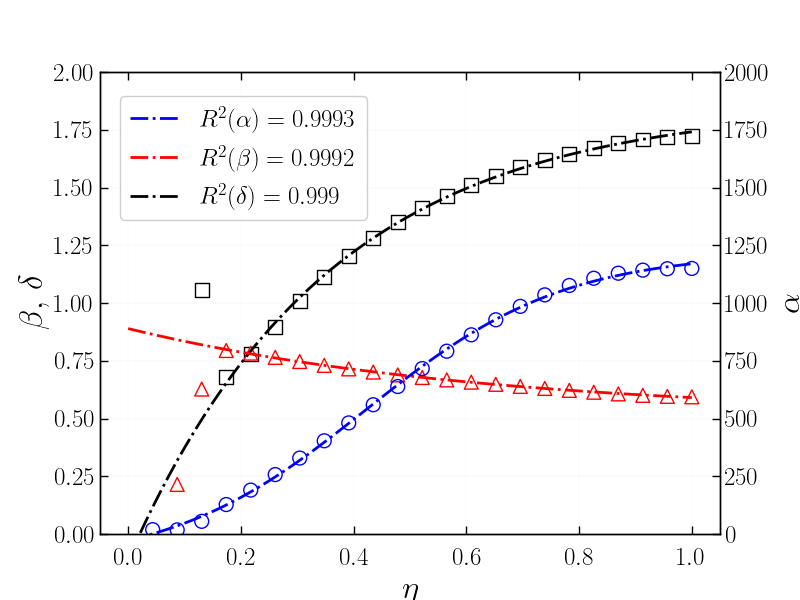

In [277]:
# ----------------------------------------------------------------------------------------------------------------------------------
# USER OPTIONS
# ----------------------------------------------------------------------------------------------------------------------------------
# Whether to load the data from the file or use the data from the current run
load_figure_data = True
# Whether to fit the data
fit_data = True
# Whether to save the figure to a file
save_figure = True
# ----------------------------------------------------------------------------------------------------------------------------------
# LOAD DATA
# ----------------------------------------------------------------------------------------------------------------------------------
# Set the figure number
figure_number = 17
# Check if the data should be loaded from the file
if load_figure_data:        
    # Find data files in the directory for the specified figure number
    files_found = [name for name in os.listdir('../dat') if name.startswith(f'Figure_{figure_number:02}')]
    print(f'Files found: {files_found}')
    n_files = len(files_found)
    n_tasks = n_files # Alias for readability
    # Check if there are any data files for the specified figure number
    if n_files > 0:
        n_tasks = n_files
    else:
        raise ValueError("No data files found for the specified figure number.")    
    # Preload dims, gammas and n_gates from the first data file to initialize them before the loop

    data = load_data(figure_number, 1)
    dims = data['dims']
    gammas = data['gammas']
    n_gates = data['n_gates'] 
    times = data['times']
    # etas_list = data['etas_list']
    # Pre-allocate space for the AGI data
    AGIs_data_d = data['AGIs_d']
    plateau_AGIs_d = data['plateau_AGIs_d']
    plateau_gammas_d = data['plateau_gammas_d']

    # Data loaded from file
    print(f'Data loaded from file: {data.keys()}')

# ----------------------------------------------------------------------------------------------------------------------------------
# FIT DATA
# ----------------------------------------------------------------------------------------------------------------------------------

if fit_data:
    a_initial = 1.03301455e+03
    b_initial = 0.1
    d_initial = 0.1

    n_gates = 24

    dims = np.arange(2, 13, 1).tolist()

    etas_list = np.linspace(0, 1, n_gates)

    etas_fit = np.linspace(0, 1, 100)

    x_data = np.array(dims)
    x_fit = np.linspace(min(x_data), max(x_data), 100)
    y_fit_data = np.zeros((n_gates, len(dims)))
    fit_parameters = np.zeros((n_gates, 3))

    for g_idx in range(n_gates):
        for d_idx, d in enumerate(dims):
            y_fit_data[g_idx, d_idx] = plateau_gammas_d[d_idx][g_idx]

        y_data = np.array(y_fit_data[g_idx])
        
        pow_params, _ = curve_fit(power_law_model_no_c, x_data, y_data, p0=[a_initial, b_initial, d_initial], maxfev = 10000000)    

        fit_parameters[g_idx] = np.array(pow_params)

    start_0 = 1
    start_1 = 4
    start_2 = 4

    initial_params_0 = [1200, 0.5, 10, 0]
    initial_params_1 = [-1, 0.1, 0, 0]
    initial_params_2 = [-100, 1, 0, 10]

    exp_params_0, _ = curve_fit(sigmoid_model, etas_list[start_0:], fit_parameters[start_0:, 0], p0=initial_params_0, maxfev = 10000000)
    exp_params_1, _ = curve_fit(exp_decay_model, etas_list[start_1:], fit_parameters[start_1:, 1], p0=initial_params_1, maxfev = 10000000)
    exp_params_2, _ = curve_fit(exp_decay_model, etas_list[start_2:], fit_parameters[start_2:, 2], p0=initial_params_2, maxfev = 10000000)

    exp_params_0, _ = curve_fit(sigmoid_model, etas_list[start_0:], fit_parameters[start_0:, 0], p0=initial_params_0, maxfev = 10000000)
    exp_params_1, _ = curve_fit(exp_decay_model, etas_list[start_1:], fit_parameters[start_1:, 1], p0=initial_params_1, maxfev = 10000000)
    exp_params_2, _ = curve_fit(exp_decay_model, etas_list[start_2:], fit_parameters[start_2:, 2], p0=initial_params_2, maxfev = 10000000)


    print(f"EXP DECAY a : {exp_params_0}")
    print(f"EXP DECAY b : {exp_params_1}")
    print(f"EXP DECAY c : {exp_params_2}")

    residuals_0 = fit_parameters[start_0:, 0] - sigmoid_model(etas_list[start_0:], *exp_params_0)
    ss_res = np.sum(residuals_0**2)
    ss_tot = np.sum((fit_parameters[start_0:, 0] - np.mean(fit_parameters[start_0:, 0]))**2)
    r_squared_alpha = 1 - (ss_res / ss_tot)
    print(f"R-SQUARED a : {r_squared_alpha}")

    residuals_1 = fit_parameters[start_1:, 1] - exp_decay_model(etas_list[start_1:], *exp_params_1)
    ss_res = np.sum(residuals_1**2)
    ss_tot = np.sum((fit_parameters[start_1:, 1] - np.mean(fit_parameters[start_1:, 1]))**2)
    r_squared_beta = 1 - (ss_res / ss_tot)
    print(f"R-SQUARED b : {r_squared_beta}")

    residuals_2 = fit_parameters[start_2:, 2] - exp_decay_model(etas_list[start_2:], *exp_params_2)
    ss_res = np.sum(residuals_2**2)
    ss_tot = np.sum((fit_parameters[start_2:, 2] - np.mean(fit_parameters[start_2:, 2]))**2)
    r_squared_delta = 1 - (ss_res / ss_tot)
    print(f"R-SQUARED c : {r_squared_delta}")

# ----------------------------------------------------------------------------------------------------------------------------------
# PLOT FIGURES
# ----------------------------------------------------------------------------------------------------------------------------------

plt.clf()
plt.close()
fig1, ax1 = plt.subplots()

plt.ylim(0, 2)
plt.ylabel(r'$\beta, \, \delta$')
plt.xlabel(r'$\eta$')

ax1.scatter(etas_list[3:], fit_parameters[3:, 2], color = 'k', marker = 's', facecolor = 'None')
ax1.plot(etas_fit, exp_decay_model(etas_fit, *exp_params_2), color = 'k', linestyle = '-.', label=rf'$R^2(\delta) = {r_squared_delta:.04}$')

ax1.scatter(etas_list[2:], fit_parameters[2:, 1], color = 'r', marker = '^', facecolor = 'None')
ax1.plot(etas_fit, exp_decay_model(etas_fit, *exp_params_1), color = 'r', linestyle = '-.', label=rf'$R^2(\beta) = {r_squared_beta:.04}$')

handles1, labels1 = ax1.get_legend_handles_labels()

ax2 = plt.twinx()
plt.ylabel(r'$\alpha$')
plt.xlabel(r'$\eta$')

plt.ylim(0, 2000)

ax2.scatter(etas_list[start_0:], fit_parameters[start_0:, 0], color = 'b', marker = 'o', facecolor = 'None')
ax2.plot(etas_fit, sigmoid_model(etas_fit, *exp_params_0), color = 'b', linestyle = '-.', label=rf'$R^2(\alpha) = {r_squared_alpha:.04}$')


handles2, labels2 = ax2.get_legend_handles_labels()
# Combine legend handles
handles = handles1 + handles2
labels = labels1 + labels2

ax2.legend(handles, labels, loc='upper left', bbox_to_anchor = (0.0125, 0.975), reverse = True)

if save_figure:
    plt.savefig('../fig/Figure_17.pdf', format='pdf', bbox_inches='tight')

plt.show()

# <span style="font-size: 60px; font-family: Arial, sans-serif">FIGURE 18</span>

## <span style="font-size: 24px; font-family: Arial, sans-serif">Generate Data</span>

In [ ]:
# ----------------------------------------------------------------------------------------------------------------------------------
# IMPORTS
# ----------------------------------------------------------------------------------------------------------------------------------

import paper_imports
import paper_methods

from paper_imports import *
from paper_methods import *

importlib.reload(paper_imports)
importlib.reload(paper_methods)

import paper_imports
import paper_methods

from paper_imports import *
from paper_methods import *

# ----------------------------------------------------------------------------------------------------------------------------------
# USER OPTIONS
# ----------------------------------------------------------------------------------------------------------------------------------

# Save data to file
save_figure_data : bool = False

# ----------------------------------------------------------------------------------------------------------------------------------
# SLURM SETTINGS
# ----------------------------------------------------------------------------------------------------------------------------------

# Get script file name
script_file_name : str = "paper_figure_09.py"

task_count, task_id, n_CPUs, figure_number = get_SLURM_Data(script_file_name)

# Find existing data files before overwriting
files_found = [name for name in os.listdir('../dat/paper_2') if name.startswith(f'Figure_{figure_number:02}')]
print(f'Existing Data Files Found: {files_found}')
n_files = len(files_found)
# Round n_files down to the nearest multiple of 10, since we work in batches of 10 and tasks may run asynchronously
n_files = n_files - n_files % 10

print = functools.partial(print, flush = True)

# ----------------------------------------------------------------------------------------------------------------------------------
# START OF SCRIPT
# ----------------------------------------------------------------------------------------------------------------------------------

# START TIMING
start_time : float = time.time()

# Set the figure number
figure_number : int = 9
# Set the method for generating gates
method : str = 'interpolated_INC' # interpolated_INC
# Set max dimension for the qudits
d_max : int = 32
# Set dimensions for the qudits
dims : list[int] = np.arange(2, d_max + 1, 1).tolist()
# Set number of dimensions
n_dims : int = len(dims)
# Set collapse operator
collapse_operator : str = "z" # ['x', 'y','z']
# Set alias for tasks
n_tasks : int = task_count
# Set the number of gates
n_gates : int = 6 # 10
# Set times for the main figure
t_min : float = 0.0
t_max : float = 5.0
n_times : int = 2 * n_CPUs
times : list[float] = np.linspace(t_min, t_max, n_times).tolist()
# Set times for the inset figure
t_min_inset : float = 0.0
t_max_inset : float = 0.2
n_times_inset : int = n_CPUs
times_inset : list[float] = np.linspace(t_min_inset, t_max_inset, n_times_inset).tolist()
# Set maximum value of s for the integration, and error threshold
s_max : int = 300
# Set error threshold
error_threshold : float = 1e-8
# Set parallelization parameters
parallel_verbosity : int = 11
# Gate generation parallelization parameters
n_jobs_gate_generation : int = min(n_CPUs, n_gates)
batch_size_gate_generation : int = int(n_gates / n_jobs_gate_generation)
# Time parallelization parameters
n_jobs_times : int = min(n_CPUs, n_times)
batch_size_times : int = int(n_times / n_jobs_times)
# Insets time parallelization parameters
n_jobs_times_inset : int = min(n_CPUs, n_times_inset)
batch_size_times_inset : int = int(n_times_inset / n_jobs_times_inset)
# Set options for the mesolve function (solver options for differential equations)
options_mesolve : qt.Options = qt.Options()
options_mesolve.method = 'bdf'  # Setting method to 'bdf' (backward differentiation formula)
options_mesolve.max_step = float(0.001) # type: ignore 
options_mesolve.nsteps = float(1000000) # type: ignore
options_mesolve.rtol = float(1e-8)  # Relative tolerance
options_mesolve.atol = float(1e-8)  # Absolute tolerance

# Pre-allocate space for data
result = []
result_inset = []
hamiltonians_d : list = []
s_finals_d : np.ndarray = np.zeros((n_dims, n_gates, n_times), dtype = int)
s_finals_d_inset : np.ndarray = np.zeros((n_dims, n_gates, n_times_inset), dtype = int)

# Print the config parameters
print('PRINTING CONFIG PARAMETERS:')
print('---------------------------')
print('\n')
print(f"CURRENT TASK : {task_id:03} / {task_count:03}")
print(f'MODIFIED FIGURE NUMBER : {figure_number}')
print(f'SAVING FIGURE DATA : {save_figure_data}')
print('\n')
print(f"GATE GENERATION METHOD : {method}")
print(f"COLLAPSE OPERATOR : {collapse_operator}")
print('\n')
print(f"NUMBER OF GATES : {n_gates}")
print(f"NUMBER OF TIMES FOR MAIN FIGURE : {n_times}")
print(f"NUMBER OF TIMES FOR INSET FIGURE : {n_times_inset}")
print(f"NUMBER OF DIMENSIONS : {n_dims}")
print('\n')
print (f"QUDIT DIMENSIONS : {dims}")
print(f"MAIN FIGURE TIMES : {times}")
print(f"INSET FIGURE TIMES : {times_inset}")
print('\n')
print(f"MAXIMUM VALUE OF s : {s_max}")
print(f"ERROR THRESHOLD : {error_threshold}")
print('\n')
print(f"PARALLEL VERBOSITY : {parallel_verbosity}")
print(f"NUMBER OF PARALLEL JOBS FOR GATE GENERATION : {n_jobs_gate_generation}")
print(f"BATCH SIZE PER WORKER FOR GATE GENERATION : {batch_size_gate_generation}")
print(f"NUMBER OF PARALLEL JOBS FOR MAIN FIGURE TIMES : {n_jobs_times}")
print(f"BATCH SIZE PER WORKER FOR MAIN FIGURE TIMES : {batch_size_times}")
print(f"NUMBER OF PARALLEL JOBS FOR INSET FIGURE TIMES : {n_jobs_times_inset}")
print(f"BATCH SIZE PER WORKER FOR INSET FIGURE TIMES : {batch_size_times_inset}")
print('\n')
print(f"OPTIONS FOR MESOLVE : {options_mesolve}")
print('\n')

# INITIALIZATION TIME
initialization_time : float = time.time()
print(f"Initialization time: {initialization_time - start_time}")

print('\n')

# Loop over the dimensions 
for d_idx, d in enumerate(dims):  

    # LOOP START TIME
    loop_start_time : float = time.time()

    print(f"DIMENSION : {d:02} / {d_max:02}")

    # Initialize a Qudit of dimension d
    qudit = Qudit(d=d)
    # Get collapse operators related to the Qudit
    j = qudit.get_j
    # Assign collapse operator to L
    L : qt.Qobj = j(collapse_operator) # type:ignore

    # Initialise the etas list for the interpolated INC gates
    etas_list = []
    if method == 'interpolated_INC':
        etas_list = (3 * d - 2) / (4 * d)
        etas_list = np.linspace(0, etas_list, n_gates - 3)
        etas_list = np.append(etas_list, (etas_list[-1] + etas_list[-2]) / 2)
        etas_list = np.append(etas_list, 1)
        etas_list = np.sort(etas_list).tolist()
        print(f"ETAS LIST : {etas_list}")

    # LOOP INITIALIZATION TIME
    loop_initialization_time : float = time.time()
    print(f"Loop initialization time: {loop_initialization_time - loop_start_time}")  

    # Generate a list of gates and hamiltonians for the current dimension and method
    super_gates, hamiltonians = generate_gates_and_hamiltonians(n_gates - 1, d, method = method, n_jobs = n_jobs_gate_generation, batch_size = batch_size_gate_generation, is_super = False, etas = etas_list)
    # Generate 1 gate and hamiltonian for the superposition (Hadamard/ Crestenson/ QFT) gate
    super_gates_2, hamiltonians_2 = generate_gates_and_hamiltonians(1, d, method = 'QFT', n_jobs = 1, batch_size = 1, is_super = False)

    # Concatenate the hamiltonians
    hamiltonians = hamiltonians + hamiltonians_2
    # Append the hamiltonians to the list per dimension
    hamiltonians_d.append(hamiltonians)
    
    # GATE GENERATION TIME
    gate_generation_time = time.time()
    print(f"Gate generation time: {gate_generation_time - loop_initialization_time}")

    # Loop over number of gates
    for gate_idx in range(n_gates):
        
        print(f"GATE : {gate_idx + 1:03} / {n_gates:03}")

        # Parallelize second_order_AGI over dimensions for main figure times
        result = Parallel(n_jobs = n_jobs_times, batch_size = batch_size_times, return_as = 'list', verbose = parallel_verbosity)(delayed(second_order_AGI)(hamiltonians_d[d_idx][gate_idx], L, d, t, s_max, error_threshold = error_threshold, super = True) for t in times) # type : ignore

        # Store the final s values for the current gate and dimension
        s_finals_d[d_idx, gate_idx, :] = np.array([result[t_idx][1] for t_idx, t in enumerate(times)]) # type : ignore

        # Parallelize second_order_AGI over dimensions for inset figure times
        result_inset = Parallel(n_jobs = n_jobs_times_inset, batch_size = batch_size_times_inset, return_as = 'list', verbose = parallel_verbosity)(delayed(second_order_AGI)(hamiltonians_d[d_idx][gate_idx], L, d, t, s_max, error_threshold = error_threshold, super = True) for t in times_inset) # type : ignore

        # Store the final s values for the current gate and dimension for the inset figure
        s_finals_d_inset[d_idx, gate_idx, :] = np.array([result_inset[t_idx][1] for t_idx, t in enumerate(times_inset)])

    # FIDELITY TIME
    fidelity_time = time.time()
    print(f"Fidelity time: {fidelity_time - gate_generation_time}")

    # SINGLE LOOP TIME
    loop_time = time.time()
    print(f"Single loop time: {loop_time - loop_start_time}")

    print('\n')

# TOTAL LOOP TIME
total_loop_time = time.time()
print(f"Total loop time: {total_loop_time - start_time}")

# Update task_id to account for the tasks that have already been run
task_id += n_files

# Save the data
if save_figure_data:
    save_data(figure_number, task_id, dims = dims, n_gates = n_gates, hamiltonians_d = hamiltonians_d, times = times, s_finals_d = s_finals_d, times_inset = times_inset, s_finals_d_inset = s_finals_d_inset)

# SAVE DATA TIME
save_data_time = time.time()
print(f"Save data time: {save_data_time - total_loop_time}")

# TOTAL TIME
total_time = time.time()
print(f"Total time: {total_time - start_time}")

# ----------------------------------------------------------------------------------------------------------------------------------
# END OF SCRIPT
# ----------------------------------------------------------------------------------------------------------------------------------

## <span style="font-size: 24px; font-family: Arial, sans-serif">Plot Figure</span>

Files found: ['Figure_09_results_001.blob', 'Figure_09_results_011.blob', 'Figure_09_results_012.blob', 'Figure_09_results_013.blob', 'Figure_09_results_014.blob', 'Figure_09_results_015.blob', 'Figure_09_results_016.blob', 'Figure_09_results_017.blob', 'Figure_09_results_018.blob', 'Figure_09_results_019.blob', 'Figure_09_results_020.blob', 'Figure_09_results_021.blob', 'Figure_09_results_022.blob', 'Figure_09_results_023.blob', 'Figure_09_results_024.blob', 'Figure_09_results_025.blob', 'Figure_09_results_026.blob', 'Figure_09_results_027.blob', 'Figure_09_results_028.blob', 'Figure_09_results_029.blob', 'Figure_09_results_030.blob']
Data loaded from file: dict_keys(['dims', 'n_gates', 'hamiltonians_d', 'times', 's_finals_d', 'AGI2_finals_d'])
Data loaded from file: dict_keys(['dims', 'n_gates', 'hamiltonians_d', 'times', 's_finals_d', 'AGI2_finals_d'])


/home/jgkh/.local/lib/python3.9/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)


Dimension: 2, Number of inliers: 20, Number of outliers: 0, Estimated slope: [16.60842105]
Number of inliers: 20
Number of outliers: 0
Estimated slope: [16.60842105]
Estimated intercept: 9.57894736842104
Dimension: 2, Slope: 16.608421052631577, Intercept: 9.578947368421062, R-value: 0.9996007458248347, P-value: 2.4443642386027866e-29, Std_err: 0.11065267074331334
Dimension: 4, Number of inliers: 20, Number of outliers: 0, Estimated slope: [24.85383459]
Number of inliers: 20
Number of outliers: 0
Estimated slope: [24.85383459]
Estimated intercept: 10.965413533834585
Dimension: 4, Slope: 24.853834586466164, Intercept: 10.965413533834585, R-value: 0.9998250605237313, P-value: 1.4563369572804078e-32, Std_err: 0.109590535010099
Dimension: 8, Number of inliers: 20, Number of outliers: 0, Estimated slope: [29.24631579]
Number of inliers: 20
Number of outliers: 0
Estimated slope: [29.24631579]
Estimated intercept: 12.684210526315766
Dimension: 8, Slope: 29.24631578947369, Intercept: 12.6842105

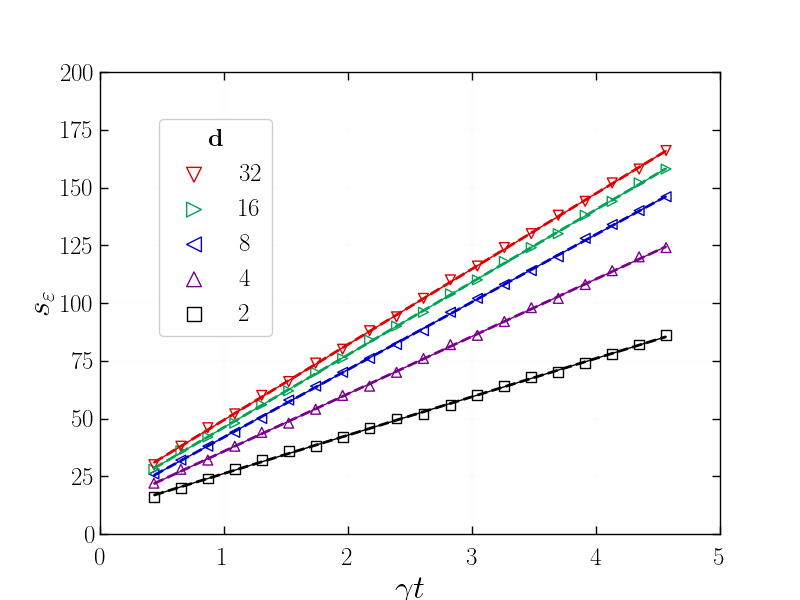

In [278]:
# ----------------------------------------------------------------------------------------------------------------------------------
# USER OPTIONS
# ----------------------------------------------------------------------------------------------------------------------------------
# Whether to load the data from the file or use the data from the current run
load_figure_data = True
# Whether to save the figure to a file
save_figure = True
# ----------------------------------------------------------------------------------------------------------------------------------
# LOAD DATA
# ----------------------------------------------------------------------------------------------------------------------------------
# LOADS FIGURE 9 DATA
figure_number = 9
# Check if the data should be loaded from the file
if load_figure_data:        
    # Find data files in the directory for the specified figure number
    files_found = [name for name in os.listdir('../dat') if name.startswith(f'Figure_{figure_number:02}')]
    print(f'Files found: {files_found}')
    n_files = len(files_found)
    n_tasks = n_files # Alias for readability
    # Check if there are any data files for the specified figure number
    if n_files > 0:
        n_tasks = n_files
    else:
        raise ValueError("No data files found for the specified figure number.")    
    # Preload dims, gammas and n_gates from the first data file to initialize them before the loop
    data = load_data(figure_number, 1)
    # Data loaded from file
    print(f'Data loaded from file: {data.keys()}')
    dims = data['dims']
    n_gates = data['n_gates']

    s_finals_d_tasks = data['s_finals_d']
    times_tasks = data['times']
    hamiltonians_d_tasks = data['hamiltonians_d']
    # Data loaded from file
    print(f'Data loaded from file: {data.keys()}')

gradient = np.linspace(0, 0.9, len(np.arange(2, 33, 1)))

colorlist = plt.cm.nipy_spectral(gradient)

plt.clf()
plt.close()
plt.figure()

markerlist = ['s', '^', '<', '>', 'v', 'o', 'D']

# Set xscale in log base 2
plt.xscale('linear')
plt.yscale('linear')
plt.ylim(0, 200)
plt.xlim(0, 5)

def linear(x, m, c):
    return m * x + c

start = 2
stop = -2
step = 1

slope_list = []
task_idx = 0
gate_idx = 4
i=0
for dim_idx, d in enumerate(dims):
    if d not in [2,4,8,16,32]:
        continue
    # if d in [32]:
    x_data = np.array(times_tasks[start:stop:step])
    y_data = np.array(s_finals_d_tasks[dim_idx][gate_idx][start:stop:step])
    # Plot the data
    plt.scatter(x_data, y_data, color = colorlist[dim_idx], marker = markerlist[i], facecolor = 'None', s = 50, label = rf'${d}$')
    i += 1

    # # RANSAC REGRESSOR
    # # Works for all dimensions (excludes outliers)
    X = x_data.reshape(-1, 1)
    ransac = RANSACRegressor()
    ransac.fit(X, y_data)
    predictions_ransac = ransac.predict(X)
    # plt.plot(x_data+1/2*np.diff(x_data)[0], predictions_ransac, color = colorlist[dim_idx], linestyle = '-', drawstyle='steps')
    plt.plot(x_data, predictions_ransac, color = colorlist[dim_idx], linestyle = '-', linewidth=1)
    # Number of inliers and outliers
    inlier_mask = ransac.inlier_mask_
    outlier_mask = np.logical_not(inlier_mask)
    num_inliers = sum(inlier_mask)
    num_outliers = sum(outlier_mask)
    # Estimated parameters
    estimated_slope = ransac.estimator_.coef_
    estimated_intercept = ransac.estimator_.intercept_
    print(f"Dimension: {d}, Number of inliers: {num_inliers}, Number of outliers: {num_outliers}, Estimated slope: {estimated_slope}")
    print(f"Number of inliers: {num_inliers}")
    print(f"Number of outliers: {num_outliers}")
    print(f"Estimated slope: {estimated_slope}")
    print(f"Estimated intercept: {estimated_intercept}")

    # # OLS
    # # Fails for d = 30, 31
    # X = sm.add_constant(x_data)  # Adds a constant term to the predictor
    # model = sm.OLS(y_data, X).fit()
    # predictions = model.predict(X)
    # residuals = model.resid
    # print(model.summary())
    # # Perform Breusch-Pagan test
    # bp_test = het_breuschpagan(residuals, model.model.exog)
    # # bp_test outputs (lm_statistic, lm_pvalue, f_statistic, f_pvalue)
    # print(f"Breusch-Pagan test p-value: {bp_test[1]}")
    # plt.plot(x_data, predictions, color = colorlist[dim_idx%5], linestyle = '--')

    # # POLYFIT
    # # Fails for d = 30, 31
    # p = np.polyfit(x_data, y_data, 1)
    # print(f"Polyfit: {p}")
    # plt.plot(x_data, np.polyval(p, x_data), color = colorlist[dim_idx%5], linestyle = '--')

    # LINREGRESS
    # Fails for d = 30, 31
    slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)
    slope_list.append(slope)
    print(f"Dimension: {d}, Slope: {slope}, Intercept: {intercept}, R-value: {r_value}, P-value: {p_value}, Std_err: {std_err}")
    plt.plot(x_data, intercept + slope*x_data, color = colorlist[dim_idx], linestyle = '--', linewidth = 2)

    # # CURVE_FIT
    # # Fails for d = 30, 31
    # popt, pcov = curve_fit(linear, x_data, y_data)
    # print(f"popt: {popt}, pcov: {pcov}")
    # plt.plot(x_data, linear(x_data, *popt), color = colorlist[dim_idx], linestyle = '--')

plt.ylabel(r'$s_{\varepsilon}$')
plt.xlabel(r'$\gamma t$')

plt.legend(title = r'$\bf{d}$', loc = 'upper left', bbox_to_anchor = (0.075, 0.925), ncol = 1, reverse = True)

figure_number = 18

if save_figure:
    plt.savefig(f'../fig/Figure_{figure_number:02}.pdf', format='pdf', bbox_inches='tight')

plt.show()